In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=b7b3b39757b7ebcc479e5364830570d29de523095ae20983badbe5bc09e6ea37
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=3bbe1d8f0683534d29785224a12914416c04564e34d852ba6eb138ce2188c236
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

[(0, '0.116*"hololive" + 0.034*"cover" + 0.032*"daylight" + 0.016*"dbd" + 0.015*"again" + 0.014*"delivery" + 0.014*"part" + 0.013*"episode" + 0.012*"melfissa" + 0.012*"service"'), (1, '0.120*"hololive" + 0.022*"raft" + 0.020*"phasmophobia" + 0.019*"morning" + 0.013*"nnn" + 0.010*"that" + 0.010*"some" + 0.010*"getting" + 0.010*"good" + 0.010*"spoiler"'), (2, '0.080*"hololive" + 0.036*"live" + 0.016*"game" + 0.015*"anime" + 0.014*"resident" + 0.012*"black" + 0.011*"just" + 0.011*"simulator" + 0.011*"village" + 0.011*"draw"'), (3, '0.161*"hololive" + 0.024*"apex" + 0.022*"collab" + 0.021*"talk" + 0.009*"chatting" + 0.009*"mario" + 0.009*"party" + 0.009*"night" + 0.009*"rust" + 0.008*"idol"'), (4, '0.109*"hololive" + 0.042*"minecraft" + 0.022*"reading" + 0.012*"chill" + 0.012*"talk" + 0.012*"end" + 0.011*"birthday" + 0.011*"freetalk" + 0.011*"donation" + 0.010*"server"')]


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

5 -34.02285217627919 0.5732662110496654
   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             4.0              0.8525   
1            1             4.0              0.5960   
2            2             3.0              0.6921   
3            3             3.0              0.3553   
4            4             4.0              0.5960   
5            5             2.0              0.9934   
6            6             1.0              0.4992   
7            7             4.0              0.9921   
8            8             3.0              0.8525   
9            9             4.0              0.9956   

                                            Keywords  \
0  hololive, minecraft, reading, chill, talk, end...   
1  hololive, minecraft, reading, chill, talk, end...   
2  hololive, apex, collab, talk, chatting, mario,...   
3  hololive, apex, collab, talk, chatting, mario,...   
4  hololive, minecraft, reading, chill, talk, end...   
5  hololive, live, game, anim

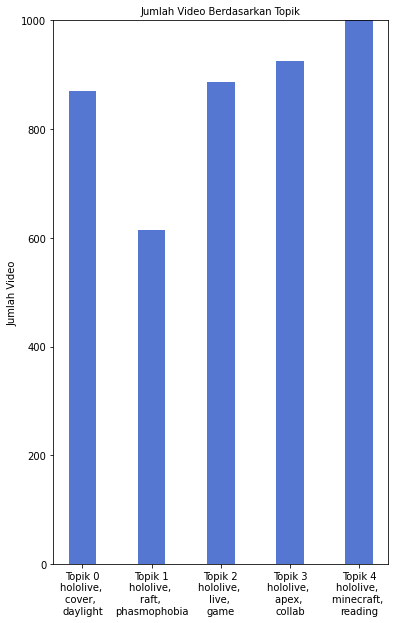

In [ ]:
# -*- coding: utf-8 -*-
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from gensim.models.coherencemodel import CoherenceModel
import re
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 
import numpy as np, pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

random_state = 0 

doc_set = """
【HALF YEAR ANNIVERSARY】 BULANAN KITAAA YEYEYEYEYEY          【HOLOH3RO】
【FREE TALK   DONO READING】GOOD AFTERNOON 
【HOLO EN X ID AMONG US】PLS I DON T WANNA BE THE IMPOSTOR  HOLOLIVECOSMICUBE
【KARAOKE   5M CELEBRATION】SING ALONG WITH PRINCESS KOBO
【RESIDENT EVIL VILLAGE】LET S DEFEAT LADY DIMITRESCU   
【JUMP KING】KOBO S SLEEPY  ERU S GONNA PLAY
【STORY OF SEASONS  FRIENDS OF MINERAL TOWN】 KAPAN DAPET HATI GRAYYYY PART  
【FREE TALK   DONO READING】SORE SEMUWAH
【CRYPT OF THE NECRODANCER】LAWAN MUSUH SAMBIL PARTY COYY 
【SUPER BUNNY MAN】BUNNY UNCHI OJIISAN W   GAMMA CH  緋崎ガンマ   UPROAR    
【IT TAKES TWO】WORKING TOGETHER WITH UNCHI OJII SAN    W   GAMMA CH  緋崎ガンマ   UPROAR    
【PHOGS】RAGUS IS DOG W   REGIS ALTARE CH  HOLOSTARS EN​
【STORY OF SEASONS  FRIENDS OF MINERAL TOWN】 CHILLING BERKEBUN SAMBIL BERGERAK MENDAPATKAN HATI GRAY
【THE MORTUARY ASSISTANT】GATAU DAPET ENDING APA TAPI FIX TIDAK AKAN DAPAT BAD ENDING  
【RESIDENT EVIL VILLAGE】KOBO AKAN BERTEMU IBUNYA     
【STORY OF SEASONS  FRIENDS OF MINERAL TOWN】 KOBO JADI TUKANG KEBON   
【OVERCOOKED  】APAKAH AKAN TAMAT DI STREAM INI  【HOLOH3RO】
【CS GO】TUTORIAL CS GO DONG KAK
【DREADOUT 】PART 
【FREE TALK   DONO READING】CHILLING WITH A BIT OF SERIOUS TALK   
【VALORANT】FUMA ZAKO W   FUMA CH  夜十神封魔   UPROAR    
【DEAD BY DAYLIGHT】IVAN SAHA ANYING      
【VALORANT】MAIN SAMA IDOLA RILL           ​
【CUPHEAD】KAPAN YAH PENDERITAAN INI BERAKHIR
【FREE TALK   DONO READING】 KOBO LAGI KALEM
【VALORANT】REGIS IS SHID  W   REGIS ALTARE CH  HOLOSTARS EN
【THE MORTUARY ASSISTANT】DAPET ENDING APA YA MALAM INI  
【ASMR】EAR CLEANING
CHESS AND RUBIK S CUBE WITH  KUREIJI OLLIE CH  HOLOLIVE ID               
【DREADOUT 】MELANJUTKAN PETUALANGAN LINDA Y X G KUY
【FREE TALK】
【DONO READING   CHIT CHAT】HEY  
【MINECRAFT】CHILL MINECRAFT STREAM
【AGE OF EMPIRES II】MEMBANGUN NEGERI
【MINECRAFT】HAY GES
【DREADOUT 】APAKAH KITA AKAN BERGELUT DENGAN PARA SAYTAN DI SINI   
【DONO READING   CHIT CHAT】 PAGI HARI ADALAH HARI PALING SEMANGATNYA AKUH
【IGGLE POP 】AYO SELAMATKAN PARA IGGLES TAK BERSALAH DARI KEJAHATAN ZOOGS 
【CUPHEAD】SIANG BOLONG ENAKNYA UJI MENTAL DAN KEDEWASAAN
【MOTHER SIMULATOR】GIMANA SIH RASANYA MENJADI IBU  ANAK
【LEAGUE OF LEGENDS  WILD RIFT】MOBA AND CHILL
【THE MORTUARY ASSISTANT DEMO】MARI MENJAGA SITUASI KAMAR MAYAT TETAP KONDUSIF  
【FALL GUYS】BETUMBUK KITA KOBOLONIMBUS【MEMBERSHIP】
【VALORANT】G
【HATSUNE MIKU  COLORFUL STAGE 】SIANG  ENAKNYA MENGVIBING Y G C
【VISAGE】PELIS AKU MAU TAMATIN  STORY AJA ABIS ITU BYE【KOBO KANAERU   HOLOLIVE ID】
【DONO READING   CHIT CHAT】 MALEM MALEM ENAKNYA NGOBSKUY【KOBO  KANAERU   HOLOLIVE ID】
【CELEBRATION】1M SUBS  SKUY MAKAN MAKAN   
【VALORANT】NGAJARIN SENPAI NEMBAK ORANG  【KOBO KANAERU・YOZORA MEL】
【LEAGUE OF LEGENDS  WILD RIFT】AKU MAU PUSRENK NO DEBAT 
【SUBNAUTICA】SIAPA YANG TIDAK KANGEN TIMO【KOBO KANAERU】
【STRAY】I M A GOOD CAT 🥺
【VALORANT】BERMAIN BERSAMA TRANSLATOR DAN JUGA ABANG ABANG KU WOW  
【DONO READING   CHIT CHAT】 MEMBACA【KOBO  KANAERU   HOLOLIVE ID】
【LEAGUE OF LEGENDS  WILD RIFT】PUSRENK BANG【KOBO KANAERU   HOLOLIVE ID】
【LEAGUE OF LEGENDS  WILD RIFT】AAAAAAAAAAAAA【KOBO KANAERU   HOLOLIVE ID】
【DUOLINGO】OUI OUI BAGUETTE
【VALORANT】KOBO TIDAK AKAN MENGECEWAKAN SENPAINYA 【KOBO X ROBOCO】
【GOLF IT 】GOLFING WITH MY DADDY【KOBO X MORI】
【POWERWASH SIMULATOR】PAGI PAGI CUCI RUMAH【KOBO X SANA】
【PORTAL 】PORTALING WITH MOMMY KIWAWA PRAT  【KOBO X KIARA】
【HATSUNE MIKU  COLORFUL STAGE 】KARAFURU SUTEIJI EEE
【CUPHEAD】GA JANJI【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【DONO READING】PITUBER 1JT SUBS BACA DONASI MINGGU LALU【KOBO KANAERU   HOLOLIVE ID】
【VALORANT】MAIN SAMPE LEMES
【HATSUNE MIKU  COLORFUL STAGE 】WANDAHOIIII   
【VALORANT】JANJI DIEM AJ
M
【SUBNAUTICA】GAME HORROR BERKEDOK SURVIVAL【KOBO KANAERU】
【OVERCOOKED  】MASAK APA NICH ENAKNYA【KOBO X KAELA】
【GHOSTWIRE  TOKYO】KOBO SANG DUKUN HUJAN RILL   MENJELAJAHI TOKYO   【KOBO KANAERU】
【RAT SIMULATOR】KOBO JADI TIKUS TAMBAH KECIL【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【VISAGE】KOBO PENAKLUK ATAU PENAKUT   【KOBO KANAERU   HOLOLIVE ID】
【CUPHEAD】JANJI GA GILA【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【DONATION READING】AND A LITTLE CHIT CHAT【KOBO KANAERU   HOLOLIVE ID】
【GETTING OVER IT】NAIK GUNUNG ATO NAIK APA KEK SERAH【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【NO STRAIGHT ROADS】TIDAK ADA JALAN YANG LURUS【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【VALORANT】AFKH KOBO AKAN MENGCARRY   【KOBOLLIE】
【GTA V】MERUSUH APALAGI KITA HARI INI【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【DREADOUT】CANDY MAN PART 【KOBO KANAERU   HOLOLIVE ID】
【CUPHEAD】AKU BERJANJI TIDAK KENA MENTAL【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【FREETALK】I M BACK  MAYBE   【KOBO KANAERU   HOLOLIVE ID】
KOBO KANAERU   TONDEMO WONDERS  COVER 
TAI
【UNTITLED GOOSE GAME】ANGSA【KOBO KANAERU   VESTIA ZETA】
【GTA V】GRAND THEFT KOBO【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【VALORANT】MAU TAMATIN BATTLE PASS【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【DONATION READING   FREETALK】NGOBROL PAGI【KOBO KANAERU   HOLOLIVE ID】
【PACIFY】NAK BETUMBUK DENGAN HANTU ATAU  LILIANA VAMPAIA CH  吸血鬼 リリアナ  【KOBO   LILI】
【INSCRYPTION】CARD  GAME  【KOBO KANAERU   HOLOLIVE ID】
【DREADOUT】CANDY MAN【KOBO KANAERU   HOLOLIVE ID】
【KOBOO】SPOOKY NIGHT WITH KOBO  【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【PLANTS VS  ZOMBIES】LAST PART     PART  【KOBO KANAERU   HOLOLIVE ID】
【DONATION READING   FREETALK】MALEM 【KOBO KANAERU   HOLOLIVE ID】
【KARAOKE】  【KOBO KANAERU   HOLOLIVE ID】
【VALORANT】PEW PEW WITH TWO BEAUTIFUL BLONDES【KOMEHA   KOBO AME IROHA】
【VALORANT】NO SCREAMING【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【PUBGM】UWOOOGGHHH PUBGM X EVANGELION IKZZZ【KOBO KANAERU】
【DONATION READING   FREETALK】SORE 【KOBO KANAERU   HOLOLIVE ID】
【VALORANT】FIRST SKIN EHE【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【PLANTS VS  ZOMBIES】ZOMBI PART  【KOBO KANAERU   HOLOLIVE ID】
【OUTLAST  WHISTLEBLOWER】LET S END THIS NOW【KOBO KANAERU   HOLOLIVE ID】
【MINECRAFT】IT S TIME TO ACTIVATE WATASHI NO CHIKARA  【HOLOLIVE INDONESIA】
【VALORANT】I WANNA OPEN MY RANK【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【MEMBERSHIP】A VERY MOTIVATIONAL VIDEO 【KOBO KANAERU   HOLOLIVE ID】
【MEMBERSHIP】COME AND JOIN【KOBO KANAERU   HOLOLIVE ID】
【CELEBRATION】THE REVIVAL OF DEMON LORD SEASON 【KOBO KANAERU   HOLOLIVE ID】
【OUTLAST  WHISTLEBLOWER】HERE WE GO AGAIN【KOBO KANAERU   HOLOLIVE ID】
【DEAD BY DAYLIGHT】I BRAVE I WALK【KOBO KANAERU   HOLOLIVE ID】
【PLANTS VS  ZOMBIES】ZOMBI PART  【KOBO KANAERU   HOLOLIVE ID】
【GUERILLA CHILL TALK】KOBO KANAERU SEASON 【KOBO KANAERU   HOLOLIVE ID】
【VALORANT】KOBOCHAMA  PEW PEW LET S GO【KOBO X HAACHAMA】
【DONATION READING   FREETALK】GOOD MORNING 【KOBO KANAERU   HOLOLIVE ID】
【FOOD REVIEW】KOBO THE FOOD CRITIC IS HERE【KOBO KANAERU   HOLOLIVE ID】
【PLANTS VS  ZOMBIES】ZOMBI【KOBO KANAERU   HOLOLIVE ID】
【KOBOO】SPOOKY NIGHT WITH KOBO  【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【PORTAL 】I’LL DO MY VERY BEST  MOMMY PHOENIX  【KOBO X KIARA】
【MINECRAFT】KOPASU【KOBO X PAVO X RISU】
【DONATION READING   FREETALK】STARTING A MONTH WITH A CHIT CHAT STREAM  D【KOBO KANAERU   HOLOLIVE ID】
【KARAOKE】SINGING MY SENPAIS  SONGS 【KOBO KANAERU   HOLOLIVE ID】
【FEEDING FRENZY 】FISH【KOBO KANAERU   HOLOLIVE ID】
【OUTLAST】I HOPE I FINISH THIS GAME TODAY  PART 【KOBO KANAERU   HOLOLIVE ID】
【DONATION READING   FREETALK】HI 【KOBO KANAERU   HOLOLIVE ID】
【DEVOUR】IT WON T BE THAT SCARY    RIGHT    【HOLOLIVE INDONESIA 3RD GEN】
【VALORANT】EHE【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【LEAGUE OF LEGENDS  WILD RIFT】HOPE THE GAME GOES SMOOTHLY   【KOBO KANAERU   HOLOLIVE ID】
【KOBOO】SPOOKY NIGHT WITH KOBO  【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【ZUMA S REVENGE】FROG【KOBO KANAERU   HOLOLIVE ID】
【KEEP TALKING AND NOBODY EXPLODES】ELA PLS DON T EXPLODE【KOBO X KAELA】
【OUTLAST】CAN WE FINISH THIS GAME TONIGHT   PART 【KOBO KANAERU   HOLOLIVE ID】
【DONATION READING   FREETALK】MISS ME   D【KOBO KANAERU   HOLOLIVE ID】
【KOBOO】SPOOKY NIGHT WITH KOBO  【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【VALORANT】YAYY【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【APEX】SIGH   【KOBO KANAERU   HOLOLIVE ID】
【OUTLAST】HOPE I MAKE A LOT OF PROGRESS     PART 【KOBO KANAERU   HOLOLIVE ID】
【DONATION READING   FREETALK】WAKEY WAKEY 【KOBO KANAERU   HOLOLIVE ID】
【RAFT】GETTING MORE MANAGEABLE   【HOLOLIVE INDONESIA 3RD GEN】
【KOBOO】SPOOKY NIGHT WITH KOBO  【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【VALORANT】OK【KOBO KANAERU X VESTIA ZETA】
【OUTLAST】HOPE I MAKE A LOT OF PROGRESS    【KOBO KANAERU   HOLOLIVE ID】
【DONATION READING   FREETALK】MORNING 【KOBO KANAERU   HOLOLIVE ID】
【ACOUSTIC KARAOKE】MONETIZATION CELEBRATION  THANK YOU   PART      【KOBO KANAERU   HOLOLIVE ID】
【ACOUSTIC KARAOKE】MONETIZATION CELEBRATION  THANK YOU  【KOBO KANAERU   HOLOLIVE ID】
【KOBOO】SPOOKY NIGHT WITH KOBO  【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【RAFT】I HOPE THEY DON T DROWN ME     PART 【HOLOLIVE INDONESIA 3RD GEN】
【RAFT】I HOPE THEY DON T DROWN ME    【HOLOLIVE INDONESIA 3RD GEN】
【VALORANT】PLEASE BEAR WITH MY AIM【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
【POST DEBUT TALK】HEHE【KOBO KANAERU   HOLOLIVE ID 3RD GENERATION】
【ORIGINAL SONG MV】MANTRA HUJAN   KOBO KANAERU 【HOLOLIVE INDONESIA 3RD GEN】
【DEBUT STREAM】BOKOBOKOBOKOBO【KOBO KANAERU   HOLOLIVE INDONESIA 3RD GEN】
  HOLOID03  KOBO KANAERU   AT YOUR SERVICE   HOLOLIVE INDONESIA GEN  DEBUT TEASER
  【MOONUTAU】ANIME GIRL TRIED TO SING AGAIN 【ARCHIVE】
【HOLO EN X ID AMONG US】I AM NOT SUS【MOONA HOLOLIVEID】
【MALAM MOONA】♡TALKING ABOUT MY PREVIOUS EVENT♡【HOLOLIVEID】
PERISAI JITU   TEASER
【3D SHOWCASE】TOTAL ECLIPSE OF THE MOON  MOONAHOSHINOVA3D 【MOONA HOSHINOVA   HOLOLIVE ID】
【RUST】 PREPARE EVERYTHING 【GEEMOON】
【AREA15】♡WE GOT SOMETHING FOR YOU♡【HOLOLIVEID】
【RUST】 LET S PREPARE BEFORE WE GET INTO THE BUSINESS【GEEMOON】
【RUST】 SEASON   DAY    【GEEMOON】
【RUST】 SEASON   HERE WE GOOOO   【GEEMOON】
【CULT OF THE LAMB】COME JOIN ME  YOUR LIFE WILL BE BLESSING WITH MY CULT 【 GEEMOON】
【CULT OF THE LAMB】LET S TRY THIS GAME 【 GEEMOON】
【MINECRAFT】I MIGHT BE LATE BUT LETS ENJOY THIS MOMENT 【 MOONARCHITECT】
【MALAMMOONA】I MISS YOU♡【FREETALK】
【MINECRAFT】LET S MAKE A STALL   【 MOONARCHITECT】
【RUST】I THINK I WANT TO BE A FARMER 【GEEMOON】
【RUST】FIND ANOTHEY WAY TO GAIN SCRAPS RATHER THAN GAMBLING【GEEMOON】
【MINECRAFT】CLEANING UP AND DO THE AFTERTALK【 HOLOIDCUP2022】
【 HOLOIDCUP2022】HOLOID CUP   CELEBRATING 17AN WITH ID  EN    JP  【HOLOLIVEID】
【HOLOID CUP 】ABOUT THE GAMES AND RULES【 HOLOIDCUP2022】
【RUST】 CHILLING IN RUST【GEEMOON】
【RUST】 JUST HAVING FUN IN RUST【GEEMOON】
【PAGIMOONA】GOOD MORNING♡【FREETALK】
【AOE II】WHAT HAPPEN IF THE MEMBER MAKE THEIR OWN KINGDOM  【GEEMOON】
【MINECRAFT】THE LAST REDSTONE OF THE GAME 【GEEMOON】
【STRAY】I WANT TO BE A CAT【GEEMOON】
【MINECRAFT】MAYBE IT S TIME FOR THE REDSTONE THINGY【GEEMOON】
【MINECRAFT】LET ME CHILL AFTER S WORD PLEASE 【GEEMOON】
【MINECRAFT】OMG AUGUST IS NEAR  NEED TO FINISH THIS  【GEEMOON】
【MINECRAFT】 WHEN THE MOON SPACE AND TIME COALESCE【MOONA   SANA   KRONII】
【MINECRAFT】 JUST DOING SOME PREPARATION FOR 【GEEMOON】
【RUST】 COLLECT RECYCLE REPEAT 【GEEMOON】
【MINECRAFT】 JP ID NOW CONNECTED  【GEEMOON】
【RUST】 I WANT TO PLAY THIS SO BADLY【GEEMOON】
【MINECRAFT】 GRINDING AGAIN  AND ALSO PROB DOING SOMETHIN【GEEMOON】
【MINECRAFT】 GRINDING TIME   【GEEMOON】
【WE WERE HERE FOREVER】BEEG BRAIN TIME【PART 】
【SOREMOONA】GOOD AFTERNOON ♡【FREETALK】
【TEARDOWN】I CAME IN LIKE A WREEEEEKING BAAALLLL【GEEMOON】
【DIABLO II】DEATH  AT LAST  SHALL SPREAD ITS WINGS OVER ALL 【GEEMOON】
【CAT BURGLAR  A TAIL OF PURRSUIT 】WHAT SHOULD I LOOT TODAY NYAO 【GEEMOON】
【PAGIMOONA】GOOD MORNING NYA ♡【FREETALK】
【POWERWASH】 CLEAN N  CHILL WITH   PAVOLIA REINE CH  HOLOLIVE ID  【GEEMOON】
【MINECRAFT】 HUH  ADVENTURE WITH  KAELA KOVALSKIA CH  HOLOLIVE ID  【GEEMOON】
【WE WERE HERE FOREVER】STUCK WITH RISU FOREVER 【GEEMOON】
【 MOONUTAU】SINGING IN THE MIDDLE OF THE NIGHT AFTER KEROKAN【ARCHIVE】
【MINECRAFT】 BUILD SOME RAILWAY  WITH  VESTIA ZETA CH  HOLOLIVE ID 【MOONZE】
【PAGIMOONA】GOOD MORNING ♡ LET S TALK【FREETALK】
【MINECRAFT】 CHILLING WITH THE WARDEN AGAIN【GEEMOON】
【MINECRAFT】 THE REAL CHILLING【GEEMOON】
【MINECRAFT】 ♡  WHO DEN KILL ♡ 【PEKOMOON】
【PAGIMOONA   MINECRAFT】I JUST LOVE TALKING WITH YOU ♡【FREETALK】
【MINECRAFT】 CHILLING IN THE NEW VERSION 【GEEMOON】
【HOUSE FLIPPER】CLEAN CLEAN 【 GEEMOON】
【MINECRAFT】 TESTING OUT FARM AND CHILL【GEEMOON】
【POWERWASH SIMULATOR】KETAGIHAN BEBERSIH【 GEEMOON】
【POWERWASH SIMULATOR】BERSIH BERSIH【 PAVONOVA 】
【HOUSE FLIPPER】LEMME FIX YOUR HOUSE【 GEEMOON】
【PAGIMOONA 】CHILLING IN THE MORNING【FREETALK】
【KEEP TALKING AND NOBODY EXPLODES】KETIKA PAVONOVA MENJINAKKAN BOM  APA YANG TERJADI 【PAVONOVA】
【AGE OF EMPIRES II】I WANT TO LEARN THIS GAME【 GEEMOON】
【ELDEN RING】HOW TO PLAY THIS GAME   SPOILER ALERT【MOONA】
【PAGIMOONA 】I M BACK  STORYTIME 【FREETALK】
【MINECRAFT】GO TO THE END WITH  AYUNDA RISU CH  HOLOLIVE ID 【GEEMOON】
【MUNCH TIME】TALK AND EAT【FREETALK】
【PUBG MOBILE】PLAY PUBG MOBILE WITH ME  PUBGM X EVANGELION  IKZ  【MOONA】
【MINECRAFT】DEFEATING THE ENDER DRAGON【GEEMOON】
【OPERATION TANGO  MINECRAFT】BECOME A PARTNER WITH BAE  PART  【GEEMOON】
【ELDEN RING】FIRST TIME PLAY  IS THIS FUN  SPOILER ALERT【MOONA】
【FFXIV】BACK IN FFXIV 【SPOILER ALERT】
【DONATION READING】BEEN A WHILE  NOW IT S TIME 【FREETALK】
【MINECRAFT】ADVENTURE TIME 【GEEMOON】
【AREA15】BERSAMA SELALU 【HOLOLIVEID】
【MINECRAFT】PLAY WITH KAELA 【GEEMOON】
【RADIO】I CAN T SLEEP 【FREETALK】
【PAGIMOONA 】SUDDEN PAGIMOONA 【FREETALK】
【MINECRAFT】BUILD AND CHILL IN EN SERVER 【MOONA】
【OPERATION TANGO】BECOME A PARTNER WITH BAE  TAKE  【GEEMOON】
【PAGIMOONA 】CHIT CHAT AND DONATION READING 【FREETALK】
【MINECRAFT】I NEED TO FIXING UP THINGS 【MOONA】
【ESCAPE SIMULATOR】LET S ESCAPE THIS ROOM TOGETHER 【GEEMOON】
【RAFT】AKHIRNYA KITA NYASAR【 YEARS AREA15 】
【MONOPOLY】REBUTAN LOKASI BERSAMA AREA15 【 YEARS AREA15 】
【MINECRAFT】LET S UPGRADE BUNKERONII   【GEEMOON】
【NIGHT DELIVERY】PLAYING HORROR GAME WITH HARMONICA ONLY  【MOONA】
【MINECRAFT】LET S GO BACK TO THE JP SERVER 【MOONA】
【MOONUTAU】DEBUT COUNTDOWN AND KARAOKE  IKZ   【MOONA】
【THE SIMS 】LET S MAKE A HOLOID CHARACTER  PART 【GEEMOON】
【THE SIMS 】LET S MAKE A HOLOID CHARACTER  AGAIN 【GEEMOON】
【MINECRAFT】HOLOID MINECRAFT TOUR 【 HOLOID2MPENGAN】
【PAGIMOONA 】GOOD MORNING 【FREETALK】
【FREETALK】I FINALLY CAME HOME【MOONA】
【OPERATION TANGO】BECOME A PARTNER WITH BAE  WHAT WILL IT BE LIKE  【GEEMOON】
【GEEMOON】MINECRAFT   BUILD BOROBUDUR WITH RISU AND OLLIE  【 1MILLIONDAYWITHMOONA】
【MAMAHMOONA】 MILION SUB AND HOLOLIVE EDITION【 1MILLIONDAYWITHMOONA】
【FREETALK】3RD FES AFTER DINNER   ANNOUNCEMENT  【 1MILLIONDAYWITHMOONA】
【 MOONACRAFT】IS THIS TIME FOR THE BIRD  【  1MILLIONDAYWITHMOONA   PART 】
【COVER】GEKKOU   月光【MOONA    ムーナ】
【GEEMOON】WHAT IF I MAKE A CAKE FOR  MILLION  【 1MILLIONDAYWITHMOONA】
【SEA OF THIEVES】WHAT IF AREA15 MEET HOLORO ON SOT  【MOONA】
【SEA OF THIEVES】CONTINUE OUR JOURNEY  AREA15 HERE 【AREA15】
【PAGIMOONA 】HALO   【FREETALK】
【VAMPIRE SURVIVORS】LET S TRY THIS GAME 【MOONA】
【RAFT】HERE WE GO AGAIN 【MOONA】
【SEA OF THIEVES】AHOY  JEK SEPARO HERE 【AREA15】
【PAGIMOONA 】SELAMAT PAGI   【FREETALK】
【FREETALK】TIME TO READ ALL YOUR MESSAGES 【DONATION READING】
【WATCHALONG】LET S WATCH BELLE TOGETHER 【MOONA】
【MONSTER HUNTER WORLD】I WANT TO TRY THIS GAME【MOONA】
【PUBGM】PLAY PUBGM WITH ME  PUBGM X JUJUTSU KAISEN  IKZ  【 GEEMOON】
【PAGIMOONA 】HEWWO【FREETALK】
I FOUND ANCIENT DEBRIS 
【MINECRAFT】LET S BUILD A SHIP  PART  【 MOONARCHITECT】
【MOONA】THANKYOU【HOLOLIVEID】
【ARK】CHILL IN ARK【MOONA】
【MINECRAFT】CHILL BRO    MOONA WILL FIND A WAY 【 MOONARCHITECT】
【PAGIMOONA 】WAKEY WAKEY【FREETALK】
【ARK】TAME LOT S OF DINOS    FOR REVENGE 【MOONA】
【MOONDAY2022】THE MOON ON HER BIRTHDAY  LET S CELEBRATE TOGETHER 【AREA15】
【MOONDAY2022】LET S SING A SONG ON MY BIRTHDAY 【MOONUTAU】
【MOONDAY2022】CALL ME  CALL ME 【TOTSUMOONMACHI】
【ORIGINAL SONG】HIGH TIDE   MOONA HOSHINOVA【ANIMATED MV】
【MOONDAY2022】MY BIRTHDAY IS NEAR 【FREETALK COUNTDOWN】
【SUBNAUTICA】CAN I SURVIVE IN THIS ALIEN WORLD 【 GEEMOON】
【AGE OF EMPIRES II】HEY  CAN WE PLAY THIS GAME TOGETHER 【 GEEMOON】
【PAGIMOONA 】I JUST WAKE UP  LET S CONSIDER IT S STILL MORNING【FREETALK】
【ARK】ADVENTURE TIME  THIS TIME WITH IOFI  【MOONA】
【MINECRAFT】LET S BUILD A SHIP 【 MOONARCHITECT】
【ARK】ADVENTURE TIME 【MOONA】
【ARK】ADVENTURE TIME 【MOONA】
【PAGIMOONA 】ASA WITH MOONA  WAKEY WAKEY【FREETALK】
【MINECRAFT】LET S BUILD A SHIP 【 MOONARCHITECT】
【ARK】CAN I HAVE MY OWN DINO  I WANT TO TAME A DINO  【MOONA】
【ARK】CAN I HAVE MY OWN DINO  I WANT TO TAME A DINO  【MOONA】
【AGE OF EMPIRES II】MY FIRST STRATEGY GAME  I HOPE I PLAY WELL 【 GEEMOON】
【 MOONACRAFT】UNBOXING MY HARRY POTTER HOGWARTS COLLECTION EDITION LEGO 【PART 】
【MINECRAFT】LET S FINISH OUR HOUSE IN MINECRAFT 【 MOONARCHITECT】
【ARK】BACK TO ARK  LET S PLAY THIS GAME AGAIN 【MOONA】
【MINECRAFT】LET S FIND NETHER FORTRESS   【 MOONARCHITECT】
【 MOONACRAFT】UNBOXING MY HARRY POTTER HOGWARTS COLLECTION EDITION LEGO 【PART 】
【MINECRAFT】CONTINUE BUILD MY HOUSE AND CHILLING 【 MOONARCHITECT】
【MINECRAFT】CONTINUE MAKING MY DREAM HOUSE IN MINECRAFT   【 MOONARCHITECT】
【UNBOXING】UNBOXING MY HARRY POTTER HOGWARTS COLLECTION EDITION LEGO 【MOONA】
【FREETALK】READ DONATIONS FROM PREVIOUS STREAM AND DO THE FREETALK 【MOONA】
【UNBOXING】UNBOXING AND SETTING UP MY NEW KEYBOARD 【MOONA】
【MINECRAFT】LET S BUILDING A HOUSE IN THIS HAPPY HOLIDAY【 MOONARCHITECT】
【HOLOIDWEEK 】LET S SINGS HOLOLIVE SONGS 【 MOONUTAU】
【MINECRAFT】CHILL AND GATHERING ITEMS FOR MY HOME【 MOONARCHITECT】
【AREA 】LET S PLAY TOGETHER WITH US 【HOLOLIVEID】
【MINECRAFT】ONE BLOCK CHALLENGE 【 MOONARCHITECT】
【FREETALK】CHIT CHAT IN THE NIGHT【MOONA】
【UNPACKING】UNPACKING WITH ME【MOONA】
MOONA HOSHINOVA   CHILL ACOUSTIC PIANO NIGHT WITH MOONA
【COVER】SAIKAI   再会【MOONA X SUISEI HOSHIMACHI   ムーナ／星街すいせい】
SAMPAI KETEMU NANTI MALAM DI  YOUTUBEMUSICWEEKEND     SHORTS
SEE YOU ON  YOUTUBEMUSICWEEKEND TOMORROW NIGHT    SHORTS
【MINECRAFT】CHILLING WITH ME【 MOONARCHITECT】
【PAGIMOONA 】ASA WITH MOONA  LET S TALK WITH ME 【FREETALK】
【MINECRAFT】CHILLING HEHE【 MOONARCHITECT】
【MINECRAFT】CHILLING  CONTINUE SECRET KEY AND MAKING AUTO SMELTER ROOM FOR BALAI DESA【 MOONARCHITECT】
【PUBGM】LET S TRY THIS GAME WITH ARCANE MIRROR MODE 【MOONA】
【MINECRAFT】CHILLING AND MAKING STORAGE ROOM FOR BALAI DESA【 MOONARCHITECT】
【FREETALK】I THINK IT S BEEN A WHILE ISN T 【MOONA】
【FREETALK】PROBABLY TALKING WHILE WAITING   【MOONA】
【COVER】THE BADDEST   K DA【CALLI   MOONA   REINE   RISU 】
【SING JP ONLY   TALK】AFTER PARTY  LET S SING AND TALK A LITTLE BIT 【 MOONUTAU】
【PAGIMOONA 】ASA WITH MOONA  LET S TALK WITH ME 【FREETALK】
【DEVOUR】WALKING IN THE NIGHT WITH FRIENDS  【MOONA】
【MINECRAFT】BUILD AND CHILL ON HOLOID SERVER 【 MOONARCHITECT】
【MOONDAY MAGER】 HOUR DOING NOTHING     JAM GAK NGAPA NGAPAIN【MOONA】
【DUOLINGO】TEACH ME MORE RUSSIAN   【 MANAMOONA】
【PAGIMOONA 】ASA WITH MOONA  LET S TALK WITH ME 【FREETALK】
【 HOLOIDNEWCOSTUME 】OUR NEW COSTUME  AND   【AREA15】
【 HOLOIDNEWCOSTUME】BAJU BARU   MOONA FASHION SHOW TIME   【MOONA】
【MINECRAFT】FOOD FARM AND CHILL 【 MOONARCHITECT】
【MINECRAFT】FOOD FARM INCOMING 【 MOONARCHITECT】
【SING JP ONLY   TALK】AFTER PARTY  LET S SING AND TALK A LITTLE BIT 【 MOONUTAU】
【MOONA BOONA】MYSSTORY【EPISODE 】
【PAGIMOONA 】ASA WITH MOONA  LET S TALK WITH ME 【FREETALK】
【MINECRAFT】MIGHT BE BUILDING A FARM IN HOLOID SERVER【 MOONARCHITECT】
【MINECRAFT】HOLOID SERVER GRAND OPENING RELAY    MOONA TIME   【 HOLOIDSERVERGORELAY】
【MALAMMOONA 】I HAVE SOMETHING TO SAY ABOUT THE FUTURE 【FREETALK】
【PAGIMOONA 】ASA WITH MOONA  LET S TALK WITH ME 【FREETALK】
【MOONA BOONA】THE HOLLOW EARTH【EPISODE 】
【A WAY OUT】LET S GET OUT FROM THIS PRISON  WITH  PAVOLIA REINE CH  HOLOLIVE ID 【 PAVONOVA】
【A WAY OUT】LET S GET OUT FROM THIS PRISON  WITH  PAVOLIA REINE CH  HOLOLIVE ID 【 PAVONOVA】
【BUS SIMULATOR 】I VE GOT MY DRIVER LICENSE【 GEEMOON】
【SING JP ONLY   TALK】AFTER PARTY  LET S SING AND TALK A LITTLE BIT 【 MOONUTAU】
HI
【KEEP TALKING AND NOBODY EXPLODES】CAN WE WORK THIS THINGS OUT  【 PEKOMOON】
TUTORIAL HOW TO USE RAID FARM   ホロライブJPサーバーでのレイドファームの使い方
【 MOONUTAU】LET S SING A JP SONG   【ARCHIVE JP ONLY】
【AREA 】WHAT IF   WE HAVE A HAIR LIKE THIS  【HOLOLIVEID】
【TALES OF ARISE】WHAT IS THIS NEW GAME  【 TALESOFARISE】
【PAGIMOONA 】ASA WITH MOONA  LET S TALK WITH ME 【FREETALK】
【GARTIC PHONE】LET S DRAW TOGETHER 【MOONA HOSHINOVA   HOLOLIVEID】
【MINECRAFT】CONTINUE AUTO SORTER ROOM  NOW MAKING AN AUTOMATIC DOOR  AND CHILLING 【 MOONARCHITECT】
【RING FIT ADVENTURE】LET S WORKOUT 【 GEEMOON】
【PAGIMOONA 】ASA WITH MOONA  LET S TALK ABOUT ANYTHING  【FREETALK】
【AC IV   BLACK FLAG】CONTINUE MY ASSASSINS CREED IV BLACK FLAG 【 GEEMOON】
【FREETALK】DONATION READING FOR THIS WEEK    AND ALSO TALKIN TALKIE  【MOONA】
【MARIO KART  DX 】TRY THE WHEELS AND DO THE REPS 【MOONA HOSHINOVA   HOLOLIVEID】
【HOLOID GARTIC PHONE】I LL DRAW A MASTERPIECE 【MOONA HOSHINOVA   HOLOLIVEID】
【PAGIMOONA 】ASA WITH MOONA  LET S TALK ABOUT ANYTHING  【FREETALK】
【SING TALK】AFTER PARTY  LET S SING AND TALK A LITTLE BIT 【 MOONUTAU】
【MARVEL FUTURE REVOLUTION】IT S FINALY RELEASE  LET S PLAY IT TOGETHER 【 MFRSEA】
【MARIO KART  DX    ENXIDKART】HOLOEN X HOLOID TOURNAMENT  MOONA POV 【MOONA HOSHINOVA   HOLOLIVEID】
【MARIO KART  DELUXE】RACING REPS IKZ   【MOONA HOSHINOVA   HOLOLIVEID】
【PAGIMOONA 】ASA WITH MOONA  LET S TALK ABOUT ANYTHING  【FREETALK】
【 ホロ鯖ENポータルリレー    HOLOSERVERPORTAL】IT S MOONA TURN     YEAY   【MOONA HOSHINOVA   HOLOLIVEID】
【DUOLINGO】LET S LEARN RUSSIAN LANGUAGE 【LEARNING】
【SING TALK】AFTER PARTY  LET S SING AND CELEBRATE 800K SUBS 【 MOONUTAU】
【PAGIMOONA 】ASA WITH MOONA  LET S TALK ABOUT ANYTHING  【FREETALK】
【IT TAKES TWO】LET S MAKE A GOOD TEAM  PART 【 SUBAMOON】
【SPONGEBOB SQUAREPANTS】BATTLE FOR BIKINI BOTTOM – REHYDRATED【PART 】
【PAGIMOONA 】ASA WITH MOONA  LET S TALK ABOUT ANYTHING  【FREETALK】
【MINECRAFT】LET S MAKE AUTO SORTER UNDER THE MAIN TOWER 【 MOONARCHITECT】
【FREETALK】LET S TALK ABOUT TURING LOVE 【 MOONUTAU】
【COVER】TURING LOVE   チューリングラブ【MOONA FT PEKORA   ムーナ／ぺこら】
【MARVEL FUTURE REVOLUTION】WOW   NEW MARVEL MOBILE GAMES  【 MFRSEA】
【SINGING FREETALK】AFTER PARTY  LET S SINGTALK 【 MOONUTAU】
【AC IV   BLACK FLAG】LET S PLAY ASSASSINS CREED IV BLACK FLAG 【 GEEMOON】
【MINECRAFT】LET S MAKE A RAID FARM 【 MOONARCHITECT】
【PAGIMOONA 】ASA WITH MOONA  LET S TALK  【FREETALK】
【FREETALK】AFTER PARTY  LET S TALK 【 MOONUTAU】
【APEX】APEX HOLOID SQUAD  WITH REINE AND OLLIE 【 GEEMOON】
【SPONGEBOB SQUAREPANTS】BATTLE FOR BIKINI BOTTOM – REHYDRATED【 GEEMOON】
【MINECRAFT】LET S MAKE A RAID FARM 【 MOONARCHITECT】
【PAGIMOONA 】SELAMAT PAGI   【FREETALK】
【FREETALK】LET S TALK 【MOONA】
【COVER】可愛くなりたい   KAWAIKU NARITAI     HONEYWORKS【MOONA FT  PAVOLIA REINE CH  HOLOLIVE ID 】
【FREETALK】AFTER PARTY  LET S TALK 【 MOONUTAU】
【AC IV   BLACK FLAG】LET S PLAY ASSASSINS CREED IV BLACK FLAG 【 GEEMOON】
【ONE HAND CLAPPING】LET S TRY THIS GAME 【 GEEMOON】
【ONE HAND CLAPPING】LET S TRY THIS GAME 【 GEEMOON】
【AC IV   BLACK FLAG】LET S PLAY ASSASSINS CREED IV BLACK FLAG 【 GEEMOON】
【YAKUZA 】WILL THIS BE THE LAST YAKUZA  STREAM  【PART 】
【FREETALK】ASA WITH MOONA 【 MOONA LIVE】
【YAKUZA 】CONTINUE YAKUZA AGAIN 【PART 】
【MINECRAFT】LET S EXPLORE THE SERVER 【 GEEMOON】
【MINECRAFT】USAKEN SUMMER FESTIVAL【 うさ建夏祭り】
【MINECRAFT】USAKEN MATSURI MOONA RELAY PART 【 うさ建ステージリレー】
【MINECRAFT】CONTINUE BUILDING STALL【MOONA】
【CATLATERAL DAMAGE  REMEOWSTERED】MEOW   FREETALK  【MOONA】
【MINECRAFT】NYORI FAMILY TIME 【MOONA】
【 7M00NA】700K SUBS  THANKYOU GUYS  LET S CELEBRATE 【ARCHIVE】
【FREETALK】HUH  NEW THINGS  NEW STREAM 【MOONA】
【MINECRAFT】LET S FIND AN AMETHYST 【MOONA】
【SUPER BOMBERMAN R ONLINE】BOOM BOOM  I GOT YOU 【MOONA】
【GEMERLAPスターズWARS】NGGEEENGG BALAP 【 IDSTARS】
【MINECRAFT】LET S MAKE A SHOP【MOONA】
【FREETALK】CURHATAN SEORANG MOONA【MOONA】
【BLENDER】LET S MAKE RISU 【MOONA】
【IT TAKES TWO】LET S MAKE A GOOD TEAM 【 SUBAMOON】
【 MYMOUTFIT】MIX AND MATCH FASHION REVIEW 【MOONA】
【MINECRAFT】LET S BUILD A TURRET DEFENSE 【MOONA】
【MINECRAFT】LET S CLEAR THE LAND 【MOONA】
【 MOONUTAU】ANIME GIRL TRYING TO SING A CUTE SONG【ARCHIVE】
【WOT】LET S PLAY WORLD OF TANKS WITH ME 【MOONA】
【FREETALK】IT S BEEN A WHILE   【 MOONA LIVE】
【MAMAH MOONA】CERITA KOCAK SELAMA MENJALANI PUASA【S2 EP9】
【AC IV   BLACK FLAG】LET S PLAY ASSASSINS CREED IV BLACK FLAG 【 GEEMOON】
【YAKUZA 】CONTINUE YAKUZA AGAIN 【PART 】
【MAMAH MOONA】CURHATAN MASALAH HIDUP【S2 EP8   ID】
【YAKUZA 】CONTINUE YAKUZA【PART 】
【MAMAH MOONA】CULTURE TALK 【S2 EP7   ID】
【 ROX】LET S PLAY RAGNAROK X NEXT GENERATION  【 GEEMOON】
【MAMAH MOONA】CURHATAN PELAJAR DAN MAHASISWA DISAAT KELAS ONLINE  DAN WORK FROM HOME 【S2 EP6   ID】
【BPM】LET S PLAY BULLETS PER MINUTES 【 GEEMOON】
【YAKUZA 】CONTINUE YAKUZA【PART 】
【MINECRAFT】CHILL IN MINECRAFT【MOONA】
【MAMAH MOONA】ROOM REVIEW   IKZ【S2 EP5】
【 MOONUTAU】KARAOKE   ACAPELLA JP SONG【ARCHIVE】
【MINECRAFT】CHILLING【MOONA】
【MAMAH MOONA】TIPS BERNYANYI YANG BAIK DARI MAMAH 【S2 EP4   INDONESIAN LANGUAGE】
【YAKUZA 】PLAY YAKUZA WITH MOONA AGAIN【PART 】
【YAKUZA 】PLAY YAKUZA WITH MOONA AGAIN【PART 】
【MAMAH MOONA】KISAH PERCINTAAN DAN PERBUCINAN DI KALANGAN LISTENER 【S2 EP3   INDONESIAN LANGUAGE】
【MAMAH MOONA】CERITA SUKA DUKA DISAAT MERANTAU 【S2 EP2   INDONESIAN LANGUAGE】
【AREA15】JADI GINI   POKOKNYA PENGUMUMAN PENTING 【HOLOID】
【MINECRAFT】LET S UPGRADE PECOASTER 【MOONA】
【FREETALK】LET S DO A FREETALK【MOONA】
【COVER】K DA   VILLAIN【MOONA HOSHINOVA】
【MAMAH MOONA】PENGALAMAN PUASA DI TAHUN KEMARIN【S2 EP1   INDONESIAN LANGUAGE】
【CELEBRATION】IT S MOONA DAY 【MOONA】
【MINECRAFT】CHILING IN MINECRAFT AGAIN 【MOONA】
【 365HARIHOLOID】KARAOKE RELAY   LET S SING A SONG 【MOONA】
【MONSTER HUNTER RISE】LET S PLAY 【HOLOID】
【MOONUTAU】LET S SING A SONG 【MOONA】
【YAKUZA 】PLAY YAKUZA WITH MAMANK HOSHINOV【PART 】
SPECIAL FAN SERVICE
【PROJECT WINTER】WHO AM I GONNA BE WHAT AM I GONNA DO 【MOONA】
【MINECRAFT】LET S MAKE PEKOLAND MASCOT 【MOONA】
【APEX】LET S PLAY APEX AND OPEN THE PACK  【MOONA】
【CELEBRATION】500K SUBS  THANKYOU 【MOONA】
【UNO】PLAY WITH  ASAGIRI YUA CH  朝霧ユア  SEROTINA AND  LYRICA CH  リリカ 永音  【MOONA】
【MINECRAFT】LET S VISIT HOLOEN WITH AME AND OLLIE 【MOONA】
【APEX】APEX OR APES 【PAVOLIENOVA】
【MINECRAFT】CHILLING WITH US 【PAVONOVA】
【YAKUZA 】MOONA BECOME A YAKUZA  【PART 】
【DUOLINGO】LET S LEARN JAPANESE WITH DUOLINGO 【MOONA】
【MINECRAFT】CHILING HARDCORE   【MOONA】
【MINECRAFT】BUILDING HOLOID SHOP   PART 【PAVONOVA】
【GTA V】CONTINUE THE STORY      PART KESEKIAN【MOONA】
【GTA V】CONTINUE THE STORY   【MOONA】
【MINECRAFT】TTT EMERGENCY REPAIR 【MOONA】
【MINECRAFT】CHILLING IN THE AFTERNOON【MOONA】
【OVERCOOKED 】PLAY WITH  ASAGIRI YUA CH  朝霧ユア  SEROTINA AND  LYRICA CH  リリカ 永音  【MOONA】
【APEX】PLAYING APEX WITH COPUCO FROM REVIVALTV  AND  KUREIJI OLLIE CH  HOLOLIVE ID 【MOONA】
【PLANET COASTER】LET S TRY THIS GAME 【MOONA】
【MINECRAFT】CHILLING IN THE MORNING【MOONA】
【PAPER PLEASE】LET ME CHECK YOUR PAPER 【MOONA】
【APEX】LET S PLAY APEX 【MOONA】
【MINECRAFT】CHILLING IN THE NIGHT AGAIN 【MOONA】
【FREETALK】I HAVE A NEW CHAIR 【MOONA】
【MINECRAFT】CHILLING IN THE NIGHT【MOONA】
【APEX】PLAYING APEX     【MOONA】
【APEX】PLAYING APEX WITH  KUREHA KURONO 黒乃くれは VSINGER  AND  KUREIJI OLLIE CH  HOLOLIVE ID 【MOOKURE】
【FREETALK】LET S TALK AND READ THE DONATION 【MOONA】
【ORIGINAL SONG】愛の小さな歌    AI NO CHIISANA UTA   MOONA HOSHINOVA
【CELEBRATION】LET S DO A BIRTHDAY PARTY   【MOONA】
【HOLOLIVEID】AREA  FEBRUARY EDITION  【GENERATION 】
【FREETALK CELEBRATION】TOTSUMACHI BIRTHDAY   CALL ME 【MOONA】
【FREETALK CELEBRATION】LET S COUNTDOWN MY BIRTHDAY   【MOONA】
【FREETALK】DONATION READING 【MOONA】
【MINECRAFT】BUILDING HOLOID SHOP   PART 【PAVONOVA】
【MINECRAFT】♡ CHILL AND BUILD AGAIN♡【MOONA】
【AMONG US】WHO IS THE IMPOSTOR    IDSTARAMU​ 【MOONA】
【MINECRAFT】♡ CHILL AND BUILD ♡【MOONA】
【FREETALK】♡ FREETALK KRENYES EUY ♡【HOLOID】
【FREETALK】♡ TALKIN TALKIE ♡【MOONA】
【MINECRAFT】BUILDING HOLOID SHOP   PART 【PAVONOVA】
【MINECRAFT】♡ CHILING IN THE NETHER AGAIN ♡【MOONA】
【WOT】LET S PLAY WORLD OF TANKS WITH ME 【MOONA】
【PHASMOPHOBIA】JADI  HANTU MANA YANG MAU KITA BONGKAR AIBNYA 【HOLOID】
【BANDORI】DID MY GACHA LUCK IS GOOD OR BAD 【MOONA】
【MINECRAFT】LET S BUILD AN RUSSIAN HOUSE 【MANAMOONA】
【CELEBRATION】450K SUBS  THANKYOU 【MOONA】
【SKYRIM】PART    I VE ALREADY BEAT YOU ALDUIN  I CAN DO IT AGAIN 【MOONA】
【MINECRAFT】BUILDING HOLOID SHOP【PAVONOVA】
【SKYRIM】PART    YOU RE A WIZARD  MOONA 【MOONA】
【MINECRAFT】♡ CHILING IN THE NETHER ♡【MOONA】
【MINECRAFT】CHILING WITH ME  IN THE END【MOONA】
【PASSPARTOUT】LET S SEE IF I CAN SURVIVE BY PAINTING【MOONA】
【MINECRAFT】CHILING WITH ME 【MOONA】
【SKYRIM】PART    HEY DARLING WANT TO BE MY FAMILIA 【MOONA】
【SKYRIM】HEY YOU  YOU RE FINALLY AWAKE【MOONA】
【MINECRAFT】HOW TO SLAIN ZOMBIE 【MOOLIE】
【MINECRAFT】CHILING WITH ME 【MOONA】
【MINECRAFT】HOW TO COOK A BIRD 【PAVONOVA】
【MINECRAFT】FINISH THE BLAZE ROD FARM 【MOONA】
【FREETALK CELEBRATE】400K SUBS  THANKYOU 【MOONA】
BIG INFORMATION   
BABAY MOONA  HELLO BABY MOON 
【MINECRAFT】LET S FIND ELYTRA 【PEKOMOON】
I’M MAD 
【GTA V】PLAY GTA V STORY AGAIN 【HOLOID】
GO TO BED DUDE 
【MINECRAFT】LET S PLAY IN NYORI FAMILY SERVER 【NYORIFAM】
【FREETALK】JUST TALK WITH ME NE 【MOONA】
【MARIO KART DELUXE 】RACE WITH ME 【MOONA】
【RING FIT】LET S WORKOUT WITH RING FIT    PART 【MOONA】
【CELEBRATION】350K SUBS  THANKYOUUUU 【MOONA HOSHINOVA】
【GTA V】PLAY GTA V WITH MOONA IN MOONAFIC CREW 【HOLOID】
【MINECRAFT】TRY THE CAVE ONE 【MOONA】
【RING FIT】LET S WORKOUT WITH RING FIT    PART 【MOONA】
【AREA 】GOSSIP BULANAN HOLOID GEN 【HOLOID】
【RING FIT】LET S WORKOUT WITH RING FIT 【MOONA】
【MINECRAFT】JUST DATING AND CHILLING   ROUND 【MOONA   IOFI】
【HOSHITIME】MARI BELAJAR BAHASA INDONESIA   LET S LEARN BAHASA INDONESIA 【HOSHINOVA】
【MINECRAFT】LET S MAKE ANOTHER FARM 【MOONA】
【MINECRAFT】CHILLING ON MINECRAFT【MOONA】
【MINECRAFT】LET S PLAY IN NYORI FAMILY SERVER 【MOONATO】
【FREETALK】LET S TALK ABOUT YESTERDAY 【MOONA】
【GTA V】PLAY GTA V WITH MOONA【HOLOID】
【MINECRAFT】LET S BUILD SOMETHING WITH USADA KENSETSU【PEKOMOON】
【FREETALK】LET S TALK IN THE MIDDLE OF THE NIGHT 【MOONA】
【WOWS】LET S PLAY WORLD OF WARSHIPS WITH ME 【MOONA】
【MOONUTAU】LET S SING A SONG 【MOONA】
【APEX】LET S PLAY APEX【MOONA】
【GTA V】PLAY GTA V WITH MOONA【HOLOID】
【MINECRAFT】TRYING PLAYING WITH A SHITTY LAPTOP【MOONA】
【EGG IS BROKEN  HEART IS TOO】I LL SAVE YOUR EGGS 【MOONA】
【HOUSE FLIPPER】LET ME FIX DA HOUSE 【MOONA】
【HOUSE FLIPPER】LET ME FIX DA HOUSE【MOONA】
【FREETALK】NGOBROL CANTIK BERSAMA MOONA【INDONESIA ONLY】
【FREETALK】A HOMELESS ANIME GIRL STREAMING IN A CAR【MOONA】
【COVER】FIRE BIRD   ROSELIA【MOONA HOSHINOVA】
【WOWS】LET S PLAY WORLD OF WARSHIPS WITH ME    EN ONLY【MOONA】
【MINECRAFT】CHILL AND TALKING【MOONA】
【MINECRAFT】CHILL AND TALKING【MOONA】
【MINECRAFT】WELCOME TO MINECRAFT JP SERVER 【MOONA   AME   GURA】
【MINECRAFT】LET S MAKE UFO WITH US 【MOONA   IOFI】
【MOONA BOONA】JATISAWIT   ID【HOLOLIVE ID】
【MINECRAFT】LET S GET LOST TOGETHER  PART 【MOONA】
【DOOM】LET S GO BACK TO HELL【HOLOID】
【AC IV  BLACK FLAG】AHOY  ASSASSINS MOONA DESU 【MOONA】
【MINECRAFT】LET S GET LOST TOGETHER 【MOONA】
【CELEBRATION】6MONTH AND 100K THANKYOU     ID   EN【MOONA】
【DOOM】I AM HERE 【HOLOID】
【MOONA BOONA】TELL ME YOUR SCHOOL GHOST EXPERIENCE【HOLOLIVE ID】
【ONRYO】LET S PLAY ONRYO【HOLOID】
【MINECRAFT】BUILDING TIME  LET S MAKE MONAS 【MOONA】
【CRAFTOPIA】LET S PLAY CRAFTOPIA 【HOLOID】
【MINECRAFT】BUILDING TIME  LET S MAKE SOMETHING 【MOONA】
【MINECRAFT】BUILDING TIME  LET S MAKE A BARN 【MOONA】
【MOONUTAU】KARAOKE TIME    EN【MOONA】
【MINECRAFT】BUILDING TIME  WHAT WILL I MAKE 【MOONA】
【FREETALK】100K THANKYOU    ID   EN【MOONA】
【AREA15】DRAWING WITH LEFT HAND CHALLENGE 【HOLOID】
【MINECRAFT】BUILDING TIME【MOONA】
【DRAWING】COLORING MY FAM    ID   EN【MOONA】
【CRAFTOPIA】BUILD A LOVELY HOME【HOLOID】
【CALL OF DUTY WARZONE】THIS GAME GRAPHIC WAS INSANE【MOONA】
【APEX】I PLAY APEX AGAIN 【MOONA】
【STICK FIGHT】MENJADI STICKMAN BERSAMA  MIYU OTTAVIA 【NIJISANJI ID】 【MOONA】
【FALL GUYS】I WANT THE CROWN    ID   EN【MOONA】
【LEFT  DEAD 】I WILL SAVE YOU  ALIA ADELIA CH   【MOONA】
【FALL GUYS】WHO S GONNA FALL      ID   EN【HOLOID】
【DEVOID】AN INDONESIAN GAME   OH MY    ID   EN【HOLOID】
【FREETALK】NEW COSTUME   WHAT DO YOU THINK    ID   EN【MOONA HOSHINOVA】
【SPECIAL STREAM】NEW COSTUME   ID   EN【HOLOID】
【ARK】PLAY WITH ARTIA IN EXTINCTION   EN【PART 】
【ARK】PLAY WITH ARTIA IN EXTINCTION   EN【HOLOLIVE】
【FREETALKSMR】69K CELEBRATION   ID   EN【HOSHINOVA】
【MAD FATHER】BATSUGAME   OH NO    ID   EN【HOLOID】
【ARK】BUILD MOONAFICLAND   PART      ID   EN【HOLOID】
【CRASH BANDICOOT N  SANE TRILOGY】PART     EN   ID 【HOLOID】
HOSHINOVA SINGS A LULLABY
【ARK】BUILD MOONAFICLAND   PART      ID   EN【HOLOID】
【VALORANT】VALORANT WITH KUREHA CHAN 【MOOKURE】EN ONLY
【CRASH BANDICOOT N  SANE TRILOGY】PART     EN   ID 【HOLOID】
PEEK A BOO    
COME JOIN MOONAFIC LAND MEMBERSHIP 
WAKE UP DUDE
【GETTING OVER IT】JUMP JUMP JUMP  PLAY WITH MOONA    ID   EN【HOLOID】
【VALORANT】PLAY VALORANT WITH MOONA  PEW PEW    ID   EN【HOLOID】
【ZUMA】ZUMA CHAMPIONSHIP    ID   EN   JP【HOLOID】
【MOONA HOSHINOVA】MEMBERSHIP TIME       EN   ID【HOLOID】
HAPPY BIRTHDAY IOFI
【MOONA HOSHINOVA】3RD MONTHSARY CELEBRATION STREAM       EN   ID【HOLOID】
【FREETALKSMR】FOOOOOOOOOD  EN   ID【HOLOID】
【ARK】PLAY ARK   PART      ID   EN【HOLOID】
【KEEP TALKING AND NOBODY EXPLODES】WITH MOONA AND LYRICA   EN
【ARK】PLAY ARK   PART      ID   EN【HOLOID】
【FEEDING FRENZY 】BE A FISHERMOON  PART    ID   EN【HOLOID】
【FREETALK】JUST TALKING WITH ME   EN【HOLOID】
【ORIGINAL MEMESONG】KSZK SONG【MOONA HOSHINOVA】
【MOONA HOSHINOVA】50K AND KSZK  ̶G̶R̶A̶D̶U̶A̶T̶I̶O̶N̶  CELEBRATION STREAM       EN   ID【HOLOID】
【FEEDING FRENZY 】EAT A FISH  PART    ID   EN【HOLOID】
【FREETALKSMR】POP BUBBLE POP    EN   ID【HOLOID】
【FREETALK】JUST TALKING   ID   EN【HOLOID】
【FREETALKSMR】TALKING AND EATING   ID   EN【HOLOID】
【THE SIMS  】KELUARGA HOLOID   ID   EN【HOLOID】
【AREA 】ALL ABOUT IOFI   ID   EN   JP【HOLOID】
【FEEDING FRENZY 】MOONA JADI  CONEIBAL  PART    ID   EN【HOLOID】
【APEX】FIRST COLLAB WITH KUREHA CHAN 【MOOKURE】
【APEX】MAU JAGO APEX  GIMANA     ID   EN【HOLOID】
【COVER】AGAIN   BEVERLY【MOONA HOSHINOVA】
【SUPER BUNNY MAN】HOLD ONTO MY BUTT      EN【HOLOID】
【MAMAH BERSAMA PAPAH IOFI DAN DEDEK RISU】KENANGAN BERSAMA MAMAH MOONA【HOLOLIVE ID】
【MOONA BOONA】NYI RORO KIDUL MEMAKAN KORBAN 【HOLOLIVE ID】
【MAMAH MOONA BERSAMA PAPAH IOFI】SEBERAPA TANGGUH ANDA 【HOLOLIVE ID】
【DREADOUT 】PART    IT S JUST THE BEGINNING    ID   EN【MOONA HOSHINOVA】
【MAMAH BERSAMA PAPAH IOFI DAN DEDEK RISU】KENANGAN DI SEKOLAH   ID STREAM【HOLOLIVE ID】
【APEX】FIRST COLLAB WITH ROBOCO SENPAI 【MOONA HOSHINOVA】
【MAMAH BERSAMA PAPAH IOFI DAN DEDEK RISU】MASA KECILKU   ID STREAM【HOLOLIVE ID】
【DREADOUT 】PART    WHAT AM I DOING IN HERE      ID   EN【MOONA HOSHINOVA】
【COVER SING】COCA COLA【MOONA HOSHINOVA】
【MAMAH BERSAMA PAPAH IOFI DAN DEDEK RISU】MALU HAL YANG WAJAR   ID STREAM【HOLOLIVE ID】
【MOONA BOONA】KOTA GHAIB INDO  EMANGNYA ADA    BAHASA INDONESIA ENGLISH JAPANESE STREAM【HOLOLIVE ID】
【MAMAH MOONA DAN DEDEK RISU】SEMANGAT MESKIPUN DIRUMAH AJA   BAHASA INDONESIA STREAM【HOLOLIVE ID】
【APEX】MESKIPUN SENDIRIAN  HARUS TOP     BAHASA INDONESIA   ENGLISH STREAM【MOONA HOSHINOVA】
【MAMAH MOONA DAN A A IOFI】SEMANGAT UNTUK MAJU   BAHASA INDONESIA STREAM【HOLOLIVE ID】
【MAMAH MOONA】JANGAN LARUT DALAM KESEDIHAN   BAHASA INDONESIA   ENGLISH STREAM【HOLOLIVE ID】
【LEFT  DEAD 】HELLO THERE   BAHASA INDONESIA   ENGLISH STREAM【HOLOLIVE ID】
【LEFT  DEAD 】I M NOT GONNA CRY    BAHASA INDONESIA   ENGLISH STREAM【HOLOLIVE ID】
【SCRIBBLE IO】GELUT SAMA IOFI  GA KOK【HOLOLIVE ID】
ごめんなさい。。。
VTUBER HOLOID DEBUT  WHO AM I 
【OMORI】WE RE ALMOST THERE   I THINK       【HOLOLIVE INDONESIA 2ND GENERATION】
【RAFT】FREETALK WHILE I GATHER MATERIALS FOR SOME SICK RAFT DECORATIONS【HOLOLIVE ID 2ND GEN】
【KARAOKE】THANK YOU FOR   MILLION SUBS   LET S CELEBRATE  【HOLOLIVE INDONESIA 2ND GEN】
【 HOLOLIVECOSMICUBE】HELLO FELLOW SUSSY BAKAS 【HOLOLIVE ID X EN】
【 HOLOPROGARTICPHONE】MULTI BRANCH GARTIC PHONE  【HOLOLIVE ID 2ND GEN】
【APEX LEGENDS】LOBA U【HOLOLIVE ID 2ND GEN】
【MINECRAFT】BIRCH【HOLOLIVE INDONESIA 2ND GEN】
【RAFT】LOST    AT SEA   【HOLOLIVE ID 2ND GEN】
【CULT OF THE LAMB】HAIL LE ZOMBIE     【HOLOLIVE ID 2ND GEN】
【MONSTER PROM】TIME TO GET THE GIRLS ON MONOPOLY BUT MONSTER SPEED DATING【HOLOLIVE ID 2ND GENERATION】
【HOLOCURE】HELLO NEW UPDATES  I M OLLIE【HOLOLIVE INDONESIA 2ND GEN】
【SPLATOON 】WE RE PAINTING THE TOWN HOT PINK  【HOLOLIVE INDONESIA 2ND GEN】
【SPLATOON 】MY FIRST EVER SPLATOON   AM I A ZOMBIE  A SQUID  OR A KID  【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】A WALK IN RANKED【HOLOLIVE ID 2ND GEN】
【MONSTER PROM】WILL YOU GO TO THE PROM WITH THIS LIL OL ZOMBIE 【HOLOLIVE ID 2ND GENERATION】
【CULT OF THE LAMB】HELLO ARE YOU INTERESTED IN JOINING MY CULT     【HOLOLIVE ID 2ND GEN】
【VALORANT】I CAN ALREADY HEAR THE BICKERING【HOLOLIVE INDONESIA 2ND GENERATION】
【APEX LEGENDS MOBILE】HYPERBEAT PARTY CRASHER  KUREIJI OLLIE【HOLOLIVE ID 2ND GEN】
【DRAWING】DRAW HOLOMEMBERS ONLY BY MEMORY  IOLLIE【HOLOLIVE ID 2ND GEN】
【CHILL CORNER】LOWER CAPS OLLIE STREAM【HOLOLIVE ID 2ND GENERATION】
【KARAOKE】ATTEMPTING TO SING MORE HOLOSONGS  【HOLOLIVE ID 2ND GENERATION】
【APEX LEGENDS】I M READY TO BABY【HOLOLIVE ID 2ND GEN】
【APEX LEGENDS】HOLORO COLLAB EVERYONE S BEEN WAITING FOR【HOLOLIVE ID 2ND GEN】
【THE GHOST TRAIN】DID I BOARD THE WRONG TRAIN    【HOLOLIVE ID 2ND GEN】
【SHOTGUN KING  THE FINAL CHECKMATE】TWO OF MY FAVORITE THINGS COMBINED【HOLOLIVE ID 2ND GEN】
【LISHOGI ORG】KAROLINA SENSEI HERE TO TEACH MORE SHOGI  【HOLOLIVE INDONESIA 2ND GEN】
【CULT OF THE LAMB】WORSHIP THY SUPER KAWAII ZOMBIE MAFIA PRINCESS  MORTALS【HOLOLIVE ID 2ND GEN】
【MINECRAFT】BUILDING FOR SUMMER FESTIVAL  【HOLOLIVE INDONESIA 2ND GEN】
【DRAWING GIJINKAS】DESIGNING INANIMATE OBJECTS BUT AS FAIRIES【HOLOLIVE ID 2ND GENERATION】
【APEX LEGENDS】YABE DUO IS BACK  IOLLIE【HOLOLIVE ID 2ND GEN】
【APEX LEGENDS】THEY HAD IT COMING EVERY SINCE THEY PUT APEX IN THEIR DEBUT【HOLOLIVE ID 2ND GEN】
【MINECRAFT】SOME BEHIND THE SCENES STORIES  【HOLOLIVE INDONESIA 2ND GEN】
【CONCERT WATCHALONG】 THE KILLER CONCERT THAT BRINGS THE UNDEAD BEATS   W KOBO【HOLOLIVE ID】
【APEX LEGENDS】NEW SEASON NEW ME【HOLOLIVE ID 2ND GEN】
【FURIKAERI DONO READING】 BIGGEST FATTEST MOST FABULOUS THANK YOU  【HOLOLIVE ID 2ND GENERATION】
【MINECRAFT】FINISHING OFF   LAST SPURT  【HOLOLIVE INDONESIA 2ND GEN】
【HOLOLIVEERROR】HOLOLIVE ERROR   MORE LIKE  LOTS OF HORROR PT 【HOLOLIVE INDONESIA 2ND GENERATION】
【HOLOLIVEERROR】HOLOLIVE ERROR   MORE LIKE  LOTS OF HORROR    HELP【HOLOLIVE INDONESIA 2ND GENERATION】
I SWEAR IT BOUNCES
【 HOLOIDNEWCOSTUME】AYO   OLLIE NEW DRIP  【HOLOLIVE ID 2ND GENERATION】
【NGOBROL】PINDAH DIMENSI  CHIT CHAT BARENG  EDHO ZELL    【HOLOLIVE INDONESIA】
【VALORANT】TIME FOR STORIES IN THE  FRACTURE  OR WHATEVER MAP WE GET 【HOLOLIVE ID 2ND GENERATION】
【MINECRAFT】JUST A LITTLE BIT MORE  【HOLOLIVE INDONESIA 2ND GEN】
【DRAWING】DRAWING MY CRINGE CHILDHOOD OCS【HOLOLIVE ID 2ND GENERATION】
【OMORI】WE RE UNDER THE SEA   【HOLOLIVE INDONESIA 2ND GENERATION】
WHAT GOES ON IN OLLIE S HEAD
【HOLOTYPING】HOW FAST CAN YOU TYPE YOUR OSHI S NAME  【HOLOLIVE INDONESIA 2ND GENERATION】
【MINECRAFT】WE RE HALFWAY FINISHED   LET S KEEP WORKING  【HOLOLIVE INDONESIA 2ND GEN】
【ANGRY BIRDS 】YOU MADE ME AND MY BIRDS MAD【HOLOLIVE INDONESIA 2ND GEN】
【 AMONGHOLO】 WHO S THE SUSSIEST BAKA      IDXENXJP【HOLOLIVE ID X EN X JP】
【MINECRAFT】GOTTA HURRY GOTTA HURRY【HOLOLIVE INDONESIA 2ND GEN】
【VALORANT】ID UP COLLAB   FULL PARTY SWIPE【HOLOLIVE INDONESIA 2ND GENERATION】
【MINECRAFT】TIME FOR SOME CHOPPING AND FREETALKS【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】JUST ME  MY CHARGE RIFLE  THE BOIS  AND HARMONICA 【HOLOLIVE ID 2ND GEN】
【MINECRAFT】OUR SERVERS ARE CONNECTED NOW  【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】TZ CUP   KUSO GG TEAM 【HOLOLIVE ID 2ND GEN】
【APEX LEGENDS】SHIBUHAL CUSTOM   DOT TEAM  I LL DO MY BEST   W   【HOLOLIVE ID 2ND GEN】
【APEX LEGENDS】TRAINING FOR TZ CUP  DAY  【HOLOLIVE ID 2ND GEN】
SEE YOU AGAIN   ISEKAIOLIVIA
【】HOW IS EVERYONE DOING  【】
【APEX LEGENDS】TRAINING FOR TZ CUP  DAY 【HOLOLIVE ID 2ND GEN】
【APEX LEGENDS】TRAINING FOR TZ CUP  DAY 【HOLOLIVE ID 2ND GEN】
【APEX LEGENDS】TRAINING FOR TZ CUP  DAY 【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】TRAINING FOR TZ CUP  DAY 【HOLOLIVE INDONESIA 2ND GEN】
【SUPER MARIO PARTY SUPERSTARS】FAMILY BONDING TIME      OR NOT • 兄妹で遊んでいる！！とか、口げんか？！【HOLOID 2ND GEN】
【DRAWING】SUMMER   SWIMSUITS  CHANGE MY MIND【HOLOLIVE ID 2ND GENERATION】
【VALORANT】MOHON BANTUANNYA LORT【HOLOLIVE INDONESIA 2ND GENERATION】
【APEX LEGENDS】ZOMBIE DUO IS HERE   LET S CELEBRATE ZONBKO S 2ND ANNIV  【HOLOLIVE INDONESIA 2ND GEN】
【HOLOCURE】LET S BEAT THE STAGE MODE【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】ADVENTURE TO FIND FROG GONE PERFECTLY WRONG【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】ADVENTURE TO FIND FROG【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】KUREIJI KENSETSU  ROAD CONSTRUCTION【HOLOLIVE INDONESIA 2ND GEN】
【HOLOCURE】GWS PILLS IN STOCK  WE RE SAVING THE FANS  【HOLOLIVE INDONESIA 2ND GEN】
【CLUBHOUSE GAMES   WORLDWIDE CLASSICS】BRING IT ON  【HOLOLIVE ID 2ND GEN】
【 OLLOOKING AT HOLOFANARTS】WAIT  ZOMBIES HAVE HEARTBEATS  【HOLOLIVE ID 2ND GENERATION】
【TOWNSCAPER】WILL BE MAKING AN ISLAND OF MY OWN  【HOLOLIVE INDONESIA 2ND GEN】
【DRAWING】IT S DIDDLY FIDDLY DOODLE TIME【HOLOLIVE ID 2ND GENERATION】
【SURGEON SIMULATOR 】DON T WORRY  I M WELL EXPERIENCED WITH BRAINS【HOLOLIVE INDONESIA 2ND GEN】
【PASSPARTOUT 】MY PAINTINGS WILL BE PRICELESS  【HOLOLIVE INDONESIA 2ND GEN】
【PHASMOPHOBIA】英語で叫ぶ方法、教えます、くくさん【HOLOLIVE INDONESIA 2ND GENERATION】
IDOL STEP      OLLIEGINAL  KUREIJI OLLIE
【BUS SIMULATOR 】YOU RE ALL GOING TO SCHOOL【HOLOLIVE INDONESIA 2ND GEN】
【FREETALK】BUT SOMETHING FEELS DIFFERENT  【HOLOLIVE ID 2ND GENERATION】
【APEX LEGENDS】WE RE ALREADY WINNING   W ZETA   RPR【HOLOLIVE INDONESIA 2ND GEN】
【FIGHT CRAB】I LOVE SEAFOOD【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】I LL GUIDE MY KOUHAIS AND BE A COOL SENPAI  【HOLOLIVE INDONESIA 2ND GEN】
【WARNET LIFE】DIRIKU SEBAGAI PEMILIK WARNET    HAYO TAMBAH BILLING  【HOLOLIVE ID 2ND GENERATION】
BATU
【DONATION READING   KARAOKE】TDS ARE THE WORST BUT ANYWAYS CONTINUING  【HOLOLIVE ID 2ND GENERATION】
【DONATION READING   KARAOKE】10Q SO MUCH   【HOLOLIVE ID 2ND GENERATION】
【FANCHANT REVIEW】DECIDING OUR OFFICIAL  JJOLLIE FANCHANT    【HOLOLIVE INDONESIA 2ND GENERATION】
【MINECRAFT】MAKING MY OWN BUNKER【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】BROTHER SISTER COMBO  THE YOKAI AND THE ZOMBIE   PT 【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】BROTHER SISTER COMBO  THE YOKAI AND THE ZOMBIE  【HOLOLIVE INDONESIA 2ND GENERATION】
【DREADOUT 】  THE REAL HORROR IS COMING BACK TO SCHOOL  【HOLOLIVE INDONESIA 2ND GENERATION】
【MEAT BEATING  NO MORE HORNY】POKOKNYA【HOLOLIVE INDONESIA 2ND GENERATION】
【CHESS COM】WE RE AIMING FOR KUREIJI GAMBIT【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】BREAK A LEG  OLLIE  【HOLOLIVE INDONESIA 2ND GENERATION】
【OKAMI HD】MAY OKAMI BLESS THIS STREAM  【HOLOLIVE ID 2ND GEN】
【FRIDAY NIGHT FUNKIN】BEEP BOOP SKADOOSH SKADOOSH【HOLOLIVE INDONESIA 2ND GENERATION】
【RAT SIMULATOR】A DAY AS A BAE  【HOLOLIVE INDONESIA 2ND GENERATION】
【KODE KERAS COWOK DARI CEWEK】  WOMAN SCARY    BUT IT S DATE EPISODE【HOLOID 2NDGEN】
【BELI DI TOKOPEDIA  】INILAH ALASAN KENAPA KAMU HARUS BELI MERCH HOLORO【HOLOLIVE INDONESIA 2ND GEN】
【HATOFUL BOYFRIEND】WE RE GOING TO BE    LOVE BIRDS         【HOLOLIVE INDONESIA 2ND GEN】
【THE CONVENIENCE STORE】WERE PART TIME JOBS ALWAYS SO SCARY  【HOLOLIVE INDONESIA 2ND GEN】
【CHESS COM】FROM  ELO WE GO  【HOLOLIVE INDONESIA 2ND GEN】
【FIREWORKS MANIA】SUMMER MEANS FIREWORKS  【HOLOLIVE INDONESIA 2ND GEN】
【体育館の天井に挟まったマッチョを助けるゲーム】HOW DID THEY GET STUCK UP THERE    I LL RESCUE THE MACHOS  【HOLOID 2ND GEN】
【APEX LEGENDS】AH YES  SWEET SWEET OLYMPUS【HOLOID 2NDGEN】
【PHASMOPHOBIA】THE UNDEADS ARE HERE    死者と死者の出会い【HOLOLIVE INDONESIA 2ND GENERATION】
【MINECRAFT】PARTYING IN THE END WITH THE PARTY【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】 ROYALTY HERE TO TAKE THE THRONE W IOFI SENPAI   AMALEE【HOLOID 2NDGEN】
【MINECRAFT】WHATS IN THE SERVER【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING   FREETALK】YOU GUYS ARE SIMPS AND VERY BUCIN【HOLOID 2NDGEN】
【DRAWING】I M NOT SURE WHAT I WANT TO DRAW YET【HOLOID 2NDGEN】
【APEX LEGENDS】HUUUUH HAAAH HUUUH HAAAH APEX【HOLOID 2NDGEN】
【APEX LEGENDS】STARTING THE SEASON OFF WITH A COLLAB     JP【HOLOID 2NDGEN】
【VALORANT】JUMPSCARE SIMULATOR LETS GO【HOLOID 2NDGEN】
【CHESS】MY ELO HAS BEEN REDUCED TO DUST AS I HAVE FORGOTTEN HOW TO CHESS【HOLOID 2NDGEN】
【OMORI】THE ADVENTURES OF SUNNOY CONTINUES  【HOLOID 2NDGEN】
【FREETALK】GUESS WHO S HOME  HAVE YOU GUYS BEEN GOOD 【HOLOID 2NDGEN】
KUREIJI OLLIE   SINGING HOLOLIVE SONGS IN INDONESIAN   【YOUTUBE MUSIC WEEKEND】
MARK YOUR CALENDARS   OLLIE’S  YOUTUBEMUSICWEEKEND  SHORTS
【KODE KERAS COWOK DARI CEWEK】CAN T BE THAT HARD【HOLOID 2NDGEN】
【FREETALK】DATENG DATENG MERUSUH【HOLOID 2NDGEN】
【HANAKO】THIS GAME KEEPS HAUNTING ME PT 【HOLOID 2NDGEN】
【MINECRAFT】MOVING TO MINECRAFT BECAUSE GAME CAPTURE IS NOT COOPERATING【HOLOLIVE INDONESIA 2ND GEN】
【CLUBHOUSE GAMES   WORLDWIDE CLASSICS】WHAT IF I BEAT ALL  GAMES  【HOLOID 2NDGEN】
【DONATION READING】YOU GUYS SPOIL ME SO MUCH【HOLOID 2NDGEN】
【OMORI】PART    WHERE DID WE LEFT OFF AGAIN  【HOLOID 2NDGEN】
【APEX LEGENDS】THUS THE TRAINING ARC BEGINS【HOLOLIVE ID 2ND GEN】
TOAD
【FREETALK】MAY OR MAY HAVE NOT LOST MY VOICE【HOLOID 2NDGEN】
【MATH STREAM】WE LL STUDY LINEAR ALGEBRA AND I LL MAKE SURE OF THAT【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】BABY TEAM TRAINING ARC BEGINS【HOLOLIVE ID 2ND GEN】
【AFTERTALK】HAPPY  DAYS  ❤ ❤ ❤  DID Y ALL CRY   WWWWW【HOLOID 2NDGEN】
ORIGINAL SONG   JOLLIE JOLLIE  PROD  KOTONOHOUSE 
【OLLIE S SECRET SIMP BOOK  HOLOID】SO I MAY HAVE NOT SECRETLY SIMPED   ANNOUNCEMENT【HOLOID 2NDGEN】
【VAMPIRE SURVIVOR】WATASHI VAMPIRE   I MEAN  HUNTING VAMPIRE   FIRST TIME【HOLOLIVE INDONESIA 2ND GEN】
【RAFT】WE ARE  HOLOCHAOS WE ARE DAIJOUBU【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】LIKE THE GOOD SENPAI THAT I AM  I LL GET THAT JUAN【HOLOLIVE INDONESIA 2ND GEN】
【THE CLOSING SHIFT】ORDER UP   DID YOU WANT KETCHUP WITH YOUR COFFEE 【HOLOID 2NDGEN】
【DONATION READING】THERE S A LOT TO CATCH UP  【HOLOID 2NDGEN】
【FORTUNE TELLING】MIO SENPAI WILL BE READING HOLOID WITH TAROT CARDS   【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】MY ONE AND ONLY HUSBANDO  APEX KUN ❤【HOLOLIVE ID 2ND GEN】
【MINECRAFT】 HOLOID2MPENGAN WELCOMING GEN   【HOLOLIVE INDONESIA 2ND GEN】
【JUMP KING】RESTARTING AND SPEEDRUNNING    MY FALLS【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】I M HERE TO GET MY MOZAMBIQUE【HOLOLIVE ID 2ND GEN】
【 MILLIOLLIE】AS PROMISED  MAMA LILLIE IS DEBUTING【HOLOID 2NDGEN】
【APEX LEGENDS】NO MORE MIC PROBLEM  【HOLOLIVE ID 2ND GEN】
【 MILLIOLLIE】RESINGING MEDLLIE   CHALLENGE ACCEPTED     LIL ANNOUNCEMENT【HOLOID 2NDGEN】
【APEX LEGENDS】SWIPING MY CARD FASTER THAN OCTANE【HOLOLIVE ID 2ND GEN】
【 MILLIOLLIE】PLANS  PROMISES  AND THE FUTURE ♡【HOLOID 2NDGEN】
【カバー曲】HOLOLIVE SPECIAL MEDLLIE   KUREIJI OLLIE
【DEAD BY DAYLIGHT】SURVIVE THE NIGHT BUT TOMORROW IS MONDAY FT RISU  ZEN  BOBON   MIKA【HOLOID 2NDGEN】
【   】
【UNSUBATHON】 PLEASE I LL DO ANYTHING【HOLOLIVE INDONESIA 2ND GEN】
【FREETALK】WHAT A WEEK   SO MANY UPCOMING GOOD STUFFS 【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】THE BIGGEST TEMPLE EVER  【HOLOLIVE INDONESIA 2ND GEN】
【POWER WASH】DIRT IS DIRTY【HOLOLIVE INDONESIA 2ND GEN】
【HOLOLIVE 3RD FES  LINK YOUR WISH   DAY  WATCHALONG】THE HYPE DOESN T STOP  【HOLOLIVE ID 2ND GEN】
【HOLOLIVE 3RD FES  LINK YOUR WISH   DAY  WATCHALONG】GET YOUR LIGHTSTICKS OUT  【HOLOLIVE ID 2ND GEN】
WOULD YOU HIT OLLIE FOR A MILLION DOLLARS 
【APEX LEGENDS】WE WILL RANK UP       TO SILVER   HECK YEAH  【HOLOLIVE ID 2ND GEN】
【SEA OF THIEVES】HOPING THIS WORKS【HOLOLIVE ID 2ND GEN】
【RAFT】WHAT HAPPENS IF YOU PUT HOLOID IN THE MIDDLE OF THE OCEAN  【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】THE HOLY RADIANT WILL BE REBORN【HOLOLIVE INDONESIA 2ND GEN】
【DRAWING】AN ATTEMPT TO MAKE SHORT COMICS  【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】RENOVATING MY HOUSE IN THE JP SERVER【HOLOLIVE INDONESIA 2ND GEN】
【MS PAINT】I WILL    DRAW INDONESIAN FOOD【HOLOLIVE INDONESIA 2ND GEN】
【AMONG US】ZOMILY PARTICIPATION   WHO S SUS NOW HUH    【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING】HEY HEY LISTEN HEY LISTEN HEY LISTEN LISTEN HEY LISTEN【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】CASH AINT THE ONLY THING WE RE BURNING【HOLOLIVE INDONESIA 2ND GEN】
【OKAMI HD】OKAMORNING WITH HOPEFULLY NO SCUFF  【HOLOLIVE ID 2ND GEN】
【KARAOKE】I THINK I GOT BETTER AT SINGING   MAYBE  【HOLOLIVE INDONESIA 2ND GEN】
【BLUE ARCHIVE】TACTICS  GUNS  AND CUTE GIRLS   THIS GAME IS MEANT FOR ME【HOLOLIVE INDONESIA 2ND GEN】
【FREETALK】WE RE CHAT CHAT【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】DECODECO DECORATIOOOOON  【HOLOLIVE INDONESIA 2ND GEN】
 APEX 
【SLITHER IO】AM BACC AM SNACC【HOLOLIVE INDONESIA 2ND GEN】
【UNPACKING】STINKY ROOM NO MORE  SUPER CLEANING 5000XZ OLLIE IS HERE  【HOLOLIVE INDONESIA 2ND GEN】
【COVER AFTER PARTY】DID WE GIVE YOU DIABETES  W   がんばるぅ子 RUUKO CHANNEL 【HOLOLIVE INDONESIA 2ND GEN】
【TOTSUMACHI CALL INS】VALENTINES SPECIAL   OPENING CALLS TO FRIENDS  ❤️❤️【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】NOTHING SAYS RELAXING THAN APEX ALSO A LIL ANNOUNCEMENT【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING】CHILLING WHILE READING PAST DONATIONS  【HOLOLIVE INDONESIA 2ND GEN】
【OKAMI HD】YT WAKE UP  【HOLOLIVE ID 2ND GEN】
【OKAMI HD】NEXT BOSS PLEASE   OLLIEKAMI IS HERE  【HOLOLIVE ID 2ND GEN】
【THERE IS NO GAME  WRONG DIMENSION】JUST LEMME PLAY THE GAME  【HOLOLIVE INDONESIA 2ND GEN】
【OKAMI HD】WE VE GOT A LOTTA BLOOMING TO DO  【HOLOLIVE ID 2ND GEN】
【OKAMI HD】THE AMOUNT OF MYTHOLOGY IN THIS GAME MAKES ME HAPPY  【HOLOLIVE ID 2ND GEN】
【APEX LEGENDS】WELCOME HOME OLYMPUS ❤️【HOLOLIVE INDONESIA 2ND GEN】
【OKAMI HD】YT PLEASE DON T BUFFER I M BEGGING  【HOLOLIVE ID 2ND GEN】
【OKAMI HD】THE WAIT ENDS NOW  WE RE STARTING OUR PAINTING DOGGO JOURNEY    【HOLOLIVE ID 2ND GEN】
【MINECRAFT】CONTINUING THE SHIP    LEZOOO PART    【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】HERE COMES THE FIRST ID SERVER TOUR 【HOLOLIVE INDONESIA 2ND GEN】
【DRAWING】WHAT IF WE COMBINED HOLOID   【HOLOLIVE INDONESIA 2ND GEN】
【NEEDY STREAMER OVERDOSE】A NEEDIER STREAMER THAN ME  WE LL SEE ABOUT THAT   【HOLOLIVE ID 2ND GEN】
【MINECRAFT】MINECRAFT MORNING SHENANIGANS IN THE ID SERVER【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】BIG BUILD INCOMING    SET SAIL  LEZGOOOO   【HOLOLIVE INDONESIA 2ND GEN】
【JUMP KING】IT ONLY GOES UP FROM HERE       I HOPE【HOLOLIVE INDONESIA 2ND GEN】
【ZATSUDAN】THIS TALK IS NOT FREE  NOT A FREETALK  DEFINITELY UNFREE【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】CHARGE RIFLE MMMMM【HOLOLIVE INDONESIA 2ND GEN】
【DISCORD SINGS】HOLOLIVE ID SINGS  ID ENTITY VOICES 【HOLOLIVE INDONESIA】
【POKEMON BRILLIANT DIAMOND】LAST LEAP TO CHAMPION  JUST A LITTLE BIT MORE【HOLOLIVE ID 2ND GEN】
【POKEMON TOURNAMENT】THE HOLOENXHOLOID TRAINER SHOWDOWN     HOLOTHROWDOWN【HOLOLIVE ID 2ND GEN】
【POKEMON BRILLIANT DIAMOND】CONTINUING TIL THE END【HOLOLIVE ID 2ND GEN】
【POKEMON BRILLIANT DIAMOND】WE LL BE THE STRONGEST【HOLOLIVE ID 2ND GEN】
【JP ONLY】勉強を手伝ってくだたいいいいいい【HOLOLIVE INDONESIA 2ND GEN】
【HANAKO】WE LL SEE IF WE CAN GET THROUGH THE MAIN MENU【HOLOLIVE INDONESIA 2ND GEN】
【HANAKO】WHY WAS THIS IN MY SCHEDULE【HOLOLIVE INDONESIA 2ND GEN】
【CHESS COM】ZA QUEEN IS HERE        I FORGOR HOW TO PLAY【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】AAAAAAAAAAAAAAAAAAADVENTURE          【HOLOLIVE INDONESIA 2ND GEN】
【 そろそろ寿司を食べないと死ぬぜ 】お寿司がたまらんぜええええええ          【HOLOLIVE INDONESIA 2ND GEN】
【FREE CHAT】CHAT AWAAAAAAAAAAAAAAY【HOLOLIVE INDONESIA 2ND GEN】
【BIG BRAIN ACADEMY】ZOMBRAIN READY TO DROP SOME KNOWLEDGE【HOLOLIVE ID 2ND GEN】
【JUMP KING】REACH STAGE  LETS GO  【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】WE LL SHOOT YOUR HEARTS    PEW PEW   【HOLOLIVE ID 2ND GEN】
【JUMP KING】IS STAGE  EVEN REACHABLE    ENDURANCE LETS GO  【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】THIS SQUAD IS TOO STRONG   PLAYING WITH TOWA SENPAI AND RPR  【HOLOLIVE ID 2ND GEN】
【THERE IS NO GAME  WRONG DIMENSION】SO UM WHAT ARE WE PLAYING  EXACTLY   【HOLOLIVE INDONESIA 2ND GEN】
【UNO】THUS  OLLIE AND SISKA DIVE INTO THE GAME OF DARKNESS【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING】READING FROM SUPAS  SOCIA  AND STREAMLABS   【HOLOLIVE INDONESIA 2ND GEN】
【PHASMOPHOBIA】SURELY WE LL GET THROUGH WITHOUT ANYONE DYING  RIGHT     RIGHT 【HOLOLIVE ID 2ND GEN】
【 ホロお正月CUP2022】HOLOPRO NEW YEAR RACING  OLLIE S POV【HOLOLIVE ID 2ND GEN】
【JUMP KING】HOPEFULLY THE STREAM WON T GET CUT  【HOLOLIVE INDONESIA 2ND GEN】
【JUMP KING】I WON T FALL LOL【HOLOLIVE INDONESIA 2ND GEN】
【MARIO KART  DELUXE】IT S TOMORROW AND I M NOT READY【HOLOLIVE ID 2ND GEN】
【APEX LEGENDS】THIS TIME  WE LL AIM FOR SILVER    【HOLOLIVE INDONESIA 2ND GEN】
【MARIO KART  DELUXE】THE GRIND GOES ON【HOLOLIVE ID 2ND GEN】
【MINECRAFT】I LOST A BET SO NOW I HAVE TO WRITE  PAVOLLIE FANFICS【HOLOLIVE INDONESIA 2ND GEN】
【MARIO KART  DELUXE】BABY OLLIE ON THE WHEELS PLEASE NO SHELLS【HOLOLIVE ID 2ND GEN】
【KARAOKE】LET S WELCOME  WITH SOME SONGS  【HOLOLIVE INDONESIA 2ND GEN】
【 MOMENTS】 YOUR FAVOURITE  OLLIE CLIPS  【HOLOLIVE ID 2ND GENERATION】
【UNBOXING MERCH】THIS TIME    THIS TIME FOR SURE   MY PENLIGHTS  【HOLOLIVE INDONESIA 2ND GEN】
【MARIO KART  DELUXE】A WEEK BEFORE TOURNAMENT AND I M ON TEAM B【HOLOLIVE ID 2ND GEN】
【DRAWING】NEW YEARS DRAWING    WHAT TO DRAW   【HOLOLIVE INDONESIA 2ND GEN】
【UNBOXING MERCH】IT S FINALLY HERE   【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】MEETING IS DONE  IM FREE WOOOOOOOOOOOOOOOO MORE MINECRAFT  【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】WAKING UP TO MINECRAFT    I GUESS WE LL DESTROY MOUNTAINS【HOLOLIVE INDONESIA 2ND GEN】
【JOURNEY TO FIND STARS  REWATCH】I CAN T HELP MYSELF IT S TOO GOOD【HOLOLIVE ID 2ND GEN】
【 HOLOIDWEEK2021】LIVE COOKING  PEDAS MANJA HUUUUUUAAAAAAAAAH【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】HHH HH HHHHH H H HHH HHHHH NO MORE APEX BAN PLEASE【HOLOLIVE INDONESIA 2ND GEN】
【POKEMON BRILLIANT DIAMOND】WHERE DID WE LEFT OFF AGAIN   ANYWAYS  NUZLOCKE  【HOLOLIVE ID 2ND GEN】
【MINECRAFT】HANGIN IN THE SERVER   LET S TRY TO BUILD STUFFS  【HOLOLIVE INDONESIA 2ND GEN】
ARA ARA  OKAWAII KOTO 
【FREETALK】GUESSWHOSBACKGUESSWHOSBACKGUESSWHOSBACKGUESSWHOSBACK【HOLOLIVE INDONESIA 2ND GEN】
【 HO1OROVERSARY】WASSUP FUTURE OLLIE  【HOLOLIVE INDONESIA 2ND GEN】
【 HO1OROVERSARY   BACK  BLOOD】MASALAH CINTA  TEMBAK AKU AJA ANYA ❤️❤️【HOLOLIVE INDONESIA 2ND GEN】
【 HO1OROVERSARY】CELEBRATING TOGETHER   W ANYA   REINE  【HOLOLIVE INDONESIA 2ND GEN】
【ROCKET LEAGUE SIDESWIPE】SOCCER  ROCKETS  AND EXPLOSIONS  【HOLOLIVE INDONESIA 2ND GEN】
【 ANNIVERSOLLIE DEBUT】CRINGEFEST   WATCHING OLD DEBUT ARCHIVE  【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT DISNEY DLC】A FAMILY FIELD TRIP WITH LAMAMA AND ANIKI    【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING FREETALK】SORRY FOR THE DELAY   THANK YOU FOR SUPAS   【HOLOLIVE INDONESIA 2ND GEN】
【 WORLDWIDE CLASSICS】HOW WILL OUR CHESS MATCH GO  ONLY TIME WILL TELL【HOLOLIVE ID 2ND GEN】
【CHESS COM】A LOOK AT THE LEGENDARY CHESS MATCH  KIARA SENPAI VS AMELIA SENPAI【HOLOLIVE ID 2ND GEN】
【POKEMON BRILLIANT DIAMOND】OFF TO THE NEXT GYM   LET S GET THEM DUBS  【HOLOLIVE ID 2ND GEN】
【LISHOGI ORG】TURN ME INTO A SHOGI TENSAI  KAROLINA SENSEI   【HOLOLIVE INDONESIA 2ND GEN】
【CLUBHOUSE GAMES   WORLDWIDE CLASSICS】GOING AGAINST IOFI SENPAI  【HOLOLIVE ID 2ND GEN】
【POKEMON BRILLIANT DIAMOND】CONTINUING  THE ROAD TO CHAMPION IS STILL A LONG WAY【HOLOLIVE ID 2ND GEN】
【FREETALK MARO】A CHAT WITH MY BELOVED LAMAMA  ♡♡♡  OLLAM【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】GONNA TAKE MY HORSE AND MAKE AN ID ROAD AM GONNA 【HOLOLIVE INDONESIA 2ND GEN】
【POKEMON BRILLIANT DIAMOND】NO MORE FALLEN COMRADES   【HOLOLIVE ID 2ND GEN】
【POKEMON BRILLIANT DIAMOND】THE START OF OUR NUZLOCKE JOURNEY  【HOLOLIVE ID 2ND GEN】
【CHESS COM】YOU CAN T MUJISONG YOUR WAY OUT OF THIS ONE MOON【HOLOLIVE INDONESIA 2ND GEN】
【APEX】WE RE UNSTOPPABLE TOGETHER  【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】MOOOO RNING MINECRAFT【HOLOLIVE INDONESIA 2ND GEN】
【DELTARUNE】WE LL KEEP GOING UNTIL THE END OF CHAPTER   【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】WHAT ELSE SHOULD WE BUILD  【HOLOLIVE INDONESIA 2ND GEN】
【APEX】 ゾンビバー WE RE NOT TAKING LS  WE RE ALWAYS WINNING W BRO【HOLOLIVE INDONESIA 2ND GEN】
【FREETALK】HEY  HOW S IT GOING 【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】CHAMPION SQUAD HERE【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】RUMAH SAPI【HOLOLIVE INDONESIA 2ND GEN】
【PHASMOPHOBIA】APABILA TIDAK KUAT LAMBAIKAN TANGAN KE ARAH KAMERA【HOLOLIVE INDONESIA 2ND GEN】
【DUOLINGO】REVIEWING BACK HANGUL ALPHABETS  【HOLOLIVE INDONESIA 2ND GEN】
【SPOILERS    LITTLE NIGHTMARES  】WHY IS EVERYONE AND EVERYTHING SO BIG【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】DONE WITH OUTERIOR NOW WE RE DOING INTERIOR  【HOLOLIVE INDONESIA 2ND GEN】
【KARAOKE】ZOMBIE GIRL PRACTICING HER SINGING  【HOLOLIVE INDONESIA 2ND GEN】
【CHESS COM】I FORGOT HOW TO PLAY CHESS   【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】MIDNIGHT MINECRAFT AND CHILLING 【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】PHOTOGRAPHER SHOOTING AT THE ENEMIES【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】LET S GO TO THE BEACH EACH  LET S GO GET A WAVE【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】AND IT WON T BE A RAMEN SHOP【HOLOLIVE INDONESIA 2ND GEN】
【FREETALK】SPOOPY TALKS YEAH【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING】KEEPING MY PROMISE    FIRE NOODLES CHALLENGE【HOLOLIVE INDONESIA 2ND GEN】
【LISHOGI ORG】TEACH ME SHOGI  KAROLINA SENSEI   【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】BEFORE BED  IT S APEX  【HOLOLIVE ID GENERASI 】
【 HOLL13DAY2021】OPENING PRESENTS PART    【HOLOLIVE INDONESIA 2ND GEN】
【SPOILERS    LITTLE NIGHTMARES  】YELLOW HOODIE SURVIVAL TIME  【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】NEW PROJECT IN THE HOLOID SERVER  【HOLOLIVE INDONESIA 2ND GEN】
【CLUBHOUSE GAMES   WORLDWIDE CLASSICS】WHEN CHESS PLAYER MEETS SHOGI PLAYER【HOLOLIVE ID 2ND GEN】
【DELTARUNE】IN THE WORLD OF PC    LESGO   PT 【HOLOLIVE INDONESIA 2ND GEN】
【DELTARUNE】IN THE WORLD OF PC    LESGO  【HOLOLIVE INDONESIA 2ND GEN】
【OVERCOOKED 】FAMILY RESTO OPEN   ORDER UP  【HOLOLIVE INDONESIA 2ND GEN】
【デュエット カバー曲】おこちゃま戦争  OKOCHAMA SENSOU    KUREIJI OLLIE   ASTEL LEDA
【APEX LEGENDS】WHADDAYA KNOW  AN APEX STREAM   DROPPING HOT【HOLOLIVE ID GENERASI 】
【MINECRAFT】LET S PUT MORE STUFFS IN THE SERVER  【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING】HAYO ANTRI ANTRI【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】RPR  CHAMPION PLEEEAASE  【HOLOLIVE ID GENERASI 】
【 HOLL13DAY2021】LOTS OF PRESENTS   THANK YOU   LET S OPEN THEM TOGETHER【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】FORCING HOLORO TO WATCH ME PLAY APEX FOR MY BIRTHDAY【HOLOLIVE ID GENERASI 】
【 HOLL13DAY2021】OLLIE S DEADLLIE FUN TOTSUMACHI  CALL INS  【HOLOLIVE INDONESIA 2ND GEN】
【ID カバー曲】SALING MERINDU BY RAN   KUREIJI OLLIE
【 HOLL13DAY2021】COMMENCE BIRTHDAY COUNTDOWN   【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】HOLODEATH MINECRAFT ADVENTURES  【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】FILLING THE SERVER WITH DOPE BUILDINGS 【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】KUKU    KU KU KUREIJI     KUKUREIJI TEAM HERE TO WRECK  【HOLOLIVE INDONESIA 2ND GEN】
EEEAAAAAAA
【MINECRAFT】HOLOID MINECRAFT SERVER IS HERE   LET S OPEN IT WITH A BANG  【HOLOLIVE INDONESIA 2ND GEN】
【IDOL MANAGER】MY IDOL COMPANY    WILL PREVAIL   【HOLOLIVE INDONESIA 2ND GEN】
【CLUBHOUSE GAMES   WORLDWIDE CLASSICS】MASTERING BOARD GAMES   【HOLOLIVE ID 2ND GEN】
【MATH STREAM】 EASY MATRICES    NO IT S NOT A WATCHALONG WW【HOLOLIVE ID 2ND GENERATION】
【HANAKO】SECOND BOSS BUGS ME【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING   FREETALK】BEFORE SEPTEMBER ENDS【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】MAKING A HOUSE FOR ANYA   【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】CHILL APEX MORNING 【HOLOLIVE ID GENERASI 】
THE GOLDEN RATIO
【OMORI】PART   BACK TO DREAM LAND  【HOLOLIVE INDONESIA 2ND GEN】
【CLUBHOUSE GAMES   WORLDWIDE CLASSICS】LEARNING SHOGI TOGETHER  【HOLOLIVE ID 2ND GEN】
【APEX LEGENDS】FULL CUTIE SQUAD   【HOLOLIVE INDONESIA 2ND GEN】
【DELTARUNE】CHAPTER  START   【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】CHAMPION    MORE CHAMPION   【HOLOLIVE INDONESIA 2ND GEN】
【FREETALK】LOTS OF WORK    BUT LET S CHAT   【HOLOLIVE INDONESIA 2ND GEN】
【CHESS COM】POINTERS AND MATCHES WITH INA SENPAI  【HOLOLIVE INDONESIA 2ND GEN】
【IDOL MANAGER】PT  KUREIJI ENTERTAINMENT OPEN FOR BUSINESS  【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】EMBRACING BACK OUR DEAR LIFELINE  【HOLOLIVE ID GENERASI 】
SMILE
【HANAKO】SPIDER    BOSS   【HOLOLIVE INDONESIA 2ND GEN】
【MARIO KART  DELUXE】MY SPEEDY TITLE AIN T JUST FOR SHOW【HOLOLIVE INDONESIA 2ND GEN】
【DRAWING】WHAT IF HOLOMEMBERS WERE BOBA DRINKS  【HOLOLIVE INDONESIA 2ND GEN】
【CORE GAMES】LET S BRING MAYHEM TO THE TABLE【HOLOLIVE INDONESIA 2ND GEN】
【PHASMOPHOBIA】HOLORO AND TUPAISEN ON THE GHOSTLY CASE  【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】 KUREIJI ORENE ULTIMATE RED DUO   IT S A DATE WITH GUNS  ❤️【HOLOLIVE ID GENERASI 】
【CHESS COM】TEACHING RISU SENPAI CHESS  【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】ADVENTURES IN THE EN SERVER   【HOLOLIVE INDONESIA 2ND GEN】
【HANAKO】REGRETS【HOLOLIVE INDONESIA 2ND GEN】
【ESCAPE FROM NARAKA】SURVIVING THE DUNGEONS【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING   FREETALK】THANK YOU   LET S CHAT WHILE WE RE AT IT  【HOLOLIVE INDONESIA 2ND GEN】
【SMOL AME】PLATFORMS AND IN GAME ZOMBIE  【HOLOLIVE INDONESIA 2ND GEN】
【 ホロAMONGUS  HOLOAMONGUS】A CHANCE TO PLAY  【HOLOLIVE INDONESIA 2ND GEN】
【ESCAPE FROM NARAKA】BALINESE THEMED GAME   【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】PART     W IOFI SENPAI AND IRYS   【HOLOLIVE ID GENERASI 】
【APEX LEGENDS】AUGUST HAS PASSED AND THE BAN IS LIFTED【HOLOLIVE ID GENERASI 】
【GARTIC PHONE】SHARING ONE BRAINCELL INTO DRAWINGS  【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】SIBLINGS HERE TO WRECK THE LOBBY   【HOLOLIVE ID GENERASI 】
【KARAOKE】WHAT WILL WE BE SINGING TONIGHT   【HOLOLIVE INDONESIA 2ND GEN】
【CHESS COM】WHAT S FOR LUNCH   【HOLOLIVE INDONESIA 2ND GEN】
【CLUBHOUSE GAMES   WORLDWIDE CLASSICS】 HOLOCHAOS GAMES W  HAACHAMA SENPAI  ❤️【HOLOLIVE ID 2ND GEN】
【APEX LEGENDS】STROLLING OLYMPUS WITH  HANA MACCHIA CH 【NIJISANJI ID】 ❤️❤️【HOLOLIVE ID GENERASI 】
【EN X ID MARIO KART TOURNAMENT】 ENXIDMK8 WE ONLY GO NGEEEEEEEEEEEENG【HOLOLIVE INDONESIA 2ND GEN】
【OMORI】PART   BASIL PROTECTION SQUAD 【HOLOLIVE INDONESIA 2ND GEN】
【FREETALK】OWO WHAT S THIS   【HOLOLIVE INDONESIA 2ND GEN】
【GARTIC PHONE】DRAWING WITH THE GANG【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】SENDING THE WORLD TO THE EDGE WITH  GREATMOONAROMA 대월향    【HOLOLIVE INDONESIA 2ND GEN】
【 ホロ鯖ENポータルリレー    HOLOSERVERPORTAL】SECOND IN LINE  OLLIE S NEXT  【HOLOLIVE ID 2ND GEN】
【DRAWING】HOW WOULD HOLOMEMS LOOK LIKE AS SWEETS   【HOLOLIVE INDONESIA 2ND GEN】
【AMONG US】IMPOSTOR   【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】HEHE ZOMBIE APOCALYPSE【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING FREETALK】THANK YOU FOR ALL YOUR SUPPORT  【HOLOLIVE INDONESIA 2ND GEN】
【 HOLOIDNEWCOSTUME】 NEW OUTFIT REVEAL  【HOLOLIVE INDONESIA 2ND GEN】
【WE WERE HERE TOO】ESCAPING TOGETHER WITH ANYA   【HOLOLIVE INDONESIA 2ND GEN】
【FREETALK】IT S BEEN AWHILE   HOWDY  【HOLOLIVE INDONESIA 2ND GEN】
【KARAOKE】SINGING HOLOLIVE SONGS  【HOLOLIVE INDONESIA 2ND GEN】
【POP OFF】GOING AGAINST  AYUNDA RISU CH  HOLOLIVE ID 【HOLOLIVE INDONESIA 2ND GEN】
【CORE GAMES】THE BOOMING FREE GAMES PLATFORM     【HOLOLIVE INDONESIA 2ND GEN】
【ANALYSIS】LET S DISCUSS CAESURA OF DESPAIR TOGETHER  【HOLOLIVE INDONESIA 2ND GEN】
【POKEMON UNITE】THE MVP HAS TO BE NINETAILS NO DOUBT【HOLOLIVE INDONESIA 2ND GEN】
【MATH CHALLENGE】 LET S TRY OUR BEST TO SOLVE ALL OF THE EQUATIONS  【HOLOLIVE ID 2ND GENERATION】
【GARTIC PHONE】SKADADDLE SKADOODLE   【HOLOLIVE INDONESIA 2ND GEN】
【CHESS COM】CHESS IS THE NEW APEX【HOLOLIVE INDONESIA 2ND GEN】
【POKEMON UNITE】LET THIS BE MY NEW ADDICTION【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】APEX FAREWELL PARTY【HOLOLIVE ID GENERASI 】
【APEX LEGENDS】HOLOID GANG BACK IN APEX MOONA SENPAI   REINE     OLLIE S POV【HOLOLIVE ID GENERASI 】
【APEX LEGENDS】A DATE WITH THE ONE AND ONLY GUNDOU SAMA❤️【HOLOLIVE ID GENERASI 】
【MINECRAFT】WHAT S GOING ON IN MINECRAFT  【HOLOLIVE INDONESIA 2ND GEN】
【FREETALK】IT S BEEN AWHILE LET S CHAT  【HOLOLIVE INDONESIA 2ND GEN】
【TOURNAMENT ARC  WATCHALONG】LET S WATCH THE LAST MATCH TOGETHER  【HOLOLIVE INDONESIA 2ND GEN】
【TOURNAMENT ARC 】OLLIE VS CONNOR      OLLIE S POINT OF VIEW【HOLOLIVE INDONESIA 2ND GEN】
【TOURNAMENT ARC 】OLLIE VS RUSTAGE      OLLIE S POINT OF VIEW【HOLOLIVE INDONESIA 2ND GEN】
【DUOLINGO】TEACH ME KOREAN PLEASE  【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】WIPING OUT THE LOBBY WITH A MOZAMBIQUE【HOLOLIVE ID GENERASI 】
【CHESS COM】LET S BEEG BRAIN THIS【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】GACHAGACHAGACHAGACHAGACHA  【HOLOLIVE ID GENERASI 】
【VALORANT】SECOND ATTEMPT AT VALORANT 【HOLOLIVE INDONESIA 2ND GEN】
【TOURNAMENT ARC 】WATCHING AND LEARNING FROM THE MATCHES  【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】CELEBRATING OUR FIRST WIN  【HOLOLIVE ID GENERASI 】
【TOURNAMENT ARC 】OLLIE VS KIZZIE    OLLIE S POINT OF VIEW【HOLOLIVE INDONESIA 2ND GEN】
【FALL GUYS】THE LAM FAMILY IS HERE  LET S GET A CROWN WITH MY SISTERS 【HOLOLIVE INDONESIA 2ND GEN】
【CHESS COM】PRACTICE PRACTICE 【HOLOLIVE INDONESIA 2ND GEN】
【CHESS COM】GETTING COACHED BY  ANNA CRAMLING   【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】THANK YOU 700K  LET S GET ̶̶    KILLS   【HOLOLIVE ID GENERASI 】
【THANK YOUUUU】700K COUNTDOWN  【HOLOLIVE INDONESIA 2ND GEN】
【NIGHT DELIVERY】PUNTEN    PAKET    【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING FREETALK】STREAMLABS AND SUPERCHATS THANK YOU  【HOLOLIVE INDONESIA 2ND GEN】
【HUMAN ALT  OLIVIA  RP FICTIONAL STREAM】I CAME FROM ANOTHER DIMENSION  【HOLOLIVE INDONESIA 2ND GEN】
【THE HENRY STICKMIN COLLECTION】THE ADVENTURES OF STICKMIN    【HOLOLIVE INDONESIA 2ND GEN】
【LIE DETECTOR】WHAT IS TRUE AND WHAT IS FALSE   【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】WHY HELLO THERE【HOLOLIVE ID GENERASI 】
【MINECRAFT】NEW PROJECT   LET S MAKE AN OLLIE STATUE  【HOLOLIVE INDONESIA 2ND GEN】
【VALORANT】TRYING OUT VALORANT【HOLOLIVE INDONESIA 2ND GEN】
【MATH STREAM EN EXPLANATION】 INTRODUCTION TO DERIVATIVES   【HOLOLIVE ID 2ND GENERATION】
【REACTION  】HOLOSTARS   JUSTFOLLOWSTARS ANALYSIS  THE SONG IS TOO GOOD 【HOLOLIVE INDONESIA 2ND GEN】
【DUOLINGO】LET S STUDY KOREAN  【HOLOLIVE INDONESIA 2ND GEN】
AM DANCING ZOMBIE
【 うさ建夏祭り】THERE S NO WAY THAT I M MISSING THIS【HOLOLIVE INDONESIA 2ND GEN】
【GIRLS TALK】A LADIES NIGHT  GUYS ARE STILL WELCOME 【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】SUDAH LAMA TIDAK BERTEMU    CHARGE RIFLE❤️【HOLOLIVE ID GENERASI 】
【MINECRAFT】IT S BEEN AWHILE【HOLOLIVE INDONESIA 2ND GEN】
【JP ONLY】日本語をたくさん教えてください！【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING FREETALK】NONE WILL BE LEFT UNREAD  【HOLOLIVE INDONESIA 2ND GEN】
【APEX】CLUB MATA MERAH   SAATNYA NEMBAK BARENG BARENG【HOLOLIVE ID GENERASI 】
【EIGHTH NOTE YASUHATI】GUIDING MR TINY NOTE WITH MELODIC ZOMBIE VOICE ✨✨【HOLOLIVE INDONESIA 2ND GEN】
【APEX】WE ARE    M O M    HALLOWEEN CAME EARLY【HOLOLIVE ID GENERASI 】
 
【LN READING】ANOTHER ISEKAI  ANOTHER ADVENTURE   BLESSED BY THE GODS【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING FREETALK】ZATSUDAN AND SUPERCHATS   【HOLOLIVE INDONESIA 2ND GEN】
【GEMERLAPスターズWARS】 IDSTARS RESTART 【HOLOLIVE INDONESIA 2ND GEN】
【GEMERLAPスターズWARS】 IDSTARS PERANG BINTANG KELAP KELIP JGERRRRR【HOLOLIVE INDONESIA 2ND GEN】
【MIITOPIA】IT S KUREIJI TEAM IT S KUREIJI TEAM【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】NAME A BETTER COUPLE THAN OLLIE AND APEX  I LL WAIT【HOLOLIVE INDONESIA 2ND GEN】
【 MONTHSARY】HALF ANNIVERSARY MEMORY LANE ♡【HOLOLIVE INDONESIA 2ND GEN】
【カバー曲】狂乱 HEY KIDS    KYOURAN HEY KIDS      KUREIJI OLLIE
【MIITOPIA】THE ADVENTURE BEGINS   【HOLOLIVE INDONESIA 2ND GEN】
【RINGFIT ADVENTURE】GET IN SHAPE  OLLIE  【HOLOLIVE INDONESIA 2ND GEN】
【FREETALK】IT S THE START OF JUNE  【HOLOLIVE INDONESIA 2ND GEN】
【MATH STREAM】 ARE YOU A LONG DIVISION TEAM OR SYNTHETIC DIVISION TEAM  【HOLOLIVE ID 2ND GENERATION】
【OMORI】PART   LET S LOOK EVERYWHERE  【HOLOLIVE INDONESIA 2ND GEN】
【APEX】O R A  IS HERE    OBVIOUSLY RAIDING APEX  TOGETHER  【HOLOLIVE ID GENERASI 】
【APEX LEGENDS】WE RE STILL NOT STOPPING   【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】NOT STOPPING UNTIL WE RANK UP   【HOLOLIVE INDONESIA 2ND GEN】
【CRAZY SHOPPING】RUNNING ERRANDS BUT IN KUREIJI【HOLOLIVE INDONESIA 2ND GEN】
【READING MANGA】MORE ISEKAIS MEANS MORE VOICE ACTING   【HOLOLIVE INDONESIA 2ND GEN】
【APEX】ANIKI HELPED OLLIE GET MARRIED TO IOFI SENPAI BUT NOW DIVORCED【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING FREETALK】        READING ALL OF THEM   【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】MIDNIGHT GUERILLA CHATS【HOLOLIVE INDONESIA 2ND GEN】
【SUPER BOMBERMAN R ONLINE】MAKING EXPLOSIONS WITH THE GANG  HOLORO AND BOMBS   【HOLOID 2ND】
【APEX LEGENDS】LATE GUERILLA BZZT BOOMS W  POCHI SENSEI AND LENRI SAN  【HOLOLIVE INDONESIA 2ND GEN】
【I AM BREAD】HOW DO BREADS LIVE THEIR LIFES  WELL WE RE ABOUT TO FIND OUT【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】THE SERVER CANNOT ESCAPE THE ZOMBIE IDOL【HOLOLIVE INDONESIA 2ND GEN】
【APEX】WINNING SQUAD IS HERE  MIYU OTTAVIA 【NIJISANJI ID】   ZEN GUNAWAN【MAHA5】 【HOLOID GENERASI 】
【DRAWING】 WHO WILL WE DRAW NEXT   【HOLOLIVE ID 2ND GENERATION】
【APEX LEGENDS】SEASON  LESGOOOOOOOOO      【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】WE ARE BACK   【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING FREETALK】CHATS    DONATIONS   【HOLOLIVE INDONESIA 2ND GEN】
【KEEP TALKING AND NOBODY EXPLODES】 LAMファミリーが集結   W しずく 姉ちゃん   OLSZ【HOLOLIVE INDONESIA 2ND GEN】
【WORLD OF TANKS】PLAYING TANKS   【HOLOLIVE INDONESIA 2ND GEN】
【OMORI】PART   WHERE S BASIL    【HOLOLIVE INDONESIA 2ND GEN】
【DRAWING】 CHALLENGE    LET S DRAW EVERYONE   【HOLOLIVE ID 2ND GENERATION】
【APEX LEGENDS】NO STINKY POOPOO GHOST ALLOWED【HOLOLIVE INDONESIA 2ND GEN】
【HANAKO】AM NOT SCARED    BRING IT ON HANAKO【HOLOLIVE INDONESIA 2ND GEN】
【READING MARSHMALLOW】 RANT YOUR WORRIES OUT  【HOLOLIVE ID 2ND GENERATION】
【OMORI】THE WONDERFUL COLORS OF OMORI  【HOLOLIVE INDONESIA 2ND GEN】
【MONSTER HUNTER RISE】CONTINUING OUR JOURNEY IN MONHUN  【HOLOLIVE INDONESIA 2ND GEN】
【MONSTER HUNTER RISE】TO THE WORLD OF MONSTER HUNTING   YAY  【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING FREETALK】SOME TALKING AND DONATIONS  【HOLOLIVE INDONESIA 2ND GEN】
【KARAOLLIE】RESINGING AND GIVING THESE SONGS THE JUSTICE THEY DESERVE【HOLOLIVE INDONESIA 2ND GEN】
【APEX LEGENDS】 ROBOLLIE IN THE SERVER   【HOLOLIVE INDONESIA 2ND GEN】
【AMONG US W ZOMRADES】NEW MAP    LET S GO   【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】BUT IT S ACTUALLY HOLOJP【HOLOLIVE INDONESIA 2ND GEN】
【APEX】DRAGGING MORI SENPAI TO THE APEX RABBIT HOLE HEHEHEH【HOLOLIVE INDONESIA 2ND GEN】
【APEX】 OMANE ON THE RISE    CHAMPION LETS GO   【HOLOLIVE ID GENERASI 】
【APEX】DON T THINK  JUST APEX【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】THIS IS A FREETALK【HOLOLIVE INDONESIA 2ND GEN】
【 365HARIHOLOID】HOLOID BIRTHDAY KARAOKE RELAY SPECIAL   ✨【HOLOLIVE INDONESIA 2ND GEN】
【DELTARUNE】AND WE CONTINUE   【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】BUILDING STUFFS IN HOLOEN SERVER【HOLOLIVE INDONESIA 2ND GEN】
【CHATTING AND DONATIONS】WHAT DID I MISS  【HOLOLIVE INDONESIA 2ND GEN】
【空気読み 空気読み2 JP頑張る】漢字が全然わからない【HOLOLIVE INDONESIA 2ND GEN】
【500K SPECIAL】THANK YOU      A PROMISE IS A PROMISE   【HOLOLIVE INDONESIA 2ND GEN】
【APEX】YEP NOT ADDICTED AT ALL【HOLOLIVE INDONESIA 2ND GEN】
【HOLOID  PROJECT WINTER】THERE IS SUS AMONG WINTER【HOLOLIVE INDONESIA 2ND GEN】
【FREETALK】HOW HAVE YOU BEEN  ZOMRADES  【HOLOLIVE INDONESIA 2ND GEN】
【HIDE AND SHRIEK】KYOUDAIS AT JUMPSCARES  GET SPOOKED   【HOLOLIVE INDONESIA 2ND GEN】
【MARIO KART  DELUXE】【HOLOLIVE INDONESIA 2ND GEN】
【APEX】LET S GET BETTER AT AIMING【HOLOLIVE INDONESIA 2ND GEN】
【READING】ISEKAID INTO A SPIDER  【HOLOLIVE INDONESIA 2ND GEN】
【APEX】IM SOWWY PWEASE LEMME PWAY APWEKS【HOLOLIVE INDONESIA 2ND GEN】
【APEX】IF OLLIE DIES THE STREAM ENDS【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING FREETALK】THANK YOU  OLLIE WILL BE READING ALL OF THEM 【HOLOLIVE INDONESIA 2ND GEN】
【APEX】ZA TRAINING ARC CONTINUES【HOLOLIVE INDONESIA 2ND GEN】
【HOLOEN • MINECRAFT】 GETTING INTO HOLOEN SERVER WITH AME SENPAI   MOONA SENPAI 【HOLOLIVE ID 2ND GEN】
【APEX】HAHA TURKEY PEW PEW DONG WWW【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】LET S NOT DIE【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】CONTINUE    【HOLOLIVE INDONESIA 2ND GEN】
GROSS 
【APEX】WE ARE A M O   ✨  WATSON AMELIA CH  HOLOLIVE EN  MEL CHANNEL 夜空メルチャンネル【HOLOLIVE ID GENERASI 】
【APEX】LET S TRY RANKED   【HOLOLIVE INDONESIA 2ND GEN】
【FREETALK】YOU RE NOT ALONE ❤️【HOLOLIVE INDONESIA 2ND GEN】
【PAPERS  PLEASE】REPORTING FOR DUTY   【HOLOLIVE INDONESIA 2ND GEN】
【DELTARUNE】A NEW CHAPTER BEGINS   【HOLOLIVE INDONESIA 2ND GEN】
【TETRIS 】STACKING BLOCKS BE LIKE 【HOLOLIVE INDONESIA 2ND GEN】
【KARAOLLIE】SINGIN  TOGETHER  【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】MAKING TRAPS IN THE MAZE   【HOLOLIVE INDONESIA 2ND GEN】
【DEAD BY DAYLIGHT】DEATH BY THE HANDS OF UNDEADS  【HOLOLIVE INDONESIA 2ND GEN】
【APEX】HEHE BOI IT S GACHA TIME【HOLOLIVE INDONESIA 2ND GEN】
【MEMBERSHIP】IS FINALLY OUT   【HOLOLIVE INDONESIA 2ND GEN】
【MEMBERSHIP】BE A PART OF THE ZOMILY   【HOLOLIVE INDONESIA 2ND GEN】
【APEX】MATSUOLLIE OUT TO KILL   【HOLOLIVE ID GENERASI 】
【MINECRAFT】GOT OUR PICKAXE SWINGING FROM SIDE TO SIDE【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING FREETALK】CATCHING UP WITH SUPERS AND LABBIES   【HOLOLIVE INDONESIA 2ND GEN】
【APEX】APEX WITH  MOONA HOSHINOVA HOLOLIVE ID   COPUCO FROM REVIVAL TV  【HOLOLIVE INDONESIA 2ND GEN】
【PAPERS  PLEASE】STOP GIVING OLLIE PINK SLIPS   【HOLOLIVE INDONESIA 2ND GEN】
【APEX】NO MORE SICC APEK TIME BABYYYY【HOLOLIVE INDONESIA 2ND GEN】
【FREETALK】MM YES TALKING【HOLOLIVE INDONESIA 2ND GEN】
【RINGFIT ADVENTURE】OLLIEH RAGA TIME    WILL ARM FALL OFF   【HOLOLIVE INDONESIA 2ND GEN】
【APEX】BZZZZZZZZT BOOOOOOOM【HOLOLIVE INDONESIA 2ND GEN】
【APEX】PLAYTIME WITH  WATSON AMELIA CH  HOLOLIVE EN SENPAI     AMELLIE【HOLOLIVE ID GENERASI 】
【DEVOUR】HOLORO  HORRORO   ANYA MELFISSA CH  HOLOLIVE ID  PAVOLIA REINE CH  HOLOLIVE ID 【HOLOID 2ND】
【SUPER SMASH BROS】ZOMBIE BATTLE ROYALE  COME AT ME   【HOLOLIVE INDONESIA 2ND GEN】
【APEX】 TEAM KECAP SERAAANG     W   JARET FAJRIANTO 【GHOSTY S COMIC】  【HOLOLIVE ID GENERASI 】
【PAPERS  PLEASE】ZOMBIE IMMIGRATION INSPECTOR  AT YOUR SERVICE   【HOLOLIVE INDONESIA 2ND GEN】
【VOD   YANDERE】 私を見て 【HOLOLIVE ID 2ND GENERATION】
【FREETALK】SMALL TALK  【HOLOLIVE INDONESIA 2ND GEN】
【PLUG AND PLAY】SO    WHAT EVEN IS THIS    【HOLOLIVE INDONESIA 2ND GEN】
【APEX】ENDURANCE IKZ     PT 【HOLOLIVE INDONESIA 2ND GEN】
【APEX】ENDURANCE IKZ    【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING】CHIT CHAT AND DONATIONS   【HOLOLIVE INDONESIA 2ND GEN】
【MARIO KART  DELUXE】GAS   GAS    GAAAAAAAS       【HOLOLIVE INDONESIA 2ND GEN】
【VOD   IMOUTO】 お兄ちゃんのチョコ 【HOLOLIVE ID 2ND GENERATION】
【MINECRAFT】AM BACC  【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】CONTINUING THE MAZE【HOLOLIVE INDONESIA 2ND GEN】
【RINGFIT ADVENTURE】OLLIEH RAGA TIME    WILL ARM FALL OFF   【HOLOLIVE INDONESIA 2ND GEN】
【MARIO KART  DELUXE】 NGEEEEEEEEEENG【HOLOLIVE INDONESIA 2ND GEN】
【 IDSTARAMU】ホロライブID×ホロスタ   さあ    はじまる～【HOLOLIVE INDONESIA 2ND GEN】
【ANIMAL CROSSING NEW HORIZON】 THIS IS O K    【HOLOLIVE INDONESIA 2ND GEN】
【400K SPECIAL】CELEBRATING    SINGING AND FREETALK   【HOLOLIVE INDONESIA 2ND GEN】
【APEX】PRACTICE PRACTICE PRACTICE     W ASTEL SENPAI【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】 HOLY RADIANT MAZE OTW    【HOLOLIVE INDONESIA 2ND GEN】
【APEX】NO MORE DELAYS    IT IS TIME TO BECOME LEGENDS   【HOLOLIVE INDONESIA 2ND GEN】
【PHASMOPHOBIA COLLAB】AHOY GHOSTIES    海賊とゾンビがやってきた   【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】 SO YEAH  KUREIJI KENSETSU  【HOLOLIVE INDONESIA 2ND GEN】
【FREETALK】NYAA  【HOLOLIVE INDONESIA 2ND GEN】
【IB  】PUZZLES ARE THE TRUE HORROR OF THIS GAME  【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】TO RESOURCE SERVER WE GO   【HOLOLIVE INDONESIA 2ND GEN】
NO
【PHASMOPHOBIA COLLAB】DEATH  DEAD  AND UNDEADS  【HOLOLIVE INDONESIA 2ND GEN】
【READING MARSHMALLOW】 WHAT S ON YOUR MIND  TELL OLLIE  【HOLOLIVE ID 2ND GENERATION】
【MINECRAFT】IT WILL BE A MAZE ING   【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】KUREIJI KENSETSU WILL BE CONTINUING IT S PROJECT 【HOLOLIVE INDONESIA 2ND GEN】
【KARAOKE】A SINGING ZOMBIE IDOL【HOLOLIVE INDONESIA 2ND GEN】
【AMONG US W ZOMRADES】500IQ PLAY   【HOLOLIVE INDONESIA 2ND GEN】
【FALL GUYS】GIVE OLLIE THE SWEET TASTE OF VICTORY   【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING】LET S CHAT WHILE OLLIE READS   【HOLOLIVE INDONESIA 2ND GEN】
【PHASMOPHOBIA】 REAL SOLO RUN    【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】MAZE PROJECT AND ZOMBIE FARM IS A GO   【HOLOLIVE INDONESIA 2ND GEN】
【MOTHER SIMULATOR】OLLIE HAS A CHILD    【HOLOLIVE INDONESIA 2ND GEN】
【FREETALK】OLLIE HAS SOMETHING TO SAY 【HOLOLIVE INDONESIA 2ND GEN】
【MEL COLLAB • MINECRAFT】 BUILDING FUN TIME W MEL SENPAI【HOLOLIVE ID 2ND GEN】
【MINECRAFT】COLLECTING RESOURCES FOR ZOMBIE PROJECT  【HOLOLIVE INDONESIA 2ND GEN】
【ART STREAM FREETALK】WHAT SHALL WE DRAW  ZOMRADES  【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】ROAD TO ZOMBIE APOCALYPSE   【HOLOLIVE INDONESIA 2ND GEN】
【MOONA COLLAB • MINECRAFT】 FIRST TIME IN SERVER  PLEASE GUIDE ME  MOONA SIMPAI 【HOLOLIVE ID 2ND GEN】
【FALL GUYS】LET S GET TO ROUND    【HOLOLIVE INDONESIA 2ND GEN】
F A S T
【EATALONG】POST COLLAB TALKS AND FREECHAT 【HOLOLIVE INDONESIA 2ND GEN】
【MATSURI COLLAB • KEEP TALKING AND NOBODY EXPLODES】 ボムは爆発しません       多分  【HOLOLIVE INDONESIA 2ND GEN】
【DONATION READING】CHIT CHATS AND READING DONATIONS    【HOLOLIVE INDONESIA 2ND GEN】
【GETTING OVER IT】BUT IT S JUST PAIN  【HOLOLIVE INDONESIA 2ND GEN】
【OMEDETOLLIE】THANK YOU FOR THE WONDERFUL  MONTH AND 300K    【HOLOLIVE INDONESIA 2ND GEN】
【MINECRAFT】LAST PLAYED ALIVE    DOES OLLIE REMEMBER   【HOLOLIVE INDONESIA 2ND GEN】
【AMONG US W ZOMRADES】THAT S KINDA SUS  【HOLOLIVE INDONESIA 2ND GEN】
【EATALONG】RAMEN RTA IKZ   【HOLOLIVE INDONESIA 2ND GEN】
【NEW YEARS SPECIAL】BYE     HELLO    【HOLOLIVE INDONESIA 2ND GEN】
【FALL GUYS】RUN  JUMP  BUT DO NOT FALL ZOMBEH   【HOLOLIVE INDONESIA 2ND GEN】
【CODE ATMA】GACHA BUT WITH INDONESIAN MYTHS AND LEGENDS   【HOLOLIVE INDONESIA 2ND GEN】
【JP ONLY】 日本語で話せ    【HOLOLIVE INDONESIA 2ND GEN】
S P E E D
【IB】WELCOME TO THE WORLD OF GUERTENA    【HOLOLIVE INDONESIA 2ND GEN】
【COOKING SIMULATOR PT 】 ZOMBIE  BACK IN THE KITCHEN    【HOLOLIVE INDONESIA 2ND GEN】
【ART COLLAB】 LET S DOODLE    W  PAVOLIA REINE CH  HOLOLIVE ID  【HOLOLIVE INDONESIA 2ND GEN】
【PHASMOPHOBIA   SOLO】 GREETINGS FELLOW UNDEADS     【HOLOLIVE INDONESIA 2ND GEN】
【SUPERCHAT READING】 THANK YOU SO MUCH ZOMRADES   LET S CHAT   【HOLOLIVE INDONESIA 2ND GEN】
【OVERCOOKED2】HOLOLIVEID GEN  IN THE KITCHEN    【HOLOLIVE INDONESIA 2ND GEN】
【PASSPARTOUT PT 】 THE RISING ZOMBIE ARTIST S ART IS WORTH BILLIONS    【HOLOLIVE INDONESIA 2ND GEN】
【SUPERCHAT】WE RE FINALLY MONETIZED ZOMRADES     【HOLOLIVE INDONESIA 2ND GEN】
【FREETALK】 CRAZY TALK WITH OLLIE     【HOLOLIVE INDONESIA 2ND GEN】
【GETTING OVER IT】 OLLIE WILL GET OVER IT    【HOLOLIVE INDONESIA 2ND GEN】
KUREIJI OLLIE 【HOLOLIVE ACTING REVIEW W   MATSURI CHANNEL 夏色まつり 】
【COOKING SIMULATOR】 THIS ZOMBIE IDOL IS A  STAR MICHELIN     【HOLOLIVE INDONESIA 2ND GEN】
【SUSHI PARTY】 DRIFTING SUSHI WITH LAZERBEAMS PEWPEW    【HOLOLIVE INDONESIA 2ND GEN】
【PASSPARTOUT】THE SUPER KAWAII ZOMBIE PAINTER    【HOLOLIVE INDONESIA 2ND GEN】
【READING MARSHMALLOWS】 FUWA FUWA ZOMBIE READS YOUR MAROS  【HOLOLIVE ID 2ND GENERATION】
【DONATION READING】 LOTS AND LOTS OF TERIMA KASIH   【HOLOLIVE ID 2ND GENERATION】
【PHASMOPHOBIA COLLAB 】 GHOSTIES WHERE YOU AT   WITH ANYA AND REINE【HOLOLIVE ID 2ND GENERATION】
【FURIKAERI】LET S TALK ABOUT OLLIE S DEBUT       振り返り   デビュー配信を話しましょう    
【VOD】 OLLIE S HOUSE IS NOW A RAMEN SHOP            【HOLOLIVE ID 2ND GENERATION】
【DEBUT STREAM】RISING IDOL FROM THE DEAD  KUREIJI OLLIE           死から昇るアイドルクレイジー・オリーデビュー配信
【HOLOID】LET S TALK ABOUT THE HISTORICAL MOMENT OF MY LIFE【AYUNDA RISU】
【HOLOID】POST 3D SHOWCASE SLEEPY TALK【AYUNDA RISU】
【3D SHOWCASE】 YES  A SQUIRREL CAN BE AN IDOL  TOO  AYUNDARISU3D【AYUNDA RISU   HOLOLIVE ID 】
【HOLOID】AREA15   WAKU WAKU【AREA 】
【HOLOID】SANTUY【AYUNDA RISU】
【HOLOID】EURO TRUCK SIMULATOR    TRUCKING IS MY LYFE    【AYUNDA RISU】
【HOLOID】HEWWROOO    HOW S IT GOING    【AYUNDA RISU】
【HOLOID】FREEEEEEE TAAALKKKKK【AYUNDA RISU】
【HOLOID】CHILL CORNER   WE RE CHILL TONIGHT  【AYUNDA RISU】
【HOLOID】FREE TALK   DONO READING        【AYUNDA RISU】
【HOLOID】EURO TRUCK SIMULATOR    SQUIRREL BACK IN ACTION   【AYUNDA RISU】
【HOLOID】STRAY   I AM CAT       【AYUNDA RISU】
【HOLOID】HOLOCURE   PEW PEW IN THE AFTERNOON【AYUNDA RISU】
【HOLOID】HOLOLIVE ERROR   FIRST TIME PLAYING    WAKU WAKU【AYUNDA RISU】
【HOLOID】FREE TALK   WELCOME AUGUST     【AYUNDA RISU】
【HOLOID】EURO TRUCK SIMULATOR    CHILL TRUCKING【AYUNDA RISU】
【HOLOID】EURO TRUCK SIMULATOR    REVENGE STREAM    I MISS TRUCKING    【AYUNDA RISU】
【ORIGINAL SONG】HARAPAN PANPANPAN【AYUNDA RISU   荒咬オウガ】
【HOLOID】ASMR   TYPING STREAM AND ENJOY 【AYUNDA RISU】
【HOLOID】EURO TRUCK SIMULATOR    CHILL TRUCKER【AYUNDA RISU】
【HOLOID】CHILLING   HOUSE CHORES【AYUNDA RISU】
【HOLOID】WE ARE BIG BRAIN      WITH  MOONA HOSHINOVA HOLOLIVE ID 【AYUNDA RISU】
【HOLOID】CATCHING UP ON DONATION READING   【AYUNDA RISU】
【HOLOID】EURO TRUCK SIMULATOR    ISEKAI DELIVERY SERVICE【AYUNDA RISU】
【HOLOID】EURO TRUCK SIMULATOR    DRIVER NGANTUK ANTAR KOTA【AYUNDA RISU】
【HOLOID】VSRISU SPECIAL   MYSTERY BUSINESS WITH  OGA CH 荒咬オウガ 【AYUNDA RISU】
【HOLOID】HOLOCURE   WE ARE GAMING    【AYUNDA RISU】
【HOLOID】WE WERE HERE FOREVER WITH  MOONA HOSHINOVA HOLOLIVE ID 【AYUNDA RISU】
【PROPNIGHT BIG COLLAB】CILUK BA     W  ZEN  MIKA  SISKA  BOBON【AYUNDA RISU】
【HOLOID】POWERWASH SIMULATOR   BASAH BASAHAN BERSAMA MEMBER HOLOID     【AYUNDA RISU】
【HOLOID】ANNOUNCEMENT   DONATION READING      【AYUNDA RISU】
【HOLOID】HOLOCURE   WOOO NEW GAME IKZ     【AYUNDA RISU】
【FALL GUYS】SQUIRREL AND DOG ATTACK     【AYUNDA RISU    MERRYDAWG 】
【HOLOID】  DUDE  STOP        I WANT TO COMPLETE THE PUZZLE【AYUNDA RISU】
【HOLOID】DUDE  STOP     【AYUNDA RISU】
【HOLOID】HI  【AYUNDA RISU】
【HOLOID】BRUNCH AND DONO READING【AYUNDA RISU】
【HOLOID】SPECIAL HALU STREAM WITH REAL MERCH     【AYUNDA RISU】
【HOLOID】MEME REVIEW WITH  KOBO KANAERU CH  HOLOLIVE ID 【AYUNDA RISU】
【HOLOID】KEEP TALKING AND DHUARRRRR WITH  KAELA KOVALSKIA CH  HOLOLIVE ID 【AYUNDA RISU】
【HOLOID】BREAKFAST AND DONO READING【AYUNDA RISU】
【HOLOID】ESCAPE SIMULATOR   ME TRYING TO BIG BRAINY【AYUNDA RISU】
【HOLOID】ESCAPE SIMULATOR   TRY NOT TO PANIC WITH US 【AYUNDA RISU】
【HOLOID】BERPETUALANG BERSAMA MOONA DI MINECRAFT    【AYUNDA RISU】
【HOLOID】BREAKFAST AND CHIT CHAT【AYUNDA RISU】
【HOLOID】SLITHER IO   NGEEEEEENGGGGGGGGG     【AYUNDA RISU】
【HOLOID】I WILL PLAY MINECRAFT WITH MY NEWFOUND CAT PSPSPSPS【AYUNDA RISU   VESTIA ZETA】
【HOLOID】DEAD BY DAYLIGHT   WOOOOOOOOOOOOO WE DBD AGAINN    【AYUNDA RISU】
【HOLOID】RISU RADIO NIGHT EPISODE     【AYUNDA RISU】
【HOLOID】HOT   PANAS   あつい【AYUNDA RISU】
【HOLOID】 YOUTUBEMUSICWEEKEND OTSUKARESAMA DESHITAAAAAA    【AYUNDA RISU】
AYUNDA RISU    NIGHT SINGING PARADE WITH RISU AYUNDA 【YOUTUBE MUSIC WEEKEND】
  SAT I WILL PARTICIPATE IN  YOUTUBEMUSICWEEKEND   DON T MISS IT 
I WILL PARTICIPATE IN  YOUTUBEMUSICWEEKEND    DON T MISS IT   
【 KOPASU】BERMAIN MINECRAFT WITH KOPASU【AYUNDA RISU】
【HOLOLIVEID】POTION CRAFT   LET S BREW SOME POTION     HOHOHOHO【AYUNDA RISU】
【HOLOLIVEID】THE CLOSING SHIFT   SQUIRREL BARISTA TRYING TO SURVIVE THE NIGHT【AYUNDA RISU】
【HOLOID】MUKBANG W  MOONA   REINE【AYUNDA RISU】
【SPOILER ALERT】NIER REPLICANT   NO HEADS THOUGHT EMPTY  I AM PERSONLESS【AYUNDA RISU】
【SPOILER ALERT】HAPPY  YEARS ANNIV FOR NIER SERIES    【AYUNDA RISU】
【SPOILER ALERT】NIER REPLICANT I AM BACCCCCCCCCCK【AYUNDA RISU】
【VAMPIRE SURVIVORS】NUT AND CHILL    【AYUNDA RISU】
【HOLOID】FREE TALK   A BIT OF DONATION READING    【AYUNDA RISU】
【 AREA15DAY】HAPPY 2ND YEAR ANNIVERSARY AREA15   NEW YEAR  NEW JOURNEY【AREA15】
【IT TAKES TWO】I WILL FIX THIS MARRIAGE     WITH  LILIANA VAMPAIA CH  吸血鬼 リリアナ 【AYUNDA RISU】
【VAMPIRE SURVIVORS】BITRATE TEST WITH VAMPIRE SURVIVOR    【AYUNDA RISU】
【HOLOID】MEME REVIEW SPECIAL 2ND YEAR ANNIVERSARY     【AYUNDA RISU】
【HOLOID】COUNTDOWN TO 2ND YEAR DEBUT ANNIVERSARY     【AYUNDA RISU】
【IT TAKES TWO】BONDING TIME WITH PRO GAMER  MIKA MELATIKA【NIJISANJI ID】 【AYUNDA RISU】
【MINECRAFT】 HOLOID2MPENGAN WELCOME GEN  AND HAPPY ANNIV HOLOID     【AYUNDA RISU】
【DEAD BY DAYLIGHT】WE ARE ROLLING BOIIIIIIII           【AYUNDA RISU】
WHEN VOICE CONTROL BWOKEN
【HOLOID】DONATION READING AFTER KARAOKE STREAM    【AYUNDA RISU】
【KARAOKE】KARAOKE TO CELEBRATE HAPPY DAY     【AYUNDA RISU】
【MINECRAFT】TAKING PART ON BUILDING THE BIGGEST TEMPLE    【AYUNDA RISU】
【HOLOID】DONATION READING   AFTER PARTY 3RD FES TALK【AYUNDA RISU】
【SEA OF THIEVES】C MON PIRATES      WE RE GONNA SAIL AGAIN     【AYUNDA RISU】
【SEA OF THIEVES】I AM THE CANON BALL     【AYUNDA RISU】
【SPOILER ALERT】ELDEN RING   I WILL CONTINUE MY JOURNEY      【AYUNDA RISU】
PROFESSIONAL MOUTHPLAY
【RAFT】HOLOID RAFT COLLAB IKZZZZ      【AYUNDA RISU】
【VAMPIRE SURVIVORS】FIRST TIME PLAYING ON STREAM    【AYUNDA RISU】
【VAMPIRE SURVIVORS】NOT STREAM   I FINISHED FIRST STAGE OF VAMPIRE SURVIVORS【AYUNDA RISU】
【SEA OF THIEVES】LET S GO ON A NEW ADVENTURRRRRREEEEEEE【AYUNDA RISU】
【ELDEN RING】I AM THE TARNISHED WHO WILL SET THEIR FIRST JOURNEY【AYUNDA RISU】
【HOLOLIVEID】RISU RADIO NIGHT   EMOTIONAL DAMAGE       【AYUNDA RISU】
【HOLOLIVEID】600K SPECIAL    RISUMEMEREVIEW       SHOW ME YOUR MEMES  【AYUNDA RISU】
【MINECRAFT】MENGHIASI KAPAL PINISI   PINISING THE DECORATION    【AYUNDA RISU】
【HOLOLIVEID】  UNPACKING   INI APAH        【AYUNDA RISU】
【HOLOLIVEID】LET ME SEE YOUR VALENTINE GIFTS      【AYUNDA RISU】
    THE TRUTH      
【HOLOLIVEID】CATCHING UP   DONATION READING TIME    【AYUNDA RISU】
【HOLOLIVEID】IT TAKES TWO   WITH  LILIANA VAMPAIA CH  吸血鬼 リリアナ     【AYUNDA RISU】
I AM A CPR EAT EM UP EAT EM UP
HAPPY VALENTINES DAY
【HOLOLIVEID】UNPACKING   I WILL TEST MY CLEANING SKILL【AYUNDA RISU】
POV   DIINGETIN MAKAN SAMA AYANG
【NEEDY STREAMER OVERLOAD】HELLO I AM A NEW YOUTUBER DESU      【AYUNDA RISU】
KA CHANG KHA MU TY DACK A DHA GHU NA NYA    
【MINECRAFT】MEMBANGUN KAPAL BERSAMA HOLOID    【AYUNDA RISU】
【MINECRAFT】SERVER TOUR      LET S GOOOO      【AYUNDA RISU】
【HOLOLIVEID】CATCHING UP ON READING THE PAST DONOS   【AYUNDA RISU】
CILUK BA     
【HOLOLIVEID】MINEEECCRRRRRRRRRRRRRRRR WITH OLLIE      【AYUNDA RISU】
【HOLOLIVEID】 HAPPYRISUDAY2022   CHECKING THE HASHTAG SUBMISSION     【AYUNDA RISU】
【HOLOLIVEID】ORIGINAL SONG   LET S BREAK THE SONG DOWN FROM A TO Z      【AYUNDA RISU】
【PHOGS 】PHOGS  CONTINUED     【荒咬オウガ  AYUNDA RISU】
【HOLOLIVEID】AREA15   EDISI RISU ULTAH     【AYUNDA RISU】
【HOLOLIVEID】ONLINE CONSTULTATION WITH DR  RISU SITUPAI     BIRTHDAY CALL SPECIAL EVENT 【AYUNDA RISU】
【ORIGINAL SONG】ALICE U【AYUNDA RISU】
【HOLOLIVEID】BIRTHDAY COUNTDOWN  IKZZZZZZZZ   【AYUNDA RISU】
【HOLOLIVEID】ORIGINAL SONG   DISCUSSION BEFORE THE RELEASE【AYUNDA RISU】
【SPOILER ALERT】NIER REPLICANT   LET S PLAY NIER AGAIIINNNNNNNNN    【AYUNDA RISU】
【HOLOLIVEID】HEWROOOOO I AM BAAACKKKK         【AYUNDA RISU】
【HOLOLIVEID】NEW YEAR COUNTDOWN WITH HOLOLIVE INDONESIA    【NEW YEAR COUNTDOWN】
【HOLOLIVEID】THERE IS NO GAME   NO WAY WE CAN GET HOME【AYUNDA RISU】
【AFTER PARTY】HAPPY HOLIDAY     CHRISTMAS SPECIAL KARAOKE AFTER PARTY     【AYUNDA RISU】
 DAY   PADORU PADORU
 DAY   IT S NOT EVEN PADORU
【 HOLOIDWEEK2021】HOLOID WEEK SPECIAL   VS RISU DELUXE EDITION【VSRISU】
 DAY   I TRIED TO SING PADORU BUT I PRACTICE MY SCREAM INSTEAD   KINDA SCUFFED BUT ALRIGHT
 DAY   PADORU BUT SOME LYRICS ARE MISSING
 DAY   I TRIED SINGING PADORU BUT I THINK I SANG AN ENTIRELY DIFFERENT SONG
 DAY   RISU     BRO         WISNU      NO    
 DAY   PADO     RU  
 DAY   PADORU BUT IT S HIJACKED BY AYUNDA
 DAY    I HEARD BELLS EVEN WHEN I HAVEN T START SINGING PADORU
 DAY   PADOBRRRRRRRRRRRRRRRRRRRRR
 DAY   POPIPO PADORU POPIPO PADORU POPIPO POPIPO
【HOLOLIVEID】THERE IS NO GAME     WHERE IS THE GAME    【AYUNDA RISU】
 DAY   PADORU WHISTLING PADORU WHISTLING PADORU WHISTLING
 DAY   PADORU AND IT S LITERALLY REVERSED I M ABOUT TO SUMMON DEMON
 DAY   I TRIED SINGING PADORU BUT IT S SCUFFED KAZOO INSTEAD
 DAY   PADORU BUT IT S BACKWARDS
 DAY   PADORU BUT IT S MANUALLY ECHOED SO IT ENDED UP WEIRD
【MINECRAFT】MINECWAFT    MINECWAFT    【AYUNDA RISU】
【HOLOLIVEID】FREE TALK   BUKA DONASI LOKAL     【AYUNDA RISU】
 DAY   HASHI   SNEEZE 
 DAY   PADORU PADORU PADORU PADORU HE 
 DAY   PADORU BUT IT GETS HIGHER THAT IT HITS THE CEILING
【MINECRAFT】WE GONNA BOOM BOOM IN MINECRAFT【AYUNDA RISU】
 DAY   I TRIED SINGING PADORU BUT I FORGOT THE LYRIC AND I STOPPED POSTING ON YT SHORTS
 DAY   PADORU BUT I PRETEND TO SING IT LIKE IT’S THE ‘80S
 DAY   PADORU BUT BABY LANGUAGE
 DAY   HAAAASHIRESORRY
【MINECRAFT】FLEXING SERVER HOLOID DULU YAKAN  【AYUNDA RISU】
 DAY   I WANNA SING PADORU BUT IT’S JUST HAAAAAAAAA
 DAY   I WILL SING PADORU THE WAY I WANT FOR  DAYS STRAIGHT
【HOLOLIVEID】NONSTOP NUT NOVEMBER   ON STREAM【AYUNDA RISU】
【NNN2021】NNN DAY     THE NUT TALE    【AYUNDA RISU】
【NNN2021】NNN DAY     I INTRODUCE YOU TO ILADIES      【AYUNDA RISU】
【NNN2021】NNN DAY     HIDDEN NUTS    【AYUNDA RISU】
【NNN2021】NNN DAY     NUT GAME    【AYUNDA RISU】
【NNN2021】NNN DAY     NUTMILK     【AYUNDA RISU】
【MINECRAFT】HEHE MINECRRRRRRRR  【AYUNDA RISU】
【NNN2021】NNN DAY     HOLDING NUTS    【AYUNDA RISU】
【 VSRISU】VOICE ACTING BATTLE   PENANTANG SELANJUTNYA ADALAH【AYUNDA RISU】
【MINECRAFT】MARI MEMBANGUN SERVER HOLOID     【AYUNDA RISU】
【NNN2021】NNN DAY     NUT ADDICTION    【AYUNDA RISU】
【NNN2021】NNN DAY     I D LIKE SOME ICE PLS    【AYUNDA RISU】
【NNN2021】NNN DAY     NUTTIN  MUCH    【AYUNDA RISU】
【HOLOLIVEID】EVIL GOD KORONE   I WILL OFFER MY YUBIS    【AYUNDA RISU】
【NNN2021】NNN DAY     THE ART OF WUJU    【AYUNDA RISU】
【NNN2021】NNN DAY     FAVORITE NUTS    【AYUNDA RISU】
【NNN2021】NNN DAY     STUN SEED PRODUCTS    【AYUNDA RISU】
【MINECRAFT】MINECRRRRRRRRRR【AYUNDA RISU】
【NNN2021】NNN DAY     NO NUTS    GEESE CHAMBER    【AYUNDA RISU】
【MINECRAFT】SLEEPY MINECRAFT IS SLEEPY【AYUNDA RISU】
【NNN2021】NNN DAY     YOU HAD NUTS    【AYUNDA RISU】
【NNN2021】NNN DAY     FREE NUT COUPON    【AYUNDA RISU】
【AREA15】UNTITLED GOOSE GAME DI AREA  KALI INI    【HOLOLIVEID GEN 】
【NNN2021】NNN DAY      NUT SHOOTING CONTEST   【AYUNDA RISU】
【NNN2021】NNN DAY     TRADE OFFER    【AYUNDA RISU】
【NNN2021】NNN DAY     OMAE WA MOU    【AYUNDA RISU】
【NNN2021】NNN DAY     AYUNDA IS TELLING YOU ABOUT NNN【AYUNDA RISU】
【NNN2021】NNN DAY     HADES    【AYUNDA RISU】
【PHASMOPHOBIA】HUNTING GHOST WITH THE UNDEADS  FISHERMAN  AND SQUIRREL【AYUNDA RISU】
【SPOILER ALERT】NIER REPLICANT   THE JOURNEY CONTINUES       【AYUNDA RISU】
【NNN2021】NNN DAY     DREAM BIG NUTS    【AYUNDA RISU】
【MINECRAFT】MINECRAFT TIME    MAKING HOUSE   【AYUNDA RISU】
【NNN2021】NNN DAY     NUT CRUSHER    【AYUNDA RISU】
【SPOILER ALERT】NIER REPLICANT   THE JOURNEY CONTINUES    【AYUNDA RISU】
【HOLOLIVEID】555K SUBS SPECIAL   SPICY NOODLE PART       【AYUNDA RISU】
【NNN2021】NNN DAY     NUTS BEFORE SLEEP    【AYUNDA RISU】
【NNN2021】NNN DAY     STUN SEED    【AYUNDA RISU】
【NNN2021】NNN DAY     YA BE  【AYUNDA RISU】
【NNN2021】NNN DAY     PRODUCING YOUR OWN NUTS  【AYUNDA RISU】
【HOLOLIVEID】  FLOS   AFTER PREMIERE TALKING STREAM  【AYUNDA RISU】
【COVER】  FLOS  【AYUNDA RISU】
【NNN2021】NNN DAY     NEVA GIVE UP  【AYUNDA RISU】
【HOLOLIVEID】  WELCOME NOVEMBER   FREE TALK  【AYUNDA RISU】
【NNN2021】NNN DAY     WHERE IS THE NUT JOKE    【AYUNDA RISU】
【HOLOLIVEID】  DONATION CATCH UP READING  【AYUNDA RISU】
【RE VILLAGE】RESIDENT EVIL VILLAGE   GEARS UP WE RE ON A MISSION 【AYUNDA RISU】
【NNN2021】NNN DAY     PRESENTING YOUR NUTS    【AYUNDA RISU】
【SPOILER ALERT】NIER REPLICANT   LET THE JOURNEY BEGINS    【AYUNDA RISU】
【NNN2021】NNN DAY    NOVEMBER IS BACK    【AYUNDA RISU】
【 VSRISU】VOICE ACTING BATTLE   VS RISU FIRST EPISODE    【AYUNDA RISU】
【DEVOUR】HOLOID GEN1  LILIANA VAMPAIA CH  吸血鬼 リリアナ  DEVOUR COLLAB     IKZ    【AYUNDA RISU】
【MINECRAFT】MINECCCRRRRRAAAAAAAAAAA【AYUNDA RISU】
【HOLOLIVEID】FREE TALK   DONATION READING WITH RISU AYUNDA    【AYUNDA RISU】
【MINECRAFT】YEEEEEEEEEE IKZZZ MINECRAFFTTTTTTTTT【AYUNDA RISU】
【 HOLOIDNEWCOSTUME】NEW COSTUME BAJU BARU IKZZZZZZZ      【AYUNDA RISU】
【 HOLOIDSERVERGORELAY】WELCOME TO HOLOID MINECRAFT SERVER OPENING RELAY    【AYUNDA RISU】
【HOLOLIVEID】FREE TALK   RISU JAJAN   I BOUGHT STUFF FROM MINI MARKET【AYUNDA RISU】
【SPOILER ALERT】  STORY OF SEASONS   FRIENDS OF MINERAL TOWN I FIXED MY CONTROLLER  【AYUNDA RISU】
【SPOILER ALERT】  STORY OF SEASONS   FRIENDS OF MINERAL TOWN I LOVE FARMING    【AYUNDA RISU】
  RANDOM SQUIRREL FACT   DE BONE
  RANDOM SQUIRREL FACT   R U N
  RANDOM SQUIRREL FACT    
【HOLOLIVEID】WARNING   THIS STREAM CONTAINS A DANGEROUS LEVEL OF HALU【AYUNDA RISU】
【TALES OF ARISE】FIRST TIME PLAYING TALES OF ARISE     【SPOILER ALERT】
【HOLOLIVEID】PHASMOPHOBIA WITH HOLORO     【AYUNDA RISU】
【HOLOLIVEID】ACAPELLA NIGHT AFTER PARTY     【AYUNDA RISU】
【HOLOLIVEID】FREE TALK BAHASA INDONESIA   NGOBROL SANTAI BARENG RISU  【AYUNDA RISU】
【HOLOLIVEID】NGEEEEENG PRACTICE IKZZZZZ      【AYUNDA RISU】
【GARTIC PHONE】HOLOLIVE INDONESIA GARTIC PHONE COLLAB IKZZZ    【AYUNDA RISU】
THE LAST  BRAIN CELLS
【EN X ID MARIO KART TOURNAMENT】LESSSSGOOOOO RACING       【 ENXIDKART】
【HOLOLIVEID】NGEEEEENG PRACTICE WITH ANYA AND MOONA     【AYUNDA RISU】
【HOLOLIVEID】  500K SPECIAL   MAKE A WISH BEFORE MIDNIGHT  【AYUNDA RISU】
【GARTIC PHONE】500K SPECIAL      PART       GARTIC PHONE    【AYUNDA RISU】
【HOLOLIVEID】500K SPECIAL     FREE TALK AND FANARTS APPRECIATION TIME  【AYUNDA RISU】
【 ホロ鯖ENポータルリレー    HOLOSERVERPORTAL】RISU S TURN YEY    【AYUNDA RISU】
【HOLOLIVEID】HELLO  IT S ME AND FREE TALK    【AYUNDA RISU】
【HOLOLIVEID】ACAPELLA NIGHT YEYYYYYYYY    【AYUNDA RISU】
【HOLOLIVEID】PAPERS  PLEASE    AYE  【AYUNDA RISU】
【HOLOLIVEID】HI GUYS   SHORT FREE TALK  【AYUNDA RISU】
【SPOILER ALERT】  STORY OF SEASONS   FRIENDS OF MINERAL TOWN I LOVE FARMING    【AYUNDA RISU】
【HOLOLIVEID】KAKUMEI DUALISM AFTER PREMIERE TALK     【AYUNDA RISU】
【COVER】革命デュアリズム  KAKUMEI DUALISM 【AYUNDA RISU   PAVOLIA REINE  SIDE B 】
【HOLOLIVEID】WELCOME TO ARISUSTOTZKA     PAPERS  PLEASE    【AYUNDA RISU】
【SPOILER ALERT】  STORY OF SEASONS   FRIENDS OF MINERAL TOWN MMYYESSSS FARMING   【AYUNDA RISU】
【HOLOLIVEID】FREE TALK   WELCOME AUGUST     【AYUNDA RISU】
【HOLOLIVEID】  RISU ACAPELLA NIGHT  【AYUNDA RISU】
【SPOILER ALERT】  STORY OF SEASONS   FRIENDS OF MINERAL TOWN YEYYY【AYUNDA RISU】
【HOLOLIVEID】ONE HAND CLAPPING WITH EXTRA RISU SINGING   PART 【AYUNDA RISU】
【HOLOLIVEID】RISU PLAYING HENRY STICKMIN   PART     【AYUNDA RISU】
【HOLOLIVEID】COMIFURO DAY  AFTER PARTY   RISU WANGY WANGY STREAM【AYUNDA RISU】
【HOLOLIVEID】FIRST TIME PLAYING HENRY STICKMIN   【AYUNDA RISU】
【HOLOLIVEID】DBD SOLO QUEUEUEUEUEUEUE 【AYUNDA RISU】
【SPOILER ALERT】  STORY OF SEASONS   FRIENDS OF MINERAL TOWN【AYUNDA RISU】
【HOLOLIVEID】ONE HAND CLAPPING WITH EXTRA RISU SINGING  【AYUNDA RISU】
【HOLOLIVEID】KUUKIYOMI    CONSIDER IT FATHER TO SON     ARE YOU WINNING SON    【AYUNDA RISU】
【HOLOLIVEID】GUERILLA DBD WITH ANYA    【AYUNDA RISU】
Y U NO SLEEP
【HOLOLIVEID】CHILL TALK WHILE TALKING ABOUT MEMBERSHIP AND NEW EMOJIS【AYUNDA RISU】
【 HOLODBD】LESGOOO DBD TOGETHERRRR     【AYUNDA RISU】
【HOLOLIVEID】FREE TALK LAGI    ADA YANG BARU   【AYUNDA RISU】
【HOLOLIVEID】SUPER FAMILY    SEBERAPA KENAL MEMBER GEN  SATU SAMA LAIN   【AREA15】
【HOLOLIVEID】FREE TALK NICENICENICE     【AYUNDA RISU】
【HOLOLIVEID】WE GO BOOMMMMM    【AYUNDA RISU】
【GEMERLAPスターズWARS】BRRRRRRRMMMM TOURNAMENT LESSGOOOO    【 IDSTARS】
【HOLOLIVEID】WORKING MODE   TYPING NOISE ASMR【AYUNDA RISU】
【HOLOLIVEID】KAZOO GOES MEEP MEEP DOOT DOOT【AYUNDA RISU】
【LIGHTNOVEL READING】I VE BEEN KILLING SLIMES FOR  YEARS AND MAXED OUT MY LEVEL【AYUNDA RISU】
【HOLOLIVEID】JUST  RUN  AWAY       【AYUNDA RISU】
【HOLOLIVEID】JUNE FREETALK      WELCOME JUNE  【AYUNDA RISU】
【HOLOLIVEID】DONUT IN A HOLE      【AYUNDA RISU】
【HOLOLIVEID】YUKKURISU   TAKE IT EASY  RISU      【AYUNDA RISU】
【HOLOLIVEID】MABAR   MAKAN BARENG RISU   NGEMIL ENAK【AYUNDA RISU】
【HOLOLIVEID】SMOL BUT DANGEROUS     BE READY     【AYUNDA RISU】
【HOLOLIVEID】LET S GET FUNKIN       【AYUNDA RISU】
【HOLOLIVEID】MABAR   MAKAN BARENG RISU   NYEM NYEM【AYUNDA RISU】
【HOLOLIVEID】LET S SHARE AND TALK ABOUT TIMEZONES【AYUNDA RISU】
【HOLOLIVEID】FREE DOODLE TALK STREAM【AYUNDA RISU】
【HOLOLIVEID】  NIER AUTOMATA   PIEN TIME【AYUNDA RISU】
【HOLOLIVEID】  NIER AUTOMATA HACKING TIME【AYUNDA RISU】
【HOLOLIVEID】  NIER AUTOMATA LESGOOOOOOOOOOO  【AYUNDA RISU】
【HOLOLIVEID】LANJUT MAIN GAME    WHEN THE PAST WAS AROUND  【AYUNDA RISU】
【HOLOLIVEID】RISUPELLA AMEEEEZINGGG      【AYUNDA RISU】
【HOLOLIVEID】LET S LIT UP THE FIREWORKS       【AYUNDA RISU】
【HOLOLIVEID】AYO SANTAI SAMBIL MAIN GAME   WHEN THE PAST WAS AROUND  【AYUNDA RISU】
BYE
OHH
WHOOPS
DAME
HAHA
HMMMMM
AHAHA
YAY
CLICK
NANI
STOP
SOU DESUNE
HOHO
YAMERO
HM HM HM
WOH
HI HONEY
【HOLOLIVEID】HEALTH CHECK   HEALTH TIPS    【AYUNDA RISU】
【HOLOLIVEID】DISCUSSION TIME     HEE HEE【AYUNDA RISU】
【HOLOLIVEID】ACAPELLA NIGHT   YOASOBI EDITION     【AYUNDA RISU】
【HOLOLIVEID】  NIER AUTOMATA I MISS YOUUUUUUUUU    【AYUNDA RISU】
【HOLOLIVEID】LET S DISCUSS SOME THING     【AYUNDA RISU】
【MONSTER HUNTER RISE】PARTY HUNTING WITH IOFI AND ANYA     【AYUNDA RISU】
【MONSTER HUNTER RISE】LET S GO HELP ME HEHEHEHE【AYUNDA RISU】
【HOLOLIVEID】1ST YEAR ANNIVERSARY SINGING TIME     【AYUNDA RISU】
【COVER】 WATAME S LULLABY   ENGLISH VERSION 【AYUNDA RISU】
【HOLOLIVEID】DEBUT STREAM REACT   CRINGEFEST【AYUNDA RISU】
【HOLOLIVEID】HELLO  【AYUNDA RISU】
【HOLOLIVEID】CONSIDER IT       HOHOHOHO【AYUNDA RISU】
HA   
BA
【HOLOLIVEID】LET S TALK ABOUT YESTERDAY ANNIVERSARY     【AYUNDA RISU】
【 365HARIHOLOID】RISU PARTICIPATE IN SINGING RELAY      OHO      YAYYY    【AYUNDA RISU】
【HOLOLIVEID】HEHE SNEK GOES BRRRRRRRRR【AYUNDA RISU】
AH
OTSUKARE  
ARA MAA    C 
HELLO  
HAI DOMO3
HAI DOMO2
【HOLOLIVEID】HELLO    【AYUNDA RISU】
HAI DOMO1
【HOLOLIVEID】  UNDERTALE LESGOOOOOO    【AYUNDA RISU】
【HOLOLIVEID】LET S SEE WHO WILL GET WHO     【AYUNDA RISU】
【HOLOLIVEID】A SHORT FREE TALK BECAUSE I MISS YOU GUYS【AYUNDA RISU】
BOI     
【HOLOLIVEID】  DOG RESIDUEEEEEEE        【AYUNDA RISU】
【HOLOLIVEID】  NIER AUTOMATA THIS WILL CONTINUE    【AYUNDA RISU】
YOU GOT MAIL   
【HOLOLIVEID】  YAYYY UNDERTALE AGAIN    【AYUNDA RISU】
DODODODODODODODODO
   LET S COUNT FROM  TO  IN BAHASA INDONESIA     
【HOLOLIVEID】LET S FREE TALK     IT S FREE AND TALK     【AYUNDA RISU】
SHAAAAA         
HOOO   
BYE  
EZPZ
HA  
ARIGATOOO     
AMEEEZZIINGGGG      
YAHOOOWWW       
HUMU HUMU
【HOLOLIVEID】  LET S CONTINUE UNDERTALE     【AYUNDA RISU】
  WHISTLE  
PRRT PRRT PRRTT
【HOLOLIVEID】  W H I S T L E  【AYUNDA RISU】
PIMPIPIPIM  
【HOLOLIVEID】  UNDERTALE LET S GOOOOOOOO     【AYUNDA RISU】
UYYEEEYYY       
HEEE NANI    
【HOLOLIVEID】FREE TALK AND TYPING STREAM   GUERILLA EDITION【AYUNDA RISU】
NGAAAA   
NGAAAAAAAAA   
【HOLOLIVEID】  NIER AUTOMATA GUERILLA BECAUSE I MISS PLAYING NIER SO MUCH【AYUNDA RISU】
MEHEHEHE
WEEEEEEEEEEEEE                
【LIGHTNOVEL READING】LET S READ WHAT IF I GOT ISEKAI D AS SPIDER    【AYUNDA RISU】
WOOP WOOP WOOP               
【HOLOLIVEID】WHAT IS TRIPLE M       MINECRAFT     【AYUNDA RISU】
HHEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE  
【HOLOLIVEID】LET S GO BACK MINECRAFT      【AYUNDA RISU】
 GAAAASSSSPPPPPP 
【HOLOLIVEID】MARCH FREE TALK WITH RISUWUWUWUWU  【AYUNDA RISU】
HEWWRRROOO HEWWWRROOO      
HEEEWWWOOOO   
【HOLOLIVEID】  NIER AUTOMATA GUERILLA ROUTE B RTA      【AYUNDA RISU】
【HOLOLIVEID】SPICY RAMEN DINNER DATE WITH REINE     【AYUNDA RISU】
【HOLOLIVEID】  NIER AUTOMATA GUERILLA STREAM LESSSGOOOOOOO【AYUNDA RISU】
【HOLOLIVEID】  NIER AUTOMATA GUERILLA STREAM   CONTINUING ROUTE B【AYUNDA RISU】
【HOLOLIVEID】  NIER AUTOMATA GUERILLA STREAM LET S START ROUTE B     【AYUNDA RISU】
YEBEBEBEBEBEBEBEBEBEBEBE
【HOLOLIVEID】  NIER AUTOMATA GUERILLA STREAM IKZ BECAUSE I WANT TO PLAY SO MUCH   【AYUNDA RISU】
【HOLOLIVEID】  NIER AUTOMATA GUERILLA STREAM IKZZZZZZ     【AYUNDA RISU】
【AMONGUS】COLLAB  IDSTARAMU LET S GO      WHO IS SUS    【AYUNDA RISU】
【HOLOLIVEID】  NIER AUTOMATA BUT THIS TIME IS GRINDING TIME    【AYUNDA RISU】
【HOLOLIVEID】  NIER AUTOMATA LESGOOOOOOO PLAY AGAIN BECAUSE THIS GAME IS ADDICTING【AYUNDA RISU】
【HOLOLIVEID】  NIER AUTOMATA THIS CAN CONTINUE    【AYUNDA RISU】
【PHASMOPHOBIA】BERBURU HANTU DI RUMAH ANGKER BERSAMA GEN    【AYUNDA RISU】
【HOLOLIVEID】NIER AUTOMATA FIRST TRY PLAYING    【AYUNDA RISU】
【PHASMOPHOBIA】PETUALANGAN HORROR BERSAMA SQUAD PEMBURU HANTU   A R M P I T  DAN TUPAI  【AYUNDA RISU】
【HOLOLIVEID】  WHEN WARDEN BECOMES AN IMMIGRANT OFFICER     【AYUNDA RISU】
【HOLOLIVEID】LET S NOT SCREW THOSE PAPERS ON PAPERS  PLEASE   【AYUNDA RISU】
【HOLOLIVEID】DONATION READING TIME    BIG THANKS    【AYUNDA RISU】
【HOLOLIVEID】PHASMOPHOBIA COLLAB WITH HOLOLIVE ID GEN      【AYUNDA RISU】
【HOLOLIVEID】OPENING BIRTHDAY PRESENTS STREAM    【AYUNDA RISU】
【HOLOLIVEID】AREA  JANUARY EDITION    【GENERATION 】
【歌ってみた】DADDY   DADDY   DO  【AYUNDA RISU   荒咬オウガ】
【HOLOLIVEID】BIRTHDAY CALL STREAM    【AYUNDA RISU】
【HOLOLIVEID】BIRTHDAY COUNTDOWN STREAM    【AYUNDA RISU】
【HOLOLIVEID】  RING FIT ADVENTURE LET S GOOOOO   【AYUNDA RISU】
【HOLOLIVEID】  AC ORIGINS CONTINUED    【AYUNDA RISU】
EBWRRWEBWREWREBWEWYEWEYWEYWYRYBREWERWREREJS
  LET S LEARN BAHASA INDONESIA     
【HOLOLIVEID】  LET S MAKE DRINKS AND CHANGE LIVES     【AYUNDA RISU】
【HOLOLIVEID】  LET S MAKE MORE DRINKS IN VA  HALL A【HAPPY HOLIDAY     】
【HOLOLIVEID】HAPPY NEW YEAR    LET S DO FREE TALK   【HAPPY HOLIDAY     】
【HOLOLIVEID】SNOW HALATION COVER SPECIAL TALK     【AYUNDA RISU】
【HOLOLIVEID】FREE TALK   NEW YEAR COUNTDOWN WITH GEN    【HAPPY HOLIDAY     】
DDD DAY       DOUGHNUT PARTY                 
DDD DAY        SNOW DOUGHNUT           
【COVER】  SNOW HALATION  【AYUNDA RISU】
DDD DAY       DISAPPEARING DOUGHNUT DECEMBER          
【HOLOLIVEID】  I WANT TO CONTINUE PLAYING AC ORIGINS     【AYUNDA RISU】
DDD DAY       WHEN WAS THE FIRST DOUGHNUT MADE    
DDD DAY      SENT     SCENT    SCENTED DOUGHNUT    
DDD DAY        MINI DOUGHNUT   MINI RISU        
DDD DAY       DOUGHNUT TREE      
【HOLOLIVEID】BELL ASMR FOR YOUR SOUL      NOT SCAM  【AYUNDA RISU】
DDD DAY       SHARING DOUGHNUT   
【HOLOLIVEID】HOLIDAY FREE TALK      YAYYYYYYY【AYUNDA RISU】
DDD DAY       DOUGHNUT HAT     
DDD DAY      FLOATING DOUGHNUT    
DDD DAY       IT S RAINING DOUGHNUTS     
DDD DAY       SINGING DOUGHNUT     
【HOLOLIVEID】KIRA KIRA FAMILY GONNA WRECK THINGS OUT     【AYUNDA RISU】
DDD DAY       EKUSUPUROOOSHOOONNN DONUTSSS      
DDD DAY       SHINY DOUGHNUTS       
【HOLOLIVEID】  LET S GO PLAY ASSASSIN S CREED ORIGINS     【AYUNDA RISU】
DDD DAY       OMNOMNOM DONUTS      
DDD DAY        DON T LET THE GOOSE STEAL YOUR DONUTS   
DDD DAY       FISH DOUGHNUT      
DDD DAY       EYEGLAZED DOUGHNUT     
【HOLOLIVEID】FIRST TIME PLAYING   TEST RUN ASSASSIN S CREED ORIGINS【AYUNDA RISU】
DDD DAY      TEARS DONUT    
【HOLOLIVEID】  MINECRAFT WITH RISU   LET S CHILL  【AYUNDA RISU】
DDD DAY       SQUEEZING DOUGHNUTS      
【HOLOLIVEID】FREETALK   DONATION READING IKZ      【AYUNDA RISU】
【HOLOLIVEID】 CONGRISULATION300K    A THANK YOU CELEBRATION JUST FOR YOU 【AYUNDA RISU】
DDD DAY       FAVORITE DOUGHNUT         
DDD DAY        MOZARELLA DONUTS      
【HOLOLIVEID】    BEDTIME STORIES WITH RISU  【AYUNDA RISU】
DDD DAY       INSTANT DOUGHNUT        
【HOLOLIVEID】  MINECRAFT TIME WITH RISU     【AYUNDA RISU】
DDD DAY       CRIME AGAINST DOUGHNUT       
DDD DAY       FINGER DONUTS        
【HOLOLIVEID】PHASMOPHOBIA COLLAB WITH KORONE SENPAI   【AYUNDA RISU】
【HOLOLIVEID】I WILL SING YOASOBI SONG UNTIL I REACHED 300K SUBS  【AYUNDA RISU】
DDD DAY        AVOCADOUGHNUTS    
DDD DAY       GRILLED DOUGHNUT      
【HOLOLIVEID】  MINECRAFT TIME WITH RISU     【AYUNDA RISU】
DDD DAY       SPICY DOUGHNUT         
【HOLOLIVEID】  LET S PLAY HADES WITH RISU  【AYUNDA RISU】
DDD DAY       DONUT DAYS     
【HOLOLIVEID】GETTING OVER IT     AGAIN    【AYUNDA RISU】
DDD DAY        PINEAPPLE DOUGHNUT     
【HOLOLIVEID】DECEMBER FREE TALK   WORKING【AYUNDA RISU】
DDD DAY        GRAB YOUR DOUGHNUT NOW   
NNN DAY        THE END OF NUTS    
NNN DAY       DO YOU NEED HELP FOR NUT     
NNN DAY       VIRTUAL NUT       
NNN DAY       NUT COUPON     
NNN DAY        NUT MILK        
【HOLOLIVEID】GOOD MORNING  【AYUNDA RISU】
NNN DAY       LET S NUT EVERY MORNING     
【HOLOLIVEID】RISU IS DOING NOTHING BUT TYPING CLACK CLACK CLACK【AYUNDA RISU】
NNN DAY       EVOLVING NUTS     
NNN DAY       WHAT A GREAT DAY FOR NUT   
NNN DAY     DIPPING NUTS     
【HOLOLIVEID】KIRA KIRA FAMILY GOES GHOST HUNTING    BRRRRR【AYUNDA RISU】
NNN DAY         I LIKE YO  NUT G    
NNN DAY      MORE NUT IS HEALTHY      
NNN DAY        TREASURE YOUR NUTS    
【HOLOLIVEID】   STORY TIME WITH RISU   THE HAPPY PRINCE【AYUNDA RISU】
NNN DAY       BE CAREFUL NOT TO CHOKE ON NUTS      
NNN DAY      NUT OVERDOSE          
NNN DAY       DON T PUT YOUR NUTS IN THE FREEZER    
【HOLOLIVEID】AREA  NOVEMBER   HOLIDAY IS NEAR    【AYUNDA RISU】
NNN DAY        GIVE  ME  YOUR  NUTS    
NNN DAY       GROWING NUTS          
NNN DAY       MAYONUTS     
【HOLOLIVEID】  LET S PLAY HADES WITH RISU  【AYUNDA RISU】
NNN DAY       DON T RUB YOUR NUTS     
【HOLOLIVEID】FREE TALK SPECIAL   KING COVER SONG【AYUNDA RISU】
NNN DAY     I VE BEEN CRACKING NUTS ALL DAY    
NNN DAY      DON T FORGET TO DEHYDRATE YOUR NUTS   
【COVER】KING   KANARIA【AYUNDA RISU】
【AMONG US】HOLOLIVE BIG COLLAB IKZ    【AYUNDA RISU】
NNN DAY     DO YOU GRILL YOU NUTS    
NNN DAY      NUTS STORED IN MOUTH     WHAT   
NNN DAY     LOOK INTO YOUR POCKET FOR NUTS  
【HOLOLIVEID】MIDNIGHT FREETALK WITH AYUNDA RISU   NOVEMBER  【AYUNDA RISU】
NNN DAY     DID YOU SUCK YOUR NUTS      
【HOLOLIVEID】  MINECRAFT   NEW BUILDING   CONTINUE  PART  【AYUNDA RISU】
NNN DAY    PREMIUM NUTS      
【HOLOLIVEID】HIDDEN FOLKS   HOW TO FIND DA SMOL ONES 【AYUNDA RISU】
NNN DAY     BEEG OR SMOLL  
【HOLOLIVEID】  BARTENDERISU IS BACK AGAIN    【AYUNDA RISU】
NNN DAY        BEEG NUTS  
NNN DAY  SURVIVED    
HAPPY NNN DAY          
【HOLOLIVEID】HALLOWEEN SPECIAL   YANDERE VOICE ACTING【AYUNDA RISU】
【HOLOLIVEID】  MINECRAFT   NEW BUILDING   CONTINUE【AYUNDA RISU】
【HOLOLIVEID】COOLAB TIME   RISU X NIMA IS HAVING A SWEET TEA TIME  【AYUNDA RISU】
【HOLOLIVEID】  MINECRAFT   NEW BUILDING  【AYUNDA RISU】
【HOLOLIVEID】FREE TALK   DRAWING      RISU CAN DRAW    【AYUNDA RISU】
【HOLOLIVEID】  MINECRAFT   CHILLING  OR GETTING LOST   WITH RISU【AYUNDA RISU】
【HOLOLIVEID】  BARTENDERISU IN VN DRAMA     【AYUNDA RISU】
【FALL GUYS】LET S GO FALL GUYS  ULTIMATE COLLAB   RISU X  ZEN GUNAWAN CH     【AYUNDA RISU】
【HOLOLIVEID】  BARTENDERISU IN ACTION    MORE DRAMA POSSIBILITY     【AYUNDA RISU】
【HOLOLIVEID】 CONGRISULATION    MONTHS ANNIVERSARY     【AYUNDA RISU】
【HOLOLIVEID】  TRANSISTOR   LET S PLAY  【AYUNDA RISU】
【HOLOLIVEID】  BARTENDERISU IS BACK AGAIN     【AYUNDA RISU】
【HOLOLIVEID】I AM BACK   OCTOBER ENGLISH FREE TALK    【AYUNDA RISU】
【HOLOLIVEID】QUACK OR SQUEAK     SQUEAK SQUEAK   【AYUNDA RISU】
【HOLOLIVEID】  MINECRAFT WITH RISU   UPSIDE DOWN HOUSE【AYUNDA RISU】
【HOLOLIVEID】CRAFTOPIA WITH HOLOLIVE INDONESIA【AYUNDA RISU】
【HOLOLIVEID】  MINECRAFT TO SPEND TIME CHILLING【AYUNDA RISU】
【HOLOLIVEID】RISU IS NOW A BARTENDER       【AYUNDA RISU】
【HOLOLIVEID】  MINECRAFT WITH RISU   LOST OR NOT GET LOST  【AYUNDA RISU】
【HOLOLIVEID】TRY NOT TO LAUGH CHALLENGE     RISU EDITION【AYUNDA RISU】
【HOLOLIVEID】KUUKIYOMI   READ THE ATMOSPHERE OR BONK  【AYUNDA RISU】
【HOLOLIVEID】CRAFTOPIA WITH RISU   BIG BRAIN TIME  【AYUNDA RISU】
【HOLOID】LET S GO     FALL GUYS  【AYUNDA RISU】
WELCOME MY PRISUNERS     MEMBERSHIP EXPLAINED
【FALL GUYS】KIRA KIRA FAMILY NEXT EPISODE      【HOLOLIVEID   HOLOSTARS】
【HOLOLIVEID】MEMBERSHIP TIME   PRISUNERS GANG RISE UP 【AYUNDA RISU】
【HOLOLIVEID】LET S PLAY KIDS【AYUNDA RISU】
【HOLOLIVEID】FREE TALK   LET S TALK ABOUT ANYTHING     IMPORTANT ANNOUNCEMENT【AYUNDA RISU】
【HOLOLIVEID】RISU IS NOW A BARTENDER       【AYUNDA RISU】
【HOLOLIVEID】RISU IS NOW A BARTENDER     【AYUNDA RISU】
【HOLOLIVEID】LET S PLAY FISH BLUBLUBLUBLUB【AYUNDA RISU】
【HOLOLIVEID】FIRST HORROR GAME   LET S GO TO KONBINI    【AYUNDA RISU】
【HOLOLIVEID】FREE TALK   NEW PC【AYUNDA RISU】
【HOLOLIVEID】PLUG   PLAY   YOU KNOW WHAT IT IS【AYUNDA RISU】
【HOLOLIVEID】I JUST HAVE TOO MUCH BUBBLE WRAPS I DON T KNOW WHAT TO DO WITH IT【AYUNDA RISU】
【HOLOLIVEID】LET S PLAY ZUMA WITH RISU【AYUNDA RISU】
【HOLOLIVEID】100K SUBS SPECIAL   MARSHMALLOW   FANS SUBMISSION TIME 【AYUNDA RISU】
【HOLOLIVEID】100K SUBS SPECIAL   CAN ONEESAN BE AN IDOL TOO  【AYUNDA RISU】
【HOLOLIVEID】SPECIAL WITH NEW COSTUME   MY LOVELY DAUGHTER  【AYUNDA RISU】
【HOLOLIVEID】NEW COSTUME FREE TALK   DONATION READING【AYUNDA RISU】
【HOLOLIVEID】AYUNDA RISU NEW COSTUME PREMIERE   【AYUNDA RISU】
【AREA 】TALKING AND DRAWING EDITION【HOLOLIVE INDONESIA】
【TICK TOCK  A TALE FOR TWO】BIG BRAIN TIME WITH  ZEA CORNELIA【NIJISANJI ID】 【AYUNDA RISU】
【HOLOLIVEID】  ULTIMATE DOOM   EPISODE 【AYUNDA RISU】
【HOLOLIVEID】I WILL BRRRRR YOU AT THE END OF EVERY SENTENCE【AYUNDA RISU】
【HOLOLIVEID】SPESIAL BAHASA INDONESIA   MY LOVELY DAUGHTER【AYUNDA RISU】
【HOLOLIVEID】 NOT  COUNTDOWN TALK   100K SUBS  【AYUNDA RISU】
【HOLOLIVEID】EGG IS BROKEN  HEART IS TOO   A SAD STORY【AYUNDA RISU】
NEED SUGAR  ANYONE    
【HOLOLIVEID】GETTING OVER IT      SQUIRREL GOES YEET【AYUNDA RISU】
【HOLOLIVEID】  ULTIMATE DOOM RE  STAGE RETRY   EPISODE  CONTINUES【AYUNDA RISU】
【HOLOLIVEID】SLEEPY STREAM     ENGLISH ONLY【AYUNDA RISU】
【HOLOLIVEID】 ALOUETTE GENTILLE ALOUETTE 【AYUNDA RISU】
I TRIED SINGING DANSONS LA CAPUCINE
【HOLOLIVEID】  NEXT STAGE   EPISODE  CONTINUES【AYUNDA RISU】
【HOLOLIVEID】  NEXT STAGE   EPISODE 【AYUNDA RISU】
【HOLOLIVEID】FREE TALK BAHASA INDONESIA ONLY【AYUNDA RISU】
【HOLOLIVEID】  HAHAHA DEMON GOES BRRRRRRRRRRRRRRR【AYUNDA RISU】
【HOLOLIVEID】BEAN BOOZLED CHALLENGE   GET READY TO GET BAMBOOZLED    【AYUNDA RISU】
【ZUMA】ZUMA CHAMPIONSHIP  FINAL STAGE   ID   EN   JP【HOLOID】
【HOLOLIVEID】  LET S PLAY PLANTS VS ZOMBIES WITH RISU  【AYUNDA RISU】
HAPPY BIRD DAY  I MEAN BIRTHDAY  IOFI    
【HOLOLIVEID】  COFFEE TALK WITH RISU    ENGLISH ONLY STREAM【AYUNDA RISU】
【HOLOLIVEID】BEDTIME STORY WITH RISU  【AYUNDA RISU】
【HOLOLIVEID】TAROT CARD READING WITH RISU  【AYUNDA RISU】
MAMAH MOONA KSZK GRADUATION MESSAGE FROM RISU
【HOLOLIVEID】DINNER TIME WITH RISU   SPICY NOODLES EDITION【AYUNDA RISU】
【HOLOLIVEID】RISU IS PRACTICING TO READ TAROT CARDS【AYUNDA RISU】
I TURNED INTO A SPIDER
【HOLOLIVEID】SLEEPY STREAM   ENGLISH ONLY【AYUNDA RISU】
【HOLOLIVEID】FREE TALK LATE AT NIGHT WITH RISU   【AYUNDA RISU】
LOCAL SQUIRREL HAVING TOO MUCH FUN
RISU’S FREE DLC FOR YOUR SLEEPLESS NIGHT
【HOLOLIVEID】 CONGRISULATION   50K SUBS CELEBRATION STREAM WITH RISU    ID EN JP 【AYUNDA RISU】
【HOLOLIVEID】 CHA CHING    CHA CHING    TIME  WITH RISU      ID EN JP 【AYUNDA RISU】
【HOLOLIVEID】  LET S PLAY PLANTS VS ZOMBIES WITH RISU  【AYUNDA RISU】
【HOLOLIVEID】  COFFEE TALK WITH RISU    ENGLISH ONLY STREAM【AYUNDA RISU】
【HOLOLIVEID】  LET S PLAY PLANTS VS ZOMBIES WITH RISU    ID EN 【AYUNDA RISU】
【HOLOLIVEID】  LET S PLAY PLANTS VS ZOMBIES WITH RISU    ID EN 【AYUNDA RISU】
YOUR BRAIN WHEN YOU CAN T SLEEP AT  AM
【HOLOLIVEID】  COFFEE TALK WITH RISU    BAHASA INDONESIA   ENGLISH STREAM【AYUNDA RISU】
【HOLOLIVEID】   BASTION  FALLING SIMULATOR  RESET YOUR COUNT   ID EN 【AYUNDA RISU】
【HOLOLIVEID】AREA15   ALL ABOUT MOONA HOSHINOVA  ID EN JP 【AYUNDA RISU】
【PARODY COVER】IS YOU IS OR IS YOU AIN T MY BABY   TOM AND JERRY PARODY【AYUNDA RISU】
【HOLOLIVEID】  COFFEE TALK WITH RISU    BAHASA INDONESIA   ENGLISH STREAM【AYUNDA RISU】
【HOLOLIVEID】  FARMING SIMULATOR WITH RISU   BAHASA INDONESIA   ENGLISH STREAM【AYUNDA RISU】
【HOLOLIVEID】   BASTION  FALLING SIMULATOR WITH RISU   ID EN 【AYUNDA RISU】
【HOLOLIVEID】LET S PLAY BASTION WITH RISU   ID EN 【AYUNDA RISU】
【HOLOLIVEID】BEDTIME STORY WITH RISU  ID EN 【AYUNDA RISU】
【HOLOLIVEID】PROJECT WINTER COLLAB WITH ALIEN AND MOON A【AYUNDA RISU】
【HOLOLIVEID】  COFFEE TALK WITH RISU    BAHASA INDONESIA   ENGLISH STREAM【AYUNDA RISU】
【HOLOLIVEID】  LET S GO FARMING      BAHASA INDONESIA   ENGLISH STREAM【AYUNDA RISU】
【HOLOLIVEID】STARDEW VALLEY WITH RISU   BAHASA INDONESIA   ENGLISH STREAM【AYUNDA RISU】
【HOLOLIVE INDONESIA FIRST DEBUT】CAN SQUIRREL BE AN IDOL TOO   【AYUNDA RISU】
【DICEY DUNGEONS】UH OH【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【SHERLOCK HOLMES VERSUS JACK THE RIPPER】THE GAME IS AFOOT HEHEH【REINE HOLOLIVEID 2ND GEN】
【RUST TEAM WAR OTSU 】SHORT FREE TALK  NOT GAMING 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【RUST  ホロRUSTチーム戦】TEAM BATTLE  IM CHEER DIVISION【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【HOLO EN X ID AMONG US】I CAN SHOW UP IN COSPLAY  OOO    HOLOLIVECOSMICUBE【REINE HOLOLIVEID 2ND GEN】
【IM ON OBSERVATION DUTY】ACTUAL VOICE NIGHT  I HAVE RETURNED【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【IM ON OBSERVATION DUTY】MUSIC NIGHT  YOU UNDERSTAND ME  RIGHT 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
MYSTERIOUS MELODY    SHORTS
【NEW SONG TALK   READ MEPZINE】CURTAIN CALL’S AT DAWN  DARLING  SHOWTIME 【REINE HOLOLIVEID 2ND GEN】
 EN  BIG BREINE SHARK  REINE INDONESIAN CLASSROOM FEETURING GURA  SHARPEA 【REINE HOLOLIVEID 2ND GEN】
【HOLOCURE】L PROMISE I WILL MAKE GOOD USE OF THE HOLOCOINS 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【RUST】DOING FUN STUFF WITH A KRIS【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【RUST】TONJOK【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【THE WITCH S HOUSE MV】HOUSE TOUR STREAM  NOT MINE   GONE WRONG 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【CULT OF THE LAMB】A S C E N D【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【CULT OF THE LAMB】WHEN  ILLUSION  NIGHT COMES  WE HUNT【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【DONATION READING】BIRTHDAY SUPERS AND MORE  THANK YOU EVERYONE   【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【RUST SEASON 】NO POLAR BEARS ALLOWED  FIX MY HOUSE IN THE MORNING【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【RUST SEASON 】PLANNING TO FIX MY HOUSE HAHA   【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【HOLOCURE】NEW OFFICEEEEE  BOTH GAME AND ME TOO 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【HOLOCURE】TRYING THE OTHER NEW CHARACTERS【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【HOLOCURE】NEW CHARACTERS【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【RUST】FIRST SEASON  STREAM  SHORT 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【 REINE2NDMEPTEMBER】REINE MERAKETING ACADEMY    WHO WILL CALL 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【 REINE2NDMEPTEMBER】BABY 3D BIRTHDAY CONCERT     SURPRISES INSIDE 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【ARCHIVED】 REINE2NDMEPTEMBER BIRTHDAY COUNTDOWN MINI KARAOKE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【GARTIC PHONE】 WITH YOU   BIRTHDAY   MOUSE ONLY   【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【EURO TRUCK SIMULATOR 】ISEKAI SAMEDAY BDAY PROMO UNTIL    NEW BGM 【REINE HOLOLIVEID 2ND GEN】
【CULT OF THE LAMB】CULT OF THE MEPTEMBER JOINDA NOW【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MINECRAFT】WHERE IS THE DIORITE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【STREAM】【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【CATIZENS】HANDOKO   CIMOL ADVENTURES  NIGHT SHIFT【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【CATIZENS】CAT CITY CAT CITY CAT CITY【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MINECRAFT】PREP WORK FOR NEW PROJECT   【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【CHILL FREE TALK】SUMMER  DON T END JUST YET【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MINECRAFT    ホロ鯖夏祭り】BIRDS SUMMER FESTIVAL TOGETHER  WITH KIARA 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【RUST】JOINING MY SHARP FRIEND IN THE MORNING【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【AI  THE SOMNIUM FILES – NIRVANA INITIATIVE】STEPPED IN GUM ON MY WAY TO THE FREEZER【PAVOLIA REINE】
【RUST】SHORT STREAM【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【HOLORO APEX】I FORGOT HOW TO PLAY【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【HITMAN 】IDOLS ARE MULTITALENTED  BALD   BEAUTIFUL ARC【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【DONATION READING】CATCHING UP  NEW COSTUME SUPERS   MORE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【RUST】LET S LEARN AS MUCH AS WE CAN【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【RUST】BABYS FIRST RUST BUT IM MAKING A NEW WAITING ROOM【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【SNACK REVIEW】EATING SUMMER SNACKS I GOT FROM JAPAN    LET S CHILL【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【AGE OF EMPIRES II】STUDY TIME【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【AI  THE SOMNIUM FILES – NIRVANA INITIATIVE】IN MORE MILKY BALLS WE TRUST 【PAVOLIA REINE】
【VA  HALL A】WHEN THE KARMOTRINE IS PERHAPS OPTIONAL【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【ARCADE PARADISE】THE SOMETIMES LAUNDROMAT SIMULATOR【PAVOLIA REINE HOLOLIVE ID GEN2】
【CAMERAMAN S STORY】GARUDA BIRDS VICTORIOUS      BIGGARUDAENERGY  HOLOIDCUP2022【PAVOLIA REINE】
【MINECRAFT    HOLOIDCUP2022】HOLOID CUP TIME  GO GO GARUDA GO   【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【PRODUCTIVITY】PLANNING MY WEEK  COMFY TALKING  HOPEFULLY    TYPING【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【FEET   GREET】SHARK   PEAFOWL REVIEW HOLOGIRLS FEET  OOO W  GURA【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【AI  THE SOMNIUM FILES – NIRVANA INITIATIVE】IN MILKY BALLS WE TRUST 【PAVOLIA REINE】
【NEW YABE】VR FREE TALK AND EATING BRUNCH AND THE USUAL【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【COVER】RAD DOGS   PAVOLIA REINE × TENJIN KOTONE
【HOLOLIVE ERROR】I CAME UNPREPARED    HOLOLIVE HORROR GAME【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【NEW OUTFIT REVEAL】HYPE   A BREINE D NEW LOOK     HOLOIDNEWCOSTUME【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【AGE OF EMPIRES II】BABY S FIRST EMPIRE   【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【KLONOA 】I M THE ONE WHO WILL SAVE THE WORLD【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【KLONOA 】WAHOO  WITH THE INTENTION OF PLAYING THE SEQUEL 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【WOULD YOU RATHER 】ANSWERING YOUR MARSHMALLOWS 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【SCUFF DRAWING】LOVE MY MOUSE AND ZERO DESK SPACE  DRAW HOLOMEM   FREE TALK【REINE HOLOLIVEID 2ND GEN】
【REINE S INDONESIAN CLASSROOM】 RECAP   【WHO DO YOU WANT TO SEE IN THE REST OF  】
【DRAMATIC READING】SPICY IN ONE SENTENCE   【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【NEW YABE】666K SUBS REAL  O ALSO THIS ISN T BRUNCH ANYMORE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【AI  THE SOMNIUM FILES – NIRVANA INITIATIVE】IN JUST  MINUTES YOU TOO CAN UNTRAUMA【PAVOLIA REINE】
【HOLORO】SPECIAL TIME IN VR         SPICY NEWS【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【DRAWING】THE HOLOGIRLS ARE CATS【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【KLONOA PHANTASY REVERIE SERIES】  THERAPY BEFORE FINAL STAGE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【TGAA   RESOLVE】FIIIIIIIIINAAAAAAAAAAAAL    ※SPOILER ALERT【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【AI  THE SOMNIUM FILES – NIRVANA INITIATIVE】THE TEARER THAT FLAPS IN THE NIGHT【REINE HOLOLIVEID】
【NEW YABE】NEW COVER   OMG LOVE FOREVER【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【COVER】シニカルナイトプラン  CYNICAL NIGHT PLAN    PAVOLIA REINE × TOKOYAMI TOWA
【GARTIC PHONE】 WITH YOU   SPICY PROMPTS AND DRAWINGS    WAOW【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【EURO TRUCK SIMULATOR 】TARIK SIS    KOPLO EXTENDED NEW PLAYLIST【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【KLONOA PHANTASY REVERIE SERIES】WAHOOS AT HIGH SPEED【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【HOLOTYPING】I HAD NOTHING TO DO SO I BUILT A BOARD    TESTING TIME【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【HOLOTYPING】IF YOU LIKE KEYBOARD SOUNDS WATCH THE STREAM【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【AI  THE SOMNIUM FILES – NIRVANA INITIATIVE】GAS GAS GAS【PAVOLIA REINE HOLOLIVEID GEN2】
【NEW YABE】RISE OF THE EGG VTUBER I MEAN FREE TALK【PAVOLIA REINE HOLOLIVEID 2ND GEN】
PEAFOWL SUPER FAMICOMS FOR THE FIRST TIME    TEACH ME SANA SENSEI【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【TGAA   RESOLVE】 NOT  FIIIIIIIIINAAAAAAAAAAAAL ※SPOILER ALERT【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【KLONOA PHANTASY REVERIE SERIES】DREAM TRAVELER NOSTALGIA 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【CUPHEAD】CRYING WHILE SHOWING ISLE  WHO S BOSS【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【EURO TRUCK SIMULATOR 】KOPLO TIME【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【AI  THE SOMNIUM FILES – NIRVANA INITIATIVE】HAVE A NAIX DAY 【REINE HOLOLIVEID GEN2】
【HOLOCURE】HOLOCURE AND EGGS FOR BREAKFAST  REAL 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【NEW YABE】YES I WILL EAT EGGS ON STREAM AND TALK TO YOU【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【 PAVONOVA】OH YEAH SUMMERTIME   POWERWASH SIMULATOR【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【CUPHEAD】MMMMMMM I LOVE PAIN【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【TGAA   RESOLVE】WE RE AT THE FINAL ※SPOILER ALERT【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【YAKINIKU SIMULATION】A SECRET MEAT ING AT MIDNIGHT    SPICY【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【AI  THE SOMNIUM FILES – NIRVANA INITIATIVE】I WANT A MIZUKI THUMBS UP SHIRT【REINE HOLOLIVEID GEN2】
【HOLOCURE】HOLOCURE MY BELOVED【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【NEW YABE】NYAOU NYAO SHA SHA SHA【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【POWERWASH SIMULATOR】DRAWING STREAM  NOT 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MINECRAFT】HOLOTALL MINECRAFT【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【HOLOCURE】FARM  GACHA   FREE TALK IN THIS FANMADE HOLOLIVE GAME 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【FATAL FRAME  MOBW】HEART RATE MONITOR NO MORE GHOSTS  OPEN VC 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【CUPHEAD】TAKING A PEEK AT ISLE TWO【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【TGAA   RESOLVE】LEGENDARY INVESTIGATION TIME ※SPOILER ALERT【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【FATAL FRAME  MOBW】HEART RATE MONITOR NO MORE DOLLS PLEASE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【HOLOCURE】FANMADE HOLOLIVE GAME  GWS EVERYONE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【AI  THE SOMNIUM FILES – NIRVANA INITIATIVE】WE ARE SPECIAL AGENTS 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【DUOLINGO】안녕하세요  LET S STUDY KOREAN 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【おじさんと遊ぼう】 JP  おじさんと日本語練習しませんか？🤪🤪🤪【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【CUPHEAD】SOLO PRACTICE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【TGAA   RESOLVE】A LEGENDARY TRIAL CONTINUES ※SPOILER ALERT【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【SPOOKY S JUMP SCARE MANSION  HD RENOVATION】CAN WE GO   【REINE HOLOLIVEID 2ND GEN】
 【TGAA   RESOLVE】RISE FROM THE ASHES   OMG    ※SPOILER ALERT【REINE HOLOLIVEID 2ND GEN】
【NEW YABE】ZZZZZZ WRONG DATE I KNOW【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【VA  HALL A】R31NE THE DRINK ALCHEMIST  WILL ALSO LEND AN EAR 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【CUPHEAD】OFF COLLAB MALAM JUMAT WOOOWWW【PAVOLIA REINE KOBO KANAERU HOLOLIVEID】
【SPOOKY S JUMP SCARE MANSION  HD RENOVATION】IS THIS EVEN A GOOD IDEA HELP【REINE HOLOLIVEID 2ND GEN】
【 PAVONOVA】I M JUST HERE TO DRAW ON STUFF   POWERWASH SIMULATOR【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【TGAA   RESOLVE】WE RE NOT DONE FOR TODAY ※SPOILER ALERT【REINE HOLOLIVEID 2ND GEN】
 【TGAA   RESOLVE】HYPOTHESIS  THIS STREAM WILL BE LONG ※SPOILER ALERT【REINE HOLOLIVEID 2ND GEN】
 【FATAL FRAME  MOBW】HEART RATE MONITOR AGAIN HELP ME        【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【NEW YABE】SUPERS PART   AND JUST TALKING     【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【 PAVONOVA】🤠  KEEP TALKING AND NOBODY EXPLODES 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【TGAA   RESOLVE】TELEPORTS BEHIND YOU ※SPOILER ALERT【REINE HOLOLIVEID 2ND GEN】
【INSANIQUARIUM DELUXE】IKAN T DO THIS ANYMORE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【TGAA   RESOLVE】GOGOGO TGAA WEEK  LET S END THIS CASE ※SPOILER ALERT【REINE HOLOLIVEID 2ND GEN】
【CLASH OF CHEFS VR】VR COOKING BY CHEF REINE JUST A GRILL ENJOYER 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【NEW YABE】ACTUALLY WE RE READING SUPERS【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【INSANIQUARIUM DELUXE】MY FRIENDLY FISH AND I【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【FATAL FRAME  MOBW】FOWLTOGRAPHER S SCARY ENCOUNTERS    W  HEARTRATE MONITOR 【HOLOLIVEID 2ND GEN】
【SURPRISE KARAOKE】 VOCALOID SONGS FOR MAYBE  HOUR 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【WE WERE HERE TOGETHER】REINE SHAMAN    WATERFOWL DUO LETSGO【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【DEATH AND TAXES】REINE IS IN CONTROL    WHO GETS TO LIVE 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【WHO S LILA 】USING MY BREINE POWER TO MAKE NOT SUSSY FACES【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【WADUH】PEAFOWL VACATION MEALS   MORE FREE TALK【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【RECAP】MALDIVES MINI PICTURE DIARY     PAVONASHI【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【WADUH】MIDNIGHT TALK  SKETCHING  MAYBE EATING【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【ARCHIVED KARAOKE】VACATION  PLEASE DON T END      【PAVOLIA REINE HOLOLIVEID 2ND GEN】
COMMENT WHAT YOU THINK WE’RE SAYING BELOW ⬇️⬇️  SHORTS
【MINECRAFT】DRAGON        D   D  D 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
KYAK    PAVOLIAREINE  SHORTS
【SUPER SMASH BROS ULTIMATE】SMASH SISTERS      WITH KIARA【PAVOLIA REINE HOLOLIVEID 2ND GEN】
MASSAGE  SHORTS
【SHORT ISH】LAST MINUTE WORK BEFORE VACATION  【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【NEW YABE】LET S TALK ABOUT SLEEPOVERS TOTALLY NOT BC I JUST HAD  【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【PHOGS 】WITH PENGUIN NEW WAITING ROOM HERE 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【 PAVONOVA】OFF COLLAB  SUDDEN Q A BECAUSE OF GABUTNESS【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【JP MARO READING】質問コーナー！日本のマシュマロおいしい？？【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【ELDEN RING】LIKELY DUMPLING VROOM AZULA  SPOILER WARNING 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【NEW YABE】HOLIDAY GOING AWAY SO FAST    ANY FUN STORIES  【PAVOLIA REINE HOLOLIVEID 2ND GEN】
PAVOLIA REINE   ROYAL PARTY TIME  PAVOLIA REINE’S HOLOLIVE DJ×KARAOKE NIGHT  YOUTUBE MUSIC WEEKEND 
SOON   SEE YOU TONIGHT  ON  YOUTUBEMUSICWEEKEND   LET’S PARTY   SHORTS
【KEYWE】REINE X ZETA POST OFFICE AU  TAGS  BIG BREINE  SUS 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【IB REMAKE】2周目！また不思議な美術館に…  SPOILER＆JAPANGLISH WARNING 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【RFA】AS PROMISED  HEALTHY LIFESTYLE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
DON’T MISS IT  REINE’S  YOUTUBEMUSICWEEKEND  SHORTS
【CHILL】SLEEPING IN THE STREETS  SLEEPING IN THE SHEETS  HOLOTURPAI【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MINECRAFT】KOPASUCRAFT  KOBO  PAVO  RISU 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【ELDEN RING】I AM PAVOLIA  BIRD OF HOLOLIVE INDONESIA   SPOILER 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
  【TGAA   RESOLVE】I VE RETURNED TO ANALYZE THE SPICY RP ※SPOILER ALERT【REINE HOLOLIVEID 2ND GEN】
【NEW YABE】WE HIT 600K   EXCITING THINGS COMING SOON【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【ELDEN RING】IF ONLY I HAD A HEALING     SPOILER WARNING 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【IB REMAKE】日本語練習 IN 美術館  SPOILER WARNING   JAPANGLISH WARNING 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【DRAWING】RRM DOODLES   FREE TALK 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【THERE IS NO GAME  WRONG DIMENSION】PART  SO SOON 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【THERE IS NO GAME  WRONG DIMENSION】HUH 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【TGAA   RESOLVE】SPICY RP BETWEEN HOMIES GONE WRONG    ※SPOILER ALERT【REINE HOLOLIVEID 2ND GEN】
【NEW YABE】LET S TALK ABOUT BEAT EATER COVER 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【COVER】BEAT EATER   CALLIOPE × REINE × SUISEI
【GHOST EXORCISM INC 】O K F A I R 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【PAPERS  PLEASE】MIDNIGHT STAMPING  YOU WILL BE DETAINED 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【WITH RISU】A SQUIRREL AND A PEAFOWL WALK INTO A RAMEN BAR    【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【TGAA   RESOLVE】CLOUDED KOKORO RELOADED ※SPOILER ALERT【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【NEW YABE】SOMETHING NEW IN THE LIVE CHAT    【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【PAPERS  PLEASE】AHHHHH SO SLEEPYYYYYY【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【HACKTAG】 REINE   LUI ARE SPY C STEALTHY BIRDS【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【KARAOKE】SOME BELTING CITY ALSO THE THUMBNAIL IS VERY PRETTY【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【VAMPIRE SURVIVORS】NEW WEAPON EVOLVE   FREE TALK WHILE PEW【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【GARTIC PHONE】HOLOTORI NOW DRAWING【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【ELDEN RING】LET THERE BE PROGRESS  SPOILER WARNING 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 EN  HARAPAN HAS DESCENDED  REINE INDONESIAN CLASSROOM W  IRYS   REIRYS 【REINE HOLOLIVEID 2ND GEN】
【ELDEN RING】BE WARY OF ZZZ  THEREFORE TRY COFFEE  SPOILER WARNING 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【TGAA   RESOLVE】CRACKS KNUCKLES ARE YOU READY  ※SPOILER ALERT【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【PAPERS  PLEASE】OR ELSE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【WELCOME GEN 】MINECRAFT TOUR SPECIAL  HOLOID2MPENGAN  【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【ESCAPE SIMULATOR】IT IS HIDDEN  BUT AN EXIT CAN BE FOUND     CEREINES【REINE HOLOLIVEID 2ND GEN】
【VISCERA CLEANUP DETAIL】CLEANING WITH FRIENDS【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【ELDEN RING】NO SLEEP AHEAD  TIME FOR ELDEN RING  SPOILER WARNING 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【ELDEN RING】COULD THIS BE SLEEPY FREE TALK       SPOILER WARNING 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【THE GREAT ACE ATTORNEY】NARUHODO WAKARUNDERSTAND ※SPOILER ALERT【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【NEW YABE】WOOOO  GIVING APRIL A WELCOMING SLORP 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
MYSTERIOUS SIGHTING
【TALKING】  HOLOID NIGHT  VEWY IMPOWTANT NEWS 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【歌枠KARAOKE】THIS IS A SINGING STREAM【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【BAD END THEATER】BEHOLD  BEDTIME STORY  BE WARY OF BAD ENDS【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【RAFT】COULD THIS BE A LAKE   IF ONLY I HAD A FRIEND   【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【THE GREAT ACE ATTORNEY】TIME TO REFRESH MEMORY ※SPOILER ALERT【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【 AANSD SHOWCASE】WATCHING SELECT ENTRIES  LET S PARTY   【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【VAMPIRE SURVIVORS】SO SAD THE VAMPIRES DIED OF LIGMA【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【THE CLOSING SHIFT】NO SAFETY AHEAD  I WANT TO GO HOME   【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【ELDEN RING】VISIONS OF CROWD    BY THE WAY STILL NO SLEEP      SPOILER WARNING 【PAVOLIA REINE】
【JUMP KING】FIRST OFF  JUMP ATTACK BUT CALMNESS【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【ELDEN RING】AHH  BIRD     SPOILER WARNING 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【VAMPIRE SURVIVORS】SLEEPY GUERRILLA JUST FOR AN HOUR I PROMISE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【VAMPIRE SURVIVORS】SELF IMPOSED CHALLENGES【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【ELDEN RING】AHHHHHHHHHHHHH  SPOILER WARNING 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【KARDBOARD KINGS】WELCOME TO REINE CARD SHOP   【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【SUCKER FOR LOVE  FIRST DATE】READY FOR ELDRITCH LADIES【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【VAMPIRE SURVIVORS】SCUFF SURVIVORS  GONNA FINISH HYPER MODE 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【ANTICHAMBER】WISHIN  I WAS THINKIN 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【ESCAPE SIMULATOR】SEEK A WAY OUT WITH FAUNA  CEREINES【REINE HOLOLIVEID 2ND GEN】
【RAFT】HELP ME  HOLOIDDDDDD  【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【VAMPIRE SURVIVORS】TAKE 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 EN  THE BIRDS   THE TREES  REINE INDONESIAN CLASSROOM W  FAUNA   CEREINES【REINE HOLOLIVEID 2ND GEN】
【WORKING STREAM】MEMBERS ONLY CELEBRATION LATER TONIGHT 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【VAMPIRE SURVIVORS】PEW PEW PEW【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【VAMPIRE SURVIVORS】TO SLAY OR TO BE SLAYED  FIRST TIME PLAY   【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【POWERWASH SIMULATOR】WAKE UP IN THE MORNING IT S SHOWER TIME【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【ELDEN RING】TIME TO GET DESTROYED LET S GOOOOOO【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【FREE TALK】LATE NIGHT CHAT    SUPERS FROM LAST WEEK 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MV RELEASE PARTY】LOVE ME LOVE ME【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【COOKING SIMULATOR】HUNGRY MMMMM PIZZA【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MV】LOVE ME LOVE ME ／ PAVOLIA REINE【ORIGINAL SONG】
【ANTICHAMBER】BIG BREINE MMMMMM PUZZLE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MINECRAFT】 ID SERVER  MORE SHIPPING【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【SKATEBIRD】BIRBS SKATING NOW WITH REINE S BACK STORY【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【DONATION READING】WHY WAS THE LAST DONO STREAM CALLED SUPERFEET【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【THE GREAT ACE ATTORNEY】LONGTRIAL IS LONG  ※SPOILER ALERT 【REINE HOLOLIVEID 2ND GEN】
 【UNPACKING】MESS  DON T KNOW HER    REINE NEATEST PEAFOWL IN HOLOLIVE【REINE HOLOLIVEID 2ND GEN】
【OPERATION  TANGO】WITH IRYS  IT S MY TURN TO TOUCH GRASS【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【NEEDY STREAMER OVERLOAD】EVERYTHING WILL BE OK SOON 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【VALENTINES】SHOWING MY NEWLY AWAKENED EXPRESSIONS BY ACTING OUT PROMPTS FROM YOU【HOLOLIVEID 2ND GEN】
 【THE GREAT ACE ATTORNEY】EVEN CLOSER TO THE TRUTH  ※SPOILER ALERT 【REINE HOLOLIVEID 2ND GEN】
【BRUNCH SPECIAL】TASTE TESTING SOME INDONESIAN TRADITIONAL SNACKS    NEW STUFF TO SHOW YOU TODAY  D
 【POKÉMON LEGENDS  ARCEUS】IT S COLD SEND HELP【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MINECRAFT】 ID SERVER  MENULISCRAFT  LET S WRITE HOLOID FANFICTION【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【UNPACKING】LEAKED  CLEANING MEMES  IS CLICKBAIT   OR IS IT  【REINE HOLOLIVEID 2ND GEN】
【FISHING CONTEST】WITH CALLI   DEADBEAKS FISHING NOW    【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【OPERATION  TANGO】WITH IRYS  BIRD   HOPE DOING COOL SPY STUFF【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【THE GREAT ACE ATTORNEY】GETTING CLOSER TO THE TRUTH  ※SPOILER ALERT 【REINE HOLOLIVEID 2ND GEN】
【AFTERTALK】LET S TALK ABOUT KARAOKE   THE NEW CINDERELLA COVER 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【KARAOKE 歌枠】LET S SING HOLOLIVE SONGS  IT S BEEN A WHILE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MINECRAFT】 ID SERVER  THE HOLOID GIRLS ARE SHIPPING【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【COVER】 シンデレラ  CINDERELLA  ／ PAVOLIA REINE
【MINECRAFT】 JP EN SERVER  BIRD【REINE MUMEI HOLOLIVEID 2ND GEN】
 【POKÉMON LEGENDS  ARCEUS】TRAITS OF A SIGMA BIRB    WATERPROOF【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【OUTLAST】KALM  W  HEART RATE MONITOR 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【UNPACKING】WAKE UP BABE NEW REINE CLEANING STREAM【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【POKÉMON LEGENDS  ARCEUS】THE SIGMA REINE GRINDSET【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【POKÉMON LEGENDS  ARCEUS】GET READY FOR A NEW ADVENTURE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【POKÉMON LEGENDS  ARCEUS】TAKE   GET READY FOR A NEW ADVENTURE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【POKEMON TOURNAMENT】HOLOENXHOLOID  REINE FISHING ASSOCIATION POV【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【PHASMOPHOBIA】２人でまったりゴーストハント WITH子兎音【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【NEEDY STREAMER OVERLOAD】M CHAN SIMULATOR     LET S GOOOOOO【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【THE GREAT ACE ATTORNEY】TRIAL   TIME TO UNCLOUD KOKOROS  ※SPOILER ALERT 【REINE HOLOLIVEID 2ND GEN】
【BRUNCH SPECIAL】VACATION REPORT  I WENT TO BALI TO RELAX 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【OUTLAST】WHY DO I DO THIS TO MYSELF W  HEART RATE MONITOR【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MINECRAFT】 JP EN SERVER  A RELAXING DAY WITH FAUNA 【REINE FAUNA HOLOLIVEID 2ND GEN】
【WADUH】THE INEVITABLE LATE NIGHT FREE TALK【REINE HOLOLIVEID 2ND GEN】
【PAYDAY 】HYPER ULTRA FIRST TIME PLAY LET S GOOO 【REINE ANYA IRYS KRONII HOLOLIVEID 2ND GEN】
【REINE S KEYBOARD SPA】TRYING MY NEW TKL KEYBOARD  RELAXING MAYBE HOPEFULLY【REINE HOLOLIVEID 2ND GEN】
【DONATION READING】SUPERFEET【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【WARIOWARE  GET IT TOGETHER 】MABAR OFFCOLLAB SKUY    PAVONOVA【REINE MOONA HOLOLIVEID 2ND GEN】
【FREE TALK】【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MONSTER RANCHER 】TAKE    LOST IN DISC STONES WHO WILL WE ADOPT【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【THE GREAT ACE ATTORNEY】IT S A ROAD FULL OF CHALLENGES   ※SPOILER ALERT 【REINE HOLOLIVEID 2ND GEN】
【FREE TALK】THANK YOU    NEW YEARS CUP IS DONE   【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【 ホロお正月CUP2022】TSUYO CUP LET S GOOOOOOOOOOOOOOO【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【 ホロお正月CUP2022】IT S THE BIG DAY LET S GOOOOO    D BLOCK PRELIMS 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MARIO KART 8DX】I WANT TO BE LOVED   DAY BEFORE TOURNAMENT    【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【 ゆるホロチームカート】TEAM RACE   BIG WARMUP BEFORE TOMORROW W  HOLOMEMS【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MARIO KART 8DX】YURU TEAM RACE AND REAL TOURNAMENT SOON  【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MARIO KART 8DX】IS IT JUST JAMUR  MUSHROOM  JANUARY 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MARIO KART 8DX】SERIOUS TRAINING  BUT AT NIGHT 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MARIO KART 8DX】SERIOUS TRAINING【REINE HOLOLIVEID 2ND GEN】
 【THE GREAT ACE ATTORNEY】UPGRADED DESK SLAM BUT NOT FOR ME※SPOILER ALERT 【REINE HOLOLIVEID 2ND GEN】
【NOODLES】WE ARE DINING  AT  UNUSUAL HOURS  DISINGKAT W A D U H  【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MARIO KART 8DX】A RACE INTO THE LABYRINTH OF PURE LOVE UWU OWO XD   【REINE OLLIE HOLOLIVEID 2ND GEN】
【FREE TALK ISH】LET S DO SOME NEW YEARS SHOPPING   【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【SCUFF】 I HOPE I CAN STREAM TONIGHT  BIRDBATH【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MARIO KART 8DX】 MACAREBA JOINT PRACTICE WITH BAE  CALLI  MARINE SENPAI【REINE HOLOLIVEID 2ND GEN】
【MINECRAFT】CREATIVE WRITING AT THE BUNKERONII  WHAT DID PEOPLE WRITE 【REINE HOLOLIVEID 2ND GEN】
【FREE TALK】SHORT FREE TALK！！！！【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【THE WATCHERS】シスターズの絆があれば何も怖くない　はず WITH子兎音  ファッションシスターズ 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【 HOLOIDWEEK2021】 EN  HOLOLIVE GIRLS AND NEW YEAR    REINE INDONESIAN CLASSROOM SPECIAL
  【POKEMON SHINING PEARL】H U N T I N G【PAVOLIA REINE HOLOLIVEID 2ND GEN】
CHAT ABOUT REINE S NEW SONGS   EAT FOOD   CHILL 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【THE GREAT ACE ATTORNEY】DEDUCE WITH THE POWER OF DANCE  ※SPOILER ALERT 【REINE HOLOLIVEID 2ND GEN】
【THE WATCHERS】シスターズの絆があれば何も怖くない　はず WITH子兎音  ファッションシスターズ 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【COOKING SIMULATOR】IT S PIZZA TIME SLORP 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【VISCERA CLEANUP DETAIL】I CAN T BELIEVE REINE IS CLEANING AGAIN  【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【THE GREAT ACE ATTORNEY】WHEN IN NARUHODON T  PRESS  ※SPOILER ALERT 【REINE HOLOLIVEID 2ND GEN】
【YABE REVIVAL】THIS IS A BRUNCH STREAM  【REINE HOLOLIVEID 2ND GEN】
【HOUSE FLIPPER】REMINISCING  WE KINDA HAVE TO SINCE WE LOST OUR SAVE  【REINE HOLOLIVEID 2ND GEN】
【 HO1OROVERSARY】CLUBHOUSE   REANIMATING THE BREINE  HOPEFULLY 【REINE OLLIE HOLOLIVEID 2ND GEN】
【 HO1OROVERSARY】GARTIC PHONE WITH YOU  FEELING XTRA CELEBRATORY 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
  【POKEMON SHINING PEARL】OOO POSTGAME BUT AT NIGHT【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【 RE1NEVERSARY】IT S TIME TO REWATCH THE DEBUT    AND CELEBRATE【REINE HOLOLIVEID 2ND GEN】
【MV】あの青空のせいだ  ANO AOZORA NO SEI DA  ／ PAVOLIA REINE【ORIGINAL SONG】
【 REIMIEREVIEW】REVIEWING YOUR INSTANT NOODLE MAKEOVER 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【SPOILER ALERT】THE GREAT ACE ATTOREINEY    YES THAT MAKES SENSE 【THE GREAT ACE ATTORNEY CHRONICLES】
【CHILL DRAWING】LET S TRY DRAWING HOLOX 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
  【POKEMON SHINING PEARL】GETTING TO THE SPICY PART      O【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MINECRAFT】 JP EN SERVER  DECORATING MY ROOM IN THE BUNKERONII PT  【REINE HOLOLIVEID 2ND GEN】
  【POKEMON SHINING PEARL】IT S TIME TO SET SAIL【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 EN  IT S TIME FOR CLASS    REINE INDONESIAN CLASSROOM WITH KRONII  KREINE【HOLOLIVEID 2ND GEN】
 【ZERO TIME DILEMMA】IS IT FINALLY CRAZY STUFF TIME  YES IT IS 【HOLOLIVEID 2ND GEN】
【AHHHHHHHHH】REINE ASSORTED FREE TALK【HOLOLIVEID 2ND GEN】
  【POKEMON SHINING PEARL】OP LEATHER JACKET CARRIES ME TO POSTGAME【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MORNING FREE TALK】TAKING A PEEK AT THAT EARLY RISER LIFE   【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MINECRAFT】 JP EN SERVER  I WANNA DECORATE MY ROOM IN THE BUNKERONII【REINE HOLOLIVEID 2ND GEN】
  【POKEMON SHINING PEARL】PUTTING THE GYAAAAA IN GYARADOS【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【POKEMON SHINING PEARL】BABY S FIRST EVER SINNOH EXPERIENCE AHHHHH 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【ZERO TIME DILEMMA】3D PRINTING IS THE NEW SHOWER SCENE ALSO PEOPLE STILL 𝓭𝓲𝓮【HOLOLIVEID 2ND GEN】
【MORNING KARAOKE】ZZZ BUT I TRY MY BEST   HAPPY ANNOUNCEMENT AFTER 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【WORKING STREAM】 HOURS DOING N̶O̶T̶H̶I̶N̶G̶ SOMETHING【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【DEAD BY DAYLIGHT】NIJI ID X HOLO ID  WE WILL SURVIVE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MARIO KART  DELUXE】UNBAELIEVABLE IM GOOD AT TITLES BIRD   RAT GO REICING【HOLOLIVEID 2ND GEN】
【SUPERS   FREE TALK】I M BACK AND GWS RADIO IS ON AIR 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【EVIL GOD KORONE】OFFER YOUR YUBIS AND EVERYTHING WILL BE DAIJOUKAY【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【DRAWING   TALKING】MAYBE NOT SO MUCH TALKING【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MINECRAFT】 ID SERVER  LIBRARY PART  OR WILL WE DO SOMETHING ELSE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MINECRAFT】 ID SERVER  IT S A SANDVENTURE    SAND FOR ROAD【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MINECRAFT】BRANCHING OUT【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【THE RADIO STATION   深夜放送】REVENGE    SCARY RADIO STATION BUT I LL BE BRAVE【REINE HOLOLIVEID 2ND GEN】
 【ZERO TIME DILEMMA】ARE YOU HAVING FUN AT THE ESCAPE GAME FACILITY 【REINE HOLOLIVEID 2ND GEN】
【KARAOKE】CELEBRATE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【THE RADIO STATION   深夜放送】GOOD RADIO IS GOOD AND WILL NOT SCARE ME【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MINECRAFT】SPORTS FESTIVAL PRACTICE PREP WOOO GO RED C   【HOLOLIVEID 2ND GEN】
 【RESIDENT EVIL 】PAVO REAL ESTATE BUT MOLD PEOPLE AHHHHH 【HOLOLIVEID 2ND GEN】
 【ZERO TIME DILEMMA】MULTIPLE SHOWER SCENES    BUT AT WHAT COST【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【HALULIVE】COMING UP WITH A       STORY BUT I NEED YOUR HELP【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【DEAD BY DAYLIGHT】IN CONCLUSION I AM  STILL  BABY【REINE ANYA HOLOLIVEID 2ND GEN】
【MINECRAFT】FREE TALK AND RELAXING MAYBE FISHING  JP SERVER 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MINECRAFT】GABUT BUILDING  ID SERVER 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【ZERO ESCAPE  ZERO TIME DILEMMA】OLD FACES  NEW MYSTERIES 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MIE TIME】NOODLES WITH  SISKA LEONTYNE 【NIJISANJI ID】 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【CLUBHOUSE 】 DEADBEAKS GOLF NIGHT WITH CALLI   【HOLOLIVEID 2ND GEN】
【RESIDENT EVIL 】PAVO REAL ESTATE  FINALLY CHECKING OUT THE PREQUEL  【HOLOLIVEID 2ND GEN】
【DEAD BY DAYLIGHT】CUSTOM GAME！！ BABY S SECOND DBD PLEASE HELP AGAIN【HOLOLIVEID 2ND GEN】
【MINECRAFT】REINE THE EXPLORER  ID SERVER 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【LITTLE NIGHTMARES】THE NIGHTMARES ARE LITTLE BUT SO ARE WE 【HOLOLIVEID 2ND GEN】※SPOILER WARNING
【MARIO KART  DELUXE】POLREINE RACING【HOLOLIVEID 2ND GEN】
【MINECRAFT】PREPPING FOR FOOD SUPPLIES  ID SERVER 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【DEAD BY DAYLIGHT】CUSTOM GAME！！ BABY S FIRST DBD PLEASE HELP【HOLOLIVEID 2ND GEN】
【CLUBHOUSE 】PEACEFUL SEISO GAMING WITH FAUNA【HOLOLIVEID 2ND GEN】
【MINECRAFT】GUERRILLA FREE TALK  ID SERVER 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【CLUBHOUSE 】IT S BEEN A WHILE  LET S HAVE A CHILL GAMEEEE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【RETURN OF THE OBRA DINN】THERE S NO MONSTER IN THE SHIP ALSO NOBODY DIED BTW【HOLOLIVEID 2ND GEN】
 【YABE S2】BONK THE INSTANT NOODLE TEMPTATION AWAY【HOLOLIVEID 2ND GEN】
【 HOLOIDSERVERGORELAY】GRAND OPENING RELAY  WELCOME TO HOLOID SERVER  【HOLOLIVEID 2ND GEN】
【LITTLE NIGHTMARES】THE NIGHTMARES ARE LITTLE SO WE LL BE OK  【HOLOLIVEID 2ND GEN】※SPOILER WARNING
【FALL GUYS】REMEMBER WHEN I USED TO FLERT ON MY STREAM TITLES 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【GARTIC PHONE】DRAWING WITH YOU  WITH HORROR PROMPTS【PAVOLIA REINE HOLOLIVEID 2ND GEN】
インドネシアでお料理！？HAACHAMANDONESIAN WITH HAACHAMA【HOLOLIVEID 2ND GEN】
【RETURN OF THE OBRA DINN】PEAFOWL INVESTIGATION WITH A DASH OF AHOY 【HOLOLIVEID 2ND GEN】
 【YABE S2】OOOOOOOOO IT S OCTOOOOOOOBER【HOLOLIVEID 2ND GEN】
【COVER SONG TALK】ABOUT ENVY BABY  ALSO I GOT DEMONETIZED BUT IT S BACK 【HOLOLIVEID 2ND GEN】
【COVER】 エンヴィーベイビー  ENVY BABY  ／ PAVOLIA REINE
【CASUAL DRAWING】SLEEPY RELAXED DRAWING ZZZZ【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【STORIES UNTOLD】BEDTIME STORIES FOR A GOOD NIGHT S SLEEP    【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【GATE OPEN  START 】TL TO EN  LET S DISSECT THE LYRICS 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【PORTAL 】WITH IRYS  WILL THE BRAIN CELLS DESCEND 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【YABE S2】GOING BACK TO HEALTHY EATING【HOLOLIVEID 2ND GEN】
【CASUAL DRAWING】MERAKYATS MY CHAT DIED LETS GOOOOOO【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【CASUAL DRAWING】WHICH HOLOLIVE MEMBERS AM I DRAWING TODAY    【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【PORTAL】BREINE EXERCISE TIME 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【APEX】平和なLADIES NIGHT WITH NENECHI OLLIE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MARIO KART 8DX】I DON T HAVE A MARIO KART PROBLEM【PAVOLIA REINE HOLOLIVEID 2ND GEN】
SELAMAT MALAM インドネシア語WITHちょこ先生！ ちょこレイネ【HOLOLIVEID 2ND GEN】
【TWELVE MINUTES】UNLIMITED TIME TRAVEL PLAN BUT AT WHAT COST 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【YABE S2】IT RETURNS【HOLOLIVEID 2ND GEN】
【MARIO KART 8DX】GUERRILLA LATE NIGHT DRIVE【PAVOLIA REINE HOLOLIVEID 2ND GEN】
 【IT TAKES TWO】 PAVOLLIE REANIMATED CAN WE GET A HAPPY END 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【PORTAL 】WITH IRYS  THE BRAIN CELLS HAVE DESCENDED【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【DONATION READING】READING BIRTHDAY SUPERS 【HOLOLIVEID 2ND GEN】
【PHASMOPHOBIA】 I M NOT READY TO FACE NEW PHASMO    【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MISTS OF AIDEN】HORROR GAME    DON T GO INSIDE THE HOUSE【PAVOLIA REINE HOLOLIVEID 2ND GENERATION】
【 REINEMEPTEMBER2021】TAKE  CHILL AFTERPARTY  LET S TALK ABOUT MY BIRTHDAY【HOLOLIVEID 2ND GEN】
【 REINEMEPTEMBER2021】BIRTHDAY WITH HOLORO【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【 REINEMEPTEMBER2021】BIRBDAY PARTY LET S CELEBRATE  CALL INS   MORE【HOLOLIVEID 2ND GEN】
【MV FULL VER 】 GATE OPEN  START    PAVOLIA REINE  ORIGINAL SONG 
【MINI KARAOKE】BIRBDAY COUNTDOWN TIME  REINEMEPTEMBER2021【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【BUS SIMULATOR】HONK HONK HONK MEP MEP MEP【PAVOLIA REINE HOLOLIVEID 2ND GEN】
YOUTUBE KUN PLEASE BE NICE
【ZERO ESCAPE  THE NONARY GAMES】 FINALE  VIRTUE S LAST REWARD  【HOLOLIVEID 2ND GEN】
 【YABE S2】FISH EGG【HOLOLIVEID 2ND GEN】
【HOLOID GARTIC PHONE】COMMUNICATING W  BAHASA KALBU  AND DRAWINGS 【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【DONATION READING】THANK YOU EVERYONE   【HOLOLIVEID 2ND GENERATION】
【MARIO KART 8DX】ACCOMPANY ME RACE PLEASE   【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【FREE TALK】I WANT TO SHOW YOU GUYS SOMETHING  D【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【KARAOKE】SINGING WITH NEW OUTFIT LET S GOOOOO【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【ZERO ESCAPE  THE NONARY GAMES】VIRTUE S LAST REWARD  【HOLOLIVEID 2ND GEN】
 【YABE S2】YABE POOL PARTY    LET S ENJOY THE SUMMER【HOLOLIVEID 2ND GEN】
【MARIO KART 8DX】 ENXIDKART   STRENGTHENING OUR FREINESHIP【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MARIO KART  DELUXE】JOINT PRACTICE W  IRYS  LET S HOPE FOR VICTORY【HOLOLIVEID 2ND GEN】
【DRAWING】DRAWING THE NEWEST HOLOBIRD MUMEI【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【MARIO KART  DELUXE】WHEN I SAY PRACTICE I MEAN LEARN FROM 【HOLOLIVEID 2ND GEN】
【GARTIC PHONE】INTERNATIONAL COLLAB  GLOBAL COMMUNICATION THROUGH ART【HOLOLIVEID 2ND GEN】
【 ホロ鯖ENポータルリレー    HOLOSERVERPORTAL】IT S REINE S TURN    【HOLOLIVEID 2ND GEN】
【CORE GAMES】ENDLESS FREE GAMES AND WORLDS FOR EVERYONE  【HOLOLIVEID 2ND GEN】
【ZERO ESCAPE  THE NONARY GAMES】VIRTUE S LAST REWARD  【HOLOLIVEID 2ND GEN】
【FREETALK   SUPERS】MORE STUFF BEHIND THE NEW OUTFIT     THANK YOU【HOLOLIVEID 2ND GENERATION】
【GARTIC PHONE】NEW OUTFIT AFTER PARTY   TAKE 【HOLOLIVEID 2ND GEN】
【 HOLOIDNEWCOSTUME】BAJU BARU REINE  NEW COSTUME  NEW VIBE【HOLOLIVEID 2ND GEN】
SUPERインドネシア語クラスルーム WITHねねち  REINENECHI【HOLOLIVEID 2ND GEN】
【ZERO ESCAPE  THE NONARY GAMES】VIRTUE S LAST REWARD  【HOLOLIVEID 2ND GEN】
 【YABE S2】IF I DON T WAKE UP IN TIME THE DUCKS GOT ME【HOLOLIVEID 2ND GEN】
【SMOL AME】SMOL AME THE GAME™ BUT I M A BIRB【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【THE NIGHT WAY HOME 帰り道】WHAT IF YOU WANTED TO GO HOME BUT GHOSTY GIRL SAID   【HOLOLIVEID 2ND GEN】
【MINECRAFT】NOW I KNOW WHAT TO DO WITH THESE AXOLOTLS【HOLOLIVEID 2ND GEN】
【APEX】HI LADIES TONIGHT IS A  PERSON DATE HEEHEHEH【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【DRAWING】YEAAAAH【HOLOLIVEID 2ND GEN】
【ZERO ESCAPE  THE NONARY GAMES】VIRTUE S LAST REWARD  【HOLOLIVEID 2ND GEN】
 【YABE S2】⛓️ KAKUMEI DUALISM COLLAB TALK ⛓️【HOLOLIVEID 2ND GEN】
【COVER】革命デュアリズム  KAKUMEI DUALISM 【AYUNDA RISU   PAVOLIA REINE  SIDE A 】
【GARTIC PHONE】ANIMATION TIME  PICK UP OR ELSE PT  【HOLOLIVEID 2ND GEN】
【APEX】NEW SEASON    CHECKING OUT ALL THE NEW THINGS【HOLOLIVEID 2ND GEN】
【MINECRAFT】I DON T KNOW WHAT TO DO WITH THESE AXOLOTLS【HOLOLIVEID 2ND GEN】
【KARAOKE】WELCOMING AUGUST WITH YOU【PAVOLIA REINE HOLOLIVEID 2ND GEN】
【DUOLINGO】LEARN SPANISH CHALLENGE  EXPAND MY VOCABULARY【HOLOLIVEID 2ND GEN】
 【YABE S2】NO TITLE BUT BY THE WAY KING COVER HIT 3M VIEWS WOOO【HOLOLIVEID 2ND GEN】
【BLEACH BRAVE SOULS】6TH ANNIVERSARY    A GOOD TIME TO START PLAYING  【HOLOLIVEID 2ND GEN】
【APEX】HOLOID LADIES NIGHT WITH MOONA   OLLIE 【PAVOLIA REINE HOLOLIVEID 2ND GENERATION】
【GARTIC PHONE】RING RING IT S TELEPHONE GAME TIME    PICK UP OR ELSE【HOLOLIVEID 2ND GEN】
【AI DUNGEON】HOLORO QUALITY FANFIC TIME   【HOLOLIVEID 2ND GEN】
覚えよう！フレンドリーなインドネシア語 WITHフブキ先輩  FUBUREINE【HOLOLIVEID 2ND GEN】
 【YABE S2】TENTH YABE      EATING  M A C N C H E E S E 【HOLOLIVEID 2ND GEN】
【WORLD OF TANKS】REINE SENSEI S SPECIAL FIELD TRIP    WITH TANKS 【HOLOLIVEID 2ND GEN】
【APEX】NEW ROOM  WEDNESDAY LADIES NIGHT  CHOROINE【HOLOLIVEID 2ND GENERATION】
【APEX】WEDNESDAY LADIES NIGHT  CHOROINE【HOLOLIVEID 2ND GENERATION】
【FREE TALK】GOOD AFTERNOON  LET S HAVE A LIGHT CHAT【HOLOLIVEID 2ND GENERATION】
【ZERO ESCAPE  THE NONARY GAMES】VIRTUE S LAST REWARD  【HOLOLIVEID 2ND GEN】
 【YABE S2】WHAT S THE BEST FOODS FOR YOU TO EAT WHEN YOU RE SICK 【HOLOLIVEID 2ND GEN】
【FRIDAY NIGHT FUNKIN 】IT S TIME TO FUNKIN  MEP【HOLOLIVEID 2ND GENERATION】
【APEX】IT S BEEN A WHILE  LET S DO A SHORT PRACTICE【HOLOLIVEID 2ND GENERATION】
【REINE IS TYPING   】JUST A STREAM WHERE REINE TYPES A LOT 【HOLOLIVEID 2ND GENERATION】
【MISAO  DEFINITIVE EDITION】LET S GO FOR   RUN     NO MORE CHORES CELEBRATION 【HOLOLIVEID 2ND GEN】
【ZERO ESCAPE  THE NONARY GAMES】VIRTUE S LAST REWARD  【HOLOLIVEID 2ND GEN】
【ZERO ESCAPE  THE NONARY GAMES】VIRTUE S LAST REWARD  【HOLOLIVEID 2ND GEN】
 【YABE S2】❤️ FIRST DUET UPLOAD  TALKING ABOUT AI DEE COLLAB ❤️【HOLOLIVEID 2ND GEN】
【COVER】愛DEE  AI DEE    PAVOLIA REINE × MOMOSUZU NENE
【MISAO  DEFINITIVE EDITION】HEY GIRL  YOU GUESSED IT  GUERRILLA HORROR TIME 【HOLOLIVEID 2ND GEN】
【THE HENRY STICKMIN COLLECTION】SURELY NOTHING WILL GO WRONG IN THIS FUNNY GAME【HOLOLIVEID 2ND GEN】
【APEX】PEWPEWPEW WITH CHOCO SENSEI【HOLOLIVEID 2ND GEN】
【ZERO ESCAPE  THE NONARY GAMES】VIRTUE S LAST REWARD  【HOLOLIVEID 2ND GEN】
 【YABE S2】MY COOKING RELATED DREAMS【HOLOLIVEID 2ND GEN】
 【RESIDENT EVIL VILLAGE】ETHAN   ANGIE BEST DUO  SEEK A WAY OUT 【HOLOLIVEID 2ND GEN】
【DONATION READING】AND FREE TALK 【HOLOLIVEID 2ND GENERATION】
【KARAOKE】400K THANK YOU PARTY  LOTS OF NEW SONGS   【HOLOLIVEID 2ND GEN】
【MINECRAFT】夏祭りLETS GOOOOOOOOOO【HOLOLIVEID 2ND GEN】
【REINE REVIEW】I LOOK AT YOUR BOARDS AND GET A SUDDEN URGE TO SPEND  THE STREAM【HOLOLIVEID 2ND GEN】
【ZERO ESCAPE  THE NONARY GAMES】FINALE   NINE HOURS  NINE PERSONS  NINE DOORS  【HOLOLIVEID 2ND GEN】
 【YABE S2】AIR FRYER ADVENTURES  REDEEMING MYSELF【HOLOLIVEID 2ND GEN】
【PHANTASY STAR ONLINE  NEW GENESIS】BLENDING IN WITH NATURE             【HOLOLIVEID 2ND GEN】
 【RESIDENT EVIL VILLAGE】LOOKING FOR THAT ONE LAST FISH TO COOK TBH     【HOLOLIVEID 2ND GEN】
GOOD MORNING  TEACHING COCO SENPAI SOME INDONESIAN    HOLOTALL【HOLOLIVEID 2ND GEN】
【ZERO ESCAPE  THE NONARY GAMES】TRUE END  NINE HOURS  NINE PERSONS  NINE DOORS  【HOLOLIVEID 2ND GEN】
 【YABE S2】PUTTING MY AIR FRYER TO GOOD USE【HOLOLIVEID 2ND GEN】
【DONATION READING】SUPERS FROM 400K DINNER AND MORE    THANK YOU 【HOLOLIVEID 2ND GENERATION】
【HOME SWEET HOME】TWO BRAVE BIRDS TOGETHERしようぜ！スバル先輩がいれば何も怖くない！！  ホロ鳥  HOLOUNGGAS【HOLOLIVEID 2ND GEN】
【MINECRAFT】IT S BEEN A WHILE   WHAT S NEW IN THE SERVER  【HOLOLIVEID 2ND GEN】
 【RESIDENT EVIL VILLAGE】STRONGEST PEAFOWL IN THE VILLAGE  OOOOOOO【HOLOLIVEID 2ND GEN】
【PHANTASY STAR ONLINE  NEW GENESIS】PSO2 NGS HYPE  IT S A NEW VAST WORLD 【HOLOLIVEID 2ND GEN】
インドネシア語クラスルーム？サーカス？WITHポルカ先輩  POLREINE【HOLOLIVEID 2ND GEN】
【ZERO ESCAPE  THE NONARY GAMES】NINE HOURS  NINE PERSONS  NINE DOORS  【HOLOLIVEID 2ND GEN】
 【YABE S2】FINALLY A BREAK FROM HORROR  LET S CHILL 【HOLOLIVEID 2ND GEN】
【INUNAKI TUNNEL   犬鳴トンネル】GUERRILLA HORROR    I M LOST BUT IT S ALL GOOD   【HOLOLIVEID 2ND GEN】
【GEMERLAPスターズWARS】SIGHTSEEING BUT WE NYOOOOM  IDSTARS【HOLOLIVEID 2ND GEN】
 【RESIDENT EVIL VILLAGE】WE HAVE A CASTLE TO OURSELVES NOW  BUT WHAT S NEXT 【HOLOLIVEID 2ND GEN】
【NIGHT DELIVERY   例外配達】HORROR NIGHT    GO REINE EXPRESS  THE ALL IN ONE PACKAGE【HOLOLIVEID 2ND GEN】
【 MONTHS】MEPVERSARY  REVERSE BRUNCH AKA SPECIAL CAKE DINNER【HOLOLIVEID 2ND GEN】
【ZERO ESCAPE  THE NONARY GAMES】NINE HOURS  NINE PERSONS  NINE DOORS  【HOLOLIVEID 2ND GEN】
 【YABE S2】EATING SOME STREET FOOD  MARTABAK 【HOLOLIVEID 2ND GEN】
【UNTITLED GOOSE GAME】WITH KIARA SENPAI    BIRDS TOGETHER STRONG  HOLOBIRDS  ホロ鳥 【HOLOLIVEID 2ND GEN】
【DONATION READING】MORE KETCH UP FOR EVERYONE【HOLOLIVEID 2ND GENERATION】
 【IT TAKES TWO】 PAVOLLIE TEAMWORK STRIKES BACK  【HOLOLIVEID 2ND GEN】
【APEX】IF I LOSE IT S THE KEYBOARD S FAULT【HOLOLIVEID 2ND GEN】
【RESIDENT EVIL VILLAGE】INNOCENT BABY PEAFOWL TRIES TO RE8【HOLOLIVEID 2ND GEN】
【D4DJ GROOVY MIX】EN VER IS RELEASED LET S GOOOO 【HOLOLIVEID 2ND GEN】
【ZERO ESCAPE  THE NONARY GAMES】MATH     NINE HOURS  NINE PERSONS  NINE DOORS  【HOLOLIVEID 2ND GEN】
  【YABE S2】TALKING ABOUT NEW COVER  USSEEWA 【HOLOLIVEID 2ND GEN】
【PHANTASY STAR ONLINE 】NEW DEVELOPMENT   REFRESHMENTS【HOLOLIVEID 2ND GEN】
【COVER】 うっせぇわ  USSEEWA  ／ PAVOLIA REINE
【APEX】IM BABY【HOLOLIVEID 2ND GEN】
【D4DJ GROOVY MIX】EN BETA TEST   IT S DJ REINE S TURN   【HOLOLIVEID 2ND GEN】
【ZERO ESCAPE  THE NONARY GAMES】NINE HOURS  NINE PERSONS  NINE DOORS      【HOLOLIVEID 2ND GEN】
 【YABE S2】CROMCH   CHILL【HOLOLIVEID 2ND GEN】
【IT TAKES TWO】WATERING THE PAVOLLIE TREE【HOLOLIVEID 2ND GEN】
【MINECRAFT】REINELAXING【HOLOLIVEID 2ND GEN】
【MINECRAFT】スバル先輩と鳥山づくりBIRD MOUNTAIN  HOLOUNGGAS  HOLOBIRDS  ホロ鳥【HOLOLIVEID 2ND GEN】
DEVIL的なインドネシア語！！勉強しよう？？？WITHトワ先輩　 TOWAREINE【HOLOLIVEID 2ND GEN】
【APEX】PEWPEWPEWPEW【HOLOLIVEID 2ND GEN】
【YABE S2 AKA BRUNCH】Y A B E  IS BACK   STARTING A SWEET SEASON 【HOLOLIVEID 2ND GEN】
【PHANTASY STAR ONLINE 】CONTINUING THE STORY 【HOLOLIVEID 2ND GEN】
【APEX】WEEEEEEEEEEEEH I DON T WANNA PLAY BR【HOLOLIVEID 2ND GEN】
【NEW POKÉMON SNAP】FREE FRUITS FOR EVERYONE    BONK   SLORP【HOLOLIVEID 2ND GEN】
【MINECRAFT】RETURN OF THE PUFFERFISH【HOLOLIVEID 2ND GEN】
【DRAWING】IT S BEEN A WHILE  DRAWING SOMETHING NEW  O    【HOLOLIVEID 2ND GEN】
【AI  THE SOMNIUM FILES】UNVEILING THE TRUTH   【HOLOLIVEID 2ND GENERATION】
【REINE REVIEW】SHOWCASING MERAKYATS PETS 【HOLOLIVEID 2ND GENERATION】
【NEW POKÉMON SNAP】MEP MEP IT S PHOTO TIME【HOLOLIVEID 2ND GEN】
【APEX】GUERRILLA  AVOIDING OLYMPUS  THE STREAM  AKA ARENAS PROBABLY 【HOLOLIVEID 2ND GEN】
【DONATION READING FREE TALK】WE GOT SOME KETCHUP TO DO【HOLOLIVEID 2ND GEN】
【APEX】NEW SEASON     AKA REINE CAN NO LONGER AVOID OLYMPUS【HOLOLIVEID 2ND GENERATION】
【MINECRAFT】GOOD HEAVENS  JUST LOOK AT THE TIME  ＦＩＳＨ【HOLOLIVEID 2ND GEN】
【RAGNAROK X NEXT GENERATION】 ID  NEW MOBILE GAME  LET S BE A STRONG ADVENTURER【HOLOLIVEID 2ND GEN】
【MINECRAFT】A RELAXING TIME WITH INA SENPAI  REINAFF【HOLOLIVEID 2ND GENERATION】
【AI  THE SOMNIUM FILES】NEVER GONNA TELL A L EYE AND HURT OUR SHOVELFORGE GF  【HOLOLIVEID 2ND GEN】
【REINE ROOM REVIEW】FINAL PART   WHOSE ROOM WILL STAND OUT THE MOST  【HOLOLIVEID 2ND GEN】
【KARAOKE】I SWEAR WE HAVE YOUNG PEOPLE SONGS THIS TIME 【HOLOLIVEID 2ND GEN】
【APEX】SCANNING THE AREA   BUT IN BABY  REINE IOFI POCHI TEAM 【HOLOLIVEID 2ND GENERATION】
【MINECRAFT】ACTUALLY SORTING OUT MY ITEMS     【HOLOLIVEID 2ND GEN】
【PHANTASY STAR ONLINE 】I WANT TO BECOME STRONGER 【HOLOLIVEID 2ND GENERATION】
【APEX】GUERRILLA SIGHTSEEING STREAM【HOLOLIVEID 2ND GEN】
【BANG DREAM  GBP】MULTI LIVE IN EN SERVER  LET S PLAY TOGETHER 【HOLOLIVEID 2ND GENERATION】
【AI  THE SOMNIUM FILES】DATE WITH A NET IDOL GONE WRONG HAHA GET IT  【HOLOLIVEID 2ND GENERATION】
【REINE ROOM REVIEW】AGAIN  JUDGING YOUR ROOM  NOT MINE【HOLOLIVEID 2ND GEN】
【MINECRAFT】FINISHING TOUCHES AND WE HAVE OUR OWN FISHING SPACE   【HOLOLIVEID 2ND GENERATION】
【MONSTER HUNTER RISE】TACKLING MORE VILLAGE QUESTS  NOW WITH STYLE  NEW CLOTHES 【HOLOLIVEID 2ND GEN】
【APEX】トワ先輩と一緒に！楽しい見物 SIGHTSEEING WITH TOWA SENPAI  TOWAREINE【HOLOLIVEID 2ND GEN】
SELAMAT PAGI    たのしいBAHASAおべんきょうWITHスバル先輩  ホロ鳥【HOLOLIVEID 2ND GEN】
【AI  THE SOMNIUM FILES】WE ROYALLY MESSED UP     【HOLOLIVEID 2ND GEN】
【REINE ROOM REVIEW】I NOT SO SILENTLY JUDGE YOUR ROOM  REINECLEANYOURROOM【HOLOLIVEID 2ND GENERATION】
【COOKING SIMULATOR】RAISIN THE LIMIT  PC STRESS TEST TIME I MEAN UH TIME TO COOK【HOLOLIVEID 2ND GEN】
【MINECRAFT】BUILDING OUR VERY OWN FISHING HUT 【HOLOLIVEID 2ND GEN】
【THE CAREGIVER   終焉介護】HORROR  IN WHICH WE CARE AND GET REWARDED WITH A SCARE【HOLOLIVEID 2ND GEN】
【MINECRAFT】GUERRILLA  O   GOING TO CHOP TREES AND ALSO CHOP TREES【HOLOLIVEID 2ND GEN】
【MONSTER HUNTER RISE】HUNTING SO WE CAN GET NEW CLOTHES  【HOLOLIVEID 2ND GEN】
【AI  THE SOMNIUM FILES】OUR FIRST END      BUT WHAT IF WE █████ INSTEAD      【HOLOLIVEID 2ND GEN】
【SPECIAL BRUNCH】MIXING ALL HOLOIDRINKS INTO  GLASS  HOMEMADE VER  【HOLOLIVEID 2ND GENERATION】
【MONSTER HUNTER RISE】みんなとお散歩＆HUNTING！！REINE W  ANYA INA NIS POCHI【HOLOLIVEID 2ND GEN】
【LIGHT NOVEL READING】LET S READ  LITTLE WITCH ACADEMIA    【HOLOLIVEID 2ND GENERATION】
【APEX】TAKING A FRIENDLY WALK WITH AME PAISEN     SALTEDTURKEY【HOLOLIVEID 2ND GENERATION】
【PHANTASY STAR ONLINE 】LEARNING THE ROPES  LET S EXPLORE THE WORLD OF PSO2 【HOLOLIVEID 2ND GEN】
【KARAOKE】 365HARIHOLOID！ LET S SING AND CELEBRATE 【HOLOLIVEID 2ND GENERATION】
【APEX】家族でAPEX  FAMILY FIELD TRIP WITH POCHIMAMA AND LENRI SAN 【HOLOLIVEID 2ND GEN】
【DONATION READING】YUMMY KETCHUP TIME【HOLOLIVEID 2ND GEN】
【AI  THE SOMNIUM FILES】MORE INVESTIGATING  NOW WITH A TINY SIDEKICK   【HOLOLIVEID 2ND GEN】
【BRUNCH STREAM】WHAT SHOULD WE TALK ABOUT    【HOLOLIVEID 2ND GEN】
【MINECRAFT】FREE TALK FT  FISH AND OTHER THINGS【HOLOLIVEID 2ND GEN】
【MONSTER HUNTER RISE】FIRST TIME   BABY PEAFOWL STILL THINKING ABOUT RISE PUNS【HOLOLIVEID 2ND GEN】
【CLUBHOUSE 】IT S TURTLE TIME【HOLOLIVEID 2ND GEN】
【CLUBHOUSE 】IF I GET YACHT  THE STREAM ENDS【HOLOLIVEID 2ND GENERATION】
【APEX】SLEEPY APEX PROBABLY BUT LET S DO IT【HOLOLIVEID 2ND GEN】
【PROJECT WINTER】LET S GET ALONG AND SURVIVE TOGETHER 【HOLOID】
【AI  THE SOMNIUM FILES】NEO NOIR ADVENTURE  DETECTIVE REINE ON THE CASE   【HOLOLIVEID 2ND GEN】
【BRUNCH STREAM】TRYING OUT INTERESTING ICE CREAM FLAVORS    【HOLOLIVEID 2ND GENERATION】
【KARAOKE】1ST ACAPELLA KARAOKE  SINGING BANG DREAM SONGS【HOLOLIVEID 2ND GENERATION】
【APEX】PEWPEWPEW WITH TANTE IOFI SENPAI【HOLOLIVEID 2ND GENERATION】
【アソビ大全／CLUBHOUSE 】PLAYING AGAINST CPU    HOW BAD WOULD IT BE 【HOLOLIVEID 2ND GENERATION】
【APEX】CHAOS THEORY GACHA AND SOME GAMES 【HOLOLIVEID 2ND GENERATION】
【APEX】THIS WAS SUPPOSED TO BE FIRST APEX BUT WE DID A GUERRILLA THE OTHER DAY【HOLOLIVEID 2ND GEN】
【OFF COLLAB】HOLORO SECARA LANGSUNG YES MM【HOLOLIVEID 2ND GENERATION】
【BRUNCH】EHEHEHE【HOLOLIVEID 2ND GENERATION】
【MINECRAFT】A RELAXING TRIP  PAVONOVA【HOLOLIVEID 2ND GENERATION】
SUDDEN APEX  PAVOLLIENOVA  REINE POV 
【DRAWING STREAM】I WANNA DRAW 【HOLOLIVEID 2ND GENERATION】
【DONATION READING】LET ME CHAT AND READ DONATIONS    I LOVE YOUTUBE 【HOLOLIVEID 2ND GENERATION】
【MINECRAFT】WE LL GO WHERE THE DISTRACTIONS BRING US【HOLOLIVEID 2ND GENERATION】
【KARAOKE】THANK YOU 300K SUBS  LET S SING OUR HEART OUT 【HOLOLIVEID 2ND GEN】
【 PAVONOVA MINECRAFT】 ID  CONTINUING WHERE WE LEFT OFF  HOLOID SHOP PT  【HOLOLIVEID 2ND GENERATION】
【BRUNCH】BACKSEAT ME I M EATING ASSORTED DONUTS【HOLOLIVEID 2ND GENERATION】
【COOKING SIMULATOR】BAKING FOR THE BIRTHDAY GIRL【HOLOLIVEID 2ND GENERATION】
【AI DUNGEON】LET S DO SOME CREATIVE WRITING 【HOLOLIVEID 2ND GENERATION】
【青鬼／AO ONI】 ENGLISH  HIDE N SEEK BUT WE ALSO CRY   HORROR PUZZLE GAME【HOLOLIVEID 2ND GENERATION】
【MINECRAFT】AN ADVENTURE WITH CALLIOPE SENPAI ♪  DEADBEAKS【HOLOLIVEID 2ND GENERATION】
ANTARNEGARA教室！お互いにいろいろ教え合う配信WITHマリン先輩  MARIREINE【HOLOLIVEID 2ND GENERATION】
【BABA IS YOU】REINE IS TRYING  RELAXING PUZZLE TIME 【HOLOLIVEID 2ND GENERATION】
【FREE TALK】DRAWING STUFF   REVEAL【HOLOLIVEID 2ND GENERATION】
【BRUNCH】NOW WE CAN TALK FOR HOURS【HOLOLIVEID 2ND GENERATION】
PAVOLIA REINE  WELCOME TO THE ROYALTEA
✨ MEMBERSHIP OPEN  START  ✨WELCOME EVERYBODY 【HOLOLIVEID 2ND GENERATION】
【MINECRAFT】LET S JUST SAY I M HOOKED【HOLOLIVEID 2ND GENERATION】
【DONATION READING】CATCHING UP   TALKING ETC     【HOLOLIVEID 2ND GENERATION】
【UNDERTALE】I WANT TO SEE A FUTURE WITH MY PRECIOUS FRIENDS【HOLOLIVEID 2ND GENERATION】
【PLANET COASTER】KUSALAND IN KUSALAND 【HOLOLIVEID 2ND GENERATION】
【BRUNCH STREAM】EATING OOOO PIZZA    【HOLOLIVEID 2ND GENERATION】
【アソビ大全 CLUBHOUSE 】メル先輩といろいろ遊ぶ～～♡【HOLOLIVEID 2ND GENERATION】
【DEVOUR】 HOLORO  I THOUGHT THIS WAS A GAME ABOUT EATING    【HOLOLIVEID 2ND GENERATION】
【MINECRAFT】FEELING OVER THE MOON  MOVE IN   CHILL STREAM【HOLOLIVEID 2ND GENERATION】
【UNDERTALE】BRUTEFORCING THE PAVOLIA ROUTE【HOLOLIVEID 2ND GENERATION】
【MINECRAFT】PLEASE LET ME RENOVATE THE CAFE【HOLOLIVEID 2ND GENERATION】
【FALL GUYS】MORNING PRACTICE TIME 【HOLOLIVEID 2ND GENERATION】
【PHASMOPHOBIA】 POCHI FAMILY WHOLESOME VACATION 【HOLOLIVEID 2ND GENERATION】
【BRUNCH STREAM】SKIP CLEANING PHASE【HOLOLIVEID 2ND GENERATION】
【UNDERTALE】CONTINUING THIS WITH DETERMINATION【HOLOLIVEID 2ND GENERATION】
【JOURNEY TO THE SAVAGE PLANET】WHEN IN DOUBT  SLAP【HOLOLIVEID 2ND GENERATION】
【COOKING SIMULATOR】MAKING SWEETS FOR CHAT  WHAT COULD GO WRONG 【HOLOLIVEID 2ND GENERATION】
【UNDERTALE】ABSOLUTE FIRST TIME PLAYING   LET S GO   【HOLOLIVEID 2ND GENERATION】
【KARAOKE】SWEET SONGS FOR A SWEET DAY WITH YOU【HOLOLIVEID 2ND GENERATION】
【MINECRAFT】GATHERING MATS FOR PERSONAL USE【HOLOLIVEID 2ND GENERATION】
【BRUNCH STREAM】FREE TALK WITH A SIDE OF DONUTS【HOLOLIVEID 2ND GENERATION】
【MOONA X REINE】HOLOID SHOP PART   INTERIOR     PAVONOVA【HOLOLIVEID 2ND GENERATION】
【FANFICTION】PART     READING YOUR SHORT FIC SUBMISSIONS【HOLOLIVEID 2ND GENERATION】
【AMONG US】LET S ALL GET ALONG  みんな仲良くしようね……………  ◠‿◠    IDSTARAMU【HOLOLIVEID 2ND GENERATION】
【JOURNEY TO THE SAVAGE PLANET】EXPLORING A COLORFUL PLANET 【HOLOLIVEID 2ND GENERATION】
【DONATION READING CHAT】SLORP【HOLOLIVEID 2ND GENERATION】
【FALL GUYS COLLAB】PLAYING WITH SORA SENPAI  EVERYONE WELCOME 【HOLOLIVEID 2ND GENERATION】
【MOONA X REINE】BUILDING HOLOID SHOP PART   PAVONOVA【HOLOLIVEID 2ND GENERATION】
【BRUNCH STREAM】JUST THE USUAL 【HOLOLIVEID 2ND GENERATION】
【PHASMOPHOBIA COLLAB】WHEN A MEET   GREET EVENT GHOST WRONG【HOLOLIVEID 2ND GENERATION】
【FANFICTION】READING MORE SHORTFIC SUBMISSIONS PART 【HOLOLIVEID 2ND GENERATION】
【PLANET COASTER】BUILDING A FUN AND SAFE PARK   【HOLOLIVEID 2ND GENERATION】
【MINECRAFT COLLAB】HOLOEN SERVER TOUR WITH AMELIA SENPAI   SALTEDTURKEY【HOLOLIVEID 2ND GENERATION】
【MINECRAFT】FISHING WITH REINE【HOLOLIVEID 2ND GENERATION】
SONG
【HOUSE FLIPPER】BUYING A HOUSE FOR HOLOID GEN     【HOLOLIVEID 2ND GENERATION】
【BRUNCH STREAM】TALKING ABOUT THE KING COVER 【HOLOLIVEID 2ND GENERATION】
【COVER】 KING ／ PAVOLIA REINE × REDSHIFT REMIX
【MOONA X REINE】BUILDING HOLOID SHOP WITH  PAVONOVA【HOLOLIVEID 2ND GENERATION】
【FALL GUYS】LET ME REVERSE FALL TO THE TOP【HOLOLIVEID 2ND GENERATION】
【MINECRAFT】CHILLING【HOLOLIVEID 2ND GENERATION】
【MINECRAFT】 INSERT PICKUP LINE ABOUT MINING AND BEING MINE ETC 【HOLOLIVEID 2ND GENERATION】
【ママともクラブ？】（日本語メイン）楽しいお絵かき！WITHぽちママ＆イオフィ先輩【HOLOLIVEID 2ND GENERATION】
【BRUNCH STREAM】PROPER BRUNCH TO PREPARE FOR TONIGHT S COLLAB 【HOLOLIVEID 2ND GENERATION】
【FALL GUYS】FALLING IS FINE IF IT S FOR YOU 【HOLOLIVEID 2ND GENERATION】
【DONATION READING FREE TALK】I WANT TO DO SOMETHING【HOLOLIVEID 2ND GENERATION】
【FANFICTION    】READING YOUR SHORT FIC SUBMISSIONS  PART  【HOLOLIVEID 2ND GENERATION】
【PHASMOPHOBIA】TOTALLY NORMAL HOUSE VISIT W  HOLOID GEN    TUPAISEN 【HOLOLIVEID 2ND GENERATION】
【REINE S PICTURE DIARY】BONDING WITH HOLOID SENPAIS POST TALK   DRAWING【HOLOLIVEID】
【HOUSE FLIPPER】LATE NIGHT SEISO CLEANING【HOLOLIVEID 2ND GENERATION】
【MINECRAFT】I WILL TAKE NOTE OF COORDINATES AND NOT GET LOST【HOLOLIVEID 2ND GENERATION】
【BRUNCH STREAM】EATING INDONESIAN FOOD  SOTO AYAM 【HOLOLIVEID 2ND GENERATION】
【PASSPARTOUT】DRAWING HOLOLIVE MEMBERS IN SCHOOL UNIFORM【HOLOLIVEID 2ND GENERATION】
【FANFICTION    】READING YOUR SHORT FIC SUBMISSIONS 【HOLOLIVEID 2ND GENERATION】
【LEFT  DEAD 】FUN BONDING WITH HOLOID GEN  SENPAI 【HOLOLIVEID 2ND GENERATION】
【MOONA X REINE】MINECRAFT PRIVATE TOUR  PAVONOVA【HOLOLIVEID 2ND GENERATION】
【SUPERLIMINAL】PLAY UNTIL WE FINISH    IT S BIG BREINE TIME   【HOLOLIVEID 2ND GENERATION】
【BANG DREAM  GBP】RE BIRTH DAY OF A PEAFOWL  PLAYING IN EN SERVER 【HOLOLIVEID 2ND GENERATION】
【REINE X KIARA】PHOGS   BIRDS  DOGS     TOGETHER STRONG    ホロ鳥  HOLOBIRDS 【HOLOLIVEID 2ND GENERATION】
【BRUNCH STREAM】UPGRADING MY CEREAL 【HOLOLIVEID 2ND GENERATION】
【SUPER MARIO 】THIS IS FINE【HOLOLIVEID 2ND GENERATION】
【DONATION READING   FREE TALK】CHAT FOOD FOR EVERYONE    STUFF【HOLOLIVEID 2ND GENERATION】
【 MONTH CELEBRATION】TO MERAKYATS THAT HAVE COLORED MY DAYS   【HOLOLIVEID 2ND GENERATION】
【SUPERLIMINAL】SOLVING PUZZLES  I CAN DO THAT IN MY SLEEP 【HOLOLIVEID 2ND GENERATION】
【BRUNCH STREAM】C3  CEREAL  CRUNCH  CHAT【HOLOLIVEID 2ND GENERATION】
【PASSPARTOUT】PAINTING HOLOLIVE MEMBERS AT NIGHT   【HOLOLIVEID 2ND GENERATION】
【HOUSE FLIPPER】TIME FOR SOME REINE VATION 【HOLOLIVEID 2ND GENERATION】
【BRUNCH STREAM】 FIRST BRUNCH WITH YOU  LET S EAT NORMALLY   CHAT 【HOLOLIVEID 2ND GENERATION】
【KARAOKE】SING   HAVE FUN  WELCOME  【HOLOLIVEID 2ND GENERATION】
【NEW YEARS EVE】TO THE YOU IN   AND TO THE YOU IN    【HOLOLIVEID 2ND GENERATION】
【SM64】EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE【HOLOLIVEID 2ND GENERATION】
【BRUNCH STREAM】LET S EAT NORMALLY AND CHAT 【HOLOLIVEID 2ND GENERATION】
【FREE TALK】READING DONATIONS   CHILL TALKING【HOLOLIVEID 2ND GENERATION】
【PHASMOPHOBIA】SOLO INVESTIGATOR MAKES MORE FRIENDS   【HOLOLIVEID 2ND GENERATION】
【MARIO KART  DELUXE COLLAB】RACING INTO YOUR HEART   【HOLOLIVEID 2ND GENERATION】
【KARAOKE COLLAB】ZOMBIE  DAGGER  AND BIRD SINGING FOR YOU 【HOLOLIVEID 2ND GENERATION】
【EATING STREAM】WHAT S FOR BREAKFAST TODAY 【HOLOLIVEID 2ND GENERATION】
【DRAWING STORY TIME】DATE WITH ANYA POST TALK   DRAWING   【HOLOLIVEID 2ND GENERATION】
【HOUSE FLIPPER】WE FINALLY CLEANING       IN GAME【HOLOLIVEID 2ND GENERATION】
【REINE IS TYPING   】UNLIMITED CLACK WORKS【HOLOLIVEID 2ND GENERATION】
【FREE TALK】SUPERCHAT DONATION READING   TAMBOURINE NAME REVEAL【HOLOLIVEID 2ND GENERATION】
【OVERCOOKED  】HOLOID GEN  S KITCHEN SWEET DREAMS  W  ANYA   OLLIE 【HOLOLIVEID 2ND GENERATION】
【HANAKO   花子さん】OFF COLLAB  JUST THE TWO OF US    BUT NOT REALLY【REINE   ANYA   HOLOLIVEID 2ND GEN】
【FREE TALK 】EATING BRUNCH WITH YOU【HOLOLIVEID 2ND GENERATION】
【COOKING SIMULATOR】EASY COOKING WITH REINE 【HOLOLIVEID 2ND GENERATION】
【SUPERCHAT  】A CELEBRATION  LOCAL BIRB FINALLY MONETIZED【HOLOLIVEID 2ND GENERATION】
【PHASMOPHOBIA】ROOKIE INVESTIGATOR TRIES SOLO PLAY【HOLOLIVEID 2ND GENERATION】
【PASSPARTOUT】LET S RELAX  TRYING TO PAINT GENMATES   MORE   【HOLOLIVEID 2ND GEN】
【SM64】ABSOLUTE FIRST TIME PLAYING   LET S HAVE FUN       【HOLOLIVEID 2ND GENERATION】
【PLUG   PLAY】EXPERIMENTING WITH SWITCHES   POWER OUTLETS【HOLOLIVEID 2ND GENERATION】
【FIRST KARAOKE】SINGING SOME FAMILIAR TUNES【HOLOLIVEID 2ND GENERATION】
【MARSHMALLOW】LOCAL BIRD ANSWERS YOUR QUESTIONS【HOLOLIVEID 2ND GEN】
【FREE TALK】 IT S DONATION READING TIME   【HOLOLIVEID GEN 】
【PHASMOPHOBIA】 HUNTING THE SUPERNATURAL WITH THE SUPERNATURAL  W  ANYA   OLLIE  【HOLOID GEN 】
POST DEBUT TALKING WITH REINE  OLLIE  AND ANYA  【HOLOLIVE S INDONESIA 2ND GENERATION】
【ORIGINAL SONG】GATE OPEN  START    PAVOLIA REINE  SHORT VER  
【DEBUT STREAM】ATTENTION PLEASE   LISTEN TO PAVOLIA REINE   【HOLOLIVE INDONESIA 2ND GENERATION】
 PENGUMUMAN 🦇✨
【 NEW CHARACTER UNLOCKED 】MENJADI HYBRID  🦇✨
【 COVER 】 TAK INGIN USAI【 MYTHIA BATFORD 】
【 OHAMITI 】AYO SARAPAN BARENGGG  HARI INI MENUNYA APA YAP  🦇✨
【 OHAMITI 】SELAMAT PAGI  SIAPA YANG BELUM BANGUN HAYOO 🦇✨
【 MEME DISCORD 】ACUMALAKA 🦇✨
【 IN SILENCE 】MABAR GAJELAS SM SIR L 🦇✨
【  SCUFFGANG   WHO S WHO 】KEMBALI BERMAIN BERSAMA KELUARGA BENCANA 🦇✨
【 OHAMITI 】JANJI BANGUN PAGI    🦇✨
【 REVIEW   HANDCAM 】REVIEW BARANG KESAYANGANKU   🦇✨
【 UNBOXING SPECIAL 】VTUBER INDIE COLLAB SAMA FANTECH      GILEEEE   🦇✨
【 REVIEW 】NGBRUT MEME DISCORD LAGIII  🦇✨
【 MEDIASHARE 】KETAWA   ENDSTREAM  🦇✨
【 BEAT REFLE 】PIJAT ANIMEH  🦇✨
【 FREETALK 】ENTAHLAH  BARU AJA PULANG  🦇✨
【 MEME DISCORD 】SIAP NGABRUT 🦇✨
【 FREETALK 】 TINGGAL  BULAN LAGI  ADA KEINGINAN YANG BELUM TERCAPAI  🦇✨
【 COVER 】 TURING LOVE   チューリングラブ 【 MYTHIA BATFORD FT   ANDI ADINATA【MAHA5】 】
【 SPECIAL 】DIRGAHAYU INDONESIAKU  KARAOKE LAGU KEBANGSAAN  🦇✨
【 HANDCAM 】MAMAMMMMMMMMMM 🦇✨
【 HANDCAM 】APA KABAR NIIII  NGOBROL SAMBIL NGEMIL YUK  🦇✨
 SAYAP SAYA DI BLOKIR KOMINFO    🦇✨
NAH LOH    
 【 STRAY 】MENJADI KOCHENGGGGGGGGGG 🦇✨
YUK BANGUN SAYANG 
     
SLEBEWWWWW 🥵
 【 FREETALK TAPI HANDCAM   】MABAR YUK  MAKAN BARENG  🦇✨
 SEBERAPA KANE OUTFIT KALIAN  KASIH PAHAM   FT   CRISPY CENDY  🦇✨
 【 MORNING STREAM 】SEMANGAT PAGI  🦇✨
 【 FREETALK TAPI HANDCAM 】ASIKIN AJA BOS 🦇✨
BUAT COWOK COWOK     
GLOW UP    YEARBOOK
 【 FREETALK   BACA DONASI 】UDAH LAMA NI GA NGOBROL ASIK  🦇✨
 【 THE QUARRY 】NYOBAIN GAME HORROR LAGI  ANAK KECIL JANGAN NONTON  🦇✨
 【 DEVOUR 】MENYAKSIKAN ALIA MEMBAKAR SAUDARANYA SENDIRI    W  ALIA  KARISSA  NIA  🦇✨
 【 DONOTHON   】LANJUT 🦇✨
 【 DONOTHON   】MAIN STUMBLE 🦇✨
 【 OHAMITI 】KEPAGIAN SIH  AYO NGOBROL AMPE MATAHARI TERBIT  🦇✨
 【 OHAMITI 】SELAMAT PAGI    🦇✨
 【 WARNET LIFE 】BALIK HIATUS JADI OP WARNET  🦇✨
MEMBERSHIP KINI TELAH DIBUKAA   【 FRIEND WITH BATFORD 】
 【 MEMBERSHIP OPENING 】INI KAN YANG KALIAN TUNGGU TUNGGU     🦇✨
 【 SPECIAL 】CHABILLA SAHA  🦇✨
 【 ASMR 】BOCORAN KONTEN    KITA BISIK BISIK YA   🦇✨
APA YANG LEBIH MANIS DARI GULA  
COWO WIBU MEMANG BERDAMAGE 🥵🥵
SIMP YANG MANA NIH  
 【 STUMBLE GUYS 】GACHA DULU BARU MABAR SAMA SIMPTHIA DAN BOCIL     🦇✨
 MAKAN GAN   NGOBROL JUGA     🦇✨
【 SEMINAR VTUBER 】HAL YANG KALIAN PERLU KETAHUI UNTUK MENJADI VTUBER    🦇✨
【 SUBATHON   】LANJUT LAGI  MAU NGAPAIN KITA HARI INI       🦇✨
【 SUBATHON   】NEMENIN KAMU SAMPE SLEEPCALL       🦇✨
【 I M ON OBSERVATION DUTY 】KENAPA    🦇✨
【 SUBATHON   】BOCIL KEMATIAN BERBURU SETAN  CLOZYOZY  XEAPHER  KEIGO ARIA     🦇✨
【 SUBATHON    】BENTAR AJE YAK  OHAMITI DULU  MARI KITA OMONGIN APA YANG TERJADI    🦇✨
【 SUBATHON   】SELESAI KAPAN YA        🦇✨
【 SUBATHON 】YUK COBA SUBATHON LAGI  KUAT GA YA     🦇✨
【 INTRODUCTION 】KENALAN LAGI YUK BIAR LEBIH KENAL SATU SAMA LAIN      🦇✨
【 APEX LEGEND 】GUERILLA SOLO LAGI    🦇✨
【 SAHUR TALK 】SAHUR TALK TERAKHIR NIH  ADA RENCANA UNTUK LEBARAN    🦇✨
【 APEX LEGEND 】GUERILLA SOLO MAIN GIM TEMBAK TEMBAKAN   🦇✨
【 SAHUR TALK 】 OH GOD    KALAH BATTLE ROYAL GAIS  🦇✨
【 LOLI MITI 】 BOCIL ROASTING KEMBALI MENJADI PSATIR HANDAL  🦇✨
【 SAHUR TALK 】 ANGGEP AJA SAHUR  OKE   🦇✨
【 TIKTOK 】 KITA COBA    TAMATIN TIKTOK    🦇✨
【 SAHUR TALK 】 NGOBROL NGOBROL MANIS   🦇✨
【 THE CLOSING SHIFT 】 GAME HORROR INI MENGAJARIKU MEMBUAT KOPI YANG BENAR   🦇✨
【 APEX LEGENDS 】 SAMPE SAHUR LAGI  BARENG  ASHARI ARI CH   KEIGO ARIA   🦇✨
【 COOKING SIMULATOR 】 CHEF MYTHIA IS BACK           🦇✨
【 APEX LEGENDS 】 SAMPE LUMPUH MAU GA   ASHARI ARI CH   KEIGO ARIA   🦇✨
【 FREETALK 】 MISS THE OLD ME   🦇✨
【 APEX LEGENDS 】 MAIN FPS SAMPE SAHUR     🦇✨
【  HANDCAM  BUKBER VIRTUAL   】 MORE LIKE    REVIEW TAKJIL     🦇✨
【  CUKUPCC2022 】 PENGUMUMAN PEMENANG CUKUP COVER COMPETITION   🦇✨
【  HANDCAM  BUKBER VIRTUAL   】 MORE LIKE    REVIEW TAKJIL     🦇✨
【 SAHUR TALK   】 NGOBROL SAMBIL NGEMIL   NEMENIN KAMU SAHUR INTINYA   🦇✨
【 APEX LEGENDS 】 DIAMOND RANKED SAMPE   SAHUR  SUBUH   🦇✨
【 APEX TOURNAMENT 】 VFT APEX LEGENDS SEASON    MIGOYO  MITI  KEIGO  YORIYO   MGYWIN  🦇✨
【 ASMR 】 PELAN PELAN YA SAYANG   DI DALEM AJA GAPAPA KOK         🦇✨
【 FREETALK  SAMBIL SKINCARE  】 JADI INI YANG AKU TEMUIN DI KARAFURU CARNIVAL         🦇✨
DIKIT LAGI APRIL    
【 APEX LEGENDS 】 YOUTUBE KEMBALI  KITA JADIIN BUKA PACK MALAM INI   🦇✨
【 APEX LEGENDS 】 I M HOMEEEEEEEEEEEEEEEEEEEEEE W   KEIGO ARIA  ASHARI ARI CH    🦇✨
【 APEX LEGENDS 】 SEBELUM KELUAR KOTA  APEX DULU BENTARAN SAMPE JAM     🦇✨
【 APEX LEGENDS 】 GOOD MORNING    FREETALK KEDOK APEX LET S GO  W   KEIGO ARIA   ASHARI ARI CH    🦇✨
【 APEX LEGENDS 】 GUERILLA  MIGOYO GAMEPLAY LET S GO   🦇✨
【 OHAMITI 】 AAAAAAAAAAAAAAASDJLAJKE  🦇✨
【 FREETALK 】 MALEM MALEM SAMBIL NGETEH   🦇✨
SI PALING OM OM EMANG 
EMANGNYA KENAPA  🤔
【 CHALLENGE 】 BERSUARA   STREAM SELESAI  SEASON  🦇✨
【 CHALLENGE 】KALO KETAWA  ENDSTREAM    🦇✨
【 SLEEP STREAM   OHAMITI 】TIDUR BARENG YUK   USING PHONE MIC  🦇✨
【  HAPPYMYTHDAY 】NEW COSTUME UNLOCKED  🦇✨
【ORIGINAL SONG】CUKUP   MYTHIA BATFORD
【  HAPPYMYTHDAY 】BIRTHDAY COUNTDOWN    WIB  🦇✨
【 UNPACKING   】LANJUT BEBERES BARENG YUK   🦇✨
【 RAFT 】TERSESAT DI PULAU ANTAH BERANTAH SAMA  KEIGO ARIA     🦇✨
【 GUERILLA 】I STREM  🦇✨
【 SPECIAL 500K HANDCAM 】REVIEW ANEKA RASA YUPI DAN MANISAN LAINNYA    🦇✨
【 UNPACKING 】PINDAHAN PINDAHAN   KITA LIAT SEBERAPA JELEK SKILL BEBERES SAYA  🦇✨
【COVER】IDENTITY   アイデンティティ【 MYTHIA BATFORD 】
【 GUERILLA 】P  BENTAR AJA AYUK AWEKAOEK  🦇✨
【 VALENTINE SPECIAL 】 OFF COLLABORATION W   KEIGO ARIA   AT HIS HOUSE  UWU 🦇✨
【 COMEBACK STREAM 】 MISS ME  🦇✨
SEE YOU  SIMPTHIA 
【 GUERILLA 】 CIE KANGEN GAAAAAAAAAAA   🦇✨
SUDAH PULANG  MASTER 
【 GUERILLA 】 NGOBROL BENTAR  🦇✨
【 HORROR STORY 】 SPIRIT DOLLS  LET S TALK ABOUT IT  🦇✨
【 OHAMITI 】 TEMENIN AKU SARAPAN DONG  UWU 🦇✨
【 CHALLENGE 】 BERSUARA   STREAM SELESAI  🦇✨
【 OHAMITI 】 RIP  GABISA LOGIN TWITTER  🦇✨
【 GUERILLA 】 NGAPAIN AJA HARI INI  NGOBROL YUK SAMBIL NEMENIN MASKERAN   🦇✨
【 QNA 】 MUMPUNG BESOK TAHUN BARU  SINI TANYA TANYA  🦇✨
【 GUERILLA LAGI 】 WOKE UP AND EATING INDOMIE GORENG  INDOMIE PLS SPONSOR ME  🦇✨
【 GUERILLA 】 BARU PULANG BELI BAJU BARU DAN MENIKMATI WAKTU SENDIRI     🦇✨
【 GUERILLA 】 BARU BANGUN  HUSKY VOICE SAMBIL MAKAN MANGGA  LETS GO 🦇✨
【 FREETALK 】 NGOBROL AKHIR TAHUN   【 VTUBER INDONESIA 】🦇✨
【 SPECIAL 300K SUBS 】 UNBOXING MYSTERY BOX    【 VTUBER INDONESIA 】🦇✨
【 VOICE ONLY ASMR 】 200K THANK YOU  HERE S A LIL GIFT FROM ME    VTUBER INDONESIA 】🦇✨
【 OHAMITI 】 MORNING FREETALK    NGOMONGIN BANYAK HAL YUK 【 VTUBER INDONESIA 】🦇✨
【 PHASMOPHOBIA 】BERBURU HANTU BARENG VTUBER   FT    BEACONCREAM    NIGHTD 【 VTUBER INDONESIA 】🦇✨
TUTUP MATA KAMU  
【 1ST ANNIVERSARY 】  RAYAIN SATU TAHUNAN KITA    【 VTUBER INDONESIA 】🦇✨
【 ORIGINAL MV 】 K DA   VILLAIN 【 MYTHIA BATFORD 】
【 200K THANK YOU  】  NGOMONGIN FUTURE PROJECTS   SPOILERS    【 VTUBER INDONESIA 】🦇✨
【 MEME REVIEW 】 NGOCOK  PERUT  BERSAMA  NEKOYAMA SENA 〘 YUME REALITY 〙  【 VTUBER INDONESIA 】🦇✨
【 NIGHT TALK 】 CERITA MASA MASA SEKOLAH  YUK  【 VTUBER INDONESIA 】🦇✨
HELIKOPTER HELIKOPTERRRRRRR
KANGEN KALIAN 🥺
【 FROM VIRTUAL TO REALITY   】 MELANJUTKAN SUMUR KEBAIKAN UNTUK ALOR  NTT  【 VTUBER INDONESIA 】🦇✨
WOI PELUK  
【 FROM VIRTUAL TO REALITY 】 SAATNYA MEMBANTU MEREKA YANG MEMBUTUHKAN  【 VTUBER INDONESIA 】🦇✨
【 NIGHT TALK  】 KARENA EP EP GABISA  NGOBROL BENTAR  【 VTUBER INDONESIA 】🦇✨
【 SUPER BUNNY MAN 】 KALI INI BENERAN JADI W   KUUKI TSUKI 【VIRTUNIX】    【 VTUBER INDONESIA 】🦇✨
BANG ES KRIM BANG   
MITI SAYANG ONII CHAN 
MAUNYA KAMU DOANG 🥺
【 COMMENT REVIEW 】 KALIAN PIKIR AKU GA BACA YA     【 VTUBER INDONESIA 】🦇✨
UDAH GAGAL NNN YA   
【 FREETALK 】 HADEUH   【 VTUBER INDONESIA 】🦇✨
SEMANGAT YA HARI INI  SAYANG  
ONII CHAN  AYO BANGUN  
【 CLIP REVIEW 】 NONTON KEBODOHANKU BARENG BARENG  LET S GO  【 VTUBER INDONESIA 】🦇✨
GENDONG  
【 LOLI MITI 】 AWAWAWAWAWA 50K   IM SPEED 【 VTUBER INDONESIA 】🦇✨
IMPERSONATE SATORU GOJO 
STFU   PINK GUY 
APA LIAT LIAT  
CARA DAPETIN TEMEN CEWEK   🤔
【 GUERILLA 】 KITA CERITA MALEM MALEM SAMBIL NUNGGU 40K  【 VTUBER INDONESIA 】🦇✨
LAGI ASIK STREAMING  TIBA TIBA   🥲
ICHI   NI   SAN  NYAN   
【 NIGHT DELIVERY 】 GAJADI 20K JADINYA 30K CELEBRATION  THANK YOU  【 VTUBER INDONESIA 】🦇✨
POKOKNYA MANJAIN AKU  
VAMPIRE ATAU SUCCUBUS  🤔
SAYANG  BANGUN YUK  ♡
【 KANJENG MITI AT YOUR SERVICE 】 LUAPKAN SEMUA KELUH KESAHMU  【 VTUBER INDONESIA 】🦇✨
KALAU KAU SUKA HATI TEPUK TANGAN  ✨  ORIGINAL BY CERYS LOBELIA 
LAPER  🤤
【 FREETALK 】 LET S TALK A LOT ABOUT MY    PENASARAN 【 VTUBER INDONESIA 】🦇✨
HALO  ♡
【 MYTHIA   】 THIS IS YOUR VAMPIRE IDOL  AND ALSO YOUR NIGHTMARE  MYTHIA 【  SCUFFGANG 】🦇✨
【 COVER 】 絶体絶命   ZETTAI ZETSUMEI 【 MYTHIA BATFORD 】
【 SUBATHON   】 STREAM SAWER BOBA AWUEHUAWE【 VTUBER INDONESIA 】🦇✨
【 CLIP REVIEW 】 NONTON BARENG KEBODOHANKU YUK  【 VTUBER INDONESIA 】🦇✨
【 NEKOPARA   CATBOYS PARADISE 】 NGEHAREM   A AW 【 VTUBER INDONESIA 】🦇✨
【     】EUM     【 VTUBER INDONESIA 】🦇✨
【 PHASMOPHOBIA 】EMPAT KWEK KWEK MENCARI HANTU ATAU NGEBADUT  🦇✨
【 GUERILLA 】 JADI GINI     『 VTUBER INDONESIA 』
【 FREETALK 】 POST PREMIERE TALK   LET S TALK A LOT ABOUT IT  🦇✨
【 COVER 】 MYOSOTIS 【 MYTHIA BATFORD 】
【 PHASMOPHOBIA 】 AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA  🦇✨
【 GARTIC PHONE 】 MAIN GARTIC PHONE PERTAMA KALI BERSAMA SIMPTHIA   🦇✨
【 KANJENG MITI AT YOUR SERVICE   】 TIDAK PERNAH LELAH MENDENGAR CURHATAN KALIAN  🦇✨
【 AMIGOTALK 】 SMALL AFTER PARTY  PROJEKT GENESIS   JANJI   LET S TALK ABOUT IT  『 VTUBER INDONESIA 』
【 BOBA TALK 】 Q A SESSION  PART   WILL ANSWER ALL YOUR QUESTIONS  『 VTUBER INDONESIA 』
【 BOBA TALK 】 Q A SESSION  『 VTUBER INDONESIA 』
【 MINECRAFT 】 MEMBUAT RUMAH PAKAI TANGGA  BUKAN RUMAH TANGGA 『 VTUBER INDONESIA 』
【 MINECRAFT 】 MEMBUAT RUMAH  TAPI BUKAN RUMAH TANGGA 『 VTUBER INDONESIA 』
【 APEX LEGENDS 】NGGIH 『 VTUBER INDONESIA 』
【 MINECRAFT 】MAIN DI SERVER  MINECROT MELAWAN ENDER DRAGON   『 VTUBER INDONESIA 』
【 ONE HAND CLAPPING 】 SING FROM THE BOTTOM OF MY HEART  『 VTUBER INDONESIA 』
【 CLIP REVIEW 】 REVIEWING SOME CLOWNERY CLIPS  『 MYTHIA BATFORD 』
【 GUERILLA 】 I SLEPT TOO MUCH  『 MYTHIA BATFORD 』
【 OHAMITI 】SARAPAN BARENG SAMBIL TEMENIN KERJA  YUK   🦇✨
【 KANJENG MITI AT YOUR SERVICE   】 YUK SINI KITA BERBAGI CERITA FT   EVELYN  VTUBER    🦇✨
【 BOBA TALK 】LET S SHARE OUR LOVE STORY  🦇✨
【 OHAMITI 】AAAAAAAAAAAAAAAAAAAAA 🦇✨
【 YOMAWARI  NIGHT ALONE   】PERTAMA KALI MAIN BERSAMA ADEK MITI  🦇✨
【 AMONG US 】BERMAIN BERSAMA  VTUBER DAN  PAK BOS MUSE INDONESIA  🦇✨
【 OHAMITI 】LET S TALK ABOUT WORKOUTS AND SPORTS  🦇✨
【 APEX LEGENDS   PHASMO 】LATE NIGHT TRAINING ARC  AND THEN PHASMO    🦇✨
【 APEX LEGENDS 】APEX  APEX  🦇✨
【 IT TAKES TWO   】MENGUJI KEKOMPAKAN   BERSAMA VAMPIRE METROPOLITAN  RENKA CH    🦇✨
【 OHAMITI 】OHAMITI KALI INI MAU NGOBROL APA  YA   C 🦇✨
【 OHAMITI 】UE UE SOME UPDATES   🦇✨
【 KANJENG MITI AT YOUR SERVICE   】READING AND RESPONDING YOUR RANTS    🦇✨
【 EGG IS BROKEN  HEART IS TOO 】JANGAN SAMPAI PECAH TELURNYA  🦇✨
【 BOBA TALK 】SHORT ANNOUNCEMENT AND FREETALK  🦇✨
【 OHAMITI 】INI OHAMITI  OKE  🦇✨
【COVER】 ENVY BABY   エンヴィーベイビー COVER BY MYTHIA BATFORD
【 PROJECT WINTER 】MUSE INDONESIA COLLABORATION   FT  MANY INDONESIAN VTUBERS  🦇✨
【 DUOLINGO   】BELAJAR BAHASA JEPANG BARENG BARENG YUK  🦇✨
【 OHAMITI 】UE UE UE STREAM 🦇✨
【 OVERCOOKED  】YUK BISA YUK  BISA GOSONG   FT  METANOIAID KIDS  🦇✨
【 KANJENG MITI AT YOUR SERVICE   】LET S TALK A LOT   🦇✨
【 COOKING SIMULATOR 】SEMOGA DAPURKU BAIK BAIK AJA    🦇✨
【 MINECRAFT 】NGULI SAMPAI 10K BUT INTERNET FAILED ME 🦇✨
【 OHAMITI 】LET S TALK ABOUT MY SELF HEALING  🦇✨
【 MINECRAFT 】MEMBANGUN CODOT CAVE DISERVER MUSE INDONESIA   MINECROT UWU 🦇✨
【 FREETALK 】MITI KEMBALI     🦇✨
【 RESIDENT EVIL VILLAGE   】L LET S CONTINUE O OUR JOURNEY   HAHA   🦇✨
【 UNO 】UNO PARTY BERSAMA DUA KUCING DAN SATU PENYIHIR HANDAL     🦇✨
【 APEX LEGENDS 】AMIGO IS BACK   LET S GOO     AKEMI CH  猫町アケミ  KEIGO ARIA 🦇✨
【 FREETALK 】FREETALK LEBARAN EDITION  LET S GO  🦇✨
【 RESIDENT EVIL VILLAGE   】NEW STORY BEGIN  🦇✨
【 ASMR READING MARO 】LATE NIGHT TALK FT  SLEEPY VOICE UE  LET S GO   🦇✨
【 APEX 】MORNING TALK AND ELSE  【 DUO 】
【 APEX 】YES PEW PEW DUAR 
【 FREETALK 】NGOBROL SAMPE MITI KETIDURAN     🦇
【 APEX 】MORNING FREETALK   TRYING NEW UPDATES   【 DUO 】
【 DRAWING STREAM 】I DRAW  SOMETIMES  AND IT SCUFFED
【 HORROR STORY  】CERITAKAN PENGALAMAN HORRORMU  BERSAMA  CHLOE PAWAPUA CH 
【 APEX LEGENDS 】BERSAMA   JARET FAJRIANTO 【GHOSTY S COMIC】 DAN  NEKOYAMA SENA 〘 YUME REALITY 〙  
【 APEX LEGENDS 】MENEMANI KALIAN SAHUR 『 MYTHIA BATFORD 』
【 KAJENG MITI AT YOUR SERVICE   】SINI CURHAT SAMA KANJENG 『 MYTHIA BATFORD 』
【 GETTING OVER IT   】 I LL WIN THIS GAME  『 MYTHIA BATFORD 』
【   】APEX LEGENDS   WHAT IS GAMEPLAY  OWO LET S HAVE SOME CHIT CHAT WITH AMIGO  『 MYTHIA BATFORD 』
【   】APEX LEGENDS   NYOBA LOBBY BUKAN HAHA HEHE        『 MYTHIA BATFORD 』
【   】APEX LEGENDS   DUAR DUAR  『 MYTHIA BATFORD 』
【   】GETTING OVER IT   KALO GEBRAK MEJA SWEARING  END STREAM 『 MYTHIA BATFORD 』
【   】DEAD BY DAYLIGHT    MUSEJUTA THE PARADISO  🤡『 MYTHIA BATFORD 』
【   】UNTITLED GOOSE GAME   MENJADI SOANG RUSUH DISAAT SAHUR  『 MYTHIA BATFORD 』
【   】OHAMITI   MENEMANI KALIAN SAHUR 『 MYTHIA BATFORD 』
【   】MINECRAFT   STREAM MINECRAFT PERTAMA KALI 『 MYTHIA BATFORD 』
【   】KODE KERAS BUAT COWOK DARI CEWEK   SUSAH GA SIH JADI COWO PEKA 『 MYTHIA BATFORD 』
【   】OHAMITI   NGOBROL PAGI SAMBIL MAEM BUBUR      OWO『 MYTHIA BATFORD 』
【   】VOICE ACT STREAM   BACAIN SCRIPT YANG DIKIRIM KALIAN 『 MYTHIA BATFORD 』
【   】OHAMITI   SARAPAN BARENG SAMBIL NGOMONGIN APA YANG TERJADI SEMINGGU INI  『 MYTHIA BATFORD 』
【   】 BUKAN SELEBRASI 6K SUBS  PHASMOPHOBIA   NYOBAIN UPDATE BARU SENDIRIAN   『 MYTHIA BATFORD 』
【   】 OHAMITI   TEMENIN SARAPAN YUK  LET S HAVE A BREAKFAST TOGETHER    『 MYTHIA BATFORD 』
【   】 GETTING OVER IT   JATOH JATOHAN LAGI SAMPE STRESS  『 MYTHIA BATFORD 』
【   】 SUPER BUNNY MAN   KOPROL GAMING   FT   RAVI NARENDRA CH 【AOI ID】 『 MYTHIA BATFORD 』
【   】   EARLY   OHAMITI   WILL YOU ACCOMPANY ME  TODAY  『 MYTHIA BATFORD 』
【   】 FREETALK   NGOMONG GRATIS BERSAMA CODOT 『 MYTHIA BATFORD 』
【   】 APEX LEGENDS   MMM YES TRAINING 『 MYTHIA BATFORD 』
HOW TO WHISTLE
【   】 DEVOUR   PHASMO   GA TAKUT KOK GA TAKUT   『 FT   XEAPHER  CLOZYOZY  AKEMI CH  猫町アケミ   』
【   】 APEX LEGENDS FT   AKEMI CH  猫町アケミ    KEIGO ARIA 『 MYTHIA BATFORD 』
【   】 GUERILLA APEX LEGENDS   PRACTICE FT   AKEMI CH  猫町アケミ    KEIGO ARIA 『 MYTHIA BATFORD 』
【   】 GUERILLA APEX LEGENDS   PRACTICE FT   AKEMI CH  猫町アケミ    KEIGO ARIA 『 MYTHIA BATFORD 』
【   】OVERCOOKED     MENJADI CHEF HANDAL BERSAMA JARET  RAE  DAN KOSHKA ​
【   】 LITTLE MISFORTUNE PT     HMMMM   ENDINGNYA BAKAL KAYAK GIMANA YA    『 MYTHIA BATFORD 』
【   】 APEX LEGENDS   PRACTICE FT   AKEMI CH  猫町アケミ     KEIGO ARIA 『 MYTHIA BATFORD 』
【   】MARCH FREETALK    🦇✨『 MYTHIA BATFORD 』
【   】GUERILLA APEX STREAM  PRACTICE  FT   AKEMI CH  猫町アケミ    KEIGO ARIA 『 MYTHIA BATFORD 』
【   】LITTLE MISFORTUNE PT     PERTAMA KALI MAIN  KELIATANNYA LUCU   『 MYTHIA BATFORD 』
【   】PHASMOPHOBIA   EZ PEEZY 『 FT   XEAPHER    CLOZYOZY   AKEMI NEKOMACHI 』
【      】GORILLA APEX LEGENDS  AGAIN    『 MYTHIA BATFORD 』
【   】 MOTHER SIMULATOR   BELAJAR JADI IBU YANG SOLEHA SOLEHI 『 MYTHIA BATFORD 』
HEADPAT NOW  
【   】 GORILLA APEX COLLAB   FT  JAWET   SHIA 『 MYTHIA BATFORD 』
【   】 FNAF SISTER LOCATION   I AM NOT OK      『 MYTHIA BATFORD 』
【   】 PHASMOPHOBIA  FT  STELLAAE  KEIGO ARIA  AKEMI NEKOMACHI 『 VTUBER INDONESIA 』
【   】 GETTING OVER IT   PRO GAMER MOVE EA EA 『 MYTHIA BATFORD 』
【   】 BIRTHDAY STREAM   NEW HAIR   V    『 MYTHIA BATFORD 』
【   】 FIRST PHASMOPHOBIA STREAM  SOLO  ADA DUONYA BENTAR 『 MYTHIA BATFORD 』
【   】 PARAKACUK  DEMO    TAWURAN  GELUD ANTAR SEKOLAH  IKZ  『 VTUBER INDONESIA 』
【   】 OHAMITI UWAWAWAWAWAWAWAWA  『 MYTHIA BATFORD 』
【 BATFOODIE 】SWEET BOBA BUTTERSCOTCH PIZZA  『 MYTHIA BATFORD 』
【   】 OHAMITI   MY HEALTHY SLEEP SCHEDULE IS BACK    FOR NOW  『 MYTHIA BATFORD 』
【   】 ♥ 3K  SUBS CELEBRATION   THANK YOU     KARAOKE STREAM ♥ 『 MYTHIA BATFORD 』
【   】 GUERILLA LATE NIGHT BOBA TALK CUZ I BARU BANGUN 『 MYTHIA BATFORD 』
【   】 HOME SWEET HOME   PART  FT  KUCING OYEN PENAKUT  『 OFFLINE COLLAB 』
【   】 BOBA TALK   REACT TO MY DEBUT STREAM  AM I READY FOR THIS  『 MYTHIA BATFORD 』
【   】 NEED SOME ADVICES  KANJENG MITI AT YOUR SERVICE  『 MYTHIA BATFORD 』
【   】 OHAMITI IS BACK  『 MYTHIA BATFORD 』
【   】 AMONG US   ENDURANCE FREE TALK UWU『 MYTHIA BATFORD 』
【   】 BUAYA GOT TALENT   MOM PLS HELP 『 MYTHIA BATFORD 』
帰ろう  KAEROU    藤井 風    COVERED BY MYTHIA BATFORD FT  KEIGO ARIA  SHORT VER  
【   】 WANNA HEAR SOME HORROR STORIES  UWU 『 MYTHIA BATFORD 』
【   】  JAM GA NGAPA NGAPAIN      『 MYTHIA BATFORD 』
【   】 SATURDAY NIGHT KARAOKE STREAM   D 『 MYTHIA BATFORD 』
【   】 MORNING STREAM FT  NASI GOYENG  『 MYTHIA BATFORD 』
【   】 EGG IS BROKEN  HEART IS TOO    SUFFERING PART 『 MYTHIA BATFORD 』
【   】 MORNING STREAM FT  CUP NOODLES  『 MYTHIA BATFORD 』
【   】 YASUHATI   SHADOWVERSE   UEUEUEUEE『 MYTHIA BATFORD 』
【   】 MORNING STREAM BUT NOT THAT MORNING 『 MYTHIA BATFORD 』
【   】 EGG IS BROKEN  HEART IS TOO    TRYING TO SAVE YOUR EGGS  C『 MYTHIA BATFORD 』
【   】 TEST STREAM  UNARCHIVE  I DUNNO  LET S SEE 『 MYTHIA BATFORD 』
【   】MERRY CHRISTMAS AND HAPPY NEW YEAR  HUMAN 
【   】 AMONG US   LET S PLAY TOGETHER  OWO  『 MYTHIA BATFORD 』
【   】 PLUG PLAY   AAAAAAAAAAAAAA   『 MYTHIA BATFORD 』
【   】 SHADOWVERSE   TAKE TWO WITH MANAGER SAN  『 MYTHIA BATFORD 』
【   】 BOBA TALK  LET S HAVE SOME CHIT CHAT  『 MYTHIA BATFORD 』
【   】 TETR IO BERSAMA VIEWERS   IKZZ  『 MYTHIA BATFORD 』
【  】 AMONG US COLLAB STREAM  I DON T WANT TO BE AN IMPOSTOR PWEASE   『 FT  A LOT VTUBERS 』
【   】 KARAOKE STREAM   1K SUBS CELEBRATION    『 MYTHIA BATFORD 』
【   】 VAMPIRE VTUBER DEBUT  COME AND GET TO KNOW ME MORE  『 MYTHIA BATFORD 』
【   】 THE FIRST PIECE 『 MYTHIA BATFORD 』
HENSHIN   
KETIKA ANIME MAIN BASKET
KONSER ONLINE ANDI ADINATA   SEPTEMBER【LIVE】
REVEAL NOMOR WHATSAPP VTUBER   ANDI ADINATA【LIVE】
NGULI BRUTAL EVENT SUMERU   GENSHIN IMPACT  【LIVE】
CURHAT SESSION   ANDI ADINATA
INDOMIE SINGLE ATAU DOUBLE 
JENIS PERNAPASAN DI KIMETSU NO YAIBA DEMON SLAYER
MACAM MACAM HEWAN DI ANIME
MASUK SINI ATAU GUE TONJOK  【LIVE】
JANGAN BACA DESKRIPSI 
ADA MAP BARU  KARAKTER DENDRO BARU  TIGHNARI   COLLEI   GENSHIN IMPACT   INDONESIA【LIVE】
MEME REVIEW   PENGUMUMAN PEMENANG MEME COMPETITION WORLD OF WARSHIP【LIVE】
MABAR STUMBLE GUYS BARENG MAHA5 DAN PENONTON 【MAHA5LIVE】
KAMI TIDAK BISA BEKERJA SAMA   PICO PARK【MAHA5LIVE】
APAKAH GACHA GUE WANGY  TOWER OF FANTASY【LIVE】
BUKAN SEMBARANG BELIAU  MABAR MONSTER HUNTER SAMA  TAKA RADJIMAN【NIJISANJI   にじさんじ】
VTUBER REINKARNASI JADI KUCING OYEN   STRAY PART   【LIVE】
JANJI GAK GELUD  GAME BUATAN INDONESIA TROUBLEMAKER【LIVE】
KONSER ONLINE ANDI ADINATA【LIVE】
VTUBER MASUK DUNIA NYATA   TOLONGIN GUE NYASAR DI JAKARTA
JADI KUCING OYEN BARBAR  STRAY  【MAHA5 LIVE】
ASMR PDKT SAMA CALON S̶U̶A̶M̶I̶ PACAR【LIVE】
【VERSI INDONESIA】SPY X FAMILY OPENING MIXED NUTS   OFFICIAL髭男DISM   ANDI ADINATA COVER
OJAN COMEBACK LANGSUNG MAIN GAME HOROR   OUTLAST 【LIVE】
 VTUBER ANIME COBA TAMATIN WIKIPEDIA BARENG  CHLOE PAWAPUA CH 『 RE MEMORIES 』    ENJI NC【ARKNET】
LANJUTIN MAIN PLANTS VS ZOMBIES【MAHA5 LIVE】
KONSER ONLINE SPESIAL ANDI ADINATA【LIVE】
APAKAH JADI VTUBER ITU SUSAH     TANYA JAWAB VTUBER PART 
SPY  MISSION  WAKU WAKU    MEME REVIEW MAHA5【LIVE】
GACHA KAZUHA DAN HEIZOU BARENG PENONTON   GENSHIN IMPACT  【LIVE】
HELP  TEMENIN GUE MAIN OUTLAST 【LIVE】
KATANYA GAME INI  SUSAH  AFKH IYH  PLANTS VS ZOMBIES【MAHA5 LIVE】
EMANG BENER  AFKH IYH 【LIVE】
MASUK SINI UNTUK NGOBROL SAMA ANIME 【LIVE】
NAGA APA NIH    BERBURU NAGA DI MONSTER HUNTER RISE  SUNBREAK【LIVE】
POKOKNYA HARUS DAPAT GACHA AKO BLUE ARCHIVE【LIVE】
SESI CURHAT SAMA ANIME【LIVE】
AYO KITA MABAR STUMBLE GUYS【LIVE】
RAMAIKAN KONSER ONLINE ANDI ADINATA【LIVE】
MEWARNAI GAMBAR KETEK YELAN GENSHIN IMPACT PART  【ANDI GAMBAR】
GACHA  DI HEROES OF CROWN LET S GOOO【LIVE】
NGOBROL YUK
MABAR SAMA PENONTON   GACHA SKIN STUMBLE GUYS【LIVE】
MABAR STUMBLE GUYS MAHA5【LIVE】WITH  ALIA ADELIA【MAHA5】  KEVIN VANGARDO【MAHA5】
GAMBAR KETEK YELAN GENSHIN IMPACT PART  【ANDI GAMBAR】
GUE AKAN GAMBAR YELAN DARI GENSHIN IMPACT【ANDI GAMBAR】
ASMR VTUBER
JANGAN DITONTON  OBROLAN SUPER RANDOM BERSAMA  RRQ RYO 【LIVE】
【COVER】SIREN OF LEGENDS   WORLD OF WARSHIP BY ALIA ADELIA   ANDI ADINATA
MAIN GETTING OVER IT TAPI GA BOLEH NGOMONG【LIVE】
REVIEW OUTFIT  PARA ALIGATOR 【ALIGATOR REVIEW  】BARENG   LILIANA VAMPAIA CH  吸血鬼 リリアナ
WAKU WAKU  LANJUTIN GAMBAR FANART ANYA FORGER SPY X FAMILY【ANDI GAMBAR】
GUE AKAN BIKIN FANART SPY X FAMILY【ANDI GAMBAR】
AYO TEST KELEMAHAN HUMOR GUE   TAHAN TAWA MEME KUCING
NGEREVIEW MEME DARI STAFF DAN VTUBER MAHA5   MEME REVIEW
ANDI MAU KABEDON KALIAN  CLIP 
CERITA PENGALAMAN FIRST LOVE ANDI ADINATA   TANYA JAWAB VTUBER PART 
KONSER ONLINE ANDI ADINATA【LIVE】
SAYA MAU MINTA MAAF【LIVE】
 TAHANAMARAH BARENG  ALIA ADELIA【MAHA5】 【LIVE】ELDEN RING PART 
 TAHANAMARAH LAWAN SI GENDUT【LIVE】PART 
 TAHANAMARAH LAWAN RADAHN【LIVE】PART 
REVIEW ARA ARA DARI PENONTON  BATSUCHAT
CHILL ACAPELLA SINGING【LIVE】
 TAHANAMARAH MELAWAN IBU PERI DI ELDEN RING【LIVE】PART 
ADA ADA AJA PERTANYAAN KALIAN    TANYA JAWAB VTUBER PART 
DILARANG MARAH HARUS  TAHANAMARAH  ELDEN RING 【LIVE】PART 
REVIEW FANART KOSTUM BARU ANDI ADINATA【LIVE】
MEME REVIEW MAHA5【LIVE】
TETAP TABAH MESKI TERANIAYA  TAHANAMARAH  ELDEN RING 【LIVE】PART 
 TAHANAMARAH NGABUBURIT SAMBIL MENAHAN MARAH   ELDEN RING 【LIVE】PART 
NGABUBURIT FALL GUYS BARENG  ZEN GUNAWAN【MAHA5】 【LIVE】
 TAHANAMARAH BISAKAH KITA MENGALAHKAN SI KAMPRET    ELDEN RING 【LIVE】PART 
NGOBROL RANDOM SAMA ANJING DAN PENYIHIR  ENJI NC【ARKNET】    CHLOE PAWAPUA CH 『 RE MEMORIES 』
COLLAB ROBLOX MAHA5【LIVE】
 TAHANAMARAH NGABUBURIT DENGAN BERMAIN ELDEN RING 【LIVE】PART 
【HAPPY BIRTHDAY】3D MODEL   KOSTUM BARU ANDI ADINATA【LIVE】
TEMENIN GUE NGOBROL  YUK 【LIVE】
ADA AYATO  ADA THE CHASM  ADA APA LAGI    GENSHIN IMPACT  【LIVE】
PERTAMA KALI NYOBAIN ROBLOX BARENG  ZEN GUNAWAN【MAHA5】 【LIVE】
HAYO SIAPA BISA BIKIN CHLOE LULUH 【ALIGATOR REVIEW  】BARENG  CHLOE PAWAPUA CH 『 RE MEMORIES 』
ASMR ANDI ADINATA【LIVE】
ANDI MENANG   DAPET GANYU  CLIP 
SINI CURHAT SAMA GUE DAN  ZEN GUNAWAN【MAHA5】 【LIVE】
REVIEW MEME MAHA5 DAN  ANDIMEMES【LIVE】
【LIVE】 KONSER VIRTUAL ANDI ADINATA
PACAR KOK GEPENG    TANYA JAWAB VTUBER PART 
ALAT PEMBESAR BATANG  CLIP 
GENSHIN TEROZZZ【LIVE】
NGOBROL YUK   
【VERSI JEPANG】BINTANG DI SURGA   NOAH 宙の星よ   ANDI ADINATA COVER
NGOBROL RANDOM BARENG  KEVIN VANGARDO【MAHA5】 【LIVE】
GUE DAN STAFF SAN BELAJAR TERBANG  TAPI     CLIP 
NGOBROL SANTAI BARENG MISS HINA  EH MAKSUDNYA MAYUMI REENA  【KICK SAJA ANDI  】
COLLAB PHASMOPHOBIA 【LIVE】
GUE KENA AZAB  GARA GARA BAKAR RUMAHNYA STAFF SAN  CLIP 
NGOBROL RANDOM BARENG  ZEN GUNAWAN【MAHA5】 【LIVE】
LAYANGAN PUTUS VERSI GUE DAN  ZEN GUNAWAN【MAHA5】  CLIP 
JANGAN MAIN GENSHIN IMPACT YGY【LIVE】
GUE AKAN LANJUTIN MENGGAMBAR RAIDEN SHOGUN DARI GENSHIN IMPACT【ANDI GAMBAR】
COUNTDOWN   SUBSCRIBERS SAMBIL NYANYI SANTAI【LIVE】
RUMAH GUE ADA YANG DIBAKAR GAES  BUKAN GUE  CLIP 
GUE AKAN MENGGAMBAR KARAKTER GENSHIN IMPACT【ANDI GAMBAR】
BUKAN GUE YANG BAKAR SERVER MAHA5 GAES  CLIP 
GACHA TERUS SAMPE DAPET AZUSA   BLUE ARCHIVE【LIVE】
AKU INGIN MENJADI HUNTER   MONSTER HUNTER RISE【LIVE】
ANDI DAN ALIA TUKERAN DESIGN  【FANART REVIEW】
ADA YAE MIKO   NYOBAIN UPDATE TERBARU GENSHIN IMPACT  【LIVE】
SIAPA MAU JADI VALENTINE GUE  【LIVE】
BISAKAH GUE MAIN TANPA TERIAK    OUTLAST   PART  【LIVE】
RANKING WAIFU DAN HUSBANDO DI GENSHIN IMPACT【LIVE】
MAIN MINECRAFT TAPI PENONTON YANG NENTUIN GUE HARUS NGAPAIN【MINECRAFT SMP MAHA5】
LUMI HAMPIR NYEBUT KATA  J    STUDIO GUE HAMPIR DIGREBEK  CLIP 
SINI CURHAT SAMA GUE DAN  KEVIN VANGARDO【MAHA5】 【LIVE】
SIAPA BISA BIKIN LUMI MELELEH 【ALIGATOR REVIEW  】BARENG  LUMI CELESTIA【MAHA5】
KENAPA ANDI ADINATA BUAYA     TANYA JAWAB VTUBER PART 
PILIH DADA ATAU PAHA 
PSSSTT   MAKASIH YA    【ASMR ANDI ADINATA】
BINCANG BINCANG BARENG GANYU  EH MAKSUDNYA  CLARISSA PUNIPUN【KICK SAJA ANDI  】
GACHA GANYU SAMPE PULANG 【GENSHIN IMPACT】
【MINECRAFT COLLAB】MAIN MINECRAFT BARENG MAHA5     BEACONCREAM
【MAHA5 COLLAB】MAIN PETAK UMPET DI GENSHIN IMPACT 【LIVE】
TIPS MENJADI ALIGATOR HANDAL OLEH ANDI ADINATA【ALIGATOR REVIEW  】
KENAPA COWOK GANTENG KALAU NGELAWAK SELALU CRINGE 
JANGAN TAKUT BERBUAT SALAH  KENAPA 
NONTON LIVESTREAM INI ATAU   
ANDINI NYANYI LAGU METAL  CLIP 
VIDEO INI MENGANDUNG SESUATU YANG SEBAIKNYA TIDAK KAMU LIHAT
KITA LANJUTIN MAIN OUTLAST     PART 
GUE COBA KAYANG TAPI TETEP GANTENG    CLIP 
NYOBAIN UPDATE TERBARU GENSHIN IMPACT 【LIVE】
BARU KENAL UDAH NGAJAK TIDUR   TANYA JAWAB VTUBER PART 
KETIKA GUE LIAT METEOR
【COVER】OKOCHAMA SENSOU おこちゃま戦争 BY GIGA   ANDI ADINATA   ALIA ADELIA
DIEM LO 
RESOLUSI KITA DI TAHUN 
【VERSI JEPANG】CARI JODOH   WALI 恋人を探す旅   ANDI ADINATA COVER
PERNAHKAH KALIAN BERFIKIR  KALO   
【LIVE】INI GAME SERAM KALI LAAA   DEVOUR COLLABORATION
SAMPAI JUMPA TOMMI
PACAR GUE MALU MALU
    PERHATIAN     KALIAN BEBAS CURHAT DI SINI【LIVE】
【COVER】UNCHAINED WORLD   GENERATIONS FROM EXILE TRIBE   ANDI ADINATA
GUE DIAJAK MAIN PAS WEEKEND
NYOBAIN GENSHIN IMPACT SPYRAL ABYSS TERBARU   KALO MATI DAPET HUKUMAN
APAKAH KAMU WIBU    TANYA JAWAB VTUBER PART 
HIDUP KALIAN BERAT  BEGINI SOLUSINYA 
【LIVE】KONSER ONLINE ANDI ADINATA
MALAM MINGGUKU
MIAW NGOBROL SAMA GUE YUK  【LIVE】
【LIVE】VTUBER MAHA5 COLLAB MAIN S̶Q̶U̶I̶D̶ ̶G̶A̶M̶E̶  CRAB GAME
OHH LANGIT
COLLAB BESAR BESARAN MAHA5 MAIN 【WORLD OF WARSHIPS】
【COVER】DRY FLOWER   YUURI   ANDI ADINATA
GUE SAMA SIAPA NIH 
AYO RAMAIKAN PERAYAAN 2ND ANNIVERSARY DEBUT ANDI ADINATA 【LIVE】
ANDI PERNAH KENA COVID    TANYA JAWAB VTUBER PART 
BERIKAN AKU JODOH 
ASMR ANDI ADINATA  JANGAN LUPA PAKAI EARPHONE 【LIVE】
VTUBER MAIN GENSHIN IMPACT 【JANGAN DITONTON】
【VERSI JEPANG】MELUKIS SENJA   BUDI DOREMI 夕暮れと共に   ANDI ADINATA COVER
MY HEART IS  U
【LIVE】 NGOBROLIN PERSIAPAN ANNIVERSARY KE 
KAMI TIDAK TAKUTTT MAIN PHASMOPHOBIA BARENG  ALIA ADELIA【MAHA5】  ZEN GUNAWAN【MAHA5】
MIAWW   
DIAJAK NIKAH SAMA SUBSCRIBER   TANYA JAWAB VTUBER PART 
SAYA TIDAK TAKUT MAIN OUTLAST   KELAS BAHASA INGGRIS 
KAPTEN ANDI VS PENONTON LANJUT MABAR IKUZOOO 【WORLD OF WARSHIPS】
YAMET KUDASI
LIVE SINGING IKUZOOO
しわ   SHIWA     ANDI ADINATA COVER
KOMENTAR BAIK UNTUK ANDI
KANGEN GAK  MASA NGGAK 
NYOBAIN GAME GACHA BARU  SEKALI PULL LANGSUNG HOKI   ALCHEMY STARS
REKOMENDASI LAGU JEPANG YANG WAJIB KAMU DENGAR
GUE KETIKA KETEMU KALIAN
KETIKA MAU NYENDER SAMA KAMU TAPI   
KOMENTAR JAHAT UNTUK ANDI
ALIA SUKA REBAHAN TAPI BERTALENTA      ANDI ADINATA S GOT TALENT EPISODE  
MOMEN LUCU KAPAL ANDI TENGGELAM   WORLD OF WARSHIPS
VIRTUAL YOUTUBER KETEMU SUBSCRIBER DI OMETV
【LIVE】 BARU RILIS DI PLAYSTORE    CLOUD SONG  SAGA OF SKYWALKERS
ANDINI   ZENI BERENANG DI PANTAI   FANART REVIEW
PACAR LO MANA    TANYA JAWAB VTUBER PART 
JANGAN MAIN GENSHIN IMPACT    PART 
【VERSI JEPANG】CELENGAN RINDU   FIERSA BESARI 恋しい   ANDI ADINATA COVER
HATI HATI PENCURI  PENCURI HATIMU     ANDI ADINATA S GOT TALENT EPISODE  
DENGARKAN AKU BERNYANYI UNTUKMU
KETIKA MELIHAT ORANG PACARAN DI TIMELINE
TUTORIAL KEJU JOGET
JANGAN TONTON LIVE INI KALO KALIAN SIBUK 【LIVE】
KAPTEN ANDI VS PENONTON SIAPAKAH YANG MENANG  【WORLD OF WARSHIPS】
KITA LAWAN ENDER DRAGON DI HARI KEMERDEKAAN 【MINECRAFT SMP MAHA5】
【MINECRAFT SMP MAHA5】PERSIAPAN MELAWAN ENDER DRAGON SPESIAL  AGUSTUS
【VERSI INDONESIA】TOKYO REVENGERS OP    CRY BABY BY OFFICIAL髭男DISM   ANDI ADINATA COVER
MAHA5 INDONESIA MENYAMBUT KEDATANGAN MAHA5 JP 【MINECRAFT SMP MAHA5】
APA YANG KAU LAKUKAN ANDI   
APA YANG KAU LAKUKAN RINI   
JANGAN MAIN GENSHIN IMPACT  PART 
【MAHA5 COLLAB】 GARTIC PHONE INI GAME APAAAA   
TANYA JAWAB VTUBER   Q A ANDI ADINATA
SSSSHH   JANGAN KASIH TAU SIAPA SIAPA 
DULU MISKIN SEKARANG KAYA  KAYA MONYET   PERBANDINGAN MINECRAFT SERVER MAHA5
AJANG PENCARIAN BAKAT ANTAR DIMENSI   ANDI ADINATA S GOT TALENT EPISODE  
BLEACH BRAVE SOULS   BARU MAIN LANGSUNG DAPAT KARAKTER BINTANG 
【LIVE】 NGOBROL SAMA KUCING LIAR 
CINTA DALAM HATI   UNGU  VERSI JEPANG  届かない愛   ANDI ADINATA COVER
UCAPAN TERIMA KASIH DARI ANDINI
LARIIIIII   LANJUT MAIN OUTLAST  TAPI KITA HARUS LARI
PARAH MEN   SUBSCRIBERSKU MENINGGALKANKU DEMI ANDINI
MODAL REBAHAN BISA DAPET DUIT  NANIII   
KONSER ONLINE SPESIAL 500K SUBSCRIBERS
ONNA NO KO NI NARITAI   I WANNA BE A GIRL   ANDI ADINATA COVER
APAKAH AKU PSIKOPAT  APAKAH KAMU PSIKOPAT  APAKAH KITA PSIKOPAT 
JANGAN MAIN GENSHIN IMPACT 
FAKTA MINECRAFT   INILAH ALASAN MENGAPA CREEPER MELEDAK
PILIH SIAPA GAES  ANDINI WANGY WANGY VS ANDI JOMB 
ANDI HALILINTAR
    ANDA MEMASUKI KAWASAN BEBAS CURHAT    
【COVER】THE VAMPIRE   DECO     ANDI ADINATA
ANDI ADINATA SUARA CEWEK
PERANG SAUDARA ANDI ADINATA VS ALIA ADELIA   WORLD OF WARSHIPS
KONSER TAPI ONLINE
GUE GA MAU LIVESTREAM HARI INI
ASSALAMU ALAIKUM BULE MANIEZZ
BLEND MAHA5
LARIIIIIIIIII
JANGAN TONTON LIVE INI
SALAH POTONG RAMBUT
ANDINI ADINATA STILL BEST WAIFU    FANART REVIEW
KAYAK APA PRIA IDAMAN MBAK RINI 
MAU MASUK YOUTUBE  SUBSCRIBE DULU    VTUBER INDONESIA 
VTUBER MASUK DUNIA MINECRAFT EPISODE     LAGI ENAK MANCING DIGANGGUIN PENEMBAK JITU
【MINECRAFT MAHA5】NGULI DI MINECRAFT SAMBIL NGOBROL BARENG KAMU 
VTUBER MASUK DUNIA MINECRAFT     AKU PUNYA KUCING KECIL  KUBERI NAMA YANTO
GUE MAU MENGUCAPKAN TERIMA KASIH
KALO GUE NEMU ANDI ADINATA VIDEONYA SELESAI
GUE MAU MEMINTA MAAF
VTUBER MASUK DUNIA MINECRAFT EPISODE     SAATNYA MENJADI KULI
MANUSIA VS VTUBER DI OMETV PART    BARENG  ALIA ADELIA【MAHA5】
【LIVE】GAME MOBILE BARU  RAGNAROK X NEXT GENERATION
GAME YANG COCOK BUAT NGABUBURIT   WORLD OF TANKS
【MINECRAFT MAHA5】NYOBAIN SHADERS NIH GUYS GRAFIKNYA JADI MANTEP BENER
RINI   OJAN ASALNYA DARI MANA    ANDI PERGI LIBURAN EPISODE  【MAHA5 SERIES】
MBAKNYA MALU GUYS  🤣🤣 KETEMU VIRTUAL YOUTUBER DI OME TV
【MINECRAFT SMP MAHA5】GRAND OPENING SERVER BARU   MABAR BARENG ANAK2 MAHA5
【HAPPY BIRTHDAY ANDI ADINATA】RAYAIN ULANG TAHUN SAMBIL NGOBROL BARENG KALIAN
【ORIGINAL SONG】KAU TAK SENDIRI   ANDI ADINATA
KALIAN SEMUA KENA PRANK HAHAHAHHAHAHAHA
KAGET BISA KETEMU VIRTUAL YOUTUBER DI OME TV
KENAPA ANDI DEBUT DUA KALI    KLARIFIKASI DARI OJAN
【LIVE】ASMR SAMBIL NYANYI   ANDI ADINATA
PERKENALAN ANDI ADINATA   VTUBER INDONESIA DEBUT 
ANDINI ADINATA BEST WAIFU   REVIEW FANART DARI FANS
【LIVE】TERIAKAN LELAKI JANTAN KEMBALI   OUTLAST  INDONESIA
PERTAMA KALI MAKAN NASI PADANG  ORANG JEPANG INI MINUM AIR KOBOKAN 【ANDI ADINATA TALKSHOW】
OJAN DARI DIMENSI MANA SIH    ANDI PERGI LIBURAN EPISODE  【MAHA5 SERIES】
【LIVE】BACAIN CURHATANMU   CURHAT SESSION
PARAH NIA NYOLONG WIFI ORANG  NIA REDALION CH 【VTUBER ANIME】
MENONTON VIDEO INI DAPAT MENYEBABKAN KEBOTAKAN  ANDIMEMES    MEMEMAHA5
ADA PENGUMUMAN APA NIH  KAYAKNYA PENTING BANGET 【LIVE】
ORANG SABAR JIDATNYA LEBAR【VTUBER ANIME】
LEBIH DEKAT DENGAN MBAK RINI ALIAS BAM     SHORTS
KENALAN SAMA MBAK RINI GUYS  RINI ALIAS       SHORTS
MUSTAHIL NAHAN KETAWA  CHALLENGE    KUCING INI MENJILAT ANUNYA SENDIRI
ASMR NGOBROL SAMA ANDI ADINATA
OJAN KENA USIR DARI AUDISI INDONESIAN IDOL  SHORTS
HARTA  TAHTA  ANDINI ADINATA  SHORTS
MUNAJAT CINTA  VERSI JEPANG  愛の祈り歌   THE ROCK   ANDI ADINATA COVER
   SHORTS
   SHORTS
MISI MENYERAMKAN   ANTAR PAKET KE NERAKE
PILIH MOBIL ATAU MOTOR  MANA YANG LEBIH BAIK   SHORTS
KENAPA KITA MUSTI BAWA KANTONG BELANJAAN SENDIRI   SHORTS
OJAN CARI MASALAH
OJAN SAKIT
ANDI JADI DEWASA    SINI CURHAT SAMA ABANG
MENJAWAB PERTANYAAN BODOH DI INSTAGRAM   PART 
MENJAWAB PERTANYAAN BODOH DI INSTAGRAM   PART 
MAKHLUK APA INI     SPESIES BARU TELAH DITEMUKAN   ANDI GUNAWAN
MENJAWAB PERTANYAAN BODOH DI INSTAGRAM
OJAN NGAMUK     KAU PIKIR ENAK JADI VTUBER  
NEMBAK ENENG DI HARI VALENTINE  DOAKAN AKU GUYS  
APA YANG DILAKUKAN OJAN DI HARI VALENTINE 
T O L O N G
BERIKAN OJAN ANGPAO ATAU   
KONSER NYANYI LAGU ANIME   BIKIN LAGU SENDIRI   ANDI ADINATA
SANGGUPKAH ANDI TERIMA TANTANGAN DARI MARUGAME UDON    CHALLENGE MAKAN UDON PALING ENAK DI INDONESIA
JANGAN KLIK KALO GAK BERANI    CHALLENGE DARI OJAN UNTUK KALIAN SEMUA 
KENAPA INI ANAK BALIK LAGI    MISTERI KEMBALINYA OJAN
ANDI ADINATA   THE RETURN OF OJAN
ONEESAN CANTIK NO JUTSU  ANDI DAN ZEN JADI KAWAII  🤣🤣
APAKAH ANDI DAN NIA AKAN BEKERJA SAMA ATAU MALAH GELUD    QUEST ROOMS BARENG  NIA REDALION CH
DI GAME INI ADA KUNTILANAK     PHASMOPHOBIA BARENG  ZEN GUNAWAN CH
𝘿𝙀𝙂 𝘿𝙀𝙂𝘼𝙉 MASA DEPANKU DITERAWANG SAMA MAMA  NIA REDALION CH
𝘼𝙆𝙐 𝙆𝘼𝙂𝙀𝙏   ANDI PERGI LIBURAN EPISODE  【MAHA5 SERIES】
𝘼𝙎𝙈𝙍 ANDI ADINATA
EKSPEKTASI VS REALITA
AYAH  MENGAPA AKU BERBEDA 
TOLONG GUE GA BISA BERHENTI MAIN    PERFECT WORLD MOBILE INDONESIA
【COVER】MY WAR   ATTACK ON TITAN FINAL SEASON OPENING   ANDI ADINATA
HALO  JODOHKU  
HALO GUYS DAVID ADINATA DI SINI   
KONSER ONLINE SPESIAL 400K SUBSCRIBERS 
【COVER】 SHIGATSU WA KIMI NO USO ED    ORANGE BY      ANDI ADINATA
MONYET TERBANG
ANDI MEMUKUL ANDI  KENAPA    ANDI PERGI LIBURAN EPISODE  【MAHA5 SERIES】
KALO ADA MASALAH  CERITA 
ANDI JADI CEWEK  ALIA JADI COWOK  
ANDI TIDAK JOMBLO LAGI  PERJUANGAN MENCARI JODOH
GAK SENGAJA NYALAIN KAMERA  
PERKUMPULAN VTUBER STRESS   MAHA5
SHINGEKI NO NEKO   ATTACK ON CATS   EREN MENANGIS MELIHAT INI   
APA DAMPAK MENONTON TOKYO GHOUL  ORANG BISA BERUBAH MENJADI                          WIBU PSIKOTEST
【COVER】TOKYO GHOUL OP   UNRAVEL ACOUSTIC VER    ANDI ADINATA
NGOBROL YUK KALO GAK NGOBROL EMANG SIAPA YANG NONTON ANIME  TOKYO GHOUL【LIVE】
ARIMA KOUSEI TAPI BO ONG
【COVER】JUJUTSU KAISEN OP   KAIKAI KITAN 廻廻奇譚 BY EVE   ANDI ADINATA
MELETUS BALON HIJAU    DUARRRRR     
CARA JADI ORANG KEREN DAN GANTENG【LIVE】
AKU TIDAK PEDULI      
 
TOLONGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG  ANDIMEMES
【OVERCOOKED 】VTUBER VERSUS DAY    TEAM BIRU  MAHA5 ANDI ADINATA 
TOLONGIN INI PADA NGAPAIN SIH    ANDI PERGI LIBURAN EPISODE  【MAHA5 SERIES】
【LIVE】ASMR NYANYI DAN ROLEPLAY JADI BUTLER   ANDI ADINATA
DAY6   YOU WERE BEAUTIFUL  예뻤어    ANDI ADINATA COVER
KAMU MAU JADI ORANG KAYA  WAJIB NONTON VIDEO INI  ANDINGOMONGSERIUS
TOLONGIN INI ANDI NGAPAIN    ANDI PERGI LIBURAN EPISODE  【MAHA5 SERIES】
【LIVE】AYO KITA NGOBROL SANTAI BARENG ANDI ADINATA
GIMANA RASANYA DITRAKTIR SULTAN  MAU APA AJA PASTI DIBELIIN FT   JARET FAJRIANTO 【GHOSTY S COMIC】
SEMUA TENTANG KITA  VERSI JEPANG  僕らの物語   ANDI ADINATA COVER
【LIVE】KONSER ONLINE ANDI ADINATA   TEBAK LAGU APA YANG AKAN GUE COVER SELANJUTNYA
ARMADA   HARUSNYA AKU  VERSI JEPANG  僕のはずなのに   ANDI ADINATA COVER
MOHON JANGAN DITONTON  RESIKO DITANGGUNG SENDIRI 
【LIVE】CARA JADI COWOK KEREN   IKEBOY イケボーイ
PENGALAMAN JADI DRIVER GO JACK   VTUBER JADI TUKANG OJEK ONLINE【VTUBER ANIME】
TOLONG GUE KENA GENJUTSU SHARINGAN    ANDIMEMES
ALIA TUKANG NYOLONG MAKANAN   ANDI PERGI LIBURAN EPISODE  【MAHA5 SERIES】
APAKAH PACARAN BIKIN BAHAGIA   ANDINGOMONGSERIUS
【LIVE】ASMR LAGI YUK   SIAPIN EARPHONE KAMU 
JANGAN KLIK  NANTI KALIAN  MENYESAL 
【LIVE】YUK CURHAT SAMA ABANG ANDI ADINATA   CURHAT SESSION
【LIVE】ANDI DIKERJAIN   MERAYAKAN SATU TAHUN ANDI DEBUT   VTUBER INDONESIA 
EMERGENCY MEETING  SIAPA PENCURI DI ANTARA KITA 【VTUBER ANIME】
【LIVE】CARA DAPETIN DILUC      GA BERHASIL  GENSHIN IMPACT INDONESIA 
BELAJAR JADI NINJA SEKARANG ANDINYA ADA    ANDI PERGI LIBURAN EPISODE  【MAHA5 SERIES】
【LIVE】KONSER ONLINE VIRTUAL YOUTUBER   INDONESIA DIGOYANG  
J ROCKS   CERIA  VERSI JEPANG  幸せ   ANDI ADINATA COVER
RAME RAME NGERAYAIN  RIBU SUBSCRIBERS  TAPI KOK ANDI MALAH KESEL  【VTUBER ANIME】
【LIVE】ANDI JADI LUCU   NGOBROL SANTAI DAN BEBAS BARENG ANDI ADINATA 
MAIN AMONG US TAPI NGAKU DIRI SENDIRI IMPOSTOR  BODOH SEKALI   ANDIMEMES
YOASOBI   YORU NI KAKERU  夜に駆ける    ANDI ADINATA COVER
SELAMAT TINGGAL SEMUANYA  ANDI DAN ALIA MAU BERHENTI JADI VTUBER【VTUBER ANIME】
【LIVE】MAIN GETTING OVER IT TANPA MARAH
BUKTI   VIRGOUN  VERSI JEPANG  証   ANDI ADINATA COVER
UZUMAKI SABURO CUCUNYA UZUMAKI BORUTO   ANDIMEMES
BAHAYA MENGANCAM  ANDI MAU KE MANA    ANDI PERGI LIBURAN EPISODE  【MAHA5 SERIES】
【LIVE】SAATNYA ASMR LAGI   SIAPIN EARPHONE GUYS
BISA JAWAB GAK  KUIS WHO WANTS TO BE A MILLIONAIRE PART 【VTUBER INDONESIA】
ANDI DAN ZEN JADI LOLI   ALIA KAGET【VTUBER ANIME】
【LIVE】MENIPU ATAU DITIPU  MAIN AMONG US BARENG KALIAN
KENAPA SERIUS BANGET SIH   ANDINGOMONGSERIUS
BANTUIN ALIA NGERJAIN PR TAPI   【3D VTUBER ANIME】
【LIVE】CURHAT TEROSSSS   NGGA DENG UDAH LAMA KITA GA CURHAT SESSION
SEKELUARGA NGEGASSS    BIASA AJA DONG NGOMONGNYA   MAHA5 【VTUBER INDONESIA】
【COVER】NORAGAMI OP   GOYA NO MACHIAWASE   ANDI ADINATA    ZEN GUNAWAN CH
ANDI KENCAN DI TAMAN SAMA CEWEK BARU  SIAPA NIH 【3D VTUBER ANIME】
【LIVE】NYANYI SAMBIL MAIN GITAR ELEKTRIK  ANJAY BARU BELI GITAR 
LOS DOL  VERSI JEPANG    ANDI ADINATA COVER
【LIVE】MAIN FALL GUYS BARENG  ZEN GUNAWAN CH    NIA REDALION CH
TUMBEN ANDI NGOMONG SERIUS  BIASANYA BECANDA    ANDINGOMONGSERIUS
ANDI JADI KOKI   PANGGIL AKU CHEF ANDI  【3D VTUBER ANIME】
BUKAN SINETRON   GANTENG GANTENG GA PUNYA DUIT  GGGPD 【VTUBER ANIME】
【LIVE】COLLAB MAIN FALL GUYS BARENG  AISHA CHANNEL
MERAYAKAN KEMERDEKAAN RI YANG KE  BERSAMA MAHA5【VTUBER ANIME】
THOMAS REINKARNASI JADI MANUSIA   【VTUBER ANIME】
【LIVE】ASMR    AYO NGOBROL TAPI JANGAN BERISIK
DAME DA NE  BAKAMITAI TAPI ADA  VERSI
DARI DUNIA NYATA PINDAH KE DUNIA VIRTUAL  KOK BISA   WITH  CLARISSA PUNIPUN​
【LIVE】AYO KITA NYANYI   BIKIN LAGU BARENG 
UCHIAGE HANABI  VERSI INDONESIA    ANDI ADINATA    こゑだ KOEDA OFFICIAL COVER
SILATURAHMI SAMA TEMAN VTUBER   TAKA RADJIMAN【NIJISANJI ID】    ZEA CORNELIA【NIJISANJI ID】
POUPELLE OF CHIMNEY TOWN「えんとつ町のプペル」INDONESIAN VERSION   ANDI ADINATA    ALIA ADELIA CH 
KE MANA PERGINYA PARA KAMBENG    SELAMAT  IDUL ADHA  H 【VTUBER ANIME】WITH   ALIA ADELIA CH 
MUSTAHIL GAK KETAWA   KELAKUAN KOCHENK OREN BARBAR   YOU LAUGH YOU LOSE EDISI KUCING
DAPET FANART DARI FANS   ANDI ALIA JADI BOCAH  【VTUBER INDONESIA】
【LIVE】MAIN GAME TAPI GERAKIN KARAKTERNYA PAKE SUARA  ABIS ITU NYANYI 
ALIA VS ANDI   SIAPAKAH YANG AKAN MENANG  【VTUBER ANIME】WITH   ALIA ADELIA CH 
ALIA ASLI ADIK KANDUNG ATAU      Q A TANYA JAWAB PART    ANDI ADINATA
KENCAN PERTAMA DI KAMAR  NGAPAIN  【VTUBER ANIME】
【LIVE】SILAKAN REQUEST LAGU  KITA LIVE AKUSTIK NYANYI BARENG
KALO ANDI MASUK NERAKE  VIDEONYA SELESAI 【3D VTUBER ANIME】
DAPAT KIRIMAN SANTET DARI BURHAN    KURMA BALIK    PARODI KARMA 【VTUBER ANIME】
【COVER】KOKORONASHI 「心做し」  ANDI ADINATA
【LIVE】ASMR PERTAMA  NGOMONG BISIK BISIK  SIAPKAN EARPHONE   HEADPHONE KALIAN 
HATI HATI PERTANYAAN MENJEBAK  KALO SALAH JAWAB DAPAT HUKUMAN
DI JEPANG ENAKNYA NGAPAIN YA  ANDI JALAN JALAN KE JEPANG 【3D VTUBER ANIME】
【COVER】NANDEMONAIYA   RADWIMPS  KIMI NO NA WA OST    ANDI ADINATA     AISHA CHANNEL
【LIVE】TAMASYA KE LUAR NEGERI  JALAN JALAN DULU KITA 
SAY NO TO JOMBLO   ANDI PUNYA PACAR LIMA  【3D VTUBER ANIME】
LUKA YANG KURINDU   MAHEN  VERSI JEPANG  忘れられない君へ   ANDI ADINATA COVER
【LIVE】SILAKAN REQUEST LAGU  KITA LIVE AKUSTIK JAM  MALAM 
LUCUAN MANA KUCING ATAU ANJING  【VTUBER ANIME】WITH  HR GRAM STUDIO
JONES NOTE  PARODI DEATH NOTE  BIKIN ORANG JOMBLO PAKE BUKU INI【VTUBER ANIME】WITH  ALIA ADELIA CH 
SUARA ANDI BIKIN JURI NAIK DARAH   AUDISI INDONESIAN NGIDOL  【3D VTUBER ANIME】WITH  ALIA ADELIA CH 
【LIVE】BISAKAH KITA TAMATIN OUTLAST MALAM INI  SAKSIKAN GUYS  OUTLAST INDONESIA PART 
 COVER  YESTERDAY   OST HELLO WORLD 「OFFICIAL髭男DISM   イエスタデイ」 ANDI ADINATA
MISTERI HILANGNYA SUSU JULEHA   KURMA BALIK  PARODI KARMA  【VTUBER ANIME】WITH  ALIA ADELIA CH 
【LIVE】KELILING INDONESIA   GUE MAMPIR KE KOTA KALIAN  GOOGLE EARTH 
 HIROAKI KATO    ANDI ADINATA   NADA SOUSOU  VERSI INDONESIA 
BANGUNIN ALIA TIDUR   PENGUMUMAN PEMENANG LOMBA CERITA MAHA5 【3D VTUBER ANIME】WITH  ALIA ADELIA CH 
【LIVE】NANTANGIN SUGENG LAGI    OUTLAST INDONESIA PART 
APA KEPANJANGAN THR  KOMEN DI BAWAH  【VTUBER ANIME】WITH  ALIA ADELIA CH ​
SUGENG PANTANG MENYERAH   MAIN PETAK UMPET BARENG SUGENG   OUTLAST INDONESIA PART 
AKAD   PAYUNG TEDUH  VERSI JEPANG  誓い   ANDI ADINATA COVER
APAKAH AKAN DIMAAFKAN     SELAMAT HARI RAYA IDUL FITRI  H【3D VTUBER ANIME】WITH  ALIA ADELIA CH 
ANDI BIKIN ALIA KESEL   ALIA NAIK PITAM【3D VTUBER ANIME】WITH  ALIA ADELIA CH ​
BUBUR DIADUK VS BUBUR TIDAK DIADUK   MANA YANG LEBIH ENAK  【VTUBER ANIME】WITH  ALIA ADELIA CH 
【LIVE】GUE BAKAL NYANYI LAGU REQUEST KALIAN
SURAT CINTA UNTUK STARLA   VIRGOUN  VERSI JEPANG  スターラへのラブレター   ANDI ADINATA COVER
MEMBONGKAR VIRTUAL YOUTUBER   APA ITU VTUBER  【3D VTUBER ANIME】WITH  ALIA ADELIA CH 
ANDI DISUNAT BAMBANG   TOLONGIN GUE MAU DISUNAT   OUTLAST INDONESIA PART 
【LIVE】AKUSTIKAN SAMBIL NYANYI LAGU INDONESIA   JEPANG
GAWAT  KENAPA ALIA NANGIS   【3D VTUBER ANIME】WITH  ALIA ADELIA CH 
BISA JAWAB GAK     KUIS WHO WANTS TO BE A MILLIONAIRE INDONESIA【VTUBER ANIME】WITH  ALIA ADELIA CH 
 COVER  NO    JIBAKU SHOUNEN HANAKO KUN OP   ANDI ADINATA
CARA BALAS CHAT GEBETAN YANG BAIK DAN TIDAK BENAR
MARTABAK MANIS ATAU TERANG BULAN     ANDI BELI MARTABAK 【VTUBER ANIME】WITH  ALIA ADELIA CH 
CINTA LUAR BIASA   ANDMESH  VERSI JEPANG  ありったけの愛を君へ   ANDI ADINATA COVER
【LIVE】KONSULTASI PERCINTAAN   ANDI DOKTER CINTA GADUNGAN
LAGU TENTANG VIRUS   DI RUMAH AJA KAMPRET   ANDI ADINATA  DIRUMAHAJA
 MV  BRING IT ON    RETTOU JOUTOU  VERSI INDONESIA  劣等上等   ANDI ADINATA    DJALTO COVER
ANDI MASIH SMP   SAATNYA BERANGKAT KE SEKOLAH【VTUBER ANIME】WITH  ALIA ADELIA CH 
【LIVE】ANDI KAGET WKWKWK   RAYAIN ULANG TAHUN ANDI ADINATA   PART 
【LIVE】ADA SURPRISE    RAYAIN ULANG TAHUN ANDI ADINATA   PART 
ANDI DITAMPOL ALIA     THANK YOU FOR   SUBSCRIBERS  【3D VTUBER ANIME】WITH  ALIA ADELIA CH 
AWAS JATUH CINTA   ARMADA  VERSI JEPANG  恋に気をつけて   ANDI ADINATA COVER
【LIVE】NYANYI LAGU INDONESIA   JEPANG   J ROCKS  UNGU  PETERPAN  ONE OK ROCK  BACK NUMBER  DLL  
【LIVE】TERIAKAN LELAKI JANTAN   LANJUTIN OUTLAST BARENG THOMAS   OUTLAST INDONESIA PART 
DISULAP DADDY CORBUZIER  GIMANA NASIB ANDI  【VTUBER ANIME】EPISODE  
【LIVE】PACARKU SELINGKUH  AKU HARUS GIMANA     CURHAT SESSION   Q A
TAK MUNGKIN BERSAMA   JUDIKA  VERSI JEPANG  一緒にはいられない   ANDI ADINATA COVER
SUSUNYA HABIS   ALIA PANIK MINTA BELIIN SUSU【VTUBER ANIME】 WITH  ALIA ADELIA CH  
MAIN TEBAK TEBAKAN YOK  【VTUBER ANIME】
【LIVE】NYANYI LAGU LAGU ANIME
ASAL KAU BAHAGIA   ARMADA  VERSI JEPANG  君が幸せなら   ANDI ADINATA COVER
 TUNJUKIN MUKA ASLI DONG   FACE REVEAL   Q A TANYA JAWAB PART    ANDI ADINATA
・・   SORARU X MAFUMAFU  POKEMON  OPENING  AFTER THE RAIN   ANDI ADINATA     RAINYCH RAN COVER
GITAR KUPETIK BASS KUBETOT  HAI NONA CANTIK    【VTUBER ANIME】
OPEN Q A TANYA JAWAB   THANK YOU FOR   SUBSCRIBERS
MENGHAPUS JEJAKMU  VERSI JEPANG  雨の日のサヨナラ ARIEL PETERPAN   ANDI ADINATA COVER
ANDI PUNYA PACAR   【VTUBER ANIME】
【LIVE INSTAGRAM】FREE TALK   ADA  ALIA ADELIA CH  DAN THOMAS
BLACK CATCHER   VICKEBLANKA  BLACK CLOVER OP     ANDI ADINATA    KURURU​ COVER
SIAPA KARAKTER FAVORITMU DI KIMETSU NO YAIBA  
ANAK KECIL DILARANG NONTON   OUTLAST INDONESIA PART 
PURA PURA LUPA  VERSI JEPANG  君を忘れようとしても MAHEN   ANDI ADINATA COVER
【LIVE】KONDANGAN VTUBER INDONESIA   MAIN HUMAN FALL FLAT
 COVER  ARMADA   AWAS JATUH CINTA    ANDI ADINATA
DIKEJAR KEJAR RICARDO MILOS   PROTEIN FOR MUSCLE
KIMETSU NO YAIBA OST   KAMADO TANJIROU NO UTA  ANDI ADINATA COVER 
SI DUO KAMPRET   OUTLAST INDONESIA PART 
JANGAN NONTON MALEM MALEM   THE HOUSE 
PILIH YANG MANA    CURHAT SESSION  
PRETENDER   OFFICIAL髭男DISM   ANDI ADINATA COVER
【LIVE INSTAGRAM】FREE TALK   CURHAT SESSION
ROKI  ロキ    ANDI ADINATA    MIA CANASYNA COVER  VTUBER INDONESIA 
【LIVE】 DRAMA KELUARGA   MAIN SKRIBBL IO BARENG MIA CANASYNA  EVELYN  DAN ENJI
DIKEJAR KEJAR SI BOTAK   OUTLAST INDONESIA PART 
KERETA HOROR THOMAS   OUTLAST INDONESIA PART 
DIGIMON ADVENTURE OST   BUTTER FLY  INDONESIAN VERSION  ANDI ADINATA COVER
GAK GAME TAKUT HOROR   OUTLAST INDONESIA PART 
WEATHERING WITH YOU OST   GRAND ESCAPE  VERSI INDONESIA    ANDI ADINATA FEAT   DJALTO
HARUSNYA JAGA WARNET MALAH      INTERNET CAFE SIMULATOR INDONESIA
BANJIR JAKARTA 
HAPPY NEW YEAR  
GUE NGAPAIN   
GEKKAN SHOUJO NOZAKI KUN OP   KIMI JA NAKYA DAME MITAI   ANDI ADINATA COVER
DIRASUKI ARWAH PENARI BALI   CURHAT SESSION  
TONTON VIDEO INI TANPA KETAWA   YOU LAUGH YOU LOSE  
KAGUYA SAMA LOVE IS WAR OP   LOVE DRAMATIC   ANDI ADINATA COVER
TES IQ LOGIKA KECERDASAN OTAK   KALO BISA JAWAB  DARI  PERTANYAAN BERARTI CERDAS
SEDIH BANGET  KASIH SAYANG KEPADA ORANG TUA   MAWANG   ANDI ADINATA COVER
SPECIAL  SUBSCRIBERS   ANDI ADINATA Q A  
KYOURAN HEY KIDS     NORAGAMI ARAGOTO OP   ANDI ADINATA COVER
UNISON SQUARE GARDEN   SUGAR SONG TO BITTER STEP   ANDI ADINATA COVER
SARISHINOHARA  サリシノハラ   ANDI ADINATA COVER
BIKIN RUMAH DARI KACA   MINECRAFT SURVIVAL INDONESIA PART 
ANAK KECIL GA BOLEH NONTON   ATELIER RYZA
PILIH SIAPA YA    POKEMON SWORD AND SHIELD
STRESS LEVEL OVER    GETTING OVER IT PART 
DORAEMON JADI MACHO   DORAEMON STORY OF SEASONS PART 
ANDI BIKIN AYAM GEPREK   MINECRAFT SURVIVAL INDONESIA PART 
AKU MAH ORANGNYA SABAR    FRUSTASI MAIN CAT MARIO
MAIN DARKS SOULS REMASTERED TANPA ARMOR
R I P ANDI ADINATA   MAIN APEX LEGENDS BARENG TEMEN
MENCOBA UNTUK TIDAK MARAH   GETTING OVER IT PART 
NOBITA JADI PETANI   DORAEMON STORY OF SEASONS PART 
LEMON   米津玄師  KENSHI YONEZU    ANDI ADINATA COVER
ANDI ADINATA MAIN CALL OF DUTY MOBILE  CODM 
GURENGE   LISA  KIMETSU NO YAIBA OP    ANDI ADINATA COVER
HALO  GUE ANDI ADINATA  VTUBER INDONESIA
【  HOLOCTOBER 】MAKING PROMPTS FOR HOLOCTOBER 【 IOFI   ホロライブ 】
【 FREETALK  】SUPERCHATS AND MY DATE WITH SORA NEESAN 【 IOFI   ホロライブ 】
【 FREETALK 】OTSUKARESAMA  IOFORIA  YOU ARE AMAZING 【 IOFI   ホロライブ 】
【 AREA15 】OTSUKARESAMA AREA15 3D SHOWCASE  【 IOFI   MOONA   RISU 】
I LOVE YOU 🤟❤️ AIRANIIOFIFTEEN3D
【3D SHOWCASE】 ANAK ALIEN HOLOID TURUN KE BUMI      AIRANIIOFIFTEEN3D【AIRANI IOFIFTEEN   HOLOLIVE ID】
KAGOME   かごめ   AIRANI IOFIFTEEN COVER 「歌ってみた」
【 SENIN PRODUKTIF 】MARI MENGGAMBAR LAGI DI HARI SENIN 【 IOFI   ホロライブ 】
【 MONSTER HUNTER RISE SWITCH VER 】MR100  LET S GO 【 IOFI   ホロライブ 】
【 CULT OF THE LAMB 】TETAPLAH DI JALAN SETAN ADIK ADIK  MERMAID MAN    BERNACLE BOY【 IOFI   ホロライブ 】
【 CATIZENS 】MEMBANGUN POPULASI KOCHENG BERSAMA【 IOFI   ホロライブ 】
【 MONSTER HUNTER RISE SWITCH VER 】MR   MR   LET S GO IOFORIA  【 IOFI   ホロライブ 】
【 STRAY】NYA   NYA NYA  NYA  今日ぬこになるにゃ～！【 IOFI   ホロライブ 】
【 SENIN PRODUKTIF 】FOR THE LOVE OF GOD PLEASE GIVE US STRINGS【 IOFI   ホロライブ 】
【 APEX LEGENDS 】APEX DATE WITH  KUREIJI OLLIE CH  HOLOLIVE ID    IOLLIE【 IOFI   ホロライブ 】
【 AREA15 】HELLO VR  BERMAIN DI DUNIA VR BERSAMA AREA15【 IOFI   MOONA   RISU 】
【 IOSALON 】POL POL POL     NANORAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA【 IOFI   ホロライブ 】
【 PROJECT DIVA MEGA MIX  】LET S PLAY  TOGETHER  AND SING 【 IOFI   ホロライブ 】
【 SENIN PRODUKTIF 】DORIMEEEEEEEEEEEEEEEEE AMENOOOOOOOOOOO【 IOFI   ホロライブ 】
【 MONSTER HUNTER RISE SWITCH VER 】A DATE WITH SCORNED MAGNAMALO【 IOFI   ホロライブ 】
【 UNBOXING 】HOLOLIVE CARD CHOCO  さあ！！運の女神よ！！！【 IOFI   ホロライブ 】
【 SENIN PRODUKTIF 】STRINGS   SUCCUBUS   STRIIINGGGGGSSSSS【 IOFI   ホロライブ 】
【 MONSTER HUNTER RISE SWITCH VER 】YOPI LEVELING UP  LET S GO 【 IOFI   ホロライブ 】
【  HAPPYIO18 】READING BIRTHDAY WISHES FROM IOFORIA【 IOFI   ホロライブ 】
【 SENIN PRODUKTIF 】GAMBAR DENGAN TEMA BARU  SENIN GACHA 【 IOFI   ホロライブ 】
【  HAPPYIO18 】HARI JADI AIRANI IOFIFTEEN   LET S CELEBRATE 【 IOFI   ホロライブ 】
WAH  【 IOFI   ホロライブ 】
【  AMONGHOLO 】SUS  WHO S SUS  YOU SUS 【 IOFI   ホロライブ 】
DEKAT DI HATI   AIRANI IOFIFTEEN COVER 「歌ってみた」
【 MONSTER HUNTER RISE 】SEARCHING FOR A NEW ARMOR AND EQUIPMENT 【 IOFI   ホロライブ 】
【 MONSTER HUNTER RISE 】FINALLY  SUNBREAK  LET S GO EVERYONE 【 IOFI   ホロライブ 】
【 KARAOKE 】JULY KARAOKE   SSR KARAOKE STREAM【 IOFI   ホロライブ 】
【MINECRAFT】LATE NIGHT BUILDING  MARI BANGUN FUJIKI   IOFI DI ID SERVER 【イオフィ ホロライブID】
【 HOLOCURE 】LET S CURE EVERYONE  GWS 【 IOFI   ホロライブ 】
【 SENIN PRODUKTIF 】LETS MAKE NEW THEME LIST   LET S GO【 IOFI   ホロライブ 】
POWER WASH SIMULATOR  KITA COBA UNTUK HAPUS DOSA MEMBER HOLOID
【 LIVE DRAW】SINI AKU SPILL KE CHAOS AN KEMARIN DENGAN GAMBAR【 IOFI   ホロライブ 】
【 JUMP KING 】POKOKNYA MAU LIAT ONEESAN CANTIK DI ATAS TOWER【 IOFI   ホロライブ 】
【 NOSTALGIC TRAIN 】あの日の思い出を    君と    【 IOFI   ホロライブ 】
【 MONSTER HUNTER RISE SWITCH 】HUNTING WITH   黒瀬浩介   KUROSE KOUSUKE   頑張るぞ～！【 IOFI   ホロライブ 】
【 SENIN PRODUKTIF 】YUK SEMANGAT YUK PASTI BISA【 IOFI   ホロライブ 】
【GARTIC PHONE】MALAM KEAKRABAN KKC  LET S GO  KKCのヤバい絵【 IOFI   ホロライブ 】
【YOMAWARI   NIGHT ALONE】         WHERE ARE YOU GUYS     【 IOFI   ホロライブ 】
【 MONSTER HUNTER RISE  SUNBREAK DEMO 】LET S TRY【 IOFI   ホロライブ 】
【 ORI AND THE BLIND FOREST 】DURI   DURI     DURI            【 IOFI   ホロライブ 】
SENIN TIDAK PRODUKTIF  SLEEPING STREAM FROM BED
【 PROJECT SEKAI COLORFUL STAGE】さあ！私たちと一緒にセカイへ！【 IOFI   ホロライブ 】
【 BANG DREAM 】LET S GO  BANG DREAM 【 IOFI イオフィ】
【 IOSALON 】NOW OPEN FOR GENTLEMEN 【 IOFI   ホロライブ 】
SENIN PRODUKTIF   IROFI CONTEST WINNER BREAKDOWN  CONGRATULATIONS 【  IOFI   ホロライブ 】
EASY BACKGROUND TIPS   AIRANI IOFIFTEEN  IOLYFE  CLIPSTUDIOPAINT
【 SENIN PRODUKTIF 】GACHAAAAAAAAAAAAAAAAA UWOOOOGHHHHHHHHHHHHHHHHHHH【 IOFI   ホロライブ 】
【 LIVE DRAWING 】お絵描きとおしゃべり！MAY CHAOS BE UPON US【 IOFI   オウガ   ガンマ 】
【 MONSTER HUNTER RISE SWITCH 】ヌシを挑む！！！PRAY FOR OUR GOODLUCK【 IOFI   ホロライブ 】
APEX LEGENDS     YOU CAN  NOT  ESCAPE 【 イオフィ   水無世燐央 】
♡ちゅ♡ちゅ♡ちゅ♡ちゅ♡ちゅ♡
【MINECRAFT】     EH  DRA   EH  DRAGON    SAY WHAT NOW  【イオフィ ホロライブID】
【 KARAOKE 】MAY KARAOKE   WAKU WAKU DOKI DOKI【 IOFI   ホロライブ 】
【 APEX LEGENDS 】LET S GO GIRLS   IOFI FEAT AMALEE   OLLIE  PEW YOUR HEART 【 IOFI   ホロライブ 】
【 ASMR】FREEZE DRIED CANDIES ASMR  CRUNCH CRUNCH CRUNCHY CRUNCH【 IOFI   ホロライブ 】
CURSED FOOD REVIEW STARRING KKC MEMBERS     HOEK【 IOFI   ホロライブ 】
【 MONSTER HUNTER RISE SWITCH 】TRAINING TRAINING AND TRAINING イオフィは強くなりたい【 IOFI   ホロライブ 】
【 REBO NYUNDA】MARI BELAJAR BAHASA SUNDA BERSAMA TETEH YOPI 【 IOFI   ホロライブ 】
【 SENIN PRODUKTIF 】TEMA BARU UNTUK SENIN BARU【 IOFI   ホロライブ 】
【  IROFICONTEST 】COLORING TIPS AND TRICKS YOU CAN USE FOR COLORING CONTEST 【 HOLOID2MPENGAN】
RED ROSE OR BLUE ROSE    IB  REMAKE【 IOFI   ホロライブ 】
【 IB REMAKE 】RED ROSE【 IOFI   ホロライブ 】
【 APEX LEGENDS 】PEW PEW PEW WITH RANRAN AND TSUYU 【 IOFI   ホロライブ 】
【 SENIN PRODUKTIF 】SENIN BARU  GACHA BARU  PART 【 IOFI   ホロライブ 】
【 SENIN PRODUKTIF 】SENIN BARU  GACHA BARU 【 IOFI   ホロライブ 】
【 IOSALON 】NEW HAIR FOR CUTE RABBIT AND BEAUTIFUL VAMPIRE 【 IOFI   ホロライブ 】
FREETALK DAN TERIMA KASIH SUPERCHAT 
【  IOLLIE 】PEW PEW PEW PEW PEW PEW 【 IOFI   ホロライブ 】
【 SENIN PRODUKTIF 】GAMBAR GAMBAR RINGAN DAN TERIMA KASIH SUPERCHAT【 IOFI   ホロライブ 】
【 AREA  】HOLOLIVE SONGS QUIZ WITH AREA  BESTIES  【 IOFI  MOONA  RISU 】
 GOMBALINYOPI2022  AKU YANG MENCOBA MENANGKIS OMONGAN MANISMU
【  IROFICONTEST 】DOING LINE ART FOR THE CONTEST  WITH CLIP STUDIO PAINT 【 HOLOID2MPENGAN】
【 集英社 X HOLOLIVE】もっちもっちな体だけどASSASSIN？！SAKAMOTO DAYSは面白い！【 IOFI   ホロライブ 】
 IOFIWITHYOU2 おうち3Dで2ND ANNIVERSARY COUNTDOWN  I LOVE YOU 
【 LIVE DRAW 】LET S DRAW UPROAR     HOLOID GEN   IOFI FEAT  OGA CH 荒咬オウガ
【 MONOPOLY PLUS 】BAERYS   IOLLIE       THE LONG AWAITED CHAOS MONOPOLY【 IOFI   ホロライブ 】
【 SENIN PRODUKTIF 】LIHATLAH BANYAK ONEE SAN CANTIK PAKAI BAJU SERAGAM INDONESIA【 IOFI   ホロライブ 】
GAO  【 IOFI   ホロライブ 】
【おうち3D】LOOK  I JUST WANNA SHOW MY NOSE  LIHAT HIDUNG YOPI 【 IOFI   ホロライブ 】
SELF LOVE PART   AIRANI IOFIFTEEN  HOLOID  ホロライブ　 イオフィ　 ホロライブID
【 SENIN PRODUKTIF 】NEW DAY NEW GACHA   WANGY WANGY 【 IOFI   ホロライブ 】
MHHMMM SELF LOVE  AIRANI IOFIFTEEN  HOLOID  HOLOLIVE   ホロライブ　 イオフィ
KELAKUAN  HOLOID  AIRANI IOFIFTEEN  HOLOLIVE  ホロライブ　 イオフィ
【 UNPACKING 】OPO IKI  KOCOMOTO       【 IOFI   ホロライブ 】
KALIAN SIAPA   AIRANI IOFIFTEEN  HOLOID  HOLOLIVE  ホロライブ　 イオフィ
【 IOSALON 】 NEW DAY NEW CLIENTS  WONDEFUL HAIR FOR KRONII AND SHION   PAISEN 【 IOFI   ホロライブ 】
HOLOLIVE 3RD FES AFTER PARTY FREE TALK 
【SEA OF THIEVES】TIME TO MAKE ALLIANCE  【IOFI   ホロライブID】
【SEA OF THIEVES】AHOY   LET S SAIL BESTIEEE   【IOFI   ホロライブID】
 IOFI QNAE ORIGINAL SONGS FREETALK  RISU  MOONA
【 ORIGINAL SONG 】 Q A E   KYAWAII 【 AIRANI IOFIFTEEN   イオフィ 】
MEMBUAT LOGO  IOSALON UNTUK MEMIKAT HATI PELANGGAN
【MONSTER HUNTER RISE SWITCH VER】LET S GO HR  BEFORE SUNBREAK COME
MONTHLY KARAOKE  ANIME SONG EDITION
POWER WASH SIMULATOR  APA BISA MENGHAPUS DOSA KITA BESTIE  
【 RAFT 】SURVIVE  SURVIVE  DAN SURVIVE  JANGAN LUPA TUMBAL BUAT HIU【IOFI   ホロライブID】
【 IOSALON 】NEW HAIR FOR MY CLIENTS  LAPLUS AND A CHAN 【 IOFI   ホロライブ 】
【 SENIN PRODUKTIF 】SENIN PRODUKTIF SPECIAL WITH  姫咲ゆずるHIMESAKI YUZURU   久しぶりのお絵描き！【 IOFI   ホロライブ 】
【SEA OF THIEVES】THAT TIME WHEN I WAS REINCARNATED AS A PIRATE【IOFI   ホロライブID】
MONSTER HUNTER WORLD  LEVELING SENJATA DEMI CARRY AYANG
【 S̶E̶N̶I̶N̶ SELASA PRODUKTIF 】TEMA BARU GACHA BARU  LET S GO 【 IOFI   イオフィ 】
【 IOSALON 】NEW CLIENTS  NEW HAIR  SELAMAT DATANG DI IOSALON 【 IOFI   ホロライブ 】
【MINECRAFT】MENGHIAS KAPAL AGAR INDAH SEPERTI HATIMU
【 REBO NYUNDA 】KADAHARAN  AYA NAON JEUNG ACI 【 IOFI   イオフィ 】
【 SENIN PRODUKTIF 】NEW YEAR NEW THEME CARD  MARI BIKIN TEMA BARU 【 IOFI   イオフィ 】
【 NEEDY STREAMER OVERLOAD 】GIVE LOVE GIVE ME LOVE GIVE ME LOVE GIVE ME LOVE【 IOFI   イオフィ 】
 IOFI QNAE SENIN PRODUKTIF   MAKING THE FINAL ILLUSTRATION FOR ORISONG MV
【 Q A E   KYAWAII 】 COMING SOON ON WHITE DAY
【 バンドリ！】PA   GI     BANG DREAM  ROAD TO MUKI MUKI IOFORIA【 IOFI   イオフィ 】
【  IOREVIEWS 】HIMI MIYA GOUACHE PAINT  APA BEDANYA DENGAN WATERCOLOR PAINT 【 IOFI   イオフィ 】
【  IOMOONA ARK】MEMBANGUN RUMAH TANGGA DI ARK SEPERTI DULU【 IOFI   イオフィ 】
 IOFI QNAE SENIN PRODUKTIF   ART COMPOSITION TIPS 
【MINECRAFT】MARI BUAT PERAHU BARENG HOLOID MEMBER UNTUK BERLAYAR KE HATIMU
HELLO ICEBORNE  SAATNYA DATANG KE SELIANA
【APEX LEGENDS】LET S FIND VTUBERS FANS TODAY PEKO【 IOFI   イオフィ 】
 IOAPPRECIATE YOU VE DONE A GREAT JOB  YOU RE AMAZING
【ARK】GATAU MAU NGAPAIN POKOKNYA SURVIVE DULU【 IOFI   イオフィ 】
 IOFI QNAE SENIN PRODUKTIF   BASE COLOR   COLORING TIPS AND TRICKS
MONSTER HUNTER WORLD  INSECT GLAIVE FOR EVERYONE 
WELCOME TO  IOSALON   MARI LIHAT HASIL KARYA IOFORIA
A VERY VERY CHAOS GARTIC PHONE   LET S GOOO
【APEX LEGENDS】LET S GO GET THE CHAMPION   DEVOTE YOUR LIFE TO DEVOTION【 IOFI   イオフィ 】
FREETALK DAN TERIMA KASIH SUPERCHAT    RISU OG SONG REACT  
REINCARNATED TO MONSTER HUNTER WORLD FOR THE FIRST TIME
【 DEAD BY DAYLIGHT】初挑戦！素敵なゲームが始まる【 IOFI   イオフィ 】
【 LIVE DRAW 】ちょっと遅くなった？LET S MAKE NEW YEAR CARD【 IOFI   イオフィ 】
 IOFI QNAE SENIN PRODUKTIF Q A E EDITION  CONTINUING THE ART FOR MY ORIGINAL SONG MV
【 PHASMOPHOBIA 】HAHAHAHA GHOST GOES BRRRRR MAKE WAY FOR US【 IOFI   イオフィ 】
【 LIVE DRAW 】WELCOME TO IOSALON PART   【 IOFI   イオフィ 】
【 歌枠 KARAOKE 】SUPER DUPER ULTRA RARE 500K AND HAPPY NEW YEAR KARAOKE【 IOFI   イオフィ 】
LET S COUNT RICE TOGETHER  IOFI GABUT KALIAN JUGA GABUT
【 日本語雑談 】さあ！聞くがよい！イオフィの野望を！【 IOFI   イオフィ 】
【 REBO NYUNDA 】HAYU DIAJAR AKSARA SUNDA SARENG NÉNG YOPI  【 IOFI   イオフィ 】
【 EN FREETALK】HAMU HAMU HAMU  HAA  MU   HAMU HAMU  HAMU 【 IOFI   イオフィ 】
【 SENIN PRODUKTIF 】MENG SPOILER DENGAN GAYA   EDISI SPESIAL MENUJU PEMBUATAN MV  【 IOFI   イオフィ 】
【 LIVE DRAW 】HOLOID SPECIAL MAKE OVER 【 IOFI   イオフィ 】
 HOLOIDWEEK2021   SENIN PRODUKTIF SPECIAL MENGENANG MOMEN BERSAMA HOLOID   ANNOUNCEMENT
【 歌枠 KARAOKE 】SING A SONG  ULTIMATE SSR KARAOKE STREAM【 IOFI   イオフィ 】
【 SENIN PRODUKTIF 】 IOPROMPTS  SENIN BARU DAN TEMA BARU 【 IOFI   イオフィ 】
HOLORO SPEED PAINT   イラストメイキング 【 IOFI   イオフィ 】
ドキドキお絵描き！LET S DRAW WITH FUZICHOCO SENSEI S TIPS   TRICKS 
GARTIC PHONE BERSAMA KIRA KIRA CLUB   I K Z  
【MONSTER HUNTER RISE】HR  IKZ IOFORIAAAAAA ！！！！！！！！！【HOLOLIVEID】
FREETALK  AKHIRNYA  DONASI LOKAL  WELCOME SOCIABUZZ 
【 RABU PRODUKTIF PART  】 IOPROMPTS  SENIN BERKILAUAN DAN SELAMAT ANNIV HOLORO 【 IOFI   イオフィ 】
【 SENIN PRODUKTIF 】 IOPROMPTS  SENIN BERKILAUAN DAN SELAMAT ANNIV HOLORO 【 IOFI   イオフィ 】
SUPERCHATS THANK YOU   FREETALK   DAN SOAL DAKIMAKURA YOPI
REBO NYUNDA JEUNG NENG YOPI PART    SASATOAN  HEWAN  BASA SUNDA 
【 SENIN PRODUKTIF 】 IOPROMPTS  SENIN BERKILAUAN   NEW THEME GACHA  【 IOFI   イオフィ 】
あつまれ   どうぶつの森   SELAMAT DATANG DI PULAU BARU  【 AIRANI IOFIFTEEN   イオフィ】
PROJECT SEKAI COLORFUL STAGE  CASUAL PLAY AND SING
FREE TALK  LAMA TAK JUMPA  WHAT I VE BEEN DOING THIS PAST  WEEKS
【 RESIDENT EVIL  】                                                  【 イオフィ  AIRANI IOFIFTEEN 】
MONSTER HUNTER STORIES   WINGS OF RUIN   LET S MEET OUR MONSTIES FOR THE FIRST TIME  
【 PHASMOPHOBIA 】HAHAHAHAHAHAHA I M DIE FOREVER THANK YOU SO MUCH【 イオフィ  AIRANI IOFIFTEEN 】
【 DEVOUR 】LAMA TAK JUMPA LILI   WELL  LET S BURN THAT GHOST  【HOLOLIVEID】
 友希那誕生日 YUKINA SPECIAL BIRTHDAY GACHA  STARS   友希那ちゃんを迎えに行くぞー！！！ ガルパ
SUPERCHAT DAN NGOBROL RANDOM   ANY LANGUAGES ARE WELCOME 
SELAMAT HARI RABU DAN REBO NYUNDA 
 HOLOIDNEWCOSTUME BAJU BARU     NEW IOFI GONNA MAKE YOUR HEART GOES WHOOOSHHHHHH      
スーパーバニーマン！今度こそクリアするよな？な？な？な？【荒咬オウガ　AIRANI IOFIFTEEN】
【＃わたフィ】LOVE LOVE WATAFI  建物を作ろう～！！！【HOLOLIVEID】
【AREA 】SPOOKY OCTOBER   HALLOWEEN MAU JADI APA NIH  【 IOFI   MOONA  RISU 】
BUATMU TERTAWA  あなたの笑顔     AIRANI IOFIFTEEN COVER 「歌ってみた」
【サイスタ】アイドルマスター SIDEM GROWING STARS   LET S START   WE ARE         【イオフィ HOLOLIVEID 】
【 BANG DREAM 】HEHEHEHEHEHEHEHEHE【 IOFI イオフィ】
【 SENIN PRODUKTIF 】LONG TIME NO SEE  MARI CORAT CORET DI HARI SENIN 【 IOFI   イオフィ 】
 HOLOIDSERVERGORELAY   HALO SEMUA  WELCOME   KIRA KIRA KITA MAU BIKIN APA YA 
【 日本語雑談 】休みの過ごし方    冬眠します【イオフィ】
TGS CAPCOM ONLINE PROGRAM WATCH PARTY
WHO IS MOST LIKELY TO   
【 SENIN PRODUKTIF 】HARI SENIN WAKTUNYA      GACHA 【 IOFI   イオフィ 】
HOLOID TIERLIST PART   SIAPA YANG PALING    
UJI KERJA SAMA DI PICO PARK  SUKSES ATAU BENCANA 
ONE HAND CLAPPING  TEPUK TANGAN  TEPUK BADAN  TEPUK  PAHA
【MONSTER HUNTER RISE】RISE AND SHINE IOFORIAAAA    PROTECT YOUR PRINCESS【HOLOLIVEID】
SENIN PRODUKTIF    TAPI TAWAWA SPECIAL EDITION   MAKE HOLOTAWAWA
【 囚われのパルマ  】HARUTO                         【 IOFI 】
【 SENIN PRODUKTIF 】LAMA TAK JUMPA  HAPPY MONDAY AND LET S FISH A NEW THEME【 IOFI   イオフィ 】
DRAW AND TALK AND SUPERCHATS
【 囚われのパルマ 】運命の出会い、LET S MEET OUR FATED PARTNER【 IOFI 】
【 PHASMOPHOBIA 】GHOST HUNTINGって   楽しいよね【 イオフィ   白上フブキ 】
GARTIC PHONE WITH YOU  AYOK CORAT CORET LAGI 
【 APEX 】IOFI AND IRYS JOINED THE TEAM FOR OLLIE S APEX ENDURANCE STREAM  【 IOFI   IRYS   OLLIE 】
GAMBAR DUA GUNUNG  KASIH MATAHARI DI TENGAH DAN BURUNG  JANGAN LUPA SAWAHNYA
  TMI ニュース   　ホロライブメンバーの日常！アイドルの日常とは    　  IOFI   イオフィ  
  ROLEPLAY   THE HOLOVERSE MADNESS  LET S MEET AIRABELLA IOLETTA
STREAM DIMANA KITA BERPURA PURA ADA DI EVENT JEJEPANGAN
MORNING        BANDORI       PLAY WITH ME       I M LONELY
【MARIO KART TOURNAMENT】 ENXIDKART ORRAAAAAA  HONK    HONK   COMIN  THROUGH！！！【 IOFI 】
【 PHASMOPHOBIA 】 いおゆず　楽しい、楽しい　GHOST HUNTING【 イオフィ   姫咲ゆずる 】
【 SENIN PRODUKTIF 】SELAMAT HARI SENIN  MAY RNG GOD BLESS OUR GACHA【 IOFI   イオフィ 】
【 CLUBHOUSE GAMES】姉さんと共にWORLDWIDEなゲームをチャレンジする！！！【  IOSORA 】
PROF  IOFI  FOOD EXPERIMENT NO   USING VEGEMITE 【IOFI   イオフィ】
DRAWING   CHIT CHAT  イナ！ねね！イオフィ！の GIRLS TALK 【HOLOLIVEID】
【AREA 】SELAMAT DATANG  SEBERAPA DEKATNYA ANDA DENGAN IOFI 【IOFI   イオフィ】
【  わたフィ】VAMPIRE   ヴァンパイア    COVER【 AIRANI IOFIFTEEN   TSUNOMAKI WATAME 】
【KARAOKE   歌枠】MONTHLY KARAOKE！ NYANYI AJA DULU YANG PENTING SERU 【IOFI   イオフィ】
【 APEX 】PEW PEW PEW  仲良くAPEX DATE！【 IOFI   ROBOCO 】
【 SENIN PRODUKTIF 】NEW DAY  NEW THEME  MARI GACHA TEMA LAGI【 IOFI   イオフィ 】
HALO IOFORIA  KANGEN 
【 LIVE DRAW 】LET S DRAW IRYS  【 IOFI   イオフィ 】
 HAPPYIOSEVENTEEN AFTER PARTY 
 HAPPYIOSEVENTEEN   SELAMAT ULANG TAHUN IOFI AND SPARKLING BIRTHDAY CALLS
【 IOFI X MOONA 】劣等上等  BRING IT ON    COVER【＃IOMOONA 】
【 SENIN PRODUKTIF 】♡ WA ♡ KI ♡ PART ♡  ♡ 【  IOPROMPTS 】
【 LIGHTNOVEL READING 】 I REFUSE TO BE YOUR ENEMY  AND OF COURSE IOFI REFUSE IT TOO  【 イオフィ   IOFI  】
【 SENIN PRODUKTIF 】KIRA KIRA MONDAY  SSR GACHA PLEASE COME 【  IOPROMPTS
【 ENGLISH FREE TALK 】CAN YOU GUESS  FAMOUS MOVIE LINES QUIZ 【 IOFI   イオフィ】
【 日本語雑談 】ホロメンが学校に通ったら    【イオフィ】
STREAM DIMANA KITA BERPURA PURA JADI TAMU KONDANGAN
【 SENIN PRODUKTIF 】SPARKLING MONDAY  JADI    BERDO ALAH UNTUK GACHA MALAM INI【  IOPROMPTS
【 MINECRAFT 】うさ建夏祭りだー！LET S GO ENJOY THE FESTIVAL【  うさ建夏祭り  わたフィ 】
【 THE GHOST TRAIN 】P PUNTEN     MAU KE STASIUN GAMBIR    【 IOFI   イオフィ 】
【 NIGHT DELIVERY 】P PE PERMISI    P   PAKET    【 IOFI   イオフィ 】
【 SENIN PRODUKTIF 】HAPPY MONDAY  MARI GACHA TEMA LAGI  NO REROLL 【  IOPROMPTS 】
ADA YANG BARU DAN SPESIAL   わくわくドキドキ
【 SAUSAGE LEGEND 】PERANG SOSIS  HEHE【 IOFI   イオフィ 】
【 YASUHATI 】AAAAAAAAAAAAAAAAAAAAAAAAAAAAA【 IOFI   イオフィ 】
【 SENIN PRODUKTIF 】SELAMAT HARI SENIN  PRODUKTIF BIKIN KARYA YUK 【  IOPROMPTS】
【 SUPER BOMBERMAN R ONLINE 】BOM BOM BAKUDAAANNNNNNNNNNNNN DUAAARRRRRR【 IOFI   イオフィ 】
【 GEMERLAPスターズWARS 】NOOB NOOB YOPI  ಥ﹏ಥ 【 IDSTARS 】
【 LIVE DRAW 】CAN YOU HEAR THE BELLS？ 【 IOFI イオフィ】
【 PROJECT DIVA 】MIKU MIKU NI SHITE AGERU【IOFI  イオフィ】
【 LIVE DRAW 】DRAWING AND TALK THE REVENGE  【 オウガ OUGA   IOFI イオフィ】
【 日本語雑談 】アニメ化されたら、こんな風になるのかな？【イオフィ】
【 ENGLISH FREE TALK 】 WHAT IF  SCENARIOS  UNLEASH YOUR IMAGINATION【イオフィ】
【 INDONESIA FREE TALK 】MARI KITA RATE WAIFU MU  HOLOID TIERLIST  【イオフィ】
【D4DJ GROOVY MIX 】HELLO NEW SERVER  ENGLISH VERSION IS COMING 【HOLOLIVEID】
【 LIVE DRAW 】HAPPY DEBUT ANNIVERSARY  一年間でなんかあった？【 オウガ OUGA   IOFI イオフィ】
【APEX】PEW PEW PEW  ALIEN ZOMBIE APEX  AND YES  THIS IS A DATE 【HOLOLIVEID】
【MONSTER HUNTER RISE】JALAN JALAN DI MONHUN BARENG LOCAL PALAMUTE【HOLOLIVEID】
【MONSTER HUNTER RISE】IOFORIA  BE MY SHIELD AND SWORDヾ ・Ω・  【HOLOLIVEID】
【 LIVE DRAW 】MARI CORAT CORET SKETSA WEDDING DRESS【 HOLOLIVEID   イオフィ】
【AREA15】GEN  FASHION SENSE CHECK 【HOLOLIVEID】
【MONSTER HUNTER RISE】タマミツネに CHALLENGE  とREVENGE ヾ ・Ω・  【HOLOLIVEID】
【APEX】BA    BABUU     【HOLOLIVEID】
【PROJECT SEKAI】PANCAKE VS CHEESE CAKE【HOLOLIVEID】
【  IORIALS 】MEOW MEOW WOOF WOOF【 HOLOLIVEID   イオフィ】
【LIVE DRAW 】ESCAPING FROM REALITY  SO  LET S DRAW HOLOEN  【イオフィ】
【APEX】GOO GOO GAA GAA    【HOLOLIVEID】
【 INDONESIA FREE TALK 】HAYOLO     TAU KAN MAU NGOMONGIN APA  イオフィ】
【 ENGLISH FREE TALK 】DREAMS   THE UPS AND DOWNS【イオフィ】
【 ACAPELLA 】RELAXING ACAPELLA FOR YOU TO FALL ASLEEP【イオフィ】
【 日本語雑談 】ね、新しい事やってみない？【イオフィ】
【バンドリ！】 FULL COMBO  BOBA FOR ME【HOLOLIVEID】
【  IORIALS 】HOW TO DRAW CHIBI CHARACTERS SO CUTE YOU WANNA BRING  EM HOME【イオフィ】
【MONSTER HUNTER RISE】PROTECC ANYA AT ALL COST WITH SQURL O  ❛ᴗ❛  O【HOLOLIVEID】
【バンドリ！】SLEE   P SLEEP     SLEEP IOFI【HOLOLIVEID】
【MONSTER HUNTER RISE】わため先輩とモンハンデート    ＠＾◡＾ 【HOLOLIVEID】
SUPERCHAT THANK YOU AND READING  IOFIVERSARY
PART  OF 1ST ANNIVERSARY   ANAK ALIENNYA HOLOID DATANG 
1ST ANNIVERSARY   ANAK ALIENNYA HOLOID DATANG 
【MONSTER HUNTER RISE】NEW ARMOR AND WEAPON  PROTECT ME 【HOLOLIVEID】
【バンドリ！】ぱぎ！PAGI  PAGI  MORNING BANDORI DIMULAI 【HOLOLIVEID】
【PROJECT SEKAI】SAKURA MOCHI   DANGO【HOLOLIVEID】
 365HARIHOLOID   HAPPY ANNIVERSARY KARAOKE  
【MONSTER HUNTER RISE】さあ！始めよう！BRAND NEW JOURNEY  【HOLOLIVEID】
【FALL GUYS】ハチとの初コラボ！わくわくなFALLGUYSレース！【HOLOLIVEID】
【PROJECT WINTER】JADI    BAGAIMANA KITA SURVIVE 【HOLOLIVEID】
【INDONESIA FREE TALK】CURHAT YUK   ಥ◡ಥ 【HOLOLIVEID】
【KIRA KIRA FAMILY】え？なんだってー！わくわくな CULTURE SHOCK  【HOLOLIVEID   HOLOSTARS】
【ENGLISH FREE TALK】 ･Ω･ ﾉ YO 【HOLOLIVEID】
【APEX】 TAHUN GA MAIN APEX DI CARRY KEPONAKAN【HOLOLIVEID】
【日本語雑談】え、あれ、なんだっけ？     ･Ω･´ ﾝﾝﾝ？【HOLOLIVEID】
RELAXING ACAPELLA   KARAOKE PART  
ANISONG KARAOKE  LET S GO 
PHANTASY STAR ONLINE  NEW GENESIS  LET S EXPLORE 
【LIVE DRAW】ARA ARA AND UWU HOLOSTARS【HOLOLIVEID】
【PHASMOPHOBIA】FIRST COLLAB  MARI JALAN JALAN CARI HANTU BERSAMA TSUYU【HOLOLIVEID】
【AREA15】MALAM KEAKRABAN KELUARGA BERENCANA HOLOID【HOLOLIVEID】
【ORIGINAL SONG】 BERSAMA IOFORIA   AIRANI IOFIFTEEN 【HOLOLIVEID】
AO ONI AND REGRETTING THE CHOICES I MAKE 
WELCOME TO THE SHIP  REINE  LET S EXPLORE 
IOFI KARAOKE NIGHT FEVER   LET S GO  
【 IOSORADIO 】姉妹のSEIYUU TALK    好きの声優さんのTOP   【ときのそら イオフィ】
HELLO  ANNYEONG  LET S LEARN KOREAN TOGETHER USING DUOLINGO 【HOLOLIVEID】
【LIVE DRAW】IKEMEN ZOMBIE  TURKEY AND KNIFE【HOLOLIVEID】
【INDONESIA FREETALK】WIG   WAKTU IOFORIA GIBAH【HOLOLIVEID】
【ENGLISH FREETALK】HEY  YOU  COME AND TALK WITH ME 【HOLOLIVEID】
【日本語雑談】ランダムなイオフィとランダムなIOFORIA達【HOLOLIVEID】
IOFI THE EXPLORER  DO YOU KNOW THAT THERE S A       INSIDE THE SHIP  
【FREE TALK】JLPT   CURHAT DAN BERBAGI PENGALAMAN  【HOLOLIVEID】
【バンドリ！】SLEE   SLEEPY    SO    SLEEPY   【HOLOLIVEID】
【PROJECT SEKAI】GREENLIGHTS SERENADE  LET S PLAY AND SING  【HOLOLIVEID】
【LIVE DRAW】HOLOID CATS   NYAA  NY NYAAA     NYAAAAA      【HOLOLIVEID】
【LIVE DRAW】IKEMEN HOLOID   HANDSOME    CUTE    COOL   【HOLOLIVEID】
AN INTERVIEW WITH IOFI
SELAMAT SORE  SUPACHA THANK YOU STREAM AND CHIT CHAT
【D4DJ GROOVY MIX 】LET S FULL COMBO AQUA PAISEN S SONG 【HOLOLIVEID】
【バンドリ！】PA   GI  HALO SEMUA    LET S ROCK 【HOLOLIVEID】
HEY MATE  IOFI FIRST SOLO ADVENTURE  
  IKZ       IOFORIA       I LOVE YOU      
【AMONG US】HOLOID X HOLOSTARS   TOGETHER STRONG  THEY RE SUS 【IOFI イオフィ】
HIRAGANA CLASS  LET S KNOW MORE ABOUT CHONKY HIRAGANA
 LIVE DRAW   SELAMAT DATANG  SEBERAPA HALU NYA ANDA   HOLOLIVE ID 
【TETRIS 】TETRIS OCD     JUST FILL THE BLANKS
【バンドリ！】SELAMAT PAGI DUNIA SELAMAT PAGI BANDORI【HOLOLIVEID】
【PHASMOPHOBIA】KYAAA       GHOST KUN   GIVE US YOUR SIGN    【HOLOLIVEID】
【PHASMOPHOBIA】PUNTEN   KELUARGA BERENCANA GEN  MAU LEWAT  【HOLOLIVEID】
【INDONESIA FREE TALK】HEY  TAU GAK  IOFI TUH INGIN    
 ENGLISH FREE TALK  ALONE ON WEEKEND  WHAT   NO   YOU HAVE ME    HOLOLIVE ID 
【バンドリ！】PAGI   MORNING BANG DREAM FOR YOU  【HOLOLIVEID】
皆～！！！！！雑談しよう～！！！！！！久しぶりに君たちと話したい！
ARGONAVIS FROM BANG DREAM  LET S START 【HOLOLIVEID】
【 AKUKIN本社建設リレー】AKUKIN本社に花を！GONNA MAKE  EM PRETTY 【HOLOLIVEID】
HEY MATE  LET S PLAY PHANTASY STAR ONINE  WITH ME  A PARTY AT SHIP 
GOMBAL TOURNAMENT   SIAPA YANG LEBIH JAGO NGEGOMBAL  OLLIE ATAU IOFORIA 
IOMAMA ASMR   HUMMING AND HEAD PAT
NGOBROL SAM   BIL    NGAN   TUK   
YOPI BRAIN AT NIGHT
【LIVE DRAW】IS PROCREATE NEWBIE FRIENDLY  LET S FIND OUT 【HOLOLIVEID】
【MINECRAFT】SURVIVE  APAKAH ITU SEBUAH INSTRUMEN 【HOLOLIVEID】
【バンドリ！】LET S GO  BANG DREAM 【HOLOLIVEID】
PHANTASY STAR ONLINE   AGAIN  LET S PLAY ENJOY THE STORIES AND PLAY TOGETHER WITH ME 
【ARCAEA】DEDICATION   I BOUGHT AN IPAD JUST TO PLAY ARCAEA【HOLOLIVEID】
【PROJECT SEKAI】NEW YEAR GACHA  LEN KUN FOR  【HOLOLIVEID】
UNTUK IOFI DI 
【 IOAPPRECIATE】TERIMA KASIH   TERIMA KASIH IOFORIA【HOLOLIVEID】
【LIVE DRAW】HI  DRAWING NEW YEAR S CARD FOR EVERYONE【HOLOLIVEID】
【INDONESIA FREE TALK】HELO 　NGOBROL YUK【HOLOLIVEID】
【ENGLISH FREE TALK】HI GURL❤️️KIMI TO ❤️️WATASHI❤️️TONIGHT❤️️LET S TALK【HOLOLIVEID】
【  いおぽち生 】ぽち先生とCHIT CHAT！久しぶりにわくわくなお絵描き！【HOLOLIVEID】
【日本語雑談】2020になんかあった？【HOLOLIVEID】
【HONEYWORKS PREMIUM LIVE】LET S GO      RYHTM GAME MEDLEY WITH HONEYWORKS【HOLOLIVEID】
【PROJECT SEKAI】       MUSIC START   【HOLOLIVEID】
【バンドリ！５】朝バンド！LET S JUST PLAY BANG DREAM FOR THE HOLIDAY 【HOLOLIVEID】
【THAI CLASS 】สวัสดี   LET S LEARN THAI TO IMPRESS SOMEONE YOU LOVE【HOLOLIVEID】
【PASSPARTOUT】BANANA BABANA NANABA バナナ【HOLOLIVEID】
 IOAPPRECIATE   YOU DID YOUR BEST
【 IOSORADIO 】OTAKU TALK  姉妹がアニメの話をするとどうなる？！【HOLOLIVEID】
【PASSPARTOUT】STARVING ARTIST  NO  GAMBAR TERUS DEMI KEHIDUPAN YANG LEBIH BAIK【HOLOLIVEID】
【LIVE DRAW】DRAW AND CHAT  LET S DEEPEN THE BOND 【HOLOLIVEID】
【JAPANESE CLASS】LEARN EASY JAPANESE TO USE IN STREAMS  WITH MOONA【HOLOLIVEID】
【IORIALS  】CLOTHES  FOLDS  WAVE  FRILS AND MANY MORE 【HOLOLIVEID】
【FREE TALK】SUPER CHAT  DONATIONS  THANK YOU SO MUCH 【HOLOLIVEID】
【JAPANESE CLASS】2ND HIRAGANA CLASS  MARI BELAJAR HIRAGANA LAGI【HOLOLIVEID】
【LIVE DRAW】ART UPGRADE  IOFI IMPROVED    SESI CURHAT【HOLOLIVEID】
  DUA RATUS  TERIMA KASIH 配信！
【 いおゆず】お久しぶりのゆずるちゃんとお絵描き！約束された絵を描くぞ～！【HOLOLIVEID】
【INDONESIA FREE TALK】KAMU    IYA  KAMU  SINI NGOBROL YUK【HOLOLIVEID】
【ENGLISH FREE TALK】HOW WAS YOUR DAY  LET S TALK【HOLOLIVEID】
PHANTASY STAR ONLINE   LET S SEE THE VAST WORLD OF PSO WITH ME 
【LIVE DRAW】BUNNY  LOLI  ONEESAN【HOLOLIVEID】
【日本語雑談】話そう！！うん、それだけ、よし【HOLOLIVEID】
【ARCAEA】ARCAEA  BEAUTIFUL SONGS  BEAUTIFUL VISUALS  BEAUTIFUL GAMEPLAY【HOLOLIVEID】
【LIVE DRAW】COLORING THE ART I MADE ONLINE SO YOU CAN LEARN FROM IT【HOLOLIVEID】
【PHASMOPHOBIA】KIRA KIRA FAMILY COMEBACK  HORROR GAME BERSAMA KELUARGA  KENAPA ENGGAK 【HOLOLIVEID】
【バンドリ！】RE ZERO COLLAB EVENT  YUKINA PLEASE COME HOME【HOLOLIVEID】
GOMBAL TOURNAMENT  BUURN  IOFORIA  BUUURNN   DUAAARRR 
【JAPANESE CLASS】HIRAGANA  TO SUPPORT YOUR WAIFU   HUSBU【HOLOLIVEID】
【PHASMOPHOBIA】IOFI DAN  AMICIA MICHELLA【NIJISANJI ID】  SANG PEMBERANI【HOLOLIVEID】
【FREE TALK】HEYYO   THANK YOU FOR 150K SUBS 【HOLOLIVEID】
 AMONG US  やられたらやり返す  HOLOLIVE AMONG US  HOLOLIVEID 
【バンドリ！】ASA BANDO IKZ  YUKINA IKZ 【HOLOLIVEID】
【PAMALI  】HALO  LAMA TAK BERJUMPA【HOLOLIVEID】
【THAI CLASS】LET S LEARN THAI AND TALK  SPECIAL NIGHT WITH AISHA【HOLOLIVEID】
【INDONESIA FREE TALK】JADI GINI    IOFI MAU NGOBROL【HOLOLIVEID】
【ENGLISH FREE TALK】RELAXING     TALK WITH IOFI  YES  RELAXING【HOLOLIVEID】
【日本語雑談】アレ？あれ？コレ？これ？って何だろう【HOLOLIVEID】
【LIVE DRAW】I AM BACK  MARI CERITA SAMBIL CORAT CORET【HOLOLIVEID】
【MINECRAFT】UFO MAKING WITH MOONA 【HOLOLIVEID】
【ACAPELLA】VOCALOID ACAPELLA PARTY BECAUSE I SING BETTER IN ACAPELLA【HOLOLIVEID】
【MINECRAFT】教えて、わため先生！これとかあれとか【イオフィ＆角巻わため】
【MINECRAFT】HELP ME  I WANT TO MAKE SUMMONING CIRCLE【HOLOLIVEID】
【バンドリ！】GOOD MORNING  ASA BANDO IKZ【HOLOLIVEID】
ANIME GIRL SLEEPING ASMR
【LIVE DRAW 】宇宙人と魔人と魔王のお絵描き、どうなるんだろう？わくわく！【HOLOLIVEID】
【AREA 】SIX MONTH ANNIVERSARY TALK  MARI BERCERITA TENTANG KITA【HOLOLIVE ID】
【LIVE DRAW】IOFI   CHOCOBO  OUR LOVE STORY【HOLOLIVEID】
【 IO6TEEN】燃えろ、イオフォリア！SAATNYA ROASTING IOFORIA【HOLOLIVEID】
【IOFI X POCHI MARU】 HAPPY SYNTHESIZER   ハッピーシンセサイザ COVER【＃いおぽち】
【バンドリ！】GRINDING PAGI PAGI DEMI WAIFU【HOLOLIVEID】
【MINECRAFT】GAK NGAPA NGAPAIN  CUMA JALAN JALAN AJA【HOLOLIVEID】
【MINECRAFT】MEMPERBAIKI PONDASI RUMAH TANGGA【HOLOLIVEID】
【IORIALS  】TIPS N TRICKS FOR DYNAMIC POSE 　色んなポーズを描くぞ！【HOLOLIVEID】
【FREE TALK】 100FI         SUBSCRIBERS  I LOVE YOU 【HOLOLIVE ID】
【KALIMBA】MY KALIMBA SOUNDS WEIRD    OR IS IT  CARA TUNING KALIMBA GIMANA 【HOLOLIVEID】
【INDONESIA FREE TALK】JADI GINI    DENGERIN YA【HOLOLIVEID】
【ENGLISH FREE TALK】LET S TALK WHILE I POP SOME BUBBLE WRAPS【HOLOLIVEID】
【日本語雑談】教えて！日本の文化を！さあ！【HOLOLIVEID】
【CRAFTOPIA】HOLOLIVE INDONESIA GIRLS  ASSEMBLE  【HOLOLIVEID】
【PAMALI】BERSIH BERSIH RUMAH DAN BERSIH BERSIH HANTU【HOLOLIVEID】
MINECRAFT  SUPERCHAT READING AND   COUNTDOWN
【PLUG   PLAY】JUST  STICK  IT  IN 【HOLOLIVEID】
【LIVE DRAW】KENALAN LEBIH LANJUT DENGAN MEDIBANG  BISA  O PASTI BISA 【HOLOLIVEID】
【FALL GUYS】IOFI AND PIKAMEE  WE WANT THE CROWN 【HOLOLIVEID】
【MINECRAFT】THE RAID OF HOLOLIVE SERVER  さあ、始めよう【HOLOLIVEID】
【バンドリ！】PANEN STAR UNTUK WAIFU  希那の為にスターをあつめる配信【HOLOLIVEID】
【CRAFTOPIA】BUILDING A NEW LOVE NEST IN CRAFTOPIA WITH WIFEY【HOLOLIVEID】
YOU SMILE YOU LOSE ANIME GIRL EDITION
【LIVE DRAW】PAINT TOOL SAI  MY OLD FRIEND【HOLOLIVE ID】
JUST AN ANIME GIRL STARING AT YOU FOR  MINUTE
【2ND JAPANESE CLASS】HOW TO ANSWER TO YOUR OSHI S FEELING EVEN THOUGH YOU DON T UNDERSTAND THEM
【INDONESIA FREE TALK】IOFI FT IOFORIA  SEBERAPAKAH WIBU NYA ANDA  GAMEOTA  ANIOTA  SEIYUUOTA 【HOLOID】
【ENGLISH FREE TALK】I M BORED SO GIVE ME A GOOD MOVIE RECOMMENDATION AND I LL RANT ABOUT IT【HOLOID】
【日本語フリートーク】イオフィ、宇宙人だけど日本人より日本人っぽいって、マ？！【HOLOLIVEID】
【FIGHT CRAB】IT S TIME FOR D D D D DUELL！！！！！【HOLOLIVEID】
【FALL GUYS】KIRA KIRA FAMILY ASSEMBLE！！ 1位目指すぞ！！！！！！！【HOLOLIVEID   HOLOSTARS】
【LIVE DRAW】AQUA PAISEN  CONGRATULATIONS FOR SOLO LIVE 【HOLOLIVEID】
【IORICA】BONDING TIME WITH LYRICA  DRAW DRAW DRAW AND CHAT 【HOLOLIVEID】
【DISNEY TWISTED WONDERLAND】FLOOOOOOOOYDDD！！！！！！！！！！！！！！！！！！！！！！！【HOLOLIVEID】
【FREETALK】OTSUKARESAMA STREAM AND THE SECRET BEHIND NEW COSTUME【HOLOLIVEID】
NEW COSTUME  NEW IOFI  EH  IO HIME  
【ARK】IOFI ARK DEBUT  ESCORT ME  MOONA 【HOLOLIVE ID】
【MY LOVELY DAUGHTER】INTO THE MADNESS  OUR DAUGHTER  OR    IS IT 【HOLOLIVE ID】
MEMBERSHIP IS HERE  WELCOME TO DA CLUB 
MEMBERSHIP   WELCOME TO DA CLUB  
【IORIALS  】HAIR COLOR SHADING AND COLORING  LET S GO 【HOLOLIVE ID】
【IORIALS  】HAIR  LONG  SHORT  MEDIUM  ANNOUNCEMENT  【HOLOLIVE ID】
【ORI AND THE BLIND FOREST  】NEW PLACE  NEW DURI【HOLOLIVE ID】
【JAPANESE CLASS】EASY JAPANESE PHRASE TO SUPPORT YOUR OSHI  【IND EN】
【ASMR】Y O U AND I【HOLOLIVE ID】
【FREETALK ID】MALAM SENIN YANG PANAS  MARI INTEROGASI MEMBER HOLOID 
【FREETALK】MENGENANG  JULI DAN HADIAH ULANG TAHUN 【HOLOLIVE ID】
【ZUMA】ZUMA CHAMPIONSHIP DAY   PRO GAMER MOVE 【HOLOLIVE ID】
【AREA 】HUH   WHAT   SURPRISE   EHHHHHHHHH【HOLOLIVE ID】
【凸待ち】IOFI IS WAITING FOR YOUR CALL  BEST BIRTHDAY EVER 【HOLOLIVE ID】
【FREETALK】ABOUT THE SUN AND WHY I ALMOST GAVE UP【HOLOLIVE ID】
太陽が似合うよ   TAIYOU GA NIAU YO   AIRANI IOFIFTEEN COVER 「歌ってみた」
【KARAOKE】      HAPPY BIRTHDAY  IOFI LOVES YOU ALL 【HOLOLIVE ID】
【日本語フリートーク】何？！ユニークな日本？！宇宙人にはまだ知られていない日本の話 【HOLOLIVE ID】
【EN FREETALK】THEY DID WHAT   MAKE THIS ALIEN SURPRISED AND AMAZED 【HOLOLIVE ID】
【ID FREETALK】MALAM MINGGU YANG HANGAT BERSAMA IOFORIA【HOLOLIVE ID】
【IORIALS  】COLORING THE EYES SO YOUR WAIFU WILL NOT BE A YANDERE【HOLOLIVE ID】
【GETTING OVER IT】LET  ME  WIN  AAAAAAAAAAAAAAAAAAAAAAAA【HOLOLIVE ID】
MAMAH MOONA KSZK GRADUATION MESSAGE
【INSANIQUARIUM 】BLUB BLUB BLUB  IKAN  IKAAAAANN   IKAN IOFI   【HOLOLIVE ID】
楽しい！！！お絵描き！！！するよ！！！【HOLOFOI】
【MS PAINT】DRAWING WITH MS PAINT      WHY DID I DO THIS   【HOLOLIVEID】
【KEEP TALKING AND NOBODY EXPLODES】THE BOMB GOES BRRRRRRR  【IORISU】
【お絵描きの森】楽しく！OEKAKI NO MORI 【いおぽち】
【ULTIMATE CHICKEN HORSE】FRIENDLY MATCH WITH KUREHA  LET S GO 【EN JP】
【 FANART】HOLOLIVE   HOLOSTARS ASSEMBLE 【HOLOLIVE ID】
【ULTIMATE CHICKEN HORSE】IS IT CHICKEN  HUH  HORSE  【HOLOLIVEID JP】
IOFI VOICE FOR THE SOUL   STAY WITH ME
【IORIALS  FREE TALK】THE HORROR OF HANDS AND HOW TO CONQUER THEM【HOLOLIVE ID】
LET S DRAW SHEEP  パイセンと楽しくお絵描き！
【IORIALS  】EYES AND THE EMOTIONS BEHIND THEM【HOLOLIVE ID】
【SUPER BUNNY MAN】修行の時間だ！打倒バニマン！ぴょん！
【GERMAN CLASS  】EINS  ZWEI  DREI  NUMBERS 【HOLOLIVE ID】
【ORI AND THE BLIND FOREST  】GINSO TREE   HELP ME   DURI   【HOLOLIVE ID】
【SUPER BUNNY MAN】FIRST COLLAB WITH SUBARU PAISEN  WE BECAME BUNNIES  
【IORIALS  】COLORS   PRIMARY   PASTELS   【HOLOLIVE ID】
ALIEN ALIEN   エイリアンエイリアン COVER BY AIRANI IOFIFTEEN   イオフィ
【GERMAN CLASS  】INTRODUCTION  WHO AM I  【HOLOLIVE ID】
【ORI AND THE BLIND FOREST  】IOFI S REVENGE     【HOLOLIVE ID】
【ORI AND THE BLIND FOREST】LET S EXPLORE THE WORLD  【HOLOLIVE ID】
【IORIALS  】LINEART   BRUSH SIZE   WHAT BRUSH   【HOLOLIVE ID】
【APEX LEGENDS】WE WANNA BE YOUR TOP   IOFI FT MOONA【HOLOLIVE ID】
【AIRANI IOFIFTEEN】 FANARTS OF HOLOLIVE SENPAIS  PART    JP  IND 
【AIRANI IOFIFTEEN】 FANARTS OF HOLOLIVE SENPAIS   JP  IND 
AREA     QUESTIONS ALL ABOUT RISU
IOFI FIRST LIVE  BUKAN ANAK ALIEN BIASA
『VALORANT』HORROR GAME  WITH BAE 
『PASSPARTOUT』COMFY LATE NIGHT ZATSU  BTW  HAPPY  MONTHS 
A SILENT STREAM
【HOLO EN X ID AMONG US】I M THE THIRD IMPOSTOR  HOLOLIVECOSMICUBE 【VESTIA ZETA】
『SPONGEBOB』IDK I JUST WANNA PLAY  
『RUST』STREAM DOKO 
  REDACTED  
VALORANT AIM DOKO  『TWITCH VOD』
RIP UMAMI  SHORTS
『ART』HOLOLIVE MEMBERS IN 90S ANIME STYLE
『RUST』GUN DOKO 
『SPLATOON 』IT S WOOMY TIME  YUMMY 
HI   W    DO U HAVE SOME TIME FOR FREE TALK AND GOOD  OL DONATION READING 
『VALORANT』COACH ZETA W  KOBO
『TGS2022 CAPCOM ONLINE PROGRAM WATCHALONG』
SHE FINALLY SAW IT  SHORTS
『AMNESIA  THE DARK DESCENT』I DONT REMEMBER
『SPONGEBOB』BATTLE FOR BIKINI BOTTOM 
『CULT OF THE LAMB』YOU DARE DEFY ME  I AM ZETA SAMA   
『DUOLINGO』JAPANESE STUDY  日本語勉強！ 
『NINTENDO SWITCH SPORTS』OH LOOK  I M WORKING OUT
『SPYPARTY』CATCH ME IF YOU CAN  AMELIA X ZETA 
『RUST』SECRET BASE DOKO 
【ART】LIVE2D BAZO MODEL PART 
【ZECRETDIALOG】  CURSED   FREE TALK
NO  SPY
『DELIVERING HOPE』ONE YEET  TWO YEET
『RUST』WAR DOKO 
I DROPPED MY ICE CREAM  FREE TALK   DONO READING 
『CULT OF THE LAMB』𝔃𝖊𝖙𝖆𝖓𝖎𝖘𝖒  
『TITANFALL 』LOWER VOICE ZETA TODAY  
ZETA S SCHOOL EXPERIENCE
『THE QUARRY』ZENYA SAVING THESE TEENAGERS  AGAIN 
『CULT OF THE LAMB』KNEEL  MORTALS  I AM ZETA SAMA 
BOZET MASAK DI KUALI  ZETA X KOBO 
『RUST』HORSE DOKO 
『APEX』PASSION CHAMPIEN W  TOWA   MUMEI
『RUST』 T RUST DOKO 
『DEADSPACE』HUH  AM I DEAD 
READING UR MIND   DONATIONS
『TITANFALL 』I AM A TITAN
『RUST』FRIENDSHIP DOKO 
WHAT U LOOKIN  AT   SHORTS
『RUST』HOUSE DOKO 
ASMR POV YOU RE THE DELIVERYMAN BUT THE HOUSE IS HAUNTED BY A CUTE GHOSTGIRL  VOLUME WARNING 
【ASMR】SALON EAR CLEANING  WHISPER  SOFT TRIGGERS  INDONESIAN 
『APEX』NEW SEASON  RANK GRIND    ENDURANCE W  FRIENDS
『RUST』TUTORIAL DOKO 
【ART】DRAWING    RESPECTFULLY 
LET S TALK ABOUT RANDOM THINGS WHILE I READ DONATIONS  BTW  I M DRINKING CARAMEL LATTE TODAY 
I M A VTUBER
『MINECRAFT』 LATE NIGHT BLOCK GAME  HORSE RACING TRACK PROJECT    TRAPS 
『DUOLINGO』GUTEN TAG  LET S LEARN GERMAN 【VESTIA ZETA   HOLOLIVE ID】
『EXOPRIMAL』 SO  DINOSAURS EXIST   • CLOSED NETWORK TEST 【VESTIA ZETA   HOLOLIVE ID】
『 HOLOLIVEERROR 』NEW MIC  NEW HORROR    W  HEART MONITOR
【ASMR】FAIRY ROLEPLAY   LOST IN THE WOODS【ENG ID SUB】
RANDOM HOLOID TIER LISTS PART   FT  AYUNDA RISU
『COOKING SIMULATOR』TIME TO EAT HUMAN MEAT  BTW  I BURNT MY KITCHEN ONCE 
GUIDED SLEEP MEDITATION   DEEP RELAXATION     MINUTES
『ANIMAL CROSSING』 I WILL VISIT   RATE 𝙑𝙞𝙚𝙬𝙚𝙧 𝙨 𝙄𝙨𝙡𝙖𝙣𝙙  DON T BULLY ME PLS 
THANK YOU  ZECRETARY  ありがとう。
LET S TALK ABOUT GAMES  BOOKS  ART  AND LIFE WHILE I SIP ON THIS FINE MATCHA TEA
【ASMR】RELAX SLEEP   WHISPER  EAR CLEANING  EAR OIL MASSAGE
 FALLS    PUNISHMENT  • 500K CELEBRATION IN JUMP KING
RANDOM HOLOID TIER LISTS FT  KUREIJI OLLIE
『DOOM ETERNAL』BURN  EM ALL ETERNALLY 
『MINECRAFT』 BUILDING A RAILWAY TO NETHER PORTAL
『STRAY』 MEOW FOR ME  CHAT
VALORANT S WORLD BEST DUELIST PLAYER IS WARMING UP 『TWITCH VOD REUPLOAD』
【ZECRETDIALOG】  ɎØɄⱤ ₵Ø₥₱Ʉ₮ɆⱤ Ⱨ₳₴ ฿ɆɆ₦ Ⱨ₳₵₭ɆĐ
【 AMONGHOLO】NO  I M NOT SUS  I M A SPY 
I MUST GO  MY PEOPLE NEED ME 
REVEALING MR  YAGOO’S PLANS  
『STRAY』I M NOT A CAT SHUT UP 
EXPLORING THE HOLOLIVE JP SERVER IN MINECRAFT  
VIEWERS VISIT MY ISLAND IN ANIMAL CROSSING  IT S CHAOS 
【ART】DOODLES WITH 𝒷𝑒𝑒𝑔 SPACE SENPAI
THE QUARRY  𝙃𝙊𝙍𝙍𝙊𝙍   EXPECT THE UNEXPECTED W  HEART MONITOR
【ART】COMFY DOODLING WITH  NINOMAE INA NIS CH  HOLOLIVE EN   D
【ASMR】STUDY   WORK WITH A SECRET AGENT  
ＳＣＨＥＤＵＬＥ
【UNDERTALE】  MEETING 𝙎𝘼𝙉𝙎   SIAPA SIH 
𝙄 𝙢 𝙗𝙖𝙘𝙠      
 𝒔𝒕𝒂𝒓𝒆𝒔 
『MINECRAFT』ADVENTURES WITH THE NPC • VESTIA ZETA   MOONA HOSHINOVA
SOFT VOICE  NO TANGENTS 
【HOLOCURE】I M   SURE THIS WILL BE LIFECHANGING【VESTIA ZETA   HOLOLIVE ID】
【DUOLINGO】HOLA  LET S LEARN SPANISH    【VESTIA ZETA   HOLOLIVE ID】
【UNDERTALE】GOATED GOAT MAMA
【ZECRETDIALOG】  KNEEL 【VESTIA ZETA   HOLOLIVE ID】
【VIEWERS  ROOM   TOILET REVIEW】STINKY OR NAH 
I COULDN’T STOP LAUGHING THE ENTIRE TIME 【GARTIC PHONE】
SORRY NEIGHBOR SAN  I M GOING TO PLAY MY DRUMS 【TAIKO NO TATSUJIN  DRUM  N  FUN 】
【APEX MOBILE】FIRST TIME TRYING MOBILE  PEW PEW 
【PAMALI】MULTIPLE ENDINGS  RITUAL APA NIH   
PIEN🥺
【POWERWASH SIMULATOR】COMFY CHIT CHAT♡【VESTIA ZETA X KAZAMA IROHA】
KOLEKSI BINATANG 🦁🦍🦛【ANIMAL TOWER BATTLE   どうぶつタワー】
 LAST GAME  ON LOOP 【VALORANT】
POV YOU RE MY FOOD
VTUBER PLAYS VALORANT AND MALDS  AS EXPECTED 
SAYA KODOK 【THE HAUNTED ISLAND  A FROG DETECTIVE GAME】
【OVERCOOKED 】CHOP  FRY  BURN  COOKING LV 【HAACHAMA X VESTIA ZETA】
MOMMY STREAM  GONE WRONG 
【SIMS 】CREATING HOLOH3RO      RILL NO FEK 【VESTIA ZETA   HOLOLIVE ID】
【APEX】WIPE THE WHOLE LOBBY  WITH A MOP 【ZETA  OLLIE  RPR】
GUERILLA COZY MORNING  LET S UNPACK ♡
MOM  I M BECOMING ANIME 【SAKURA SCHOOL SIMULATOR】 
【PAMALI】INDONESIAN FOLKLORE HORROR    INI KUNTILANAK   
【ZECRETDIALOG】  THIRSTY  HERE SOME WO AH【VESTIA ZETA   HOLOLIVE ID】
【CUPHEAD】I M SUPER EXCITED FOR THIS        【VESTIA ZETA   HOLOLIVE ID】
  LET S FINISH OUTLAST      
【ART】NEW EMOTES      【VESTIA ZETA   HOLOLIVE ID】
【APEX】IT S THE PING       【VESTIA ZETA X AMELIA WATSON】
【MEMBERSHIP OPEN】WAKE UP  WE VE GOT A MISSION  【VESTIA ZETA   HOLOLIVE ID】
【MEMBERSHIP】SECRET UNIT  【VESTIA ZETA   HOLOLIVE ID】
DO YOU WANT FOOD  BATH  OR     BAZO  ♥
THIS IS PEAK NOSTALGIA 【THE WITCH S HOUSE MV】  ENDING
【DUOLINGO】LET S LEARN KOREAN  한국어 공부 【VESTIA ZETA   HOLOLIVE ID】
IT TAKES TWO  BUT WE RE SHARING THE SAME BRAINCELL 【ZETA X KAELA   HOLOLIVE ID】
BUILDING MY CAT DUNGEON IN MINECRAFT
【PACIFY】CUTE GAME W  CUTE SENPAI【VESTIA ZETA X CERES FAUNA】
ANGSA ATAU MANGSA 【VESTIA ZETA X KOBO KANAERU】
【ZECRETDIALOG】  FOOD BATTLE   BETWEEN YOU AND ME 【VESTIA ZETA   HOLOLIVE ID】
【DEEEER SIMULATOR】BAZO SIMULATOR    KIJANG SATU GANTI【VESTIA ZETA   HOLOLIVE ID】
OHOHOHO
【SUSHI SOUL】EAT SUSHI OR DIE そろそろ寿司を食べないと死ぬぜ！【VESTIA ZETA   HOLOLIVE ID】
【ESCAPE SIMULATOR】  IQ POV【VESTIA ZETA   HOLOLIVE ID】
【INSANIQUARIUM DELUXE 】I M MORBIN INTO A FISH【VESTIA ZETA   HOLOLIVE ID】
【PUBGM】WAIT WHAT  PUBGM X EVANGELION  IKZETA 【VESTIA ZETA】
【IB REMAKE】NOSTALGIA   SPOILER WARNING    ENDING 【VESTIA ZETA   HOLOLIVE ID】
【GUERILLA】NO TURU  ONLY ZATSUDAN 【VESTIA ZETA】
【KILL IT WITH FIRE】SPIDERSSSSS 【VESTIA ZETA】
【HOLLOW KNIGHT】  SHHH I M BUSY SLAYING BOSSES 【VESTIA ZETA】
【MINECRAFT】DRAGON DEEZ    【VESTIA ZETA】
【ZECRETDIALOG】  WHERE ARE WE GOING TODAY  【VESTIA ZETA】
【OUTLAST 】  NOT A SCAREDY CAT 【VESTIA ZETA】
【ZATSUDAN   DONATION READING】WEEKLY REPORT  ABSEN 
【MINECRAFT】VESTIA ZETA S DUNGEON
【ART】NORMAL DOODLES WITH MUMEI  D
【ART】COMFY DOODLING WITH SENPAI  NOT SUS AT ALL 【ZEPI】
【HOLLOW KNIGHT】  GELUD TIME
【OPERATION  TANGO】  ZENYA MISSION  ACCOMPLISHED      ️【VESTIA ZETA X ANYA MELFISSA】
【POWERWASH SIMULATOR】U STINKY 
【ZECRETDIALOG】  TOUCHING GRASS     AND BEARS【VESTIA ZETA   HOLOLIVE ID】
【DONATION READING】AND DRINKING A VERY CURSED VEGGIE SMOOTHIE
【MINECRAFT】NO CATS WERE HARMED TODAY【VESTIA ZETA   AYUNDA RISU】
【DUOLINGO】JAPANESE STUDY  日本語勉強！【VESTIA ZETA   HOLOLIVE ID】
【DEAD BY DAYLIGHT】RUNNING SIMULATOR POV【VESTIA ZETA   HOLOLIVE ID】
【ART】COMFY DOODLING WHILE DRINKING GREEN TEA【VESTIA ZETA   HOLOLIVE ID】
【CAT REVIEW】JUDGING YOUR CAT【VESTIA ZETA   HOLOLIVE ID】
【ZATSUDAN   DONATION READING】CALM VOICE   COFFEE ☕【VESTIA ZETA   HOLOLIVE ID】
【PARTY PANIC】I LOVE CHAOS   PANIC【ZETA  KAELA  MUMEI  KRONII】
【RING FIT】DYING SLOWLY PT  【VESTIA ZETA   HOLOLIVE ID】
【KEYWE】SUSSY BIRB【VESTIA ZETA X PAVOLIA REINE】
【OPERATION  TANGO】  AN AGENT WITH A DAGGER   ️【VESTIA ZETA X ANYA MELFISSA】
【SPYRO REIGNITED TRILOGY】GUERILLA RAWR   【VESTIA ZETA   HOLOLIVE ID】
【APEX】SAT SET SAT SET 【VESTIA ZETA X KUREIJI OLLIE】
【DOOM ETERNAL】  PC KUN GANBARE   【VESTIA ZETA   HOLOLIVE ID】
【MAFIA】YEA I M THE BOSS【VESTIA ZETA   HOLOLIVE ID】
【ART】COMFY TIMES【VESTIA ZETA   HOLOLIVE ID】
【DONATION READING】RANDOM TANGENTS WHILE I DRINK TEA【VESTIA ZETA   HOLOLIVE ID】
【IT TAKES TWO】  CO PARENTING ON A NEXT LEVEL 【VESTIA ZETA X KAELA KOVALSKIA】
【DOOM ETERNAL】  AGENT V  IS HERE 【VESTIA ZETA   HOLOLIVE ID】
【OUTLAST 】  SCAWY MONSTERS OH NO 【VESTIA ZETA   HOLOLIVE ID】
【SURGEON SIMULATOR 】I WILL SAVE THEM ALL【VESTIA ZETA   HOLOLIVE ID】
【ZECRETDIALOG】  DON T FORGET TO BREATHE  SEA RIOUSLY 【VESTIA ZETA   HOLOLIVE ID】
【DEVOUR】I WILL DEVOUR MY FRIENDS DESU【ZETA  KAELA  KOBO】
【VALORANT】AGENT WIN【VESTIA ZETA   HOLOLIVE ID】
VESTIA ZETA IN A NUTSHELL
【VAMPIRE SURVIVORS】STAY AWAY     I HAVE     GARLIC     🧄【VESTIA ZETA   HOLOLIVE ID】
【DONATION READING】KIJANG  GANTI【VESTIA ZETA   HOLOLIVE ID】
【TO THE MOON】  GOOD OR BAD ENDING   【VESTIA ZETA】
【MARIO KART 8DX】SPEEEEEED【VESTIA ZETA   HOLOLIVE ID】
【ZECRETDIALOG】  WELCOME TO MY INTERROGATION ROOM【VESTIA ZETA】
【 DEEZETA MEME REVIEW】SUSSY【VESTIA ZETA】
【JUMP KING】IF I RAGE  THE STREAM ENDS 【VESTIA ZETA】
【APEX】TWIS ISH MY REVWENGE    【VESTIA ZETA】
【TO THE MOON】  FEELING NOSTALGIC YET 【VESTIA ZETA   HOLOLIVE INDONESIA GEN 】
【PASSPARTOUT】TOTALLY NOT CURSED WOW【VESTIA ZETA   HOLOLIVE INDONESIA GEN 】
【RAFT】HA HA HA【HOLOLIVE INDONESIA GEN 】
【VALORANT】VALO BABY POV【VESTIA ZETA X KOBO KANAERU】
【DONATION READING】CALLING A MEETING W  ZECRETARY 【VESTIA ZETA   HOLOLIVE INDONESIA 3RD GEN】
【SUPER BUNNY MAN】WE WON T FIGHT         RIGHT 【ZETA W  KAELA】
AN AGENT S MONETIZATION CELEBRATION     【VESTIA ZETA   HOLOLIVE INDONESIA 3RD GEN】
【OUTLAST 】  NO SCREAM CHALLENGE EZ【VESTIA ZETA   HOLOLIVE INDONESIA 3RD GEN】
【CHILL ZATSUDAN】LATE NIGHT COMFY TALK  D【HOLOLIVE INDONESIA 3RD GEN】
【RAFT】I M NOT SHARK BAIT       【HOLOLIVE INDONESIA 3RD GEN】
GUESS WHAT I M SAYING
【APEX LEGENDS】PISTOL ONLY CHALLENGE  【VESTIA ZETA   HOLOLIVE INDONESIA 3RD GEN】
【COVER】 残響散歌 「ZANKYOU SANKA」  VESTIA ZETA
【POST DEBUT TALK】SO  TELL ME YOUR SECRETS  【VESTIA ZETA   HOLOLIVE ID 3RD GENERATION】
【DEBUT STREAM】FIRST MISSION  START 【VESTIA ZETA   HOLOLIVE INDONESIA 3RD GEN】
  HOLOID03  VESTIA ZETA   MISSION  START   HOLOLIVE INDONESIA GEN  DEBUT TEASER 
3007AGENT LIVE STREAM
【AMONG US】WITH MEMBERS  FARMING  TIL I GET FUBUKI SENPAI S COSTUME🤍【HOLOLIVE ID 2ND GENERATION】
【RAFT】HARDEST PLACE IN HARD   EASY SPEEDRUN【HOLOLIVE INDONESIA 2ND GENERATION】
【RUST  ホロRUSTチーム戦】TEAM FIGHT WITH FULL ID【HOLOLIVE INDONESIA 2ND GENERATION】
【AMONG US EN X ID COLLAB】MELFISSUS BUT ALSO MELFISTYLISH  HOLOLIVECOSMICUBE【HOLOLIVE ID 2ND GEN】
【RUST】BACK TO THE    STONE AGE 【HOLOLIVE INDONESIA 2ND GENERATION】
【SPOILER ALERT   ANGELS OF DEATH】FINAL  WILL MY DYING WISH BE FULFILLED     【HOLOLIVE ID 2ND GEN】
【SPOILER ALERT   ANGELS OF DEATH】FINAL  WILL MY DYING WISH BE FULFILLED    【HOLOLIVE ID 2ND GEN】
【HALF LIFE 】THE FUN BEGINS NOW【HOLOLIVE INDONESIA 2ND GENERATION】
【RUST】AFTERNOON RUST 【HOLOLIVE INDONESIA 2ND GENERATION】
【RUST】FIGHT N BE MEATS【HOLOLIVE INDONESIA 2ND GENERATION】
【HALF LIFE 】GOTTA GO FAST【HOLOLIVE INDONESIA 2ND GENERATION】
【RUST】WHERE S MY L96【HOLOLIVE INDONESIA 2ND GENERATION】
【RUST】BRADLEY APC TEST IF IT S THERE 【HOLOLIVE INDONESIA 2ND GENERATION】
【SUPAREADING】CHILL FRIDAY SUPADONOREADING   【HOLOLIVE INDONESIA 2ND GENERATION】
【RAFT】OMET ADVENTURES【HOLOLIVE INDONESIA 2ND GENERATION】
【SPOILER ALERT   ANGELS OF DEATH】DO NOT LOSE HOPE【HOLOLIVE ID 2ND GENERATION】
【CATIZENS】BUILDING MY OWN CAT KINGDOM【HOLOLIVE INDONESIA 2ND GENERATION】
【RUST】LET S START A SHOP 【HOLOLIVE INDONESIA 2ND GENERATION】
【HALF LIFE 】IT S ALL ABOUT SAFE DRIVING    RIGHT  【HOLOLIVE INDONESIA 2ND GENERATION】
【RUST】HELLO SEASON    【HOLOLIVE INDONESIA 2ND GENERATION】
【RAFT】UTOPIA 【HOLOLIVE INDONESIA 2ND GENERATION】
【STRAY】CAT 【HOLOLIVE INDONESIA 2ND GENERATION】
【RUST】SEASON  LAST NIGHT【HOLOLIVE INDONESIA 2ND GENERATION】
【RUST  ホロRUSTチーム戦】TEAM FIGHTS      【HOLOLIVE INDONESIA 2ND GENERATION】
【RUST】SERVER WIPE IS APPROACHING   【HOLOLIVE INDONESIA 2ND GENERATION】
【MINECRAFT  ホロ鯖夏祭り】ZENYA CHILLING AT HOLOMC SUMMER FESTIVAL 【HOLOLIVE INDONESIA 2ND GENERATION】
【SPOILER ALERT   ANGELS OF DEATH】TRYING TO CLEAR THE REMAINING FLOORS【HOLOLIVE ID 2ND GENERATION】
【RUST】RAIDING OIL RIG 【HOLOLIVE INDONESIA 2ND GENERATION】
【APEX LEGENDS】SHOOTING【HOLOLIVE INDONESIA 2ND GENERATION】
【STRAY】C   AT    【HOLOLIVE INDONESIA 2ND GENERATION】
【RAFT】SNOWY DAGGER【HOLOLIVE INDONESIA 2ND GENERATION】
【RUST】I AM FINALLY LOOTING BOXES ON STREAM NOT CLICKBAIT  【HOLOLIVE INDONESIA 2ND GENERATION】
【RUST】OH NO MY HOUSE【HOLOLIVE INDONESIA 2ND GENERATION】
【RAFT】THIS SEA GOES HARD【HOLOLIVE INDONESIA 2ND GENERATION】
【STRAY】C CAT  【HOLOLIVE INDONESIA 2ND GENERATION】
【RUST】THINGS SURE HAVE GOTTEN RUSTY HERE【HOLOLIVE INDONESIA 2ND GENERATION】
【MINECRAFT  HOLOIDCUP2022】LET S DO OUR BEST  HARIMAUWIN   【HOLOLIVE INDONESIA 2ND GENERATION】
【ENGLISH STUDY】2人で英語勉強会！【HOLOLIVE INDONESIA 2ND GENERATION】
【NEW OUTFIT REVEAL   新衣装お披露目配信】 HOLOIDNEWCOSTUME OOH WHO IS THAT ANCIENT WEAPON🧐【HOLOID 2ND GEN】
【HOLOLIVE ERROR】HOLOLIVE HORROR GAME   EVERYONE S SCARY IN THIS GAME   【HOLOID 2ND GENERATION】
【AGE OF EMPIRES II  DE】VILLAGE GAMING【HOLOLIVE INDONESIA 2ND GENERATION】
【RAFT】MY CUTEST BEST FRIEND  SEA    AND ALSO BRUCE I GUESS【HOLOLIVE INDONESIA 2ND GENERATION】
【EXOPRIMAL】CLOSED NETWORK TEST  ME AND THE DINOS【HOLOLIVE INDONESIA 2ND GENERATION】
【RUST】I HAVE A DREAM AND SCRAPS TO PROTECT【HOLOLIVE INDONESIA 2ND GENERATION】
【RUST】FIREWORKS FESTIVAL BEFORE SERVER RESET【HOLOLIVE INDONESIA 2ND GENERATION】
【HALF LIFE 】MR  FREEMAN   【HOLOLIVE INDONESIA 2ND GENERATION】
【SPOILER ALERT   ANGELS OF DEATH】LET S GET OUT OF HERE    TOGETHER  OR   【HOLOID 2ND GENERATION】
【RUST】THE GRIND NEVER STOPS【HOLOLIVE INDONESIA 2ND GENERATION】
【RUST】SCRAPS DOKO【HOLOLIVE INDONESIA 2ND GENERATION】
【STRAY】CAT 【HOLOLIVE INDONESIA 2ND GENERATION】
【RUST】IT S HAPPENING  アーニャさんも遂にRUSTホロ鯖に行くってマ？？？？【HOLOLIVE INDONESIA 2ND GENERATION】
【CHATTING      】LOOKING RESPECTFULLY【HOLOLIVE INDONESIA 2ND GENERATION】
【THE QUARRY】WATCH AS THESE TWO VTUBERS MALD OVER TEENAGERS【HOLOLIVE INDONESIA 2ND GENERATION】
【 AMONGHOLO】MELFISSUS IS NO MORE 【HOLOLIVE INDONESIA 2ND GENERATION】
【THE QUARRY】SAVING PEOPLE  YOU GOT THE WRONG PERSON FOR THAT【HOLOLIVE INDONESIA 2ND GENERATION】
【 SANANABANANYA COLLAB 】WE ARE GAMING   【HOLOLIVE INDONESIA 2ND GENERATION】
【RAFT】JUST A LITTLE PEEK【HOLOLIVE INDONESIA 2ND GENERATION】
【RAFT】とりあえず二人で生き残ろう【HOLOLIVE INDONESIA 2ND GENERATION】
【RAFT】CONTINUING SOLO RUN 【HOLOLIVE INDONESIA 2ND GENERATION】
【SUPAREADING】SUPADONOREADING AND SOME CHATTING 【HOLOLIVE INDONESIA 2ND GENERATION】
【RAFT】HOW MUCH CAN WE DO IN A FEW HOURS 【HOLOLIVE INDONESIA 2ND GENERATION】
【HOLOCURE】NEW OSHIS WHERE【HOLOLIVE INDONESIA 2ND GENERATION】
【POWERWASH SIMULATOR】WE SEISO AFTER THIS STREAM【HOLOLIVE INDONESIA 2ND GENERATION】
【HOLOCURE】FANMADE HOLO GAME LET S GO【HOLOLIVE INDONESIA 2ND GENERATION】
【RAFT】漂流生活ならとりあえず任せてください【HOLOLIVE INDONESIA 2ND GENERATION】
【500K CELEBRATION】TQ     ★【HOLOLIVE INDONESIA 2ND GENERATION】
【KEYWE】 らみあにゃ で協力ゲーム〜！！PERFECTなTEAMWORKを目指すぞーー！！！【HOLOLIVE INDONESIA 2ND GENERATION】
【DEAD BY DAYLIGHT】6TH ANNIVERSARY WOOOO GIVE ME FREE STUFFS【HOLOLIVE INDONESIA 2ND GENERATION】
【おしゃべりコラボ】まったりゆったり二人でおしゃべりする会【HOLOLIVE INDONESIA 2ND GENERATION】
【おじさんと遊ぼう】ホロライブおじさん選手権1位候補者【HOLOLIVE INDONESIA 2ND GENERATION】
【INSANIQUARIUM  DELUXE】THIS ISN T EVEN MY FINAL FORM【HOLOLIVE INDONESIA 2ND GENERATION】
【BIOSHOCK INFINITE】THERE S ONLY ME AND MY GUN TO RELY ON    【HOLOLIVE INDONESIA 2ND GENERATION】
【HALF LIFE 】EVENING PEWPEW【HOLOLIVE INDONESIA 2ND GENERATION】
【INSANIQUARIUM  DELUXE】WHY IS THE FISH LOOKING AT ME LIKE THAT【HOLOLIVE INDONESIA 2ND GENERATION】
【HALF LIFE 】HAVEN T YOU HEARD OF WHO I AM 【HOLOLIVE INDONESIA 2ND GENERATION】
【HALF LIFE 】GUESS WHO S BACK【HOLOLIVE INDONESIA 2ND GENERATION】
【BIOSHOCK INFINITE】THERE S ONLY ME AND MY GUN TO RELY ON【HOLOLIVE INDONESIA 2ND GENERATION】
【UNTITLED GOOSE GAME】WE GOOSIN 【HOLOLIVE INDONESIA 2ND GENERATION】
【YOMAWARI  NIGHT ALONE   夜廻】HOME IS WHERE THE HEART IS    RIGHT  SIS 【HOLOLIVE INDONESIA 2ND GEN】
【WE WERE HERE FOREVER】THAT SOUNDS OMINOUS【HOLOLIVE INDONESIA 2ND GENERATION】
【ESCAPE SIMULATOR】REFRESHING MY BRAIN FOR MONDAY【HOLOLIVE INDONESIA 2ND GENERATION】
【ESCAPE SIMULATOR】LET US OUT【HOLOLIVE INDONESIA 2ND GENERATION】
【YOMAWARI  NIGHT ALONE   夜廻】THIS IS A CHILL WALKING SIMULATOR STREAM【HOLOLIVE INDONESIA 2ND GEN】
【ENDER LILIES】AN ANCIENT WEAPON S HOPE【HOLOLIVE INDONESIA 2ND GENERATION】
【RAFT】BEEFING THROUGH IT【HOLOLIVE INDONESIA 2ND GENERATION】
【MINECRAFT】THE END IS NIGH   【HOLOID 2ND GEN】
【YOMAWARI  NIGHT ALONE   夜廻】LET S GO HOME    【HOLOLIVE INDONESIA 2ND GENERATION】
【写るんです】あの「恐怖の森」の作者さんによる新作ホラゲーをやります【HOLOLIVE INDONESIA 2ND GENERATION】
【RAFT】SEARCHING FOR THOSE SIGNALS【HOLOLIVE INDONESIA 2ND GENERATION】
【OPERATION  TANGO】HACKING  FUN THING【HOLOLIVE INDONESIA 2ND GENERATION】
【STREAM SCHEDULE スケジュール】   
【RAFT】SURVIVAL IS ROUGH【HOLOLIVE INDONESIA 2ND GENERATION】
【PROPNIGHT】初見プレイでも生き残りたいし本気出しちゃう【HOLOLIVE INDONESIA 2ND GENERATION】
【DEAD BY DAYLIGHT】‍♀️R U N   ‍♀️【HOLOLIVE INDONESIA 2ND GENERATION】
【ENDER LILIES】A SNOWY PATH AHEAD 【HOLOLIVE INDONESIA 2ND GENERATION】
【GHOSTWIRE  TOKYO】SAVING SHIBUYA WITH MY COOL HAT【HOLOLIVE INDONESIA 2ND GENERATION】
【CHATTING】WHAT S UP  D【HOLOLIVE INDONESIA 2ND GENERATION】
【集英社 X HOLOLIVE】D GRAY MANオタクの2人がDグレの面白さを語る配信【HOLOLIVE INDONESIA 2ND GENERATION】
【GHOSTWIRE  TOKYO】CHUUNI POWER TRACE ON【HOLOLIVE INDONESIA 2ND GENERATION】
【OPERATION  TANGO】MISSION  START 【HOLOLIVE INDONESIA 2ND GENERATION】
【SUPAREADING】READING SUPERCHATS   DONATIONS WHILE CHATTING 【HOLOLIVE INDONESIA 2ND GENERATION】
【RAFT】THAT TIME I GOT REINCARNATED ALL ALONE AMIDST THE SEA【HOLOLIVE INDONESIA 2ND GENERATION】
【GHOSTWIRE  TOKYO】ROCKIN  IN SHIBUYA【HOLOLIVE INDONESIA 2ND GENERATION】
【GHOSTWIRE  TOKYO】OH MAN  SHIBUYA S UNDERGROUND 【HOLOLIVE INDONESIA 2ND GENERATION】
【ENDER LILIES】THE BONKS ARE COMING【HOLOLIVE INDONESIA 2ND GENERATION】
【POTION CRAFT】WELCOME TO THE MELFISSA POTION SHOP【HOLOLIVE INDONESIA 2ND GENERATION】
【GHOST EXORCISM INC 】PRO EXORCISTS IN THE HOUSE【HOLOLIVE INDONESIA 2ND GENERATION】
【FOUNDATION】VILLAGE GIRL ANYA BUILDIN  STUFFS【HOLOLIVE INDONESIA 2ND GENERATION】
【ENDER LILIES】IN THE END  BONK IS THE STRONGEST IN EVERY GAME【HOLOLIVE INDONESIA 2ND GENERATION】
【DEAD BY DAYLIGHT】SADADOKO【HOLOLIVE INDONESIA 2ND GENERATION】
【ENDER LILIES】O WHITE PRIESTESS  ANSWER MY CALL 【HOLOLIVE INDONESIA 2ND GENERATION】
【RAFT】JUST ME AND THE SHARK    VERY ROMANTIC【HOLOLIVE INDONESIA 2ND GENERATION】
【BLACK MESA】LAST BONK 【HOLOLIVE INDONESIA 2ND GENERATION】
【MINECRAFT】 HOLOID2MPENGAN HAPPY 2ND BDAY  HOLOID  TOURING THE SERVER WITH 3RD GEN 【HOLOID 2ND GEN】
【VISCERA CLEANUP DETAIL】OMG WE CLEANING    HASHTAG NOT CLICKBAIT【HOLOLIVE INDONESIA 2ND GENERATION】
【ARK】S U R V I V A L  3人でサバイバル〜！！！【HOLOLIVE INDONESIA 2ND GENERATION】
【PHASMOPHOBIA】久々の幽霊調査だけど何か変わった？【HOLOLIVE INDONESIA 2ND GENERATION】
【ARK】IT S BEEN  MONTHS   【HOLOLIVE INDONESIA 2ND GENERATION】
【BLACK MESA】XEEEEEEEEEEEENNNNN【HOLOLIVE INDONESIA 2ND GENERATION】
【FOOD DELIVERY SERVICE】I CAN FEEL THIS FOR SURE    I VE BEEN HERE BEFORE【HOLOLIVE ID 2ND GENERATION】
【BLACK MESA】STEALTH STEALTH STEALTH【HOLOLIVE INDONESIA 2ND GENERATION】
【RAFT】ぼたん先輩と無人島や旅色々にい〜〜〜くよ！【HOLOLIVE INDONESIA 2ND GENERATION】
【THE CLOSING SHIFT   閉店事件】YOUR BEST MONTHLY HOLOBUCKS BARISTA  ANYA MELFISSA HERE【HOLOID 2ND GEN】
【DEATH STRANDING】最終回 FINAL  WILL IT BE A HAPPY ENDING 【HOLOLIVE ID 2ND GENERATION】
【DEATH STRANDING】SO    NO MORE DELIVERY 【HOLOLIVE ID 2ND GENERATION】
【SEA OF THIEVES】SO DO WE BECOME THIEVES OR PIRATES 【HOLOLIVE ID 2ND GENERATION】
【SUPAREADING】READING BIRTHDAY   COLLAB SUPERCHATS DONATIONS  スパチャ感謝枠雑談！【HOLOLIVE INDONESIA 2ND GEN】
【 ANYA2022BIRTHDAY   OPENING PRESENTS】THANK YOU FOR ALL THE BIRTHDAY PRESENTS 【HOLOLIVE ID 2ND GEN】
【 BIRTHDAY CALL INS】WHO S GONNA CAAAAALL  誕生日スペシャル！初凸待ち〜！！【HOLOLIVE INDONESIA 2ND GENERATION】
【COVER】 シェーマ SCHEMA     ANYA MELFISSA
【BIRTHDAY COUNTDOWN】IT S HERE  COUNTING DOWN TO MY BIRTHDAY WITH EVERYONE 【HOLOLIVE ID 2ND GEN】
【PAYDAY 】すまん、手加減するのは苦手なんだ…。GLOBAL CHAOS【HOLOLIVE INDONESIA 2ND GENERATION】
【RAFT】SURVIVAL NIGHT WITH THE GIRLS 【HOLOLIVE ID 2ND GENERATION】
【BLACK MESA】HAVE YOU SEEN MY CROWBAR 【HOLOLIVE INDONESIA 2ND GENERATION】
【DEATH STRANDING】WE RE GONNA WIN THIS【HOLOLIVE ID 2ND GENERATION】
【DEATH STRANDING】YES  MOUNTAIN HIKING IS MY PASSION【HOLOLIVE ID 2ND GENERATION】
【BLACK MESA】MR  FREEMAN  YOU RE ON DUTY【HOLOLIVE INDONESIA 2ND GENERATION】
【VAMPIRE SURVIVORS】CAN T STOP WON T STOP【HOLOLIVE INDONESIA 2ND GENERATION】
【BLACK MESA】DO YOU READ ME  PROFESSOR 【HOLOLIVE INDONESIA 2ND GENERATION】
【MINECRAFT】WHY AM I ANGRY IN THE THUMBNAIL    FINISHING THE PINISI SHIP 【HOLOLIVEID 2ND GENERATION】
【DEATH STRANDING】I M BACK【HOLOLIVE ID 2ND GENERATION】
【AFTER TALKS】M A X I M I Z E R【HOLOLIVE INDONESIA 2ND GENERATION】
【COVER】 マーシャルマキシマイザー MARSHALL MAXIMIZER     ANYA MELFISSA
【SUPAREADING】COLLAB SUPERCHATS   CHILL CHATTING 【HOLOLIVE INDONESIA 2ND GEN】
【UNPACKING】GOTTA MAKE SURE EVERY NOOK IS CLEAN   ORGANIZED【HOLOLIVE INDONESIA 2ND GENERATION】
【CHATTING】IT S THE WEEKEND  【HOLOLIVE INDONESIA 2ND GENERATION】
【MINECRAFT】OMG BLOCKS GAMING WITH THE GANGGGGG【HOLOLIVEID 2ND GENERATION】
【UNPACKING】WE MOVED OUT 【HOLOLIVE INDONESIA 2ND GENERATION】
【NEEDY GIRL OVERDOSE】メンヘラのアレコレ。【HOLOLIVE INDONESIA 2ND GENERATION】
【CLUBHOUSE GAMES   WORLDWIDE CLASSICS】BROWN HAIRED GIRLS TEAM PLAYING SOME GAMES  【HOLOID 2ND GEN】
【ARK】NOT HOMELESS ANYMORE【HOLOLIVE INDONESIA 2ND GENERATION】
【UNPACKING】FEELING CHAOTIC TODAY    LET S TIDY UP お片付けの時間みたいです。【HOLOLIVE INDONESIA 2ND GENERATION】
【POKEMON  BRILLIANT DIAMOND】WHAT IS GRINDING【HOLOLIVE ID 2ND GENERATION】
【 ホロARK】TEACH ME THE WAY OF SURVIVAL  SENPAI  ARKガチ初心者の生活の始まり。【HOLOLIVE INDONESIA 2ND GENERATION】
【LOST IN RANDOM】LET S GET THIS BREAD  DICEY 【HOLOLIVE ID 2ND GENERATION】
【THE GHOST TRAIN   幽霊列車】2日連続ホラゲーやっちゃうマン【HOLOLIVE INDONESIA 2ND GENERATION】
【THE WATCHERS】我々二人はなにしたっていうんだよｯ！！【HOLOLIVE INDONESIA 2ND GENERATION】
【PAYDAY 】OH NOOOOO DID SOMEONE ROB THE BANK            【HOLOLIVE INDONESIA 2ND GENERATION】
【POKEMON  BRILLIANT DIAMOND】WHERE TO GO NEXT 【HOLOLIVE ID 2ND GENERATION】
【MINECRAFT】HEHE SILLY BLOCK GAME WITH THE GANG【HOLOLIVEID 2ND GENERATION】
【 HOLOLIVEERROR】そ、そら…センパイ……？【HOLOLIVE INDONESIA 2ND GENERATION】
【POKEMON  BRILLIANT DIAMOND】MORE PROGRESS【HOLOLIVE ID 2ND GENERATION】
【LOST IN RANDOM】DICE DOKO【HOLOLIVE ID 2ND GENERATION】
【LOST IN RANDOM】THE JUICY DICEY ADVENTURE STILL CONTINUES【HOLOLIVE ID 2ND GENERATION】
【PHASMOPHOBIA】G GHOSTS     久しぶりの幽霊調査に参るよ【HOLOLIVE INDONESIA 2ND GENERATION】
【SUPAREADING】TOURNAMENT IS TOMORROW AHHHHH【HOLOLIVE INDONESIA 2ND GEN】
【マリオカート8DX】目ぇ覚めたら大会があと数日後だった件。【HOLOLIVE INDONESIA 2ND GENERATION】
【POKEMON  BRILLIANT DIAMOND】2ND BADGE GET  PROGRESSING SLOWLY BUT SURELY【HOLOLIVE ID 2ND GENERATION】
【SUPAREADING】HAPPY NEW YEAR  CATCHING UP TO LAST YEAR S SUPAS   CHATTING【HOLOLIVE INDONESIA 2ND GEN】
【BLUE ARCHIVE】SO MANY CUTE GIRLS    AM I IN HEAVEN  【HOLOLIVE INDONESIA 2ND GENERATION】
【POKEMON  BRILLIANT DIAMOND】GETTING ALL THE LADIES WOOOO【HOLOLIVE ID 2ND GENERATION】
【短ーい日本語雑談】今日は25日ですね！【HOLOLIVE INDONESIA 2ND GENERATION】
【DEAD BY DAYLIGHT】お昼DBDもキメちゃおっか AFTERNOON DBD WITH CHOCO SENSEI 【HOLOLIVE INDONESIA 2ND GENERATION】
【ALCHEMY STARS】STARTING OUT A NEW GACHA ADVENTURE  【HOLOLIVE INDONESIA 2ND GENERATION】
【LOST IN RANDOM】ROLL THE DICE  AND LET THE WHEEL OF FORTUNE DECIDE  【HOLOLIVE ID 2ND GENERATION】
【 HOLOIDWEEK2021】SELAMAT PAGI  SUNDAY MORNING HOLOID RADIO 【HOLOLIVE INDONESIA 2ND GENERATION】
【RESIDENT EVIL 】FINISHING  FOR REAL  GOTTA SURVIVE 【HOLOLIVE INDONESIA 2ND GENERATION】
【POKEMON  BRILLIANT DIAMOND】HEROES ALWAYS ARRIVE LATE  DON T THEY 【HOLOLIVE ID 2ND GENERATION】
【RESIDENT EVIL 】JUST TRYING TO SURVIVE【HOLOLIVE INDONESIA 2ND GENERATION】
【OUTER WILDS】FORTUNATELY  I AM A PERFECTIONIST【HOLOLIVE ID 2ND GENERATION】
【 HO1OROVERSARY】DID YOU HAVE FUN WATCHING THE  HOURS RELAY 【HOLOLIVE INDONESIA 2ND GENERATION】
【 HO1OROVERSARY】ASK US QUESTIONS【HOLOLIVE INDONESIA 2ND GENERATION】
【RESIDENT EVIL 】OH YES  HO1OROVERSARY【HOLOLIVE INDONESIA 2ND GENERATION】
【 1STANYAVERSARY】THANK YOU  EVERYONE    PARTY   EXCITING STUFFS 【HOLOLIVE INDONESIA 2ND GENERATION】
【IDOL MANAGER】IT S ACTUALLY MY FIRST TIME PLAYING THIS DIFFICULTY PLEASE SPARE ME【HOLOID 2ND GEN】
【SUPAREADING】TIME TO CATCH UP TO SOME SUPERS 【HOLOLIVE INDONESIA 2ND GENERATION】
【MONSTER HUNTER RISE】SONIC THE HEDGEHOG COLLAB OOOOOO【HOLOLIVE ID 2ND GENERATION】
【OUTER WILDS DLC】CHILL      TIME WHILE I GET CHASED BY THE OWL GUYS【HOLOLIVE ID 2ND GENERATION】
【COVER】 フォニイ PHONY     ANYA MELFISSA
【DEAD BY DAYLIGHT】HELL YEAH【HOLOLIVE INDONESIA 2ND GENERATION】
【OUTER WILDS DLC】HAHAHA   HA   【HOLOLIVE INDONESIA 2ND GENERATION】
【EQUILINOX】EXPERIENCING THE FUTURE ANYA EXPERIENCE BUT WITH NATURE【HOLOLIVE INDONESIA 2ND GEN】
【DEAD BY DAYLIGHT】ANOTHER VERY FUN DBD BONDING TIME 【HOLOLIVE INDONESIA 2ND GENERATION】
【IDOL MANAGER】A DRAMATIC COMEBACK BUT NOT REALLY 【HOLOLIVEID 2ND GENERATION】
【THANKS FOR 400K 】TERIMA KASIH  INTRODUCING NEW EMOTES   TALKING WITH EVERYONE 【HOLOLIVE ID 2ND GEN】
【PHASMOPHOBIA  ホロ幽霊調査】新しくきたアプデそんなに怖いん？WWWWW【HOLOLIVE INDONESIA 2ND GENERATION】
【邪神ころね   EVIL GOD KORONE】キミもころねすきーになるか…？【HOLOLIVE INDONESIA 2ND GENERATION】
【ZATSUDAN】LIGHT ZATSUDAN  TALKING ABOUT SPORTS FES   OTHERS【HOLOLIVE INDONESIA 2ND GENERATION】
【DEAD BY DAYLIGHT】WE SOLO AFTER  YEARS OF NOT DOING IT【HOLOLIVE INDONESIA 2ND GENERATION】
【THE RADIO STATION   深夜放送】IT S OKAY I LOVE RADIOS 【HOLOLIVE INDONESIA 2ND GENERATION】
【DEAD BY DAYLIGHT】PLEASE GIVE US SPEED MATCHING【HOLOLIVE INDONESIA 2ND GENERATION】
【THE SHORE】WHO AM I AND WHERE IS THIS【HOLOLIVE INDONESIA 2ND GENERATION】
【MISSING CHILDREN   行方不明】OH BOY  THEY RE WHAT 【HOLOLIVE INDONESIA 2ND GENERATION】
【GNOSIA】AND THUS  THE LOOP ENDS AND EVERYTHING GOES BACK TO NORMAL    OR DOES IT 【HOLOID 2ND GEN】
【PHASMOPHOBIA】G L O B A L GHOST HUNTING【HOLOLIVE INDONESIA 2ND GENERATION】
【SLITHER IO】OOOOH MAN【HOLOID 2ND GENERATION】
【SUPAREADING CHAT】CHILL NOON TIME【HOLOLIVE INDONESIA 2ND GENERATION】
【DEAD BY DAYLIGHT】MORE DBD  NEW UPDATES   アプデ来たらしいね。【HOLOLIVE INDONESIA 2ND GENERATION】
【OUTER WILDS DLC】MORE HALU ESPECIALLY FOR THIS EPISODE【HOLOLIVE INDONESIA 2ND GENERATION】
【MONSTER HUNTER STORIES   WINGS OF RUIN】TIME FOR SOME EXCITING HUNTS  【HOLOLIVE ID 2ND GENERATION】
【GNOSIA】EVERYTHING S SLOWLY FILLING UP  CAN WE SOLVE THE MYSTERY TODAY 【HOLOLIVE ID 2ND GENERATION】
【OUTER WILDS DLC】SPOOKY PLANET    HERE WE GO AGAIN【HOLOLIVE INDONESIA 2ND GENERATION】
【DEAD BY DAYLIGHT】DBD WITH THE GANG    BUT NOW CUSTOM【HOLOLIVE INDONESIA 2ND GENERATION】
【SPOILER WARNING   LITTLE NIGHTMARES】FINISHING  CAN WE ESCAPE 【HOLOID 2ND GEN】
【GNOSIA】KUKRUSHKA    JUST WHAT ARE YOU    【HOLOLIVE ID 2ND GENERATION】
【 HOLOIDSERVERGORELAY】WELCOME  IT S HERE    THE HOLOID SERVER  GRAND OPENING RELAY   【HOLOID 2NDGEN】
【OUTER WILDS DLC】I M BACK  ただいま。【HOLOLIVE INDONESIA 2ND GENERATION】
【SPOILER WARNING   LITTLE NIGHTMARES】OPENING THE SPOOKY OCTOBER WITH A CLASSIC 初プレイ！【HOLOID 2ND GEN】
【日本語で雑談】トークが誰得なのか分からないけどとりあえずやる【HOLOLIVE INDONESIA 2ND GENERATION】
【GNOSIA】OOOOOOO SETSU YOU WANNA FALL FOR ME SO BAD セツぅぅぅぅぅうう！！！！俺だ！！！！！【HOLOLIVE ID 2ND GENERATION】
【DEATH STRANDING】NEW ERRANDS  NEW TRIPS  NEW PEOPLE    WHAT ELSE 【HOLOLIVE ID 2ND GENERATION】
【MINECRAFT W  OLLIE】BUILDING A HOUSE    YES  HOUSE  HMM  A HOUSE     【HOLOLIVEID 2ND GENERATION】
【MONSTER HUNTER RISE】PLEASE CARRY ME WHILE I ESCORT YOU  SENPAI 【HOLOLIVE ID 2ND GENERATION】
【GNOSIA】THE WHEEL OF FORTUNE SEEMS TO BE MORE WICKED THAN USUAL TODAY   【HOLOLIVE ID 2ND GENERATION】
【BEHIND THE FRAME】EXPLORING A DAZZLING WORLD FILLED WITH MYSTERIES   PUZZLES【HOLOID 2ND GENERATION】
【DEAD BY DAYLIGHT】またこの夜が来ました……4人で無双します。ANOTHER DBD PARTY NIGHT 【HOLOLIVE INDONESIA 2ND GENERATION】
【TWELVE MINUTES】  CLEAR ATTEMPT  SEEKING ALL ENDINGS【HOLOLIVE ID 2ND GENERATION】
【DEATH STRANDING】IT S BEEN A WHILE  MEETING BB   THE BTS AGAIN 【HOLOLIVE ID 2ND GENERATION】
【GNOSIA】CAN WE GRASP AT THE UNKNOWN TRUTH  この不可思議の真実は果たして…【HOLOLIVE INDONESIA 2ND GENERATION】
【ADVICE CORNER】IT S BEEN A WHILE  GIVING ADVICES TO YOUR PROBLEMS【HOLOLIVE ID 2ND GENERATION】
【DEAD BY DAYLIGHT】BUT WE BECOME CATS WHENEVER WE GET CAUGHT カグラナナ先生と！【HOLOLIVE ID 2ND GENERATION】
【PHASMOPHOBIA】UHHHHHH NEW UPDATES WHAT【HOLOLIVE INDONESIA 2ND GENERATION】
【GNOSIA】LOOP  SURVIVE  LOOP  本当の宇宙人狼で嘘つきを探せ。【HOLOLIVE INDONESIA 2ND GENERATION】
【SUPAREADING   FREE TALK】CATCHING UP TO ALL SUPERCHATS 【HOLOLIVEID 2ND GENERATION】
【HIDE AND SHRIEK】BOO  I M BEHIRYS YOU    後輩をワカラせます。【HOLOLIVE INDONESIA 2ND GENERATION】
【つぐのひ 霊刻の踏切り 】二人でSPOOKY DATEな予感…❤️【HOLOLIVEID 2ND GENERATION】
【DEAD BY DAYLIGHT】DBDガールズナイトだああああ【HOLOLIVE INDONESIA 2ND GENERATION】
【OUTER WILDS   END 】WHAT DO YOU SEE AT THE END OF OUR JOURNEY 【HOLOLIVE INDONESIA 2ND GENERATION】
【OUTER WILDS   END 】WHAT DO YOU SEE AT THE END OF OUR JOURNEY 【HOLOLIVE INDONESIA 2ND GENERATION】
【GARTIC PHONE   FT  HOLOID】SEISO ARTS ONLY FROM YOURS TRULY  I PROMISE 【HOLOID 2ND GENERATION】
【MINECRAFT】WITH THE NPC TOUR GUIDE  MOONA SIMPAI 【HOLOLIVEID 2ND GENERATION】
【IDOL MANAGER】YOU WILL JOIN HALULIVE 【HOLOLIVEID 2ND GENERATION】
【WE WERE HERE TOGETHER】FIRST MEETING   HOW WILL OUR TEAMWORK BE  【HOLOLIVE ID 2ND GENERATION】
【OUTER WILDS】MORE EXPLORATION OF THE SPACIOUS SPACE【HOLOLIVE INDONESIA 2ND GENERATION】
【EN X ID MARIO KART 8DX TOURNAMENT】ANYATHER DAY FOR VICTORY  【HOLOLIVEID 2ND GENERATION】
【CHATTING   NEW STUFFS】WHO THIS      【HOLOLIVEID 2ND GENERATION】
【IDOL MANAGER】I WILL    SAVE THEM 【HOLOLIVEID 2ND GENERATION】
【MARIO KART PRACTICE】NO MORE LAST PLACES【HOLOLIVEID 2ND GENERATION】
【OUTER WILDS】WHAT NEW PLACES WILL WE GO TO TODAY 【HOLOLIVE INDONESIA 2ND GENERATION】
【IDOL MANAGER】HELLO  I SHALL BE YOUR NEW MANAGER AS OF TODAY 【HOLOLIVEID 2ND GENERATION】
【SUPAREADING   FREE TALK】THANKS FOR THE FUN WEEK  LET S TALK 【HOLOLIVEID 2ND GENERATION】
【逆凸】CALLING SENPAIS I VE NEVER TALKED TO    もう半年以上経ってるのにまだ話したことがない先輩方に逆凸【HOLOLIVEID 2ND GENERATION】
【 HOLOIDNEWCOSTUME】新衣装お披露目！NEW OUTFIT   A BRAND NEW   FRESH LOOK【HOLOLIVE INDONESIA 2ND GENERATION】
【WE WERE HERE TOO】 ANOMALLIE FIGHTING AGAINST    ANOMALIES 【HOLOLIVE ID 2ND GENERATION】
【CHATTING】JUST A TURTLE ENJOYER【HOLOLIVE INDONESIA 2ND GENERATION】
【COVER】 ギラギラ GIRA GIRA     ANYA MELFISSA
【DEATH STRANDING】WHAT  IS  HAPPENING 【HOLOLIVE ID 2ND GENERATION】
【OUTER WILDS】I FORGOT ALL THE SHORTCUTS ALREADY   【HOLOLIVE INDONESIA 2ND GENERATION】
【THE NIGHT WAY HOME   帰り道】UH    WHERE S THIS 【HOLOLIVE INDONESIA 2ND GENERATION】
【DEATH STRANDING】OKAY HOW MANY BIKES I VE ABANDONED AGAIN 【HOLOLIVE ID 2ND GENERATION】
【GARTIC PHONE   FT  HOLORO AND MELFRIENDS 】 WE  ARE ARTISTS【HOLOLIVE INDONESIA 2ND GENERATION】
【OUTER WILDS】EXPLORING PLACES WE DIDN T GET TO EXPLORE LAST TIME【HOLOLIVE INDONESIA 2ND GENERATION】
【LET S CHAT 】A NON MEMBERSHIP FREE TALK STREAM  YOU SAY     【HOLOLIVE INDONESIA 2ND GENERATION】
【DEATH STRANDING】I TOTALLY DID NOT FORGET TO FETCH MY BIKE LAST TIME【HOLOLIVE ID 2ND GENERATION】
【MISAO】DEALING WITH A SCHOOL CURSE    【HOLOLIVE INDONESIA 2ND GENERATION】
【SUPER MARIO PARTY】A PARTY OF WHOLESOMENESS BUT ALSO MADNESS【HOLOLIVE INDONESIA 2ND GENERATION】
【OUTER WILDS】MORE SPACE  YOU SAY        【HOLOLIVE INDONESIA 2ND GENERATION】
【DEATH STRANDING】NO MORE ILLEGAL PARKING THIS TIME   HOPEFULLY   【HOLOLIVE INDONESIA 2ND GENERATION】
【OUTER WILDS】SPACE  FLOATING  KNIFE  ONCE AGAIN【HOLOLIVE INDONESIA 2ND GENERATION】
【DEATH STRANDING】BT STANDS FOR BEING TRENDY【HOLOLIVE INDONESIA 2ND GENERATION】
【SKY  CHILDREN OF THE LIGHT】LE PETIT PRINCE COLLAB EVENT 【HOLOLIVE INDONESIA 2ND GENERATION】
【OUTER WILDS】KNIFE IN SPACE【HOLOLIVE INDONESIA 2ND GENERATION】
【TERRARIA】FIRST TIME PLAY  GOING OUT INTO THE NATURE   【HOLOLIVE INDONESIA 2ND GENERATION】
【日本語】目指せ綺麗な喋り方【HOLOLIVE INDONESIA 2ND GENERATION】
【DEATH STRANDING】WE RE BACK  BABY  WITH A LITERAL BABY  TOO 【HOLOLIVE INDONESIA 2ND GENERATION】
【DUOLINGO   KOREAN】STUDYING KOREAN WITH THE GREEN OWL S HELP 【HOLOLIVE INDONESIA 2ND GENERATION】
【MIITOPIA】FINISHING THE HOLOID GANG TODAY 【HOLOLIVE INDONESIA 2ND GENERATION】
【MORE DBD 】THE AGGRESSIVE DUO OF HOLOID     【HOLOLIVE INDONESIA 2ND GENERATION】
IT S COOKING SIMULATOR EXCEPT THE STREAM ENDS IMMEDIATELY IF I DROP THE PIZZA TO THE FLOOR
【LIGHT NOVEL LIVEREADING】LET S READ  EIGHTY SIX TOGETHER 【HOLOLIVE INDONESIA 2ND GENERATION】
【MIITOPIA】IS YOUR ORDER A MEPMII AND HER FRIEND SQURLMII 【HOLOLIVE INDONESIA 2ND GENERATION】
【COOKING SIMULATOR】OH    MAMMA MIA   【HOLOLIVE INDONESIA 2ND GENERATION】
【 HOLODBD】DBD BUT MAKE IT DOUBLE【HOLOLIVE INDONESIA 2ND GENERATION】
【MIITOPIA】MAKING HOLOID MIIS 【HOLOLIVE INDONESIA 2ND GENERATION】
【 HOLODBD】TRYING TO ESCAPE  4人で脱出目指してゴーー！！【HOLOLIVE INDONESIA 2ND GENERATION】
【NIGHT DELIVERY】AGAIN  I DO NOT DO UNDERWEAR DELIVERY SERVICE【HOLOLIVE INDONESIA 2ND GENERATION】
【SUPAREADING】MORE CATCHING UPS 【HOLOLIVE INDONESIA 2ND GENERATION】
【RESIDENT EVIL VILLAGE】GETTING THERE WOOOOOOO【HOLOLIVE INDONESIA 2ND GENERATION】
【RESIDENT EVIL VILLAGE】GIVE ME BACK MY DAMN KNIFE PLS【HOLOLIVE INDONESIA 2ND GENERATION】
【 IDSTARS】HELL YEAH HERE I GO WITH MY NINJA DRIVING【HOLOLIVE INDONESIA 2ND GENERATION】
【DEAD BY DAYLIGHT】THE LONG AWAITED DBD COMEBACK【HOLOLIVE INDONESIA 2ND GENERATION】
【HOLORO  MONTHSARY】JAMBORE  BULAN HOLORO STYLE【HOLOLIVE INDONESIA 2ND GENERATION】
【祝！ MONTHSARY】A SPECIAL DAY             今日で６ヶ月デビュー記念らしいです。【HOLOLIVE INDONESIA 2ND GENERATION】
【RESIDENT EVIL VILLAGE】TRYING TO ESCAPE OUT OF THE CASTLE【HOLOLIVE INDONESIA 2ND GENERATION】
【COOKING SIMULATOR】THE POWER OF KNIVES IN MY ANIME CHEF GIRL SOUL【HOLOLIVE INDONESIA 2ND GENERATION】
【DEATH STRANDING】BACK TO OUR DELIVERY SERVICE   PART 【HOLOLIVE INDONESIA 2ND GENERATION】
【DEATH STRANDING】BACK TO OUR DELIVERY SERVICE   PART 【HOLOLIVE INDONESIA 2ND GENERATION】
【COLLAB】CONSULTATION CORNER    EXCEPT IT S MEP CORNER THIS MONTH【HOLOLIVE INDONESIA 2ND GENERATION】
【UNTITLED GOOSE GAME】HONKING  TIL THE END【HOLOLIVE INDONESIA 2ND GENERATION】
【D4DJ GROOVY MIX EN BETA】FIRST TIME  HOLOLIVE SONGS ARE HERE  【HOLOLIVE INDONESIA 2ND GENERATION】
【SUPAREADING】CHILL SUPERCHATS   DONATIONS READING【HOLOLIVE INDONESIA 2ND GENERATION】
【COLLAB  DEVOUR】IDXスタで協力して山羊をいーーーーっぱい燃やしちゃえ〜！！！【HOLOLIVE INDONESIA 2ND GENERATION】
【RESIDENT EVIL VILLAGE】RE8  I WANNA MEET THE MASSIVE VAMPIRE LADY【HOLOLIVE INDONESIA 2ND GENERATION】
【STORY OF SEASONS  PIONEERS OF OLIVE TOWN】GET TO MY FARM【SPOILERS ALERT】
【MEMBERSHIP】A MESSAGE FROM THE FUTURE   
【300K CELEBRATION】THANKS FOR THE SUPPORT  MEMBERSHIP IS NOW OPEN 【HOLOLIVE INDONESIA 2ND GENERATION】
【DEATH STRANDING】I DO NOT DO UNDERWEAR DELIVERY SERVICE【HOLOLIVE INDONESIA 2ND GENERATION】
【DUOLINGO】YO SOY UNA ESPADA【HOLOLIVE INDONESIA 2ND GENERATION】
【Q A】HAYO    PASTI ADA YANG MAU DITANYAIN  NIH 【HOLOLIVE INDONESIA 2ND GENERATION】
【DEATH STRANDING】 TIS YOUR PACKAGE  SIR MA AM 【HOLOLIVE INDONESIA 2ND GENERATION】
【UNTITLED GOOSE GAME】CAN A BLADE HONK  U WILL FIND OUT HERE   【HOLOLIVE INDONESIA 2ND GENERATION】
【ARCAEA】CASUAL ARCAEA ENJOYER JUST CHILLIN 【HOLOLIVE INDONESIA 2ND GENERATION】
【囚われのパルマ】TAKING ON THE COUNSELOR JOB      アーニャさん、相談員デビューするらしい【HOLOLIVE INDONESIA 2ND GENERATION】
【CRYSTAR   END】SEN SEEMS TO KNOW SOMETHING     FINISHING 【HOLOLIVE INDONESIA 2ND GENERATION】
【DEATH STRANDING】FIRST TIME PLAY  EMBARKING ON A JOURNEY AHEAD 【HOLOLIVE INDONESIA 2ND GENERATION】
【DUOLINGO】HOLA             【HOLOLIVE INDONESIA 2ND GENERATION】
【COLLAB】HAVE WORRIES ON BECOMING A V TUBER  ASK THEM ALL HERE 【HOLOLIVE INDONESIA 2ND GENERATION】
【CRYSTAR】WE ANGERED THE REVENANT PRINCESS   【HOLOLIVE INDONESIA 2ND GENERATION】
【YONAKATSU 激レア日本語雑談枠】いいからとりあえずここ最近のオタ活事情を語らせてくれ【HOLOLIVE INDONESIA 2ND GENERATION】
【CRYSTAR】SLOWLY GETTING THERE    ONLY ONE THING LEFT TO DO 【HOLOLIVE INDONESIA 2ND GENERATION】
【A BIRD STORY】THE BIRBS ARE CHIRPING   【HOLOLIVE INDONESIA 2ND GENERATION】
【ARCAEA】TRYING OUT ARCAEA ON IPAD 【HOLOLIVE INDONESIA 2ND GENERATION】
【AI DUNGEON】HOW2WRITE【HOLOLIVE INDONESIA 2ND GENERATION】
【JOURNEY】READY TO GO ON TOGETHER 【HOLOLIVE INDONESIA 2ND GENERATION】
【MONSTER HUNTER RISE】GOING ON SOME FRIENDLY HUNTING WITH SENPAIS 【HOLOLIVE INDONESIA 2ND GENERATION】
【CRYSTAR】WE DEFEATED NANANA    BUT AT WHAT COST 【HOLOLIVE INDONESIA 2ND GENERATION】
【SKY  CHILDREN OF THE LIGHT】CASUALLY FARMING【HOLOLIVE INDONESIA 2ND GENERATION】
【YONAKATSU】ANIME GIRL EATIN TOAST【HOLOLIVE INDONESIA 2ND GENERATION】
【空気読み3  CONSIDER IT  】CONSIDERATION MUCH 【HOLOLIVE INDONESIA 2ND GENERATION】
【THE CAREGIVER   終焉介護】I M NOT GETTING PAID ENOUGH FOR THIS【HOLOLIVE INDONESIA 2ND GENERATION】
【CRYSTAR】BOSS FIGHT   PLAYING  WITH NANANA  【HOLOLIVE INDONESIA 2ND GENERATION】
【CRYSTAR】BOSS FIGHT   PLAYING  WITH NANANA  【HOLOLIVE INDONESIA 2ND GENERATION】
【MONSTER HUNTER RISE】キャリーされる未来しか見えないよなぁ？！【HOLOLIVE INDONESIA 2ND GENERATION】
【空気読み2  CONSIDER IT MORE 】EVEN MORE CONSIDERATION NEEDED  【HOLOLIVE INDONESIA 2ND GENERATION】
【BAHASA INDONESIA FREE TALK】BICARA BEBAS【HOLOLIVE INDONESIA 2ND GENERATION】
【PENGUIN S DOGMA】                         【HOLOLIVE INDONESIA 2ND GENERATION】
【COLLAB】SOLVING EVERYONE S PROBLEMS FT  A KRIS AND AN ALIEN 【HOLOLIVE INDONESIA 2ND GENERATION】
【PROJECT WINTER FT  HOLOID】SURVIVING SEEMS LIKE A CHALLENGE   【HOLOLIVE INDONESIA 2ND GENERATION】
【DEAD BY DAYLIGHT】TRYING OUT KILLER FOR THE FIRST TIME【HOLOLIVE INDONESIA 2ND GENERATION】
【MANGA LIVEREADING】LET ME INTRODUCE YOU TO THIS AMAZING SERIES   【HOLOLIVE INDONESIA 2ND GENERATION】
【割と真面目なお悩み相談回】話してもいいよ？【HOLOLIVE INDONESIA 2ND GENERATION】
【CRYSTAR】FARMING LEVELS FOR SEN【HOLOLIVE INDONESIA 2ND GENERATION】
【CRYSTAR】CONTINUING CHAPTER  【HOLOLIVE INDONESIA 2ND GENERATION】
【PHASMOPHOBIA】2人で幽霊調査！ メルメルコラボ【HOLOLIVE INDONESIA 2ND GENERATION】
【SUPAREADING】CATCHING UP   THANKING EVERYONE 【HOLOLIVE INDONESIA 2ND GENERATION】
【OPENING PRESENTS】THANK YOU 【HOLOLIVE INDONESIA 2ND GENERATION】
【BIRTHDAY 】LET S PARTY  誕生日パーティーだあああああぁぁあああ！！【HOLOLIVE INDONESIA 2ND GENERATION】
【BIRTHDAY COUNTDOWN】IT S HERE   【HOLOLIVE INDONESIA 2ND GENERATION】
【 A SHORT HIKE】LET S GO ON A RELAXING HIKE TOGETHER【HOLOLIVE INDONESIA 2ND GENERATION】
【YONAKATSU】WHO SAID I CAN T HAVE A TOAST STREAM AT NIGHT【HOLOLIVE INDONESIA 2ND GENERATION】
【COLLAB  DBD】RUUUUNNNN RUUNNNN RUUUUUUNNNNN【HOLOLIVE INDONESIA 2ND GENERATION】
【CRYSTAR】KOKORO BECAME OUR ALLY 【HOLOLIVE INDONESIA 2ND GENERATION】
【 つぐのひ​】怖いゲームらしいけど主人公が可愛い女の子だったらまぁなんとかなるんじゃない？【HOLOLIVE INDONESIA 2ND GENERATION】
【SUPAREADING】THE SUPERS FONT SIZE ON THE THUMBNAIL IS 【HOLOLIVE INDONESIA 2ND GENERATION】
【AMONG US​】MORE SPACE SHENANIGANS【HOLOLIVE INDONESIA 2ND GENERATION】
【FREE TALK】FEBRURARY THROWBACK 【HOLOLIVE INDONESIA 2ND GENERATION】
【CRYSTAR】CASUALLY PROGRESSING【HOLOLIVE INDONESIA 2ND GENERATION】
【INFLICTION】I HOPE SARAH WILL BEHAVE TODAY   【HOLOLIVE INDONESIA 2ND GENERATION】
【DEVOUR】WE VE GOT SOME EXORCISING JOB ON THE WAY【HOLOLIVE INDONESIA 2ND GENERATION】
【CRYSTAR】YOU CAN PET THE DOG IN THIS GAME【HOLOLIVE INDONESIA 2ND GENERATION】
【DEAD BY DAYLIGHT】HELL NIGHT MATCHING TIME AGAIN【HOLOLIVE INDONESIA 2ND GENERATION】
【SUPAREADING】SUPAREAD   FREE TALK【HOLOLIVE INDONESIA 2ND GENERATION】
【COLLAB】SQRL   DAGGER SOLVING YOUR LOVE PROBLEMS  NOT CLICKBAIT【HOLOLIVE INDONESIA 2ND GENERATION】
【RANDOM KARAOKE ZATSUDAN】SINGING FREELY 自由で歌う【HOLOLIVE INDONESIA 2ND GENERATION】
【ENDER LILIES】CONTINUING THE FUN  GRINDING  GAME EXPERIENCE 【HOLOLIVE INDONESIA 2ND GENERATION】
【ENDER LILIES】MILI S SONGS OSTS   GUARANTEED AMAZING EXPERIENCE【HOLOLIVE INDONESIA 2ND GENERATION】
【FALL GUYS】FALL GUYS WITH EVERYONE 【HOLOLIVE INDONESIA 2ND GENERATION】
【STIGMATIZED PROPERTY   事故物件】SEARCHING FOR THAT GOOD ENDING【HOLOLIVE INDONESIA 2ND GENERATION】
【WATCHALONG】ALICE IN BORDERLAND    EPISODE  【HOLOLIVE INDONESIA 2ND GENERATION】
【 IDSTARAMU​】WE BACK HERE IN THE SPACE    BUT AT WHAT COST 【HOLOLIVE INDONESIA 2ND GENERATION】
【A HAT IN TIME】SOME R A D HATS【HOLOLIVE INDONESIA 2ND GENERATION】
【IB】超懐かしいゲームに再び挑戦してクリアまでやりたい【HOLOLIVE INDONESIA 2ND GENERATION】
【DEAD BY DAYLIGHT】WEEKEND EVENING MATCHING¿¿¿【HOLOLIVE INDONESIA 2ND GENERATION】
【STIGMATIZED PROPERTY   事故物件】EVENING HORAGE【HOLOLIVE INDONESIA 2ND GENERATION】
【 にじホロあもあす​】人狼ゲームでは、手加減はしないよ？【HOLOLIVE INDONESIA 2ND GENERATION】
【FALL GUYS】LAST TIME I PLAYED THIS GAME WAS APPARENTLY LAST SEPT【HOLOLIVE INDONESIA 2ND GENERATION】
【PHOGS 】私たち、犬になった？！ メルメルコラボ【HOLOLIVE INDONESIA 2ND GENERATION】
【WATCHALONG】ALICE IN BORDERLAND    EPISODE  【HOLOLIVE INDONESIA 2ND GENERATION】
【DEAD BY DAYLIGHT】PRACTICE MAKES PERFECT【HOLOLIVE INDONESIA 2ND GENERATION】
【COLLAB  UNRAVEL TWO】OUR YARNS WILL ALWAYS CONNECT UNTIL THE END 【HOLOLIVE INDONESIA 2ND GENERATION】
【PAGI 】BESOK SUDAH WEEKEND  NIH【HOLOLIVE INDONESIA 2ND GENERATION】
【INFLICTION】DEFINITELY NOT A GOOD IDEA BUT AT LEAST REINE S HERE【HOLOLIVE INDONESIA 2ND GENERATION】
【WATCHALONG】ALICE IN BORDERLAND    EPISODE  【HOLOLIVE INDONESIA 2ND GENERATION】
【HOLOID 2ND GEN COLLAB】RUMPIAN GEN2 MALAM SELASA【HOLOLIVE INDONESIA 2ND GENERATION】
【PHASMOPHOBIA】MIDNIGHT LIL  GUERILLA ゲリラちょっとだけ【HOLOLIVE INDONESIA 2ND GENERATION】
【COLLAB  UNRAVEL TWO】HOW FAR WILL OUR CONNECTED YARNS GO TODAY 【HOLOLIVE INDONESIA 2ND GENERATION】
【SUPAREADING】SOME QUICK CATCH UPS【HOLOLIVE INDONESIA 2ND GENERATION】
【DEAD BY DAYLIGHT】FIRST  FIRST  TIME OF DBD PLAY 【HOLOLIVE INDONESIA 2ND GENERATION】
【COLLAB  UNRAVEL TWO】TAKE MY HAND   INA SENPAI  AND LET US GO 【HOLOLIVE INDONESIA 2ND GENERATION】
【COLLAB】LOVE PROBLEMS  LEAVE THEM TO THIS DAGGER   ZOMBIE 【HOLOLIVE INDONESIA 2ND GENERATION】
【SLITHER IO】JUST SNEK THINGS【HOLOLIVE INDONESIA 2ND GENERATION】
【YONAKATSU】LET S RELAX 【HOLOLIVE INDONESIA 2ND GENERATION】
【HANAKO】I LL AVENGE YOU  REINE THIS TIME FOR REAL 【HOLOLIVE INDONESIA 2ND GENERATION】
【HANAKO】I LL AVENGE YOU  REINE【HOLOLIVE INDONESIA 2ND GENERATION】
【空気読み】天才クリスなので人間たちの空気読むの余裕っしょWWW【HOLOLIVE INDONESIA 2ND GENERATION】
【WATCHALONG】CATS【HOLOLIVE INDONESIA 2ND GENERATION】
【GOOD MORNING 】 FIRST MORNING VIBE CHECK 【HOLOLIVE INDONESIA 2ND GENERATION】
【SUPAREAD】READING SUPAS   DONATIONS【HOLOLIVE INDONESIA 2ND GENERATION】
【WATCHALONG】SNOW WHITE  A TALE OF TERROR【HOLOLIVE INDONESIA 2ND GENERATION】
【KOKORO CLOVER】PLAYING A CUTE LIGHT GAME IN A CHILL SUNDAY【HOLOLIVE INDONESIA 2ND GENERATION】
【HAPPY NEW YEAR】NY RESOLUTION  TO STAY AWAKE LONGER【HOLOLIVE INDONESIA 2ND GENERATION】
【YONAKATSU よなかつ】HOW WAS YOUR  【HOLOLIVE INDONESIA 2ND GENERATION】
【MAD FATHER】MOM SEEMS TO BE IN A TERRIBLE MOOD TOO THIS TIME  【HOLOLIVE INDONESIA 2ND GENERATION】
【MAD FATHER】DAD SEEMS TO BE IN A TERRIBLE MOOD TODAY   【HOLOLIVE INDONESIA 2ND GENERATION】
【COLLAB POST TALKS】TALKING A BIT ABOUT THE CHAOTIC GEN2 COLLAB 【HOLOLIVE INDONESIA 2ND GENERATION】
【SUPAREAD】READING SUPERCHATS   DONATION  LET S CHILL TOGETHER【HOLOLIVE INDONESIA 2ND GENERATION】
【SUPERCHAT】SUPERCHAT MONETIZATION CELEBRATION STREAM  【HOLOLIVE INDONESIA 2ND GENERATION】
【OVERCOOKED  】PRO GEN2 CHEFS AT THE SCENE【HOLOLIVE INDONESIA 2ND GENERATION】
【OKAERI】 DIRECTION SENSE BUT I WANT TO GO BACK HOME NONETHELESS【HOLOLIVE INDONESIA 2ND GENERATION】
【MARO Q A】EATING LOTS OF MARSHMALLOWS【HOLOLIVE INDONESIA 2ND GENERATION】
【MORNING 】VIBE CHECKING EVERYONE S MORNING  LET S TALK FOR A BIT 【HOLOLIVE INDONESIA 2ND GENERATION】
【AMONG US】I TRUST NO ONE 【HOLOLIVE INDONESIA 2ND GENERATION】
【日本語雑談】言葉遣いがまさに日本の現代オタクって言われがちみたいだけど実際はどうなん？【HOLOLIVE INDONESIA 2ND GENERATION】
READING DONATIONS   SOME TALKS ABOUT LIVETAG 【HOLOLIVE INDONESIA 2ND GENERATION】
POST DEBUT TALKS WITH OLLIE   HOLOLIVE S INDONESIA 2ND GENERATION 
【DEBUT STREAM】UNSHEATHED  BUT STILL ASLEEP    【HOLOLIVE INDONESIA 2ND GENERATION】



""".split("\n")[1:-1]


stopword = ['2nd','indonesia', 'reine', 'risu', 'gen', 'generation', 'dead', 'the', 'death', 'for', 'hololiveid', 'holoid', 'day', 'but', 'back', 'with', 'new', 'let', 'zeta', 'and', 'you', 'ayunda', 'pavolia', 'moona', 'this', 'monster', 'vtuber', 'time', 'free', 'legends', 'stream', 'more', 'iofi', 'out', 'evil', 'today', 'here', 'all', 'what', 'not', 'hunter', 'rise', 'vestia', 'will', 'kobo', 'our', 'anya', 'your', 'guys', 'first' ]

tokenizer = RegexpTokenizer(r'\w+')


# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    raw =  re.sub(r'\b[0-9(.,)+]*\b', '', raw)
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stopword and len(i) > 2]
    
    
    # add tokens to list
    texts.append(stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
#nilai K diganti
for k in range(5, 6):
	# generate LDA model
	ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes=20, iterations=100, alpha=[0.01]*k, eta=[0.01]*len(dictionary.keys()))
	print(ldamodel.show_topics())
	# Compute Coherence Score
	coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
	coherence_lda = coherence_model_lda.get_coherence()
	print(k,ldamodel.log_perplexity(corpus),coherence_lda)  # a measure of how good the model is. lower the better.


def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))



# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=ldamodel, corpus=corpus, start=0, end=4)  

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])

dominant_topic_in_each_doc = df_dominant_topic.groupby('Dominant_Topic').size()
print(dominant_topic_in_each_doc )
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in ldamodel.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

fig, ax1 = plt.subplots(figsize=(6,10))

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.4, color='#5576D1')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topik ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Jumlah Video Berdasarkan Topik', fontdict=dict(size=10))
ax1.set_ylabel('Jumlah Video')
ax1.set_ylim(0, 1000)

plt.show()